In [55]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

from venn import venn
from scipy import stats
from collections import Counter
from functools import reduce

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

IMREP_df = pd.read_csv("../summary_data/complete_sample/150bp/IMREP_TRB_merged_extracted_features.csv")
TRUST4_df = pd.read_csv("../summary_data/complete_sample/150bp/TRUST4_TRB_merged_extracted_features.csv")
MIXCR_df = pd.read_csv("../summary_data/complete_sample/150bp/MIXCR_TRB_merged_extracted_features.csv")
TCR_df = pd.read_csv("../summary_data/complete_sample/TCR_merged_extracted_features.csv")


# Rename TCR SAMPLE names based on 1:1 matchup in python dictionary:
Sample_name_matchup_RNA_TCR_dict = {
    "ESO1-sorted-T-cells_S13_L007" : "RearrangementDetails_ESO1_sorted_infusion",
    "INY1-sorted-T-cells_S14_L007" : "RearrangementDetails_INY1_sorted_infusion",
    "INY2-sorted-T-cells_S15_L007" : "RearrangementDetails_INY2_sorted_infusion",
    "TR2-PBMC_S12" : "RearrangementDetails_TR-PBMC",
    "SAR-11-14-12RNA_S1" : "SAR_11-14_PBMC",
    "MP-11-28-12RNA_S2" : "MP_11-28_PBMC",
    "CMT-baseline1C_CAGATC" : "Pt204_Baseline_TCR_seq",
    "HM-baseline1C_CGATGT" : "Pt310_baseline_TCRseq",
    "PT0310_S9" : "Pt310_on-tx_TCR_seq",
    "LEK-baseline_CGATGT" : "Pt294_baseline_TCR_seq",
    "LEK-OT110712A_CCGTCC" : "Pt294_on-tx_TCR_seq",
    "JSSBaseline-RNA_GTGAAA" : "Pt_308_baseline_TCR_seq",
    "RAS-baseline_TGACCA" : "Pt_325_baseline_TCR_seq",
    "PT0112-B_S3" : "Pt_112_baseline_TCR_seq",
    "PT0285-B_S5" : "Pt_285_baseline_TCR_seq"
}


for matchup in Sample_name_matchup_RNA_TCR_dict:
#     print(matchup)
#     print(Sample_name_matchup_RNA_TCR_dict[matchup])
    TCR_df.loc[(TCR_df['Sample'] == Sample_name_matchup_RNA_TCR_dict[matchup]), 'Sample' ] = matchup
# TCR_df.loc[TCR_df['Sample'] == "PT0285-B_S5"].head()




# Select Rows with nReads greater than 1
IMREP_df = IMREP_df[IMREP_df['nReads'] > 1]
TRUST4_df = TRUST4_df[TRUST4_df['nReads'] > 1]
MIXCR_df = MIXCR_df[MIXCR_df['nReads'] > 1]
TCR_df = TCR_df[TCR_df['nReads'] > 1]



# # Create column total_reads_in_sample

sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
               'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
               'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
               'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
               'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
               'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

IMREP_df["total_reads_in_sample"] = 0
TRUST4_df["total_reads_in_sample"] = 0
MIXCR_df["total_reads_in_sample"] = 0
TCR_df["total_reads_in_sample"] = 0

# print(IMREP_df.loc[IMREP_df['Sample'] == "CMT-baseline1C_CAGATC"]['nReads'].sum())

for sample in sample_names:
    total_imrep_sample_reads = IMREP_df.loc[IMREP_df['Sample'] == sample]['nReads'].sum()
    IMREP_df.loc[IMREP_df['Sample'] == sample, 'total_reads_in_sample'] = total_imrep_sample_reads

    total_TRUST4_sample_reads = TRUST4_df.loc[TRUST4_df['Sample'] == sample]['nReads'].sum()
    TRUST4_df.loc[TRUST4_df['Sample'] == sample, 'total_reads_in_sample'] = total_TRUST4_sample_reads

    total_MIXCR_sample_reads = MIXCR_df.loc[MIXCR_df['Sample'] == sample]['nReads'].sum()
    MIXCR_df.loc[MIXCR_df['Sample'] == sample, 'total_reads_in_sample'] = total_MIXCR_sample_reads
    
    total_TCR_sample_reads = TCR_df.loc[TCR_df['Sample'] == sample]['nReads'].sum()
    TCR_df.loc[TCR_df['Sample'] == sample, 'total_reads_in_sample'] = total_TCR_sample_reads


# Calculate frequency of CDR3 sequence with respect to CDR3s that occur more than once.
IMREP_df["Frequency"] = IMREP_df['nReads'] / (IMREP_df['total_reads_in_sample'] * 1.0)
TRUST4_df["Frequency"] = TRUST4_df['nReads'] / (TRUST4_df['total_reads_in_sample'] * 1.0)
MIXCR_df["Frequency"] = MIXCR_df['nReads'] / (MIXCR_df['total_reads_in_sample'] * 1.0)
TCR_df["Frequency"] = TCR_df['nReads'] / (TCR_df['total_reads_in_sample'] * 1.0)  


# rename nReads and frequencies columns according to tool for proper merging.
IMREP_df = IMREP_df.rename(columns={"nReads": "nReads_IMREP", "Frequency": "Frequency_IMREP"})
TRUST4_df = TRUST4_df.rename(columns={"nReads": "nReads_TRUST4", "Frequency": "Frequency_TRUST4"})
MIXCR_df = MIXCR_df.rename(columns={"nReads": "nReads_MIXCR", "Frequency": "Frequency_MIXCR"})
TCR_df = TCR_df.rename(columns={"nReads": "nReads_TCR", "Frequency": "Frequency_TCR"})

# IMREP_TRUST4_MIXCR_sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
#                                    'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
#                                    'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
#                                    'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
#                                    'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
#                                    'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']


# TCR_SAMPLE_NAMES = ['MP_11-28_PBMC' , 'Pt204_Baseline_TCR_seq' , 'Pt294_baseline_TCR_seq', 
#                     'Pt294_on-tx_TCR_seq' , 'Pt310_baseline_TCRseq' , 'Pt310_on-tx_TCR_seq',
#                     'Pt_112_baseline_TCR_seq' , 'Pt_285_baseline_TCR_seq', 'Pt_308_baseline_TCR_seq',
#                     'Pt_325_baseline_TCR_seq', 'RearrangementDetails_ESO1_sorted_infusion',
#                     'RearrangementDetails_INY1_sorted_infusion', 'RearrangementDetails_INY2_sorted_infusion',
#                     'RearrangementDetails_TR-PBMC' , 'SAR_11-14_PBMC']


# print(TCR_df["Sample"].unique())

# print(MIXCR_df["Sample"].unique())


TCR_df.head()

Sample              CDR3  nReads_TCR  total_reads_in_sample  \
2   MP-11-28-12RNA_S2     CASSETGAETQYF           4                  18617   
4   MP-11-28-12RNA_S2   CASSFETVNNSPLHF           2                  18617   
13  MP-11-28-12RNA_S2  CAISESGGSSYNEQFF           2                  18617   
17  MP-11-28-12RNA_S2   CASSVSYRGRFGYTF           4                  18617   
19  MP-11-28-12RNA_S2     CASTRWGDNEQFF           2                  18617   

    Frequency_TCR  
2        0.000215  
4        0.000107  
13       0.000107  
17       0.000215  
19       0.000107

In [56]:
MIXCR_append = pd.DataFrame({'Sample': 'HM-baseline1C_CGATGT', 'CDR3': None, 'nReads_MIXCR': 0, 'total_reads_in_sample': 0, 'Frequency_MIXCR': 0}, index = [0])
MIXCR_df = MIXCR_df.append(MIXCR_append, ignore_index=True)
MIXCR_df = MIXCR_df.sort_values('Sample')

## Complete dataframe containing clonotype frequencies across all samples and tools

In [3]:
# Merge dataframes based on two key combination: Sample and CDR3 combination. Outer join ensures no data is 
# lost for instances that do not have overlap.

merge_IMREP_TRUST4 = pd.merge(IMREP_df, TRUST4_df, how='outer', on=['Sample', 'CDR3']).fillna(0)
merge_IMREP_TRUST4_MIXCR = pd.merge(MIXCR_df, merge_IMREP_TRUST4, how='outer', on=['Sample', 'CDR3']).fillna(0)
merge_IMREP_TRUST4_MIXCR_TCR = pd.merge(TCR_df, merge_IMREP_TRUST4_MIXCR, how='outer', on=['Sample', 'CDR3']).fillna(0)

merge_IMREP_TRUST4_MIXCR_TCR.to_csv('../summary_data/complete_sample/all_tools_TRB.csv', index=False)
merge_IMREP_TRUST4_MIXCR_TCR.head()

Sample              CDR3  nReads_TCR  total_reads_in_sample_x  \
0  MP-11-28-12RNA_S2     CASSETGAETQYF         4.0                  18617.0   
1  MP-11-28-12RNA_S2   CASSFETVNNSPLHF         2.0                  18617.0   
2  MP-11-28-12RNA_S2  CAISESGGSSYNEQFF         2.0                  18617.0   
3  MP-11-28-12RNA_S2   CASSVSYRGRFGYTF         4.0                  18617.0   
4  MP-11-28-12RNA_S2     CASTRWGDNEQFF         2.0                  18617.0   

   Frequency_TCR  nReads_MIXCR  total_reads_in_sample_y  Frequency_MIXCR  \
0       0.000215           0.0                      0.0              0.0   
1       0.000107           0.0                      0.0              0.0   
2       0.000107           0.0                      0.0              0.0   
3       0.000215           0.0                      0.0              0.0   
4       0.000107           0.0                      0.0              0.0   

   nReads_IMREP  total_reads_in_sample_x  Frequency_IMREP  nReads_TRUST4  \
0           0.0                      0.0              0.0            0.0   
1           0.0                      0.0              0.0            0.0   
2           0.0                      0.0              0.0            0.0   
3           0.0                      0.0              0.0            0.0   
4           0.0                      0.0              0.0            0.0   

   total_reads_in_sample_y  Frequency_TRUST4  
0                      0.0               0.0  
1                      0.0               0.0  
2                      0.0               0.0  
3                      0.0               0.0  
4                      0.0               0.0

### Total reads in each sample

In [4]:
reads_count_TCR = TCR_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
reads_count_TCR.reset_index()

reads_count_IMREP = IMREP_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
reads_count_IMREP.reset_index()
'''
reads_count_MIXCR = MIXCR_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
reads_count_MIXCR.reset_index()

reads_count_TRUST4 = TRUST4_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
reads_count_TRUST4.reset_index()
'''
#read_count = reduce(lambda x,y: pd.merge(x,y, on='Sample', how='outer'), [reads_count_TCR, reads_count_IMREP, reads_count_MIXCR, reads_count_TRUST4])
read_count = pd.merge(reads_count_IMREP, reads_count_TCR, on = 'Sample')
read_count.columns = ['IMREP_total_reads', 'TCR_total_reads']

## Calculate clonal diversity for each sample


###  SDI (original data)

In [5]:
IMREP_diversity = []
MIXCR_diversity = []
TRUST4_diversity = []
TCR_diversity = []

for sample in sample_names:
    IMREP_frequency = IMREP_df.loc[IMREP_df['Sample'] == sample]['Frequency_IMREP']
    IMREP_diversity.append(-np.sum(IMREP_frequency*np.log(IMREP_frequency)))
    
    MIXCR_frequency = MIXCR_df.loc[MIXCR_df['Sample'] == sample]['Frequency_MIXCR']
    MIXCR_diversity.append(-np.sum(MIXCR_frequency*np.log(MIXCR_frequency)))
    
    TRUST4_frequency = TRUST4_df.loc[TRUST4_df['Sample'] == sample]['Frequency_TRUST4']
    TRUST4_diversity.append(-np.sum(TRUST4_frequency*np.log(TRUST4_frequency)))
    
    TCR_frequency = TCR_df.loc[TCR_df['Sample'] == sample]['Frequency_TCR']
    TCR_diversity.append(-np.sum(TCR_frequency*np.log(TCR_frequency)))
    
diversity_df = pd.DataFrame({'Sample': sample_names, 
                             'IMREP_diversity': IMREP_diversity, 
                             'MIXCR_diversity': MIXCR_diversity,
                             'TRUST4_diversity': TRUST4_diversity,
                             'TCR_diversity': TCR_diversity})
diversity_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
diversity_df = diversity_df[['Sample', 'sample_type', 'TCR_diversity', 'IMREP_diversity', 'MIXCR_diversity', 'TRUST4_diversity']]
diversity_df

/spack/apps/linux-centos7-x86_64/gcc-8.3.0/anaconda3-2019.10-bpb6unkhyvkirwkg44uqchcy5jyhzhvt/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Sample sample_type  TCR_diversity  IMREP_diversity  \
0          CMT-baseline1C_CAGATC       tumor       8.172351         4.406335   
1   ESO1-sorted-T-cells_S13_L007        PBMC       1.072675         1.163479   
2           HM-baseline1C_CGATGT       tumor       4.680209        -0.000000   
3   INY1-sorted-T-cells_S14_L007        PBMC       1.001202         2.440028   
4   INY2-sorted-T-cells_S15_L007        PBMC       0.960516         1.875318   
5         JSSBaseline-RNA_GTGAAA       tumor       8.035551         3.757841   
6           LEK-OT110712A_CCGTCC       tumor       7.651713         3.793673   
7            LEK-baseline_CGATGT       tumor       7.207395         3.176253   
8              MP-11-28-12RNA_S2        PBMC       8.005115         3.282380   
9                    PT0112-B_S3       tumor       7.730309         2.346659   
10                   PT0285-B_S5       tumor       6.546400         1.332179   
11                     PT0310_S9       tumor       1.520791         4.163526   
12           RAS-baseline_TGACCA       tumor       6.941821         3.503699   
13            SAR-11-14-12RNA_S1        PBMC       9.598323         6.152715   
14                  TR2-PBMC_S12        PBMC       8.073812         7.774008   

    MIXCR_diversity  TRUST4_diversity  
0          3.438804          5.024401  
1          0.829164          1.165598  
2         -0.000000          0.970585  
3          0.988740          2.222923  
4          0.792264          1.607361  
5          3.438274          3.956740  
6          3.013201          3.919626  
7          2.394503          3.402329  
8          2.894962          3.707384  
9          1.589027          2.215597  
10         1.386294          2.228305  
11         3.744250          4.055173  
12         3.319145          3.899303  
13         3.963013          6.298032  
14         6.215669          7.797376

## Differentiate monoclonal and polyclonal 
    

In [6]:
## Define sample with TCR SDI < 2 as monoclonal sample
monoclonal = diversity_df[diversity_df['TCR_diversity'] < 1.5]
polyclonal = diversity_df[diversity_df['TCR_diversity'] >= 2]
monoclonal_sample = monoclonal['Sample']
polyclonal_sample = polyclonal['Sample']

## Comparison of number of reads supporting clonotypes & clone size

###  In original dataset

In [7]:
IMREP_df_reshape = IMREP_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
MIXCR_df_reshape = MIXCR_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
TRUST4_df_reshape = TRUST4_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
TCR_df_reshape = TCR_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})

IMREP_df_reshape['tools'] = 'IMREP'
MIXCR_df_reshape['tools'] = 'MIXCR'
TRUST4_df_reshape['tools'] = 'TRUST4'
TCR_df_reshape['tools'] = 'TCR'

merge_df_reshape = pd.concat([IMREP_df_reshape, MIXCR_df_reshape, TRUST4_df_reshape, TCR_df_reshape])
merge_df_reshape.reset_index(inplace=True)

#### - Number of supporting reads

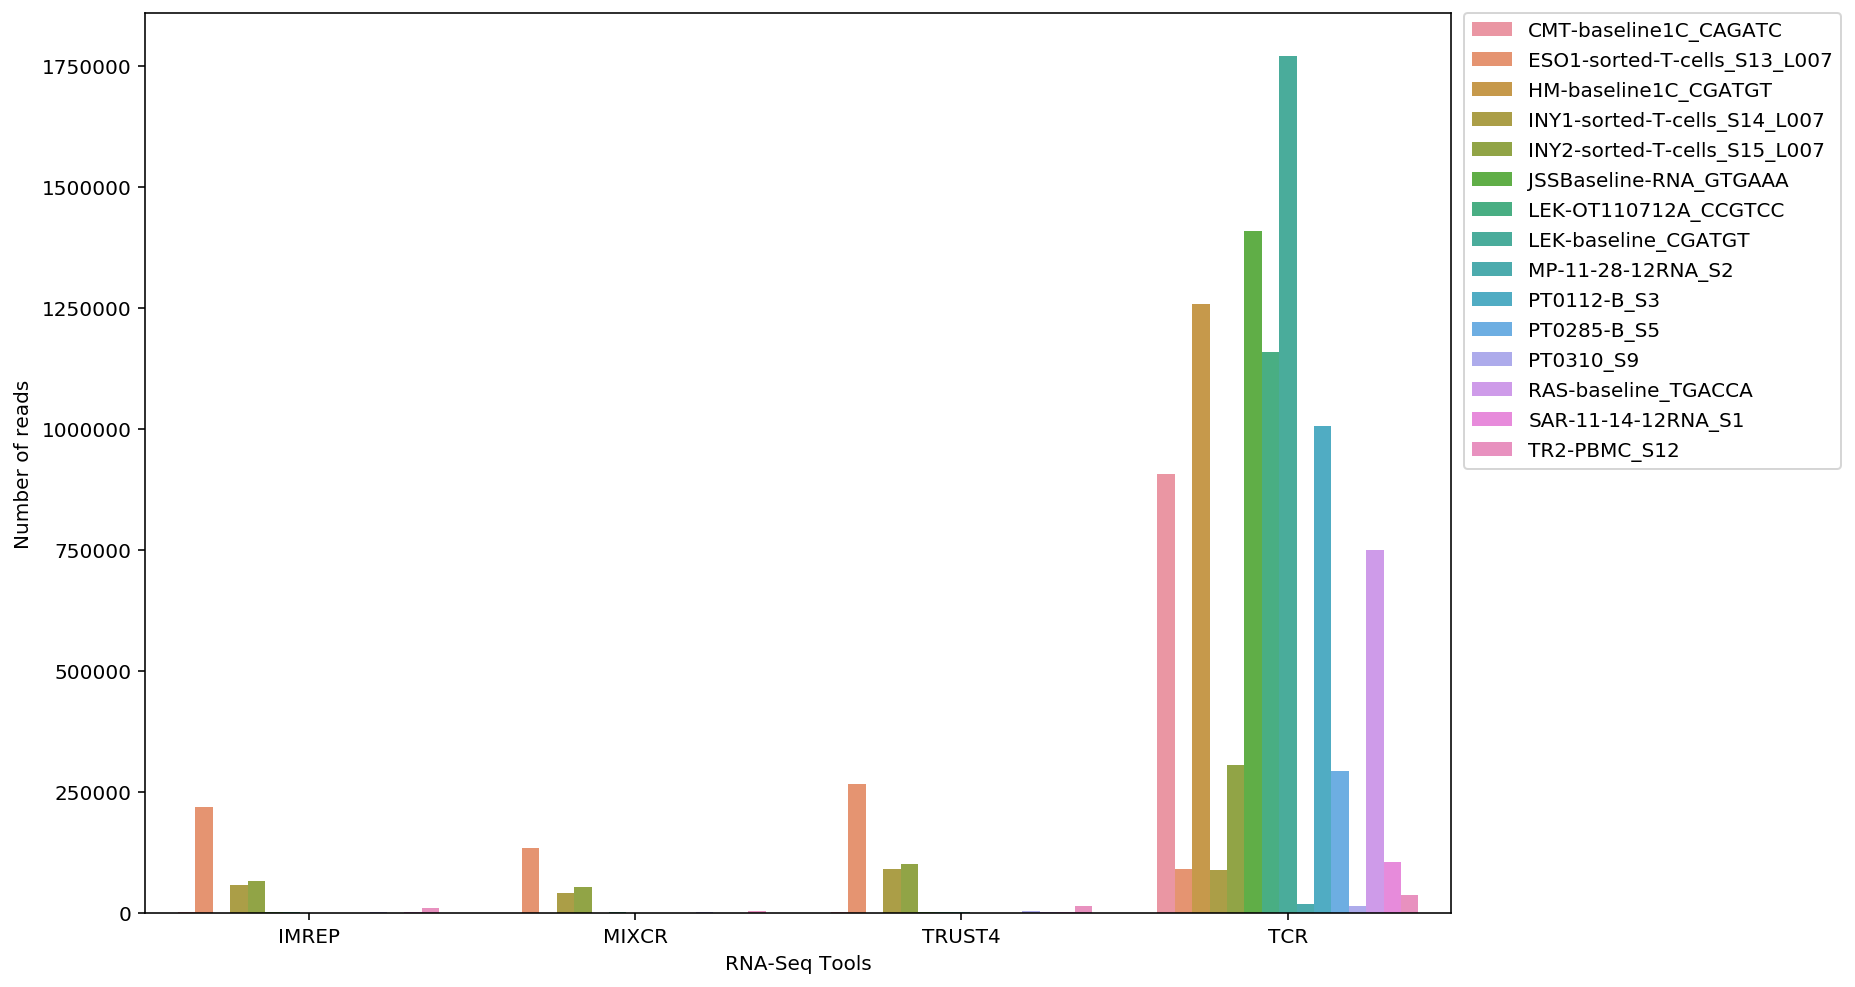

In [8]:
plt.figure(figsize=(11.7, 8.27))
sns.barplot(x = 'tools', y = 'total_reads_in_sample', hue = 'Sample', data = merge_df_reshape)
plt.xlabel('RNA-Seq Tools') 
plt.ylabel('Number of reads')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()

#### - Number of clones

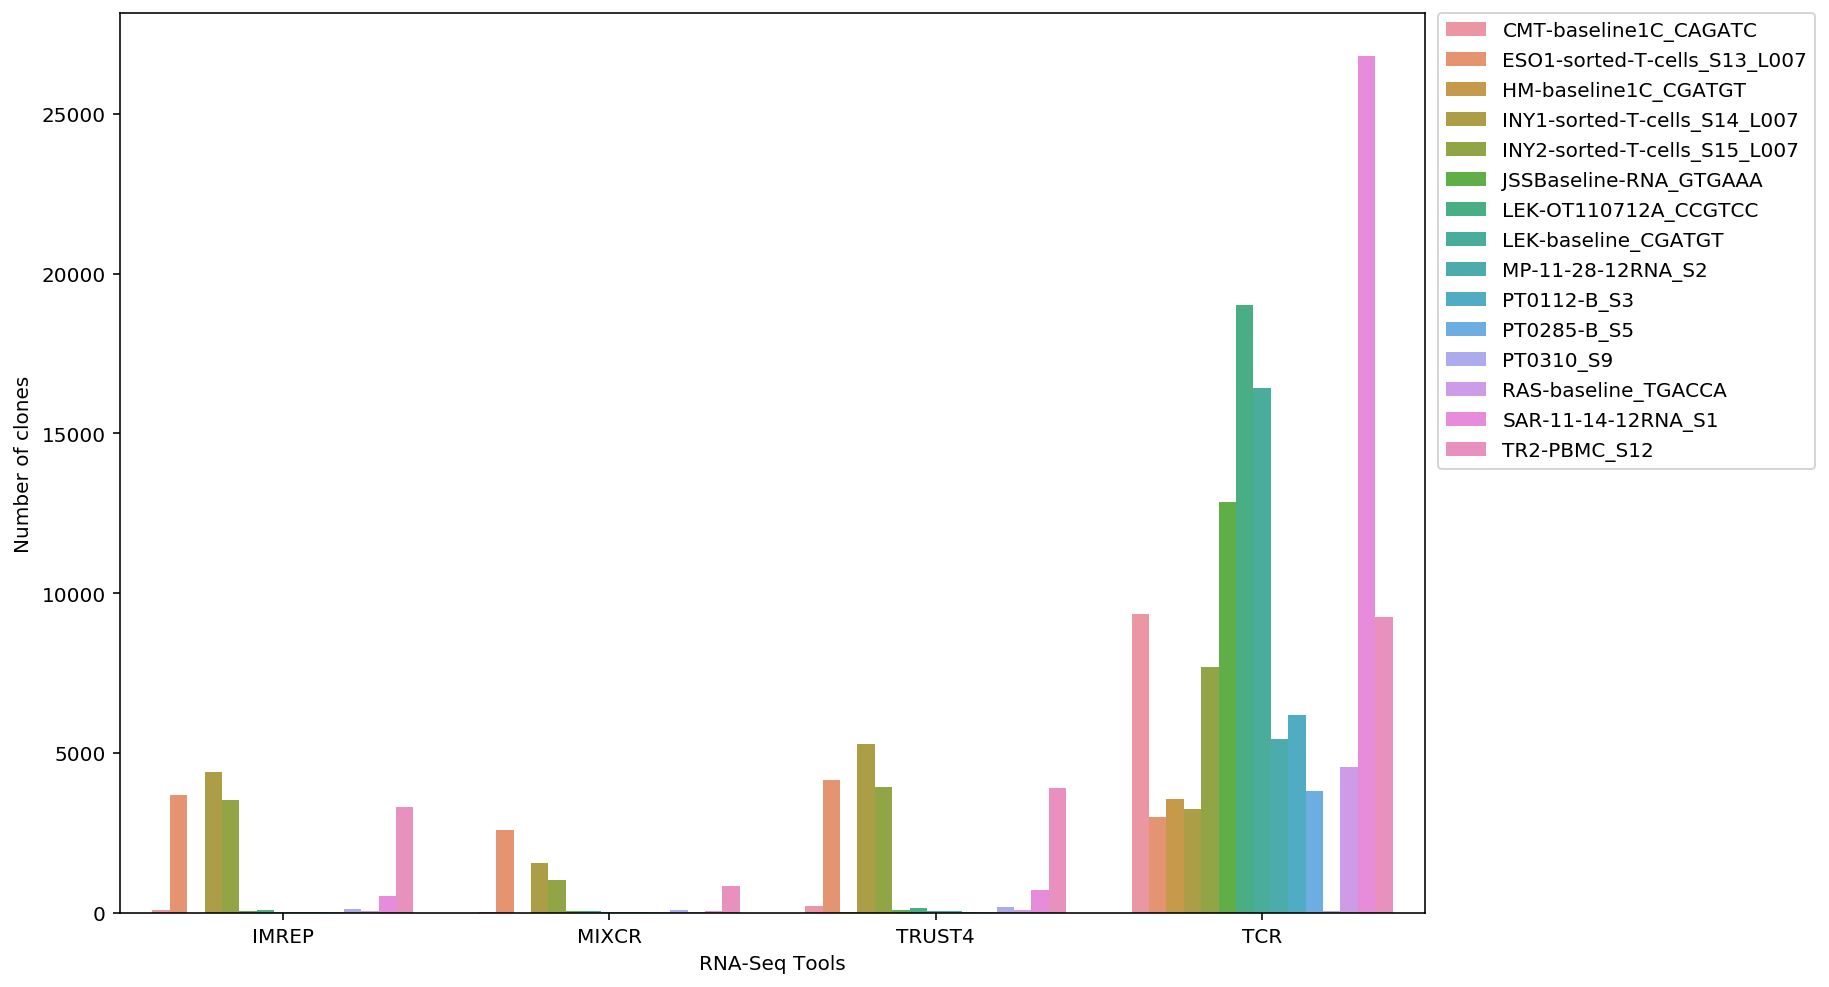

In [9]:
plt.figure(figsize=(11.7, 8.27))
sns.barplot(x = 'tools', y = 'CDR3', hue = 'Sample', data = merge_df_reshape)
plt.xlabel('RNA-Seq Tools') 
plt.ylabel('Number of clones')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()

## Normalized clone size for each sample

In [10]:
normalized_size = pd.concat([IMREP_df_reshape, MIXCR_df_reshape, TRUST4_df_reshape, TCR_df_reshape], axis = 1)
normalized_size.reset_index(inplace = True)
normalized_size = normalized_size.drop(['tools'], axis = 1)
normalized_size.columns = ['Sample', 'IMREP_CDR3', 'IMREP_total_reads_in_sample', 'MIXCR_CDR3', 'MIXCR_total_reads_in_sample',
                          'TRUST4_CDR3', 'TRUST4_total_reads_in_sample', 'TCR_CDR3', 'TCR_total_reads_in_sample']
normalized_size['normalized_IMREP_CDR3'] = normalized_size['IMREP_CDR3']/normalized_size['IMREP_total_reads_in_sample']
normalized_size['normalized_MIXCR_CDR3'] = normalized_size['MIXCR_CDR3']/normalized_size['MIXCR_total_reads_in_sample']
normalized_size['normalized_TRUST4_CDR3'] = normalized_size['TRUST4_CDR3']/normalized_size['TRUST4_total_reads_in_sample']
normalized_size['normalized_TCR_CDR3'] = normalized_size['TCR_CDR3']/normalized_size['TCR_total_reads_in_sample']
normalized_size['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
normalized_size.head()

Sample  IMREP_CDR3  IMREP_total_reads_in_sample  \
0         CMT-baseline1C_CAGATC          92                          231   
1  ESO1-sorted-T-cells_S13_L007        3682                       219185   
2          HM-baseline1C_CGATGT           1                            2   
3  INY1-sorted-T-cells_S14_L007        4392                        57700   
4  INY2-sorted-T-cells_S15_L007        3513                        64914   

   MIXCR_CDR3  MIXCR_total_reads_in_sample  TRUST4_CDR3  \
0          34                           91          200   
1        2592                       132472         4154   
2           0                            0            4   
3        1565                        41370         5275   
4        1012                        52066         3923   

   TRUST4_total_reads_in_sample  TCR_CDR3  TCR_total_reads_in_sample  \
0                           689      9354                     906121   
1                        264884      3001                      90577   
2                            19      3548                    1257571   
3                         89947      3229                      87762   
4                         99723      7697                     305953   

   normalized_IMREP_CDR3  normalized_MIXCR_CDR3  normalized_TRUST4_CDR3  \
0               0.398268               0.373626                0.290276   
1               0.016799               0.019566                0.015682   
2               0.500000                    NaN                0.210526   
3               0.076118               0.037829                0.058646   
4               0.054118               0.019437                0.039339   

   normalized_TCR_CDR3 sample_type  
0             0.010323       tumor  
1             0.033132        PBMC  
2             0.002821       tumor  
3             0.036793        PBMC  
4             0.025157        PBMC

## Clone size relative error for each RNA-seq based tool

### Original Data

In [11]:
#Overall average size relative error
IMREP_overall_size = np.mean(np.abs(normalized_size['TCR_CDR3'] - normalized_size['IMREP_CDR3'])/normalized_size['TCR_CDR3'])
MIXCR_overall_size = np.mean(np.abs(normalized_size['TCR_CDR3'] - normalized_size['MIXCR_CDR3'])/normalized_size['TCR_CDR3'])
TRUST4_overall_size = np.mean(np.abs(normalized_size['TCR_CDR3'] - normalized_size['TRUST4_CDR3'])/normalized_size['TCR_CDR3'])

#PBMC average size relative error
normalized_PBMC_size = normalized_size[normalized_size['sample_type'] == 'PBMC']
IMREP_PBMC_size = np.mean(np.abs(normalized_PBMC_size['TCR_CDR3'] - normalized_PBMC_size['IMREP_CDR3'])/normalized_PBMC_size['TCR_CDR3'])
MIXCR_PBMC_size = np.mean(np.abs(normalized_PBMC_size['TCR_CDR3'] - normalized_PBMC_size['MIXCR_CDR3'])/normalized_PBMC_size['TCR_CDR3'])
TRUST4_PBMC_size = np.mean(np.abs(normalized_PBMC_size['TCR_CDR3'] - normalized_PBMC_size['TRUST4_CDR3'])/normalized_PBMC_size['TCR_CDR3'])

#Tumor average size relative error
normalized_tumor_size = normalized_size[normalized_size['sample_type'] == 'tumor']
IMREP_tumor_size = np.mean(np.abs(normalized_tumor_size['TCR_CDR3'] - normalized_tumor_size['IMREP_CDR3'])/normalized_tumor_size['TCR_CDR3'])
MIXCR_tumor_size = np.mean(np.abs(normalized_tumor_size['TCR_CDR3'] - normalized_tumor_size['MIXCR_CDR3'])/normalized_tumor_size['TCR_CDR3'])
TRUST4_tumor_size = np.mean(np.abs(normalized_tumor_size['TCR_CDR3'] - normalized_tumor_size['TRUST4_CDR3'])/normalized_tumor_size['TCR_CDR3'])

#Monoclonal average size relative error
normalized_mono_size = normalized_size[normalized_size['Sample'].isin(monoclonal_sample)]
IMREP_mono_size = np.mean(np.abs(normalized_mono_size['TCR_CDR3'] - normalized_mono_size['IMREP_CDR3'])/normalized_mono_size['TCR_CDR3'])
MIXCR_mono_size = np.mean(np.abs(normalized_mono_size['TCR_CDR3'] - normalized_mono_size['MIXCR_CDR3'])/normalized_mono_size['TCR_CDR3'])
TRUST4_mono_size = np.mean(np.abs(normalized_mono_size['TCR_CDR3'] - normalized_mono_size['TRUST4_CDR3'])/normalized_mono_size['TCR_CDR3'])

#Polyclonal average size relative error
normalized_poly_size = normalized_size[normalized_size['Sample'].isin(polyclonal_sample)]
IMREP_poly_size = np.mean(np.abs(normalized_poly_size['TCR_CDR3'] - normalized_poly_size['IMREP_CDR3'])/normalized_poly_size['TCR_CDR3'])
MIXCR_poly_size = np.mean(np.abs(normalized_poly_size['TCR_CDR3'] - normalized_poly_size['MIXCR_CDR3'])/normalized_poly_size['TCR_CDR3'])
TRUST4_poly_size = np.mean(np.abs(normalized_poly_size['TCR_CDR3'] - normalized_poly_size['TRUST4_CDR3'])/normalized_poly_size['TCR_CDR3'])


size_re = pd.DataFrame({'Tools':['IMREP', 'MIXCR', 'TRUST4'], 
                           'Overall': [IMREP_overall_size, MIXCR_overall_size, TRUST4_overall_size],
                           'PBMC': [IMREP_PBMC_size, MIXCR_PBMC_size, TRUST4_PBMC_size],
                           'Tumor': [IMREP_tumor_size, MIXCR_tumor_size, TRUST4_tumor_size],
                           'Monoclonal': [IMREP_mono_size, MIXCR_mono_size, TRUST4_mono_size],
                           'Polyclonal': [IMREP_poly_size, MIXCR_poly_size, TRUST4_poly_size]})
size_re

Tools   Overall      PBMC     Tumor  Monoclonal  Polyclonal
0   IMREP  0.860225  0.624497  1.017376    0.376895    0.962182
1   MIXCR  0.881024  0.737156  0.976936    0.506713    0.989445
2  TRUST4  0.952860  0.675035  1.138077    0.502720    0.952987

### Clone size scatter plots with original data

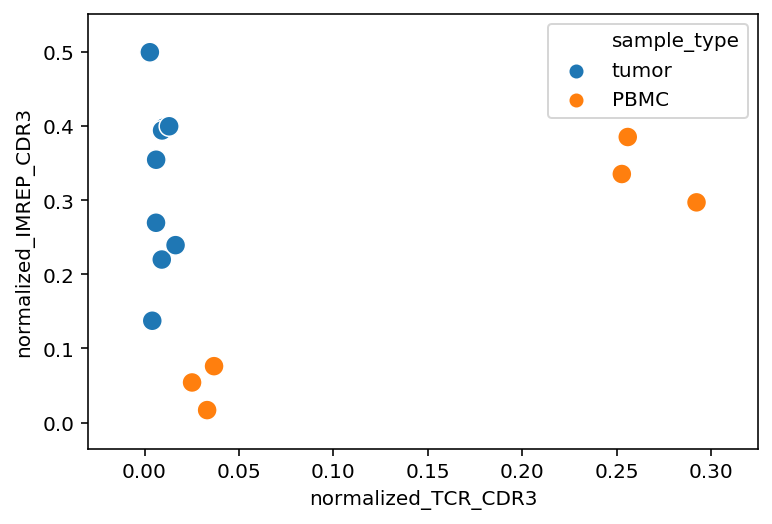

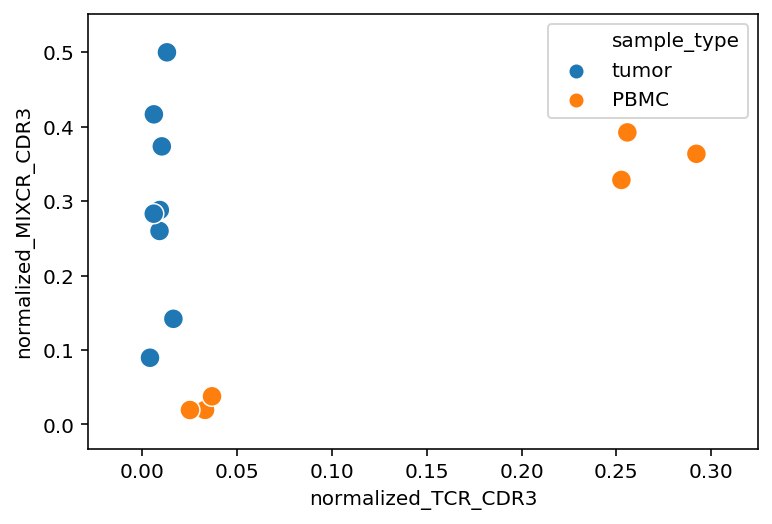

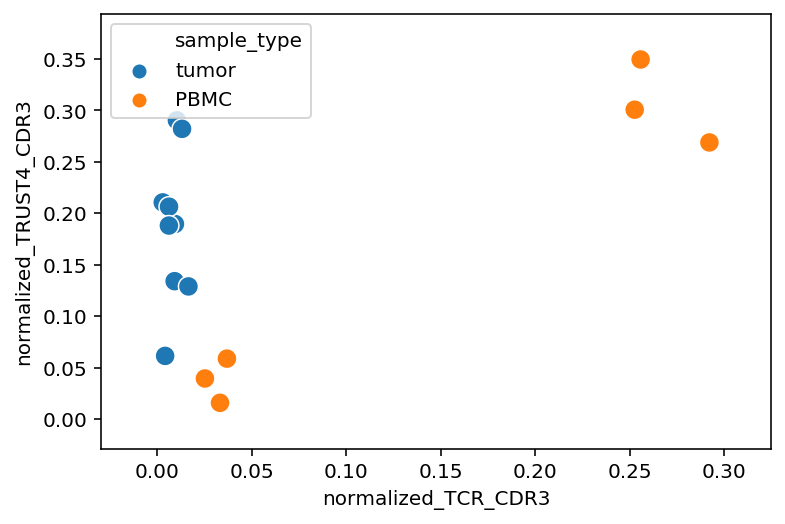

In [12]:
ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_IMREP_CDR3', hue = 'sample_type', s = 100, data = normalized_size)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_MIXCR_CDR3', hue = 'sample_type', s = 100, data = normalized_size)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_TRUST4_CDR3', hue = 'sample_type', s = 100, data = normalized_size)
ax.grid(False)
plt.show()

## SDI relative error

### Original Data

In [13]:
#Overall
IMREP_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['IMREP_diversity'])/diversity_df['TCR_diversity'])
MIXCR_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['MIXCR_diversity'])/diversity_df['TCR_diversity'])
TRUST4_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['TRUST4_diversity'])/diversity_df['TCR_diversity'])

#PBMC
PBMC_diversity_df = diversity_df[diversity_df['sample_type'] == 'PBMC']
IMREP_PBMC_SDI = np.mean(np.abs(PBMC_diversity_df['TCR_diversity'] - PBMC_diversity_df['IMREP_diversity'])/PBMC_diversity_df['TCR_diversity'])
MIXCR_PBMC_SDI = np.mean(np.abs(PBMC_diversity_df['TCR_diversity'] - PBMC_diversity_df['MIXCR_diversity'])/PBMC_diversity_df['TCR_diversity'])
TRUST4_PBMC_SDI = np.mean(np.abs(PBMC_diversity_df['TCR_diversity'] - PBMC_diversity_df['TRUST4_diversity'])/PBMC_diversity_df['TCR_diversity'])

#tumor
tumor_diversity_df = diversity_df[diversity_df['sample_type'] == 'tumor']
IMREP_tumor_SDI = np.mean(np.abs(tumor_diversity_df['TCR_diversity'] - tumor_diversity_df['IMREP_diversity'])/tumor_diversity_df['TCR_diversity'])
MIXCR_tumor_SDI = np.mean(np.abs(tumor_diversity_df['TCR_diversity'] - tumor_diversity_df['MIXCR_diversity'])/tumor_diversity_df['TCR_diversity'])
TRUST4_tumor_SDI = np.mean(np.abs(tumor_diversity_df['TCR_diversity'] - tumor_diversity_df['TRUST4_diversity'])/tumor_diversity_df['TCR_diversity'])

#monoclonal
mono_SDI = diversity_df[diversity_df['Sample'].isin(monoclonal_sample)]
IMREP_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['IMREP_diversity'])/mono_SDI['TCR_diversity'])
MIXCR_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['MIXCR_diversity'])/mono_SDI['TCR_diversity'])
TRUST4_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['TRUST4_diversity'])/mono_SDI['TCR_diversity'])

#polyvlonal
poly_SDI = diversity_df[diversity_df['Sample'].isin(polyclonal_sample)]
IMREP_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['IMREP_diversity'])/poly_SDI['TCR_diversity'])
MIXCR_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['MIXCR_diversity'])/poly_SDI['TCR_diversity'])
TRUST4_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['TRUST4_diversity'])/poly_SDI['TCR_diversity'])

SDI_re = pd.DataFrame({'Tools':['IMREP', 'MIXCR', 'TRUST4'], 
                           'Overall': [IMREP_overall_SDI, MIXCR_overall_SDI, TRUST4_overall_SDI],
                           'PBMC': [IMREP_PBMC_SDI, MIXCR_PBMC_SDI, TRUST4_PBMC_SDI],
                           'Tumor': [IMREP_tumor_SDI, MIXCR_tumor_SDI, TRUST4_tumor_SDI],
                           'Monoclonal': [IMREP_mono_SDI, MIXCR_mono_SDI, TRUST4_mono_SDI],
                           'Polyclonal': [IMREP_poly_SDI, MIXCR_poly_SDI, TRUST4_poly_SDI]})
SDI_re

Tools   Overall      PBMC     Tumor  Monoclonal  Polyclonal
0   IMREP  0.682858  0.576706  0.753626    0.824720    0.548270
1   MIXCR  0.590809  0.311708  0.776877    0.138209    0.635043
2  TRUST4  0.604943  0.482545  0.686542    0.660105    0.493394

## Comparison of SDI of original data

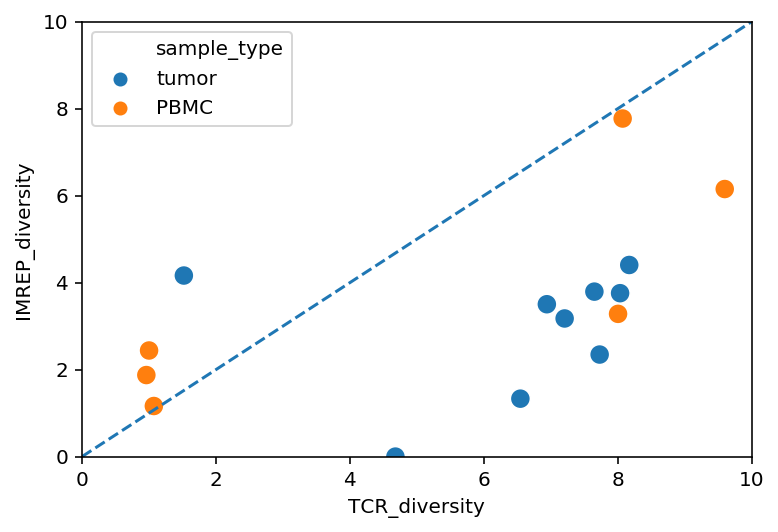

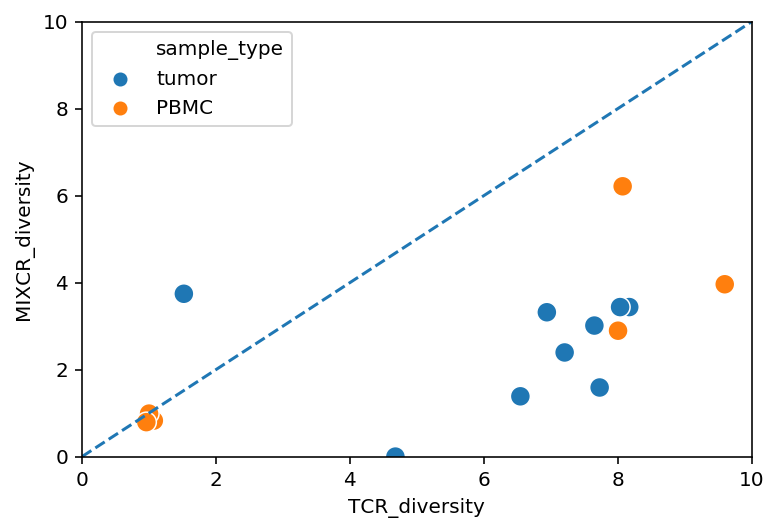

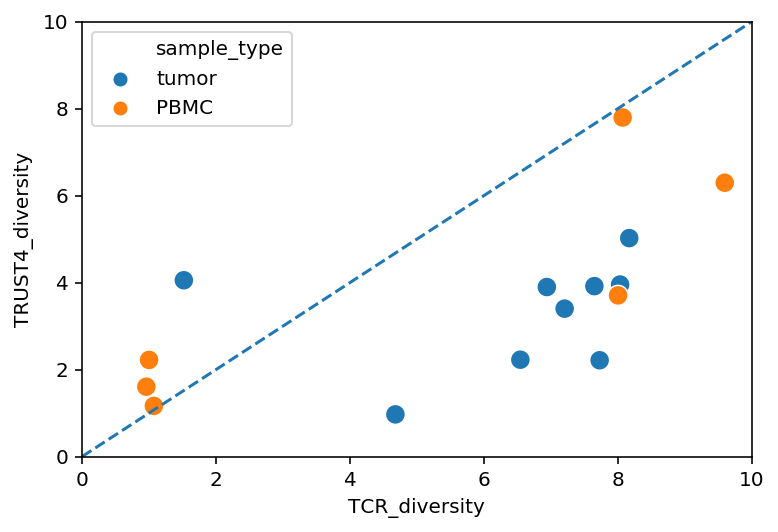

In [14]:
sns.scatterplot(x = 'TCR_diversity', y = 'IMREP_diversity', hue = 'sample_type', s = 100, data = diversity_df)
ax = sns.lineplot(x=range(0,11),y=range(0,11))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 10), ylim = (0, 10))
ax.grid(False)
plt.show()

sns.scatterplot(x = 'TCR_diversity', y = 'MIXCR_diversity', hue = 'sample_type', s = 100, data = diversity_df)
ax = sns.lineplot(x=range(0,11),y=range(0,11))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 10), ylim = (0, 10))
ax.grid(False)
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'TRUST4_diversity', hue = 'sample_type', s = 100, data = diversity_df)
ax = sns.lineplot(x=range(0,11),y=range(0,11))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 10), ylim = (0, 10))
ax.grid(False)
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

### diversity correlation in PBMC samples

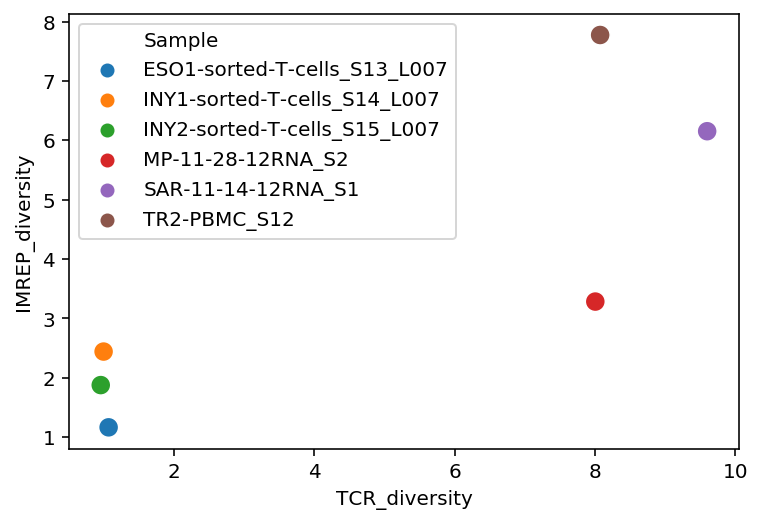

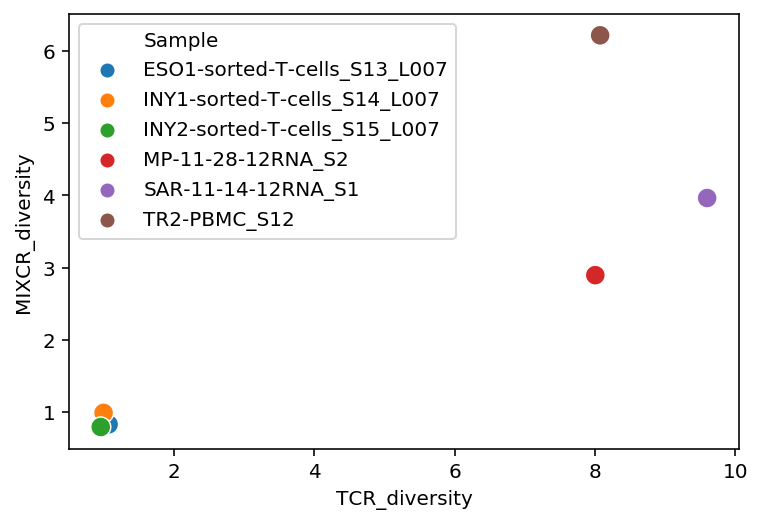

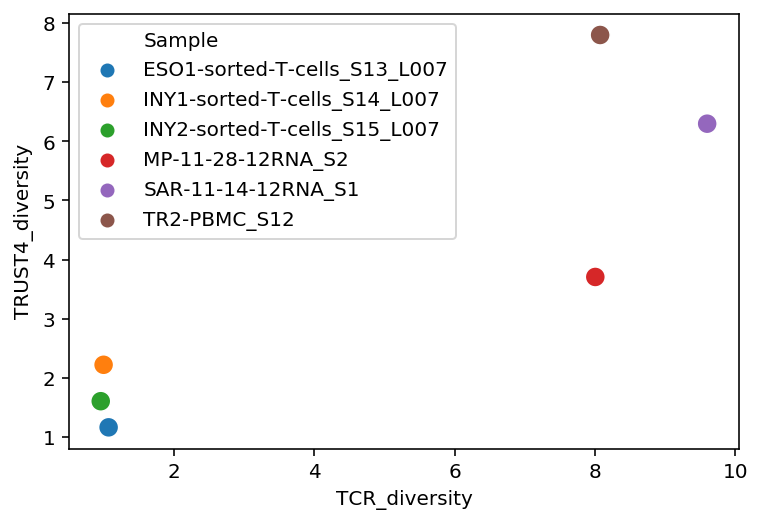

In [15]:
PBMC_diversity_df = diversity_df[diversity_df['sample_type'] == 'PBMC']
ax = sns.scatterplot(x = 'TCR_diversity', y = 'IMREP_diversity', hue = 'Sample', s = 100, data = PBMC_diversity_df)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'MIXCR_diversity', hue = 'Sample', s = 100, data = PBMC_diversity_df)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'TRUST4_diversity', hue = 'Sample', s = 100, data = PBMC_diversity_df)
ax.grid(False)
plt.show()

### diversity correlation in tumor samples

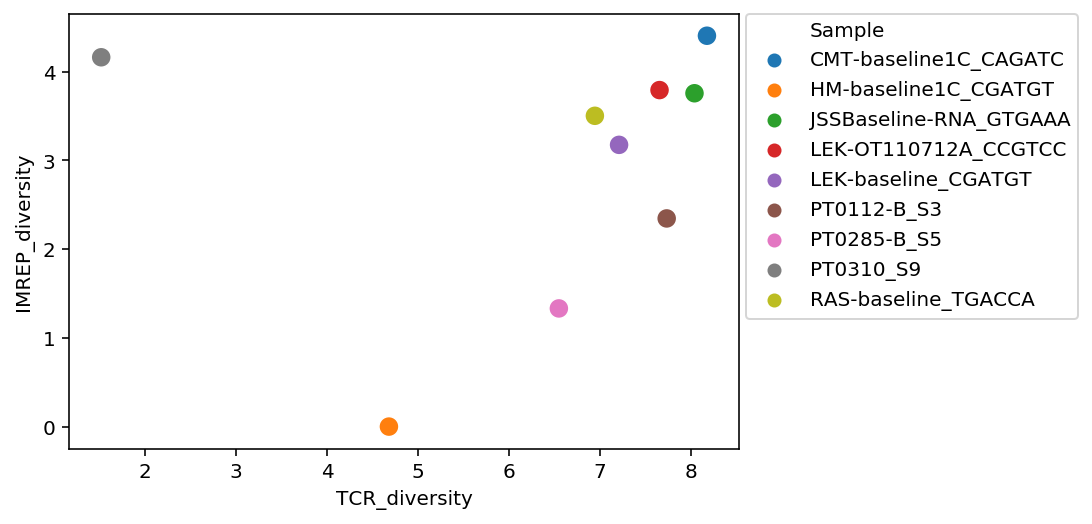

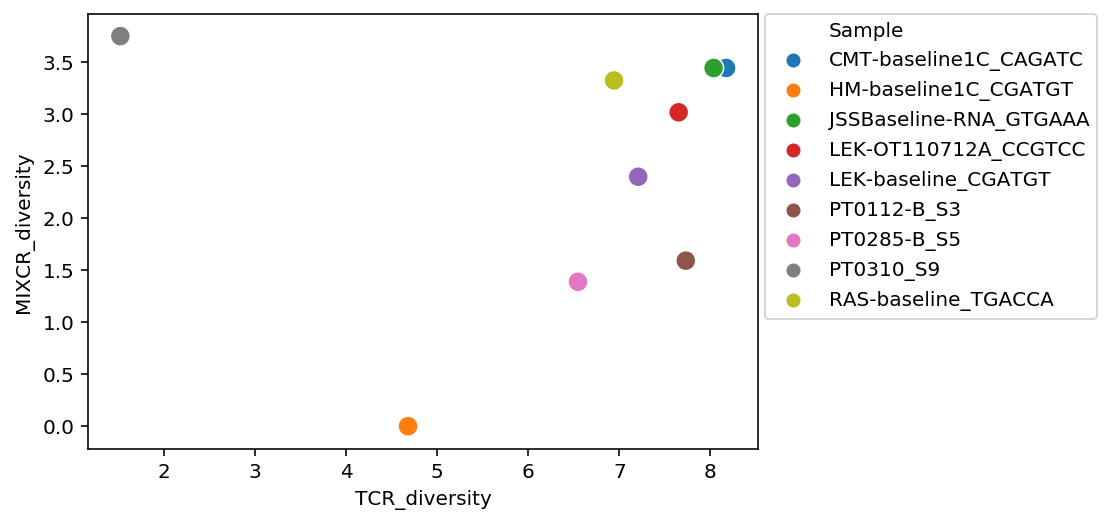

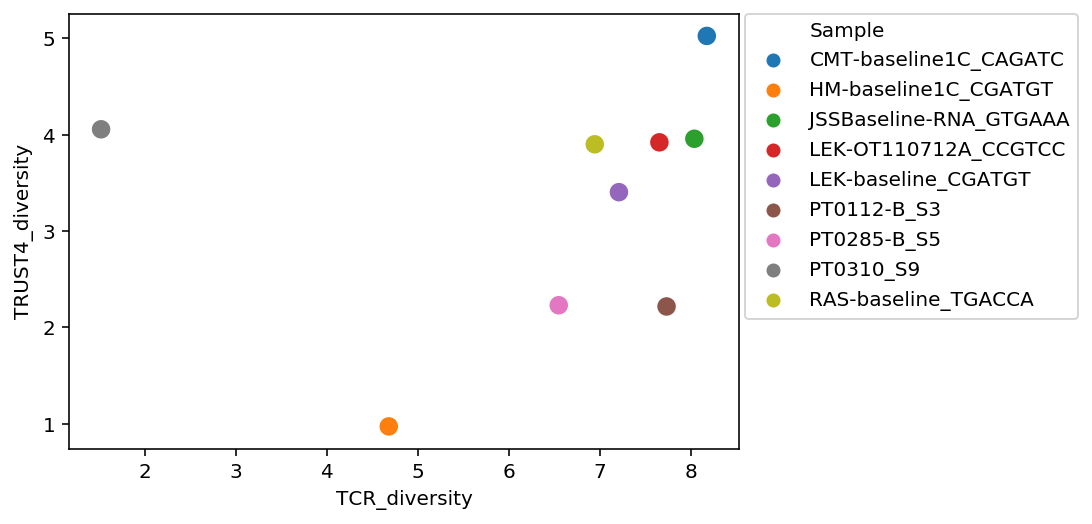

In [16]:
tumor_diversity_df = diversity_df[diversity_df['sample_type'] == 'tumor']
ax = sns.scatterplot(x = 'TCR_diversity', y = 'IMREP_diversity', hue = 'Sample', s = 100, data = tumor_diversity_df)
ax.grid(False)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()
ax = sns.scatterplot(x = 'TCR_diversity', y = 'MIXCR_diversity', hue = 'Sample', s = 100, data = tumor_diversity_df)
ax.grid(False)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()
ax = sns.scatterplot(x = 'TCR_diversity', y = 'TRUST4_diversity', hue = 'Sample', s = 100, data = tumor_diversity_df)
ax.grid(False)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()

## Largest clone frequency comparison (original data)

In [17]:
IMREP_max_clone_idx = IMREP_df.groupby(['Sample'])['Frequency_IMREP'].transform(max) == IMREP_df['Frequency_IMREP']
IMREP_max_clone = IMREP_df[IMREP_max_clone_idx][['Sample', 'CDR3', 'Frequency_IMREP']]
IMREP_max_clone = IMREP_max_clone.sort_values('Sample')

MIXCR_max_clone_idx = MIXCR_df.groupby(['Sample'])['Frequency_MIXCR'].transform(max) == MIXCR_df['Frequency_MIXCR']
MIXCR_max_clone = MIXCR_df[MIXCR_max_clone_idx][['Sample', 'CDR3', 'Frequency_MIXCR']]
MIXCR_max_clone = MIXCR_max_clone.sort_values('Sample')

TRUST4_max_clone_idx = TRUST4_df.groupby(['Sample'])['Frequency_TRUST4'].transform(max) == TRUST4_df['Frequency_TRUST4']
TRUST4_max_clone = TRUST4_df[TRUST4_max_clone_idx][['Sample', 'CDR3', 'Frequency_TRUST4']]
TRUST4_max_clone = TRUST4_max_clone.sort_values('Sample')

TCR_max_clone_idx = TCR_df.groupby(['Sample'])['Frequency_TCR'].transform(max) == TCR_df['Frequency_TCR']
TCR_max_clone = TCR_df[TCR_max_clone_idx][['Sample', 'CDR3', 'Frequency_TCR']]
TCR_max_clone = TCR_max_clone.sort_values('Sample')

In [18]:
IMREP_max_clone = IMREP_max_clone.drop_duplicates(subset = ['Sample'])
MIXCR_max_clone = MIXCR_max_clone.drop_duplicates(subset = ['Sample'])
TRUST4_max_clone = TRUST4_max_clone.drop_duplicates(subset = ['Sample'])
TCR_max_clone = TCR_max_clone.drop_duplicates(subset = ['Sample'])

In [19]:
max_clone_freq = pd.DataFrame({'Sample': sample_names,
                              'IMREP_max_clone_freq': list(IMREP_max_clone['Frequency_IMREP']),
                              'MIXCR_max_clone_freq': list(MIXCR_max_clone['Frequency_MIXCR']),
                              'TRUST4_max_clone_freq': list(TRUST4_max_clone['Frequency_TRUST4']), 
                              'TCR_max_clone_freq': list(TCR_max_clone['Frequency_TCR']),
                              'IMREP_max_clone': list(IMREP_max_clone['CDR3']),
                              'MIXCR_max_clone': list(MIXCR_max_clone['CDR3']),
                              'TRUST4_max_clone': list(TRUST4_max_clone['CDR3']), 
                              'TCR_max_clone': list(TCR_max_clone['CDR3'])
                              })
max_clone_freq['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
max_clone_freq

Sample  IMREP_max_clone_freq  MIXCR_max_clone_freq  \
0          CMT-baseline1C_CAGATC              0.064935              0.076923   
1   ESO1-sorted-T-cells_S13_L007              0.891644              0.926264   
2           HM-baseline1C_CGATGT              1.000000              0.000000   
3   INY1-sorted-T-cells_S14_L007              0.766430              0.906672   
4   INY2-sorted-T-cells_S15_L007              0.814354              0.894711   
5         JSSBaseline-RNA_GTGAAA              0.069498              0.126667   
6           LEK-OT110712A_CCGTCC              0.173653              0.219355   
7            LEK-baseline_CGATGT              0.169014              0.355932   
8              MP-11-28-12RNA_S2              0.108108              0.145455   
9                    PT0112-B_S3              0.161290              0.250000   
10                   PT0285-B_S5              0.400000              0.250000   
11                     PT0310_S9              0.090047              0.154062   
12           RAS-baseline_TGACCA              0.092105              0.106195   
13            SAR-11-14-12RNA_S1              0.011078              0.101266   
14                  TR2-PBMC_S12              0.021642              0.056376   

    TRUST4_max_clone_freq  TCR_max_clone_freq    IMREP_max_clone  \
0                0.039187            0.011468     CASLRDSSYNEQFF   
1                0.893300            0.903298     CASSYVGNTGELFF   
2                0.684211            0.405293  CASSSWRGRGSTDTQYF   
3                0.789387            0.911887     CASSYVGNTGELFF   
4                0.841501            0.917314     CASSYVGNTGELFF   
5                0.098935            0.017781      CASSRPSTDTQYF   
6                0.151635            0.038212     CASSFRGDRNEQFF   
7                0.202614            0.043142    CASKDGTGSYNEQFF   
8                0.091398            0.028952    CAIKEELGPGNEQFF   
9                0.317460            0.028239   CASRDSENKLNTEAFF   
10               0.205128            0.101001       CASRGQGYEQYF   
11               0.180385            0.720395  CASSEGPGGSSYNEQFF   
12               0.059829            0.023051        CASSLGDTQYF   
13               0.018445            0.013676           CSNQPQHF   
14               0.018738            0.039028      CSARVLSGNEQFF   

      MIXCR_max_clone    TRUST4_max_clone      TCR_max_clone sample_type  
0       CASSSIPRNEQFF      CASRLNGYQETQYF    CAISDSGTSNTEAFF       tumor  
1      CASSYVGNTGELFF      CASSYVGNTGELFF     CASSYVGNTGELFF        PBMC  
2                None   CASSEGPGGSSYNEQFF  CASSEGPGGSSYNEQFF       tumor  
3      CASSYVGNTGELFF      CASSYVGNTGELFF     CASSYVGNTGELFF        PBMC  
4      CASSYVGNTGELFF      CASSYVGNTGELFF     CASSYVGNTGELFF        PBMC  
5       CASSRPSTDTQYF       CASSRPSTDTQYF    CASSFGTGGYTEAFF       tumor  
6      CASSFRGDRNEQFF      CASSFRGDRNEQFF     CASSFRGDRNEQFF       tumor  
7     CASKDGTGSYNEQFF     CASKDGTGSYNEQFF      CASSPTGSTEAFF       tumor  
8     CAIKEELGPGNEQFF     CAIKEELGPGNEQFF    CAIKEELGPGNEQFF        PBMC  
9     CATSARQLLNTEAFF  CASSQDQDLSHGQYEQYF     CASSYVGNTGELFF       tumor  
10      CASSTPTGDEQFF         CASSFQSEQFF      CASSLTGVTEAFF       tumor  
11  CASSEGPGGSSYNEQFF   CASSEGPGGSSYNEQFF  CASSEGPGGSSYNEQFF       tumor  
12   CASSLTSGTGLYEQYF    CASSLTSGTGLYEQYF  CASSYSPLAGGHPRQYF       tumor  
13       CASSLFGWGYTF        CASSLFGWGYTF       CASSLFGWGYTF        PBMC  
14     CASSSASGSYEQYF      CASSSASGSYEQYF     CASSSASGSYEQYF        PBMC

## TCR largest clone in other tools (original data)

In [20]:
TCR_max_clone_in_IMREP = []
TCR_max_clone_in_MIXCR = []
TCR_max_clone_in_TRUST4 = []

for sample in sample_names:
    TCR_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['TCR_max_clone'].to_numpy()[0]
    
    if len(IMREP_df[(IMREP_df['Sample'] == sample) & (IMREP_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP']) > 0:
        TCR_max_clone_in_IMREP.append(IMREP_df[(IMREP_df['Sample'] == sample) & (IMREP_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP'].to_numpy()[0])
    else:
        TCR_max_clone_in_IMREP.append(0)
        
    if len(MIXCR_df[(MIXCR_df['Sample'] == sample) & (MIXCR_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR']) > 0:
        TCR_max_clone_in_MIXCR.append(MIXCR_df[(MIXCR_df['Sample'] == sample) & (MIXCR_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR'].to_numpy()[0])
    else:
        TCR_max_clone_in_MIXCR.append(0)
        
    if len(TRUST4_df[(TRUST4_df['Sample'] == sample) & (TRUST4_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4']) > 0:
        TCR_max_clone_in_TRUST4.append(TRUST4_df[(TRUST4_df['Sample'] == sample) & (TRUST4_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4'].to_numpy()[0])
    else:
        TCR_max_clone_in_TRUST4.append(0)
        
TCR_max_clone_in_tools = pd.DataFrame({'TCR_largest_clone': max_clone_freq['TCR_max_clone'],
                                       'TCR_largest_clone_freq': max_clone_freq['TCR_max_clone_freq'],
                                       'in_IMREP': TCR_max_clone_in_IMREP,
                                       'in_MIXCR': TCR_max_clone_in_MIXCR, 
                                       'in_TRUST4': TCR_max_clone_in_TRUST4})

TCR_max_clone_in_tools['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
TCR_max_clone_in_tools['Sample'] = sample_names
TCR_max_clone_in_tools

TCR_largest_clone  TCR_largest_clone_freq  in_IMREP  in_MIXCR  in_TRUST4  \
0     CAISDSGTSNTEAFF                0.011468  0.021645  0.043956   0.018868   
1      CASSYVGNTGELFF                0.903298  0.891644  0.926264   0.893300   
2   CASSEGPGGSSYNEQFF                0.405293  0.000000  0.000000   0.684211   
3      CASSYVGNTGELFF                0.911887  0.766430  0.906672   0.789387   
4      CASSYVGNTGELFF                0.917314  0.814354  0.894711   0.841501   
5     CASSFGTGGYTEAFF                0.017781  0.000000  0.000000   0.000000   
6      CASSFRGDRNEQFF                0.038212  0.173653  0.219355   0.151635   
7       CASSPTGSTEAFF                0.043142  0.028169  0.033898   0.006536   
8     CAIKEELGPGNEQFF                0.028952  0.108108  0.145455   0.091398   
9      CASSYVGNTGELFF                0.028239  0.000000  0.000000   0.000000   
10      CASSLTGVTEAFF                0.101001  0.200000  0.000000   0.000000   
11  CASSEGPGGSSYNEQFF                0.720395  0.090047  0.154062   0.180385   
12  CASSYSPLAGGHPRQYF                0.023051  0.000000  0.000000   0.000000   
13       CASSLFGWGYTF                0.013676  0.010340  0.101266   0.018445   
14     CASSSASGSYEQYF                0.039028  0.020125  0.056376   0.018738   

   sample_type                        Sample  
0        tumor         CMT-baseline1C_CAGATC  
1         PBMC  ESO1-sorted-T-cells_S13_L007  
2        tumor          HM-baseline1C_CGATGT  
3         PBMC  INY1-sorted-T-cells_S14_L007  
4         PBMC  INY2-sorted-T-cells_S15_L007  
5        tumor        JSSBaseline-RNA_GTGAAA  
6        tumor          LEK-OT110712A_CCGTCC  
7        tumor           LEK-baseline_CGATGT  
8         PBMC             MP-11-28-12RNA_S2  
9        tumor                   PT0112-B_S3  
10       tumor                   PT0285-B_S5  
11       tumor                     PT0310_S9  
12       tumor           RAS-baseline_TGACCA  
13        PBMC            SAR-11-14-12RNA_S1  
14        PBMC                  TR2-PBMC_S12

### TCR largest clone in IMREP (original data & overlapping clones)

In [21]:
df = merge_IMREP_TRUST4_MIXCR_TCR
in_IMREP_overlapping = []

for sample in sample_names:
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())

    overlap_TCR_IMREP = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP))
    
    if list(TCR_max_clone['CDR3'])[sample_names.index(sample)] in overlap_TCR_IMREP:
        index = IMREP_df.loc[(IMREP_df['Sample'] == sample) & (IMREP_df['CDR3'] == list(TCR_max_clone['CDR3'])[sample_names.index(sample)])].index[0]
        in_IMREP_overlapping.append(IMREP_df.iloc[index, 2]/(np.sum(IMREP_df[IMREP_df['CDR3'].isin(overlap_TCR_IMREP)]['nReads_IMREP'])))
    else:
        in_IMREP_overlapping.append(0)
        
TCR_max_clone_in_IMREPoverlap = TCR_max_clone_in_tools[['Sample', 'TCR_largest_clone', 'TCR_largest_clone_freq']]
TCR_max_clone_in_IMREPoverlap['in_IMREPoverlap'] = in_IMREP_overlapping
TCR_max_clone_in_IMREPoverlap

/spack/apps/linux-centos7-x86_64/gcc-8.3.0/anaconda3-2019.10-bpb6unkhyvkirwkg44uqchcy5jyhzhvt/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Sample  TCR_largest_clone  TCR_largest_clone_freq  \
0          CMT-baseline1C_CAGATC    CAISDSGTSNTEAFF                0.011468   
1   ESO1-sorted-T-cells_S13_L007     CASSYVGNTGELFF                0.903298   
2           HM-baseline1C_CGATGT  CASSEGPGGSSYNEQFF                0.405293   
3   INY1-sorted-T-cells_S14_L007     CASSYVGNTGELFF                0.911887   
4   INY2-sorted-T-cells_S15_L007     CASSYVGNTGELFF                0.917314   
5         JSSBaseline-RNA_GTGAAA    CASSFGTGGYTEAFF                0.017781   
6           LEK-OT110712A_CCGTCC     CASSFRGDRNEQFF                0.038212   
7            LEK-baseline_CGATGT      CASSPTGSTEAFF                0.043142   
8              MP-11-28-12RNA_S2    CAIKEELGPGNEQFF                0.028952   
9                    PT0112-B_S3     CASSYVGNTGELFF                0.028239   
10                   PT0285-B_S5      CASSLTGVTEAFF                0.101001   
11                     PT0310_S9  CASSEGPGGSSYNEQFF                0.720395   
12           RAS-baseline_TGACCA  CASSYSPLAGGHPRQYF                0.023051   
13            SAR-11-14-12RNA_S1       CASSLFGWGYTF                0.013676   
14                  TR2-PBMC_S12     CASSSASGSYEQYF                0.039028   

    in_IMREPoverlap  
0          0.030864  
1          0.653705  
2          0.000000  
3          0.149765  
4          0.177785  
5          0.000000  
6          0.193333  
7          0.012658  
8          0.285714  
9          0.000000  
10         0.333333  
11         0.261168  
12         0.000000  
13         0.023569  
14         0.083966

## Scatterplot of TCR largest clone's frequency in other tools (original data)

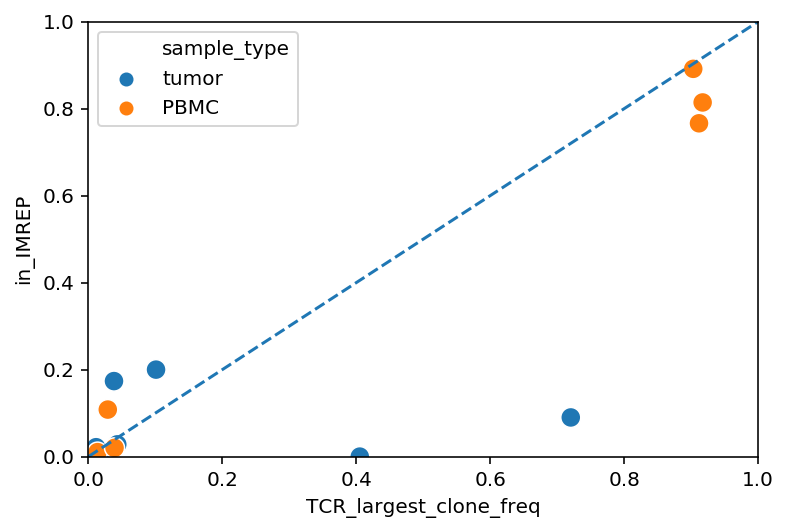

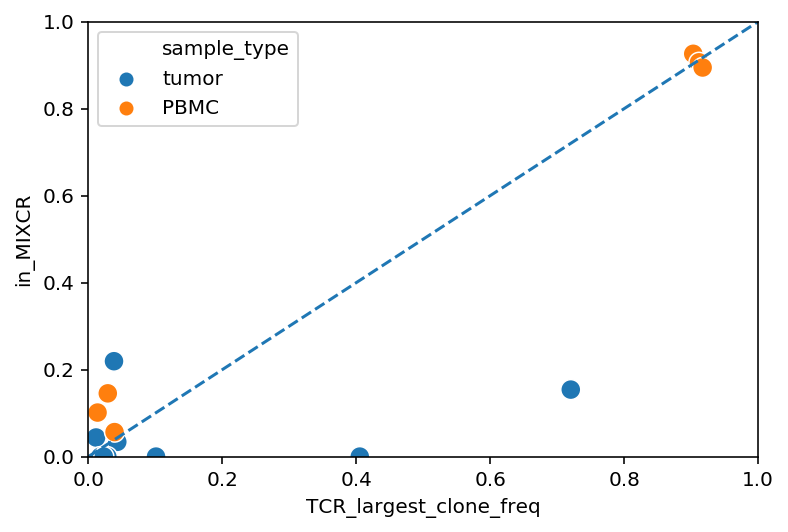

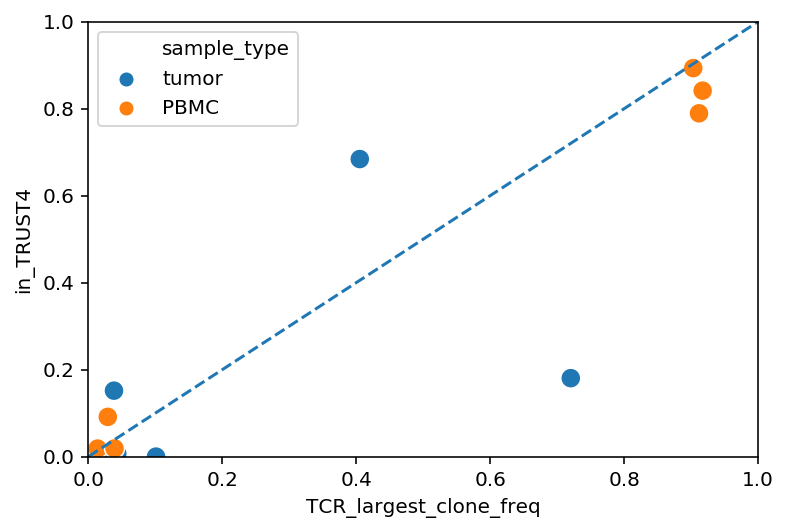

In [22]:
ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_IMREP', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_MIXCR', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_TRUST4', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

## IMREP largest clone in TCR (original data)

In [23]:
IMREP_max_clone_in_TCR = []
for sample in sample_names:
    IMREP_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['IMREP_max_clone'].to_numpy()[0]
    if len(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == IMREP_largest_clone)]['Frequency_TCR']) > 0:
        IMREP_max_clone_in_TCR.append(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == IMREP_largest_clone)]['Frequency_TCR'].to_numpy()[0])
    else:
        IMREP_max_clone_in_TCR.append(0)

IMREP_max_clone_in_TCR_df = pd.DataFrame({'IMREP_largest_clone': max_clone_freq['IMREP_max_clone_freq'], 'in_TCR': IMREP_max_clone_in_TCR})
IMREP_max_clone_in_TCR_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
IMREP_max_clone_in_TCR_df

IMREP_largest_clone    in_TCR sample_type
0              0.064935  0.001403       tumor
1              0.891644  0.903298        PBMC
2              1.000000  0.000095       tumor
3              0.766430  0.911887        PBMC
4              0.814354  0.917314        PBMC
5              0.069498  0.004350       tumor
6              0.173653  0.038212       tumor
7              0.169014  0.031691       tumor
8              0.108108  0.028952        PBMC
9              0.161290  0.001305       tumor
10             0.400000  0.000690       tumor
11             0.090047  0.720395       tumor
12             0.092105  0.017669       tumor
13             0.011078  0.000000        PBMC
14             0.021642  0.037473        PBMC

## MIXCR largest clone in TCR (original data)


In [24]:
MIXCR_max_clone_in_TCR = []
for sample in sample_names:
    MIXCR_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['MIXCR_max_clone'].to_numpy()[0]
    if len(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == MIXCR_largest_clone)]['Frequency_TCR']) > 0:
        MIXCR_max_clone_in_TCR.append(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == MIXCR_largest_clone)]['Frequency_TCR'].to_numpy()[0])
    else:
        MIXCR_max_clone_in_TCR.append(0)

MIXCR_max_clone_in_TCR_df = pd.DataFrame({'MIXCR_largest_clone': max_clone_freq['MIXCR_max_clone_freq'], 'in_TCR': MIXCR_max_clone_in_TCR})
MIXCR_max_clone_in_TCR_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
MIXCR_max_clone_in_TCR_df

MIXCR_largest_clone    in_TCR sample_type
0              0.076923  0.002673       tumor
1              0.926264  0.903298        PBMC
2              0.000000  0.000000       tumor
3              0.906672  0.911887        PBMC
4              0.894711  0.917314        PBMC
5              0.126667  0.004350       tumor
6              0.219355  0.038212       tumor
7              0.355932  0.031691       tumor
8              0.145455  0.028952        PBMC
9              0.250000  0.000000       tumor
10             0.250000  0.033924       tumor
11             0.154062  0.720395       tumor
12             0.106195  0.022031       tumor
13             0.101266  0.013676        PBMC
14             0.056376  0.039028        PBMC

## TRUST4 largest clone in TCR (original data)

In [25]:
TRUST4_max_clone_in_TCR = []
for sample in sample_names:
    TRUST4_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['TRUST4_max_clone'].to_numpy()[0]
    if len(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == TRUST4_largest_clone)]['Frequency_TCR']) > 0:
        TRUST4_max_clone_in_TCR.append(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == TRUST4_largest_clone)]['Frequency_TCR'].to_numpy()[0])
    else:
        TRUST4_max_clone_in_TCR.append(0)
TRUST4_max_clone_in_TCR_df = pd.DataFrame({'TRUST4_largest_clone': max_clone_freq['TRUST4_max_clone_freq'], 'in_TCR': TRUST4_max_clone_in_TCR})
TRUST4_max_clone_in_TCR_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
TRUST4_max_clone_in_TCR_df

TRUST4_largest_clone    in_TCR sample_type
0               0.039187  0.001738       tumor
1               0.893300  0.903298        PBMC
2               0.684211  0.405293       tumor
3               0.789387  0.911887        PBMC
4               0.841501  0.917314        PBMC
5               0.098935  0.004350       tumor
6               0.151635  0.038212       tumor
7               0.202614  0.031691       tumor
8               0.091398  0.028952        PBMC
9               0.317460  0.000140       tumor
10              0.205128  0.000000       tumor
11              0.180385  0.720395       tumor
12              0.059829  0.022031       tumor
13              0.018445  0.013676        PBMC
14              0.018738  0.039028        PBMC

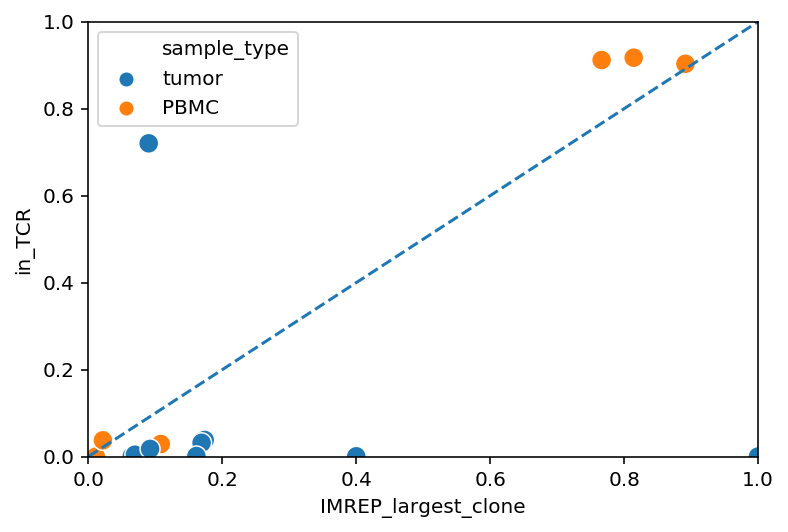

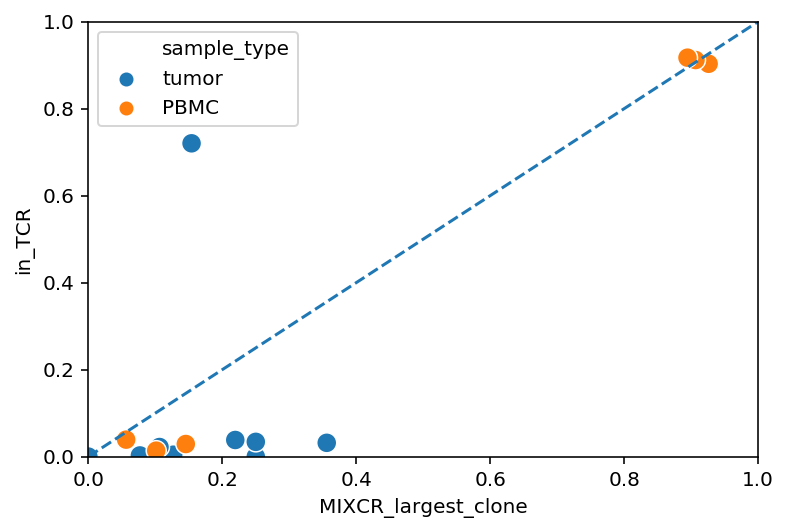

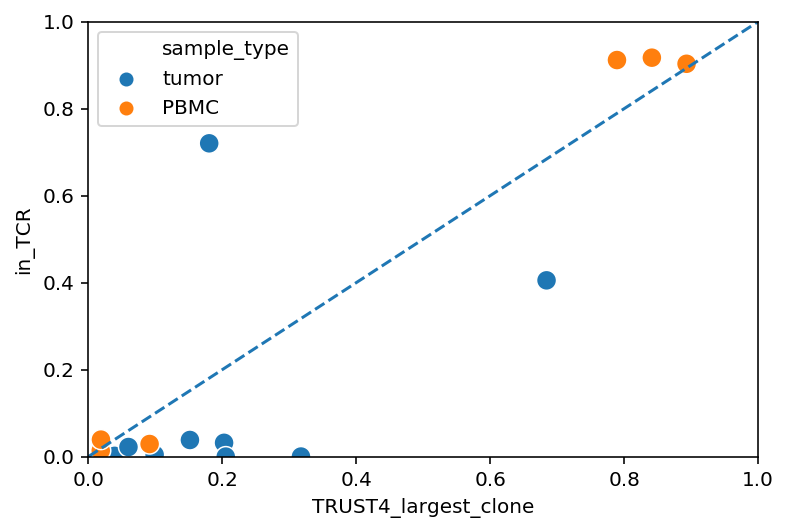

In [26]:
ax = sns.scatterplot(x = 'IMREP_largest_clone', y = 'in_TCR', hue = 'sample_type', s = 100, data = IMREP_max_clone_in_TCR_df)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'MIXCR_largest_clone', y = 'in_TCR', hue = 'sample_type', s =100, data = MIXCR_max_clone_in_TCR_df)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

sns.scatterplot(x = 'TRUST4_largest_clone', y = 'in_TCR', hue = 'sample_type', s = 100, data = TRUST4_max_clone_in_TCR_df)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

## Table containing overlap of clonotypes across samples and tools

In [27]:
samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

clonotype_overlap_df = pd.DataFrame(samples, columns = ["Sample"])
clonotype_overlap_df["unique_clonotypes_TCR"] = 0
clonotype_overlap_df["unique_clonotypes_IMREP"] = 0
clonotype_overlap_df["unique_clonotypes_MIXCR"] = 0
clonotype_overlap_df["unique_clonotypes_TRUST4"] = 0

clonotype_overlap_df["overlap_TCR_IMREP"] = 0
clonotype_overlap_df["overlap_TCR_MIXCR"] = 0
clonotype_overlap_df["overlap_TCR_TRUST4"] = 0
clonotype_overlap_df["overlap_IMREP_MIXCR"] = 0
clonotype_overlap_df["overlap_IMREP_TRUST4"] = 0
clonotype_overlap_df["overlap_MIXCR_TRUST4"] = 0
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR"] = 0
clonotype_overlap_df["overlap_TCR_IMREP_TRUST4"] = 0
clonotype_overlap_df["overlap_TCR_MIXCR_TRUST4"] = 0
clonotype_overlap_df["overlap_IMREP_MIXCR_TRUST4"] = 0
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_TRUST4"] = 0

clonotype_overlap_df["unique_clonotypes_TCR_set"] = ""
clonotype_overlap_df["unique_clonotypes_IMREP_set"] = ""
clonotype_overlap_df["unique_clonotypes_MIXCR_set"] = ""
clonotype_overlap_df["unique_clonotypes_TRUST4_set"] = ""


clonotype_overlap_df["overlap_TCR_IMREP_set"] = ""
clonotype_overlap_df["overlap_TCR_MIXCR_set"] = ""
clonotype_overlap_df["overlap_TCR_TRUST4_set"] = ""
clonotype_overlap_df["overlap_IMREP_MIXCR_set"] = ""
clonotype_overlap_df["overlap_IMREP_TRUST4_set"] = ""
clonotype_overlap_df["overlap_MIXCR_TRUST4_set"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_set"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_TRUST4_set"] = ""
clonotype_overlap_df["overlap_TCR_MIXCR_TRUST4_set"] = ""
clonotype_overlap_df["overlap_IMREP_MIXCR_TRUST4_set"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_TRUST4_set"] = ""

clonotype_overlap_df["overlap_TCR_IMREP_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_MIXCR_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_IMREP_MIXCR_dict_frequencies"] = ""
clonotype_overlap_df["overlap_IMREP_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_MIXCR_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_MIXCR_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_IMREP_MIXCR_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_TRUST4_dict_frequencies"] = ""

In [28]:
# Get total unique clonotypes for each sample per tool count and set
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in samples:
    
    total_unique_clonotypes_TCR = len(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique())    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_TCR'] = total_unique_clonotypes_TCR

    total_unique_clonotypes_IMREP = len(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique())    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_IMREP'] = total_unique_clonotypes_IMREP
    
    total_unique_clonotypes_MIXCR = len(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique())    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_MIXCR'] = total_unique_clonotypes_MIXCR
    
    total_unique_clonotypes_TRUST4 = len(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique())    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_TRUST4'] = total_unique_clonotypes_TRUST4


In [29]:
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in samples:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_MIXCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_TRUST4 = set(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique().tolist())

    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_TCR_set'] = str(list(total_unique_clonotypes_TCR))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_IMREP_set'] = str(list(total_unique_clonotypes_IMREP))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_MIXCR_set'] = str(list(total_unique_clonotypes_MIXCR))       
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_TRUST4_set'] = str(list(total_unique_clonotypes_TRUST4))

In [30]:
# Get overlapping clonotypes for each sample per: tool, number, and unique set:
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in samples:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_MIXCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_TRUST4 = set(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique().tolist())

    
    overlap_TCR_IMREP = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP))
    overlap_TCR_MIXCR = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR))
    overlap_TCR_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_TRUST4))
    overlap_IMREP_MIXCR = list(total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_MIXCR))
    overlap_IMREP_TRUST4 = list(total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_TRUST4))
    overlap_MIXCR_TRUST4 = list(total_unique_clonotypes_MIXCR.intersection(total_unique_clonotypes_TRUST4))
    overlap_TCR_IMREP_MIXCR = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_MIXCR))
    overlap_TCR_IMREP_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_TRUST4))
    overlap_TCR_MIXCR_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4))
    overlap_IMREP_MIXCR_TRUST4 = list(total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4))
    overlap_TCR_IMREP_MIXCR_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4))
    

    
#     Set of overlapping clonotypes per sample per tool
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_set'] = str(set(overlap_TCR_IMREP))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_MIXCR_set'] = str(set(overlap_TCR_MIXCR))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_TRUST4_set'] = str(set(overlap_TCR_TRUST4))
    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_MIXCR_set"] = str(set(overlap_IMREP_MIXCR))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_TRUST4_set"] = str(set(overlap_IMREP_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_MIXCR_TRUST4_set"] = str(set(overlap_MIXCR_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_MIXCR_set"] = str(set(overlap_TCR_IMREP_MIXCR))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_TRUST4_set"] = str(set(overlap_TCR_IMREP_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_MIXCR_TRUST4_set"] = str(set(overlap_TCR_MIXCR_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_MIXCR_TRUST4_set"] = str(set(overlap_IMREP_MIXCR_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_MIXCR_TRUST4_set"] = str(set(overlap_TCR_IMREP_MIXCR_TRUST4))
    
    
#     Number of overlapping clonotypes per sample per tool
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP'] = len(overlap_TCR_IMREP)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_MIXCR'] = len(overlap_TCR_MIXCR)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_TRUST4'] = len(overlap_TCR_TRUST4)

    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_MIXCR"] = len(overlap_IMREP_MIXCR)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_TRUST4"] = len(overlap_IMREP_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_MIXCR_TRUST4"] = len(overlap_MIXCR_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_MIXCR"] = len(overlap_TCR_IMREP_MIXCR)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_TRUST4"] = len(overlap_TCR_IMREP_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_MIXCR_TRUST4"] = len(overlap_TCR_MIXCR_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_MIXCR_TRUST4"] = len(overlap_IMREP_MIXCR_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_MIXCR_TRUST4"] = len(overlap_TCR_IMREP_MIXCR_TRUST4)

In [31]:
#     Frequency dictionary of overlapping clonotypes per sample per tool, format: [TCR_freq, Tool_freq]
for sample in samples:

#   TCR    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    TCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)][['CDR3', 'Frequency_TCR']]
    TCR_Freq_dict = dict(zip(TCR_Freq_df.CDR3, TCR_Freq_df.Frequency_TCR))
 
    
#   IMREP
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
    IMREP_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)][['CDR3', 'Frequency_IMREP']]
    IMREP_Freq_dict = dict(zip(IMREP_Freq_df.CDR3, IMREP_Freq_df.Frequency_IMREP))

    
#   MIXCR
    total_unique_clonotypes_MIXCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique().tolist())
    MIXCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)][['CDR3', 'Frequency_MIXCR']]
    MIXCR_Freq_dict = dict(zip(MIXCR_Freq_df.CDR3, MIXCR_Freq_df.Frequency_MIXCR))

    
#   TRUST4
    total_unique_clonotypes_TRUST4 = set(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique().tolist())
    TRUST4_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)][['CDR3', 'Frequency_TRUST4']]
    TRUST4_Freq_dict = dict(zip(TRUST4_Freq_df.CDR3, TRUST4_Freq_df.Frequency_TRUST4))

    
#####################    
#   TCR_IMREP
    overlap_TCR_IMREP_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP)
    overlap_TCR_IMREP_dict = dict.fromkeys(overlap_TCR_IMREP_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_set_cdr3:
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]

#     print(overlap_TCR_IMREP_dict)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_dict_frequencies'] = str(overlap_TCR_IMREP_dict)

##################### 
#   TCR_MIXCR
    overlap_TCR_MIXCR_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR)
    overlap_TCR_MIXCR_dict = dict.fromkeys(overlap_TCR_MIXCR_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_MIXCR_set_cdr3:
        overlap_TCR_MIXCR_dict[cdr3] = overlap_TCR_MIXCR_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_MIXCR_dict[cdr3] = overlap_TCR_MIXCR_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]

#     print(overlap_TCR_MIXCR_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_MIXCR_dict_frequencies'] = str(overlap_TCR_MIXCR_dict)
    
#####################
#   TCR_TRUST4
    overlap_TCR_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_TRUST4_dict = dict.fromkeys(overlap_TCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_TRUST4_set_cdr3:
        overlap_TCR_TRUST4_dict[cdr3] = overlap_TCR_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_TRUST4_dict[cdr3] = overlap_TCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_TCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_TRUST4_dict_frequencies'] = str(overlap_TCR_TRUST4_dict)

#####################
# IMREP_MIXCR
    overlap_IMREP_MIXCR_set_cdr3 = total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_MIXCR)
    overlap_IMREP_MIXCR_dict = dict.fromkeys(overlap_IMREP_MIXCR_set_cdr3, [])    
    
    for cdr3 in overlap_IMREP_MIXCR_set_cdr3:
        overlap_IMREP_MIXCR_dict[cdr3] = overlap_IMREP_MIXCR_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_IMREP_MIXCR_dict[cdr3] = overlap_IMREP_MIXCR_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]

#     print(overlap_IMREP_MIXCR_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_IMREP_MIXCR_dict_frequencies'] = str(overlap_IMREP_MIXCR_dict)
    
#####################
# IMREP_TRUST4
    overlap_IMREP_TRUST4_set_cdr3 = total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_TRUST4)
    overlap_IMREP_TRUST4_dict = dict.fromkeys(overlap_IMREP_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_IMREP_TRUST4_set_cdr3:
        overlap_IMREP_TRUST4_dict[cdr3] = overlap_IMREP_TRUST4_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_IMREP_TRUST4_dict[cdr3] = overlap_IMREP_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_IMREP_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_IMREP_TRUST4_dict_frequencies'] = str(overlap_IMREP_TRUST4_dict)
    
#####################
# MIXCR_TRUST4
    overlap_MIXCR_TRUST4_set_cdr3 = total_unique_clonotypes_MIXCR.intersection(total_unique_clonotypes_TRUST4)
    overlap_MIXCR_TRUST4_dict = dict.fromkeys(overlap_MIXCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_MIXCR_TRUST4_set_cdr3:
        overlap_MIXCR_TRUST4_dict[cdr3] = overlap_MIXCR_TRUST4_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
        overlap_MIXCR_TRUST4_dict[cdr3] = overlap_MIXCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_MIXCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_MIXCR_TRUST4_dict_frequencies'] = str(overlap_MIXCR_TRUST4_dict)
    
#####################
# TCR_IMREP_MIXCR
    overlap_TCR_IMREP_MIXCR_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_MIXCR)
    overlap_TCR_IMREP_MIXCR_dict = dict.fromkeys(overlap_TCR_IMREP_MIXCR_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_MIXCR_set_cdr3:
        overlap_TCR_IMREP_MIXCR_dict[cdr3] = overlap_TCR_IMREP_MIXCR_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_dict[cdr3] = overlap_TCR_IMREP_MIXCR_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_dict[cdr3] = overlap_TCR_IMREP_MIXCR_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]

#     print(overlap_TCR_IMREP_MIXCR_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_MIXCR_dict_frequencies'] = str(overlap_TCR_IMREP_MIXCR_dict)
    
#####################
# TCR_IMREP_TRUST4
    overlap_TCR_IMREP_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_IMREP_TRUST4_dict = dict.fromkeys(overlap_TCR_IMREP_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_TRUST4_set_cdr3:
        overlap_TCR_IMREP_TRUST4_dict[cdr3] = overlap_TCR_IMREP_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_TRUST4_dict[cdr3] = overlap_TCR_IMREP_TRUST4_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_TCR_IMREP_TRUST4_dict[cdr3] = overlap_TCR_IMREP_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_TCR_IMREP_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_TRUST4_dict_frequencies'] = str(overlap_TCR_IMREP_TRUST4_dict)
    
#####################
# TCR_MIXCR_TRUST4
    overlap_TCR_MIXCR_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_MIXCR_TRUST4_dict = dict.fromkeys(overlap_TCR_MIXCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_MIXCR_TRUST4_set_cdr3:
        overlap_TCR_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_MIXCR_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_MIXCR_TRUST4_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
        overlap_TCR_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_MIXCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_TCR_MIXCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_MIXCR_TRUST4_dict_frequencies'] = str(overlap_TCR_MIXCR_TRUST4_dict)
    
#####################
# IMREP_MIXCR_TRUST4
    overlap_IMREP_MIXCR_TRUST4_set_cdr3 = total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4)
    overlap_IMREP_MIXCR_TRUST4_dict = dict.fromkeys(overlap_IMREP_MIXCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_IMREP_MIXCR_TRUST4_set_cdr3:
        overlap_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_IMREP_MIXCR_TRUST4_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_IMREP_MIXCR_TRUST4_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
        overlap_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_IMREP_MIXCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_IMREP_MIXCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_IMREP_MIXCR_TRUST4_dict_frequencies'] = str(overlap_IMREP_MIXCR_TRUST4_dict)
    
#####################
# TCR_IMREP_MIXCR_TRUST4
    overlap_TCR_IMREP_MIXCR_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_IMREP_MIXCR_TRUST4_dict = dict.fromkeys(overlap_TCR_IMREP_MIXCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_MIXCR_TRUST4_set_cdr3:
        overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_TCR_IMREP_MIXCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_MIXCR_TRUST4_dict_frequencies'] = str(overlap_TCR_IMREP_MIXCR_TRUST4_dict)
    
#####################

In [32]:
clonotype_overlap_df.to_csv('../summary_data/complete_sample/all_tools_TRB_clonotype_overlap_stats.csv', index=False)
clonotype_overlap_df

Sample  unique_clonotypes_TCR  \
0          CMT-baseline1C_CAGATC                   9354   
1   ESO1-sorted-T-cells_S13_L007                   3001   
2           HM-baseline1C_CGATGT                   3548   
3   INY1-sorted-T-cells_S14_L007                   3229   
4   INY2-sorted-T-cells_S15_L007                   7697   
5         JSSBaseline-RNA_GTGAAA                  12844   
6           LEK-OT110712A_CCGTCC                  19018   
7            LEK-baseline_CGATGT                  16417   
8              MP-11-28-12RNA_S2                   5440   
9                    PT0112-B_S3                   6178   
10                   PT0285-B_S5                   3817   
11                     PT0310_S9                     53   
12           RAS-baseline_TGACCA                   4557   
13            SAR-11-14-12RNA_S1                  26802   
14                  TR2-PBMC_S12                   9264   

    unique_clonotypes_IMREP  unique_clonotypes_MIXCR  \
0                        92                       34   
1                      3682                     2592   
2                         1                        0   
3                      4392                     1565   
4                      3513                     1012   
5                        57                       39   
6                        80                       44   
7                        28                       17   
8                        33                       20   
9                        11                        5   
10                        4                        4   
11                      116                       96   
12                       41                       32   
13                      522                       62   
14                     3318                      845   

    unique_clonotypes_TRUST4  overlap_TCR_IMREP  overlap_TCR_MIXCR  \
0                        200                 59                 30   
1                       4154                587                473   
2                          4                  1                  0   
3                       5275                295                170   
4                       3923                553                307   
5                         88                 36                 28   
6                        130                 59                 39   
7                         58                 20                 14   
8                         50                 10                  7   
9                         13                  7                  2   
10                        11                  2                  3   
11                       175                 14                 17   
12                        66                 26                 19   
13                       701                202                 38   
14                      3915                451                215   

    overlap_TCR_TRUST4  overlap_IMREP_MIXCR  overlap_IMREP_TRUST4  ...  \
0                  120                   22                    63  ...   
1                  665                 2215                  3113  ...   
2                    2                    0                     1  ...   
3                  357                 1272                  3017  ...   
4                  592                  821                  2200  ...   
5                   52                   30                    47  ...   
6                   97                   35                    62  ...   
7                   42                   11                    19  ...   
8                   14                   14                    23  ...   
9                    7                    5                    10  ...   
10                   7                    0                     2  ...   
11                  16                   73                   104  ...   
12                  37                   21                    35  ...   
13                 266     

## Overlap clonotypes Pie chart by tool

(-1.1059028803361077,
 1.1002810911212006,
 -1.103721753899542,
 1.1077915716605422)

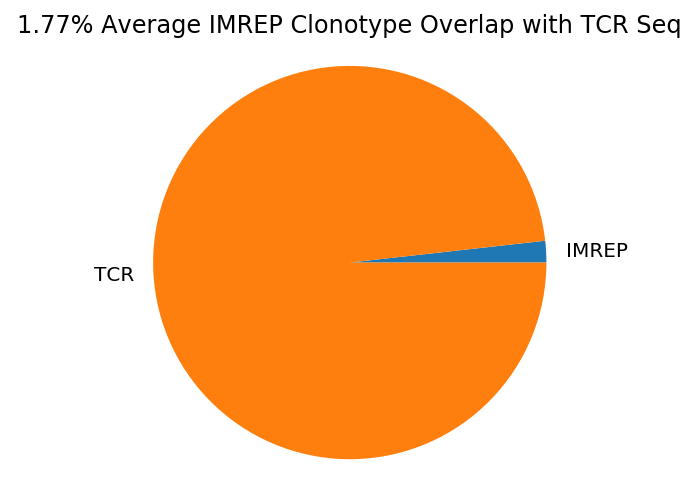

In [33]:
TCR_unique = clonotype_overlap_df["unique_clonotypes_TCR"].sum()
IMREP_overlap = clonotype_overlap_df["overlap_TCR_IMREP"].sum()
overlap = IMREP_overlap *1.0 / TCR_unique
data = [overlap, 1-overlap ]
labels = 'IMREP', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ 'Average IMREP Clonotype Overlap with TCR Seq')
plt.axis('equal')


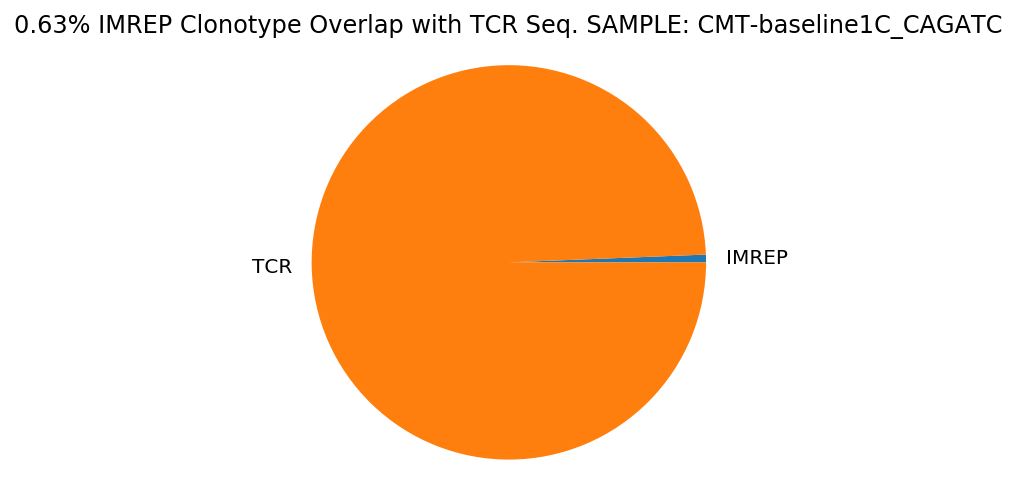

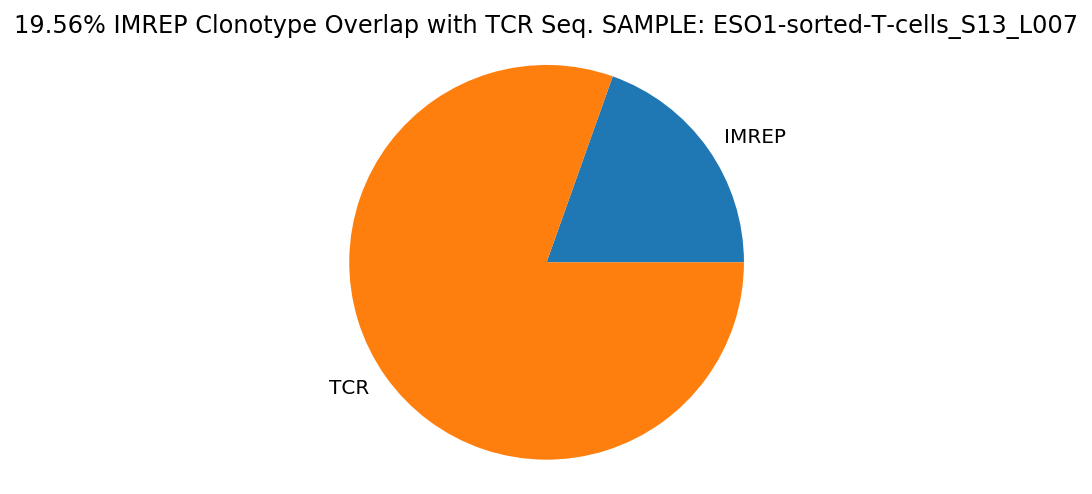

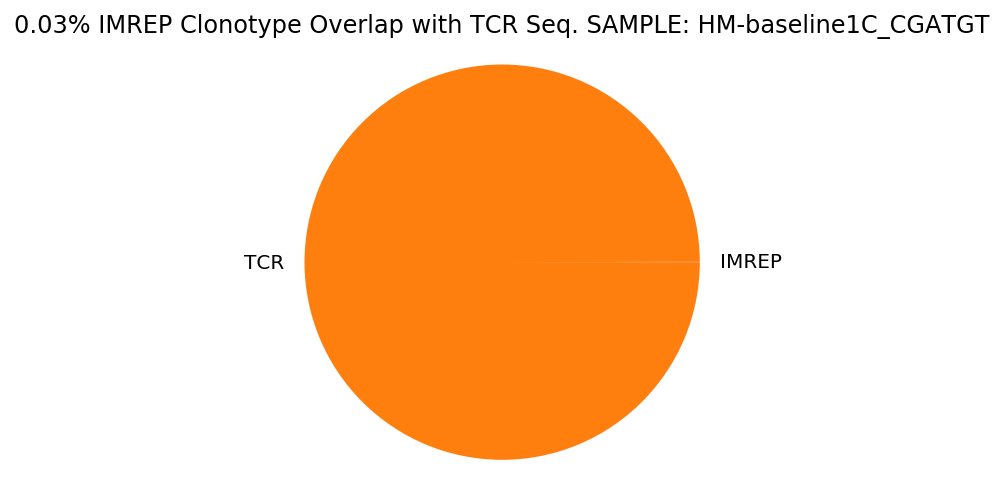

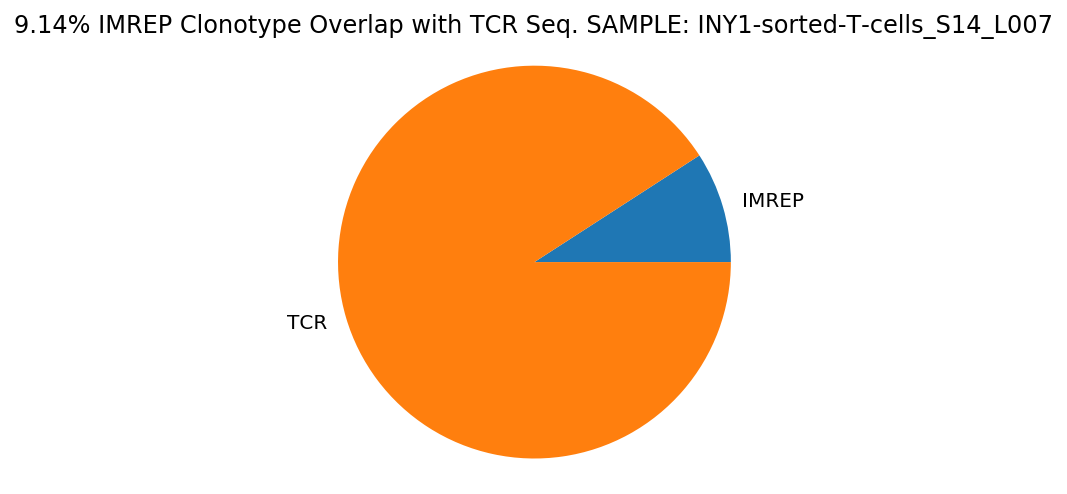

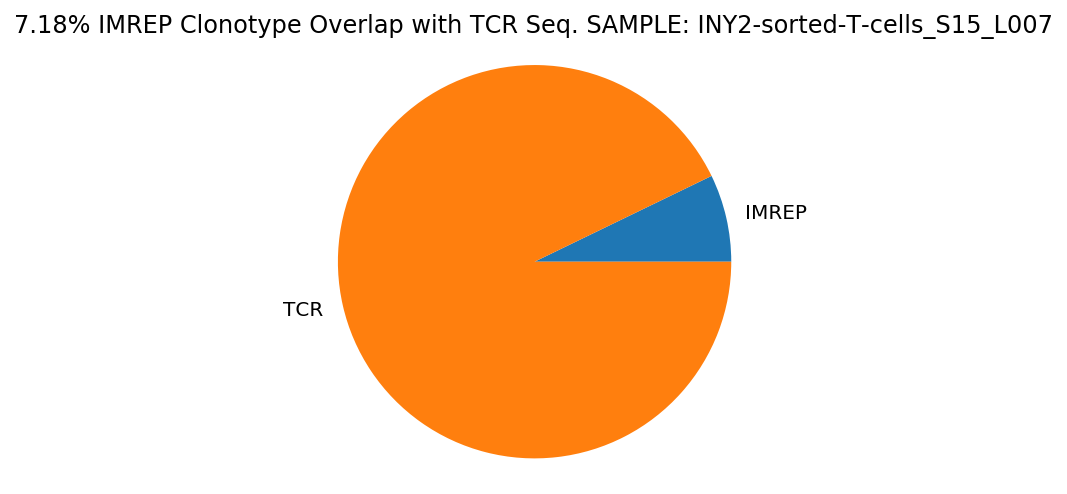

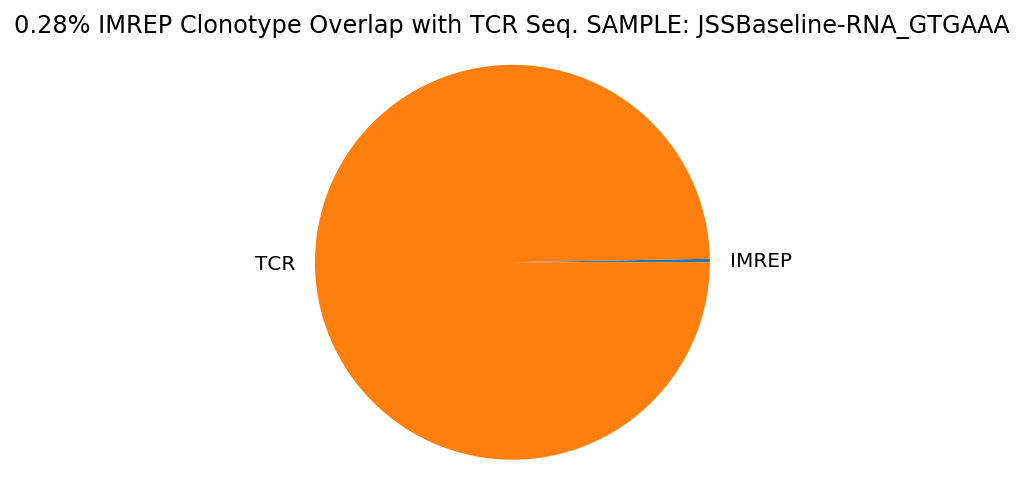

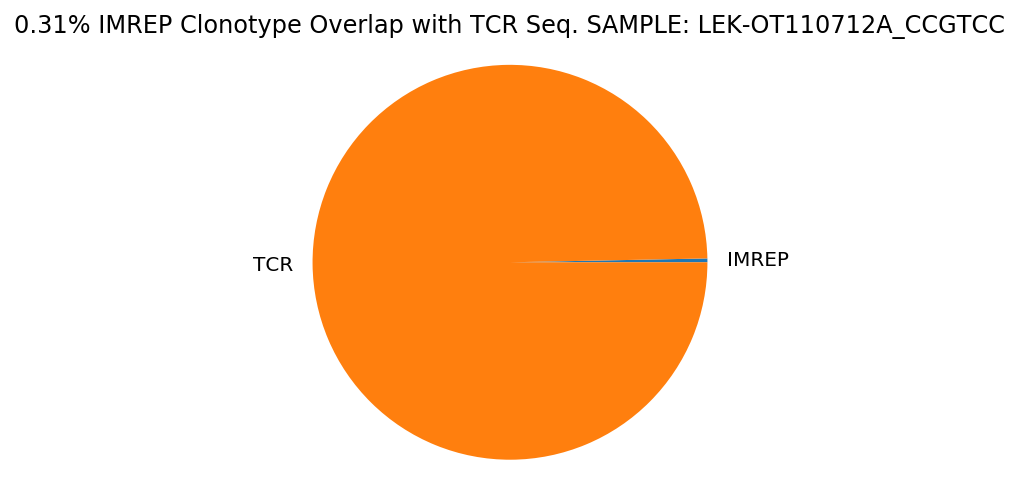

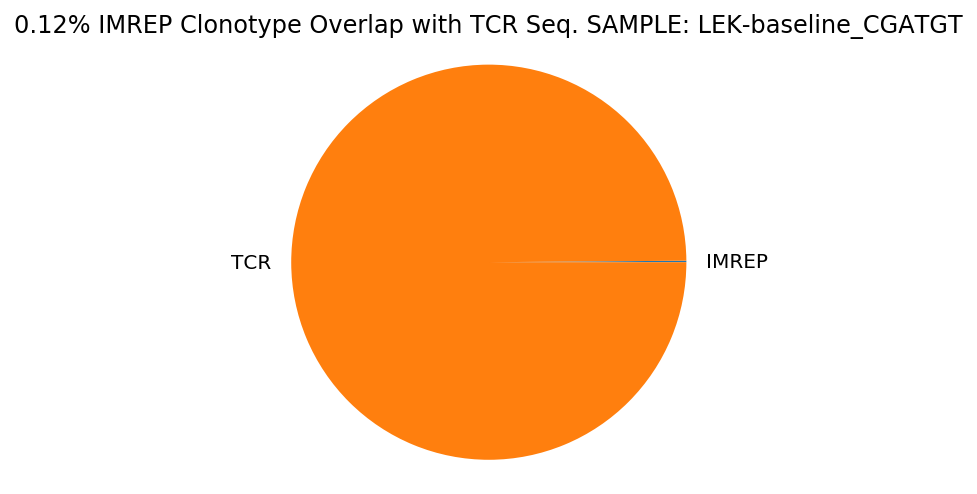

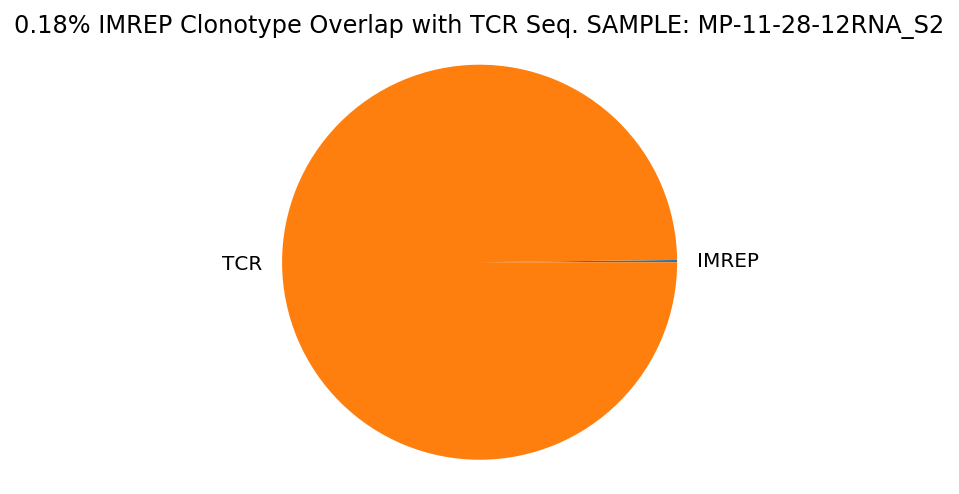

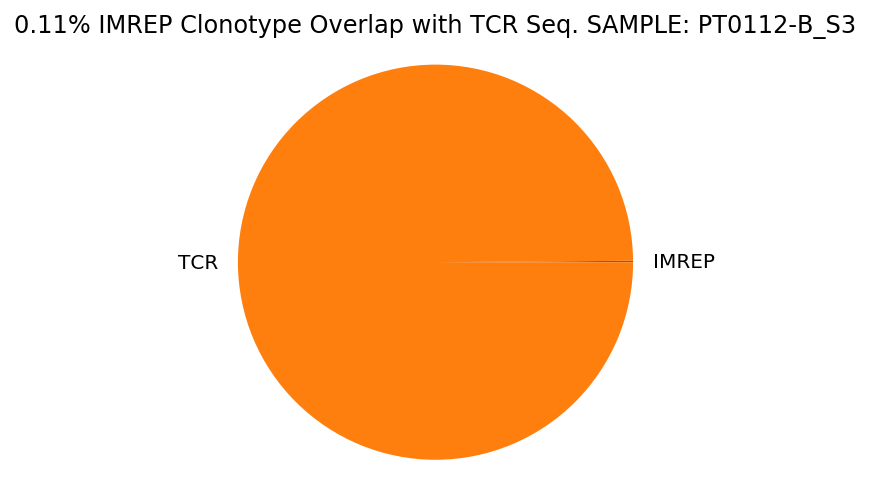

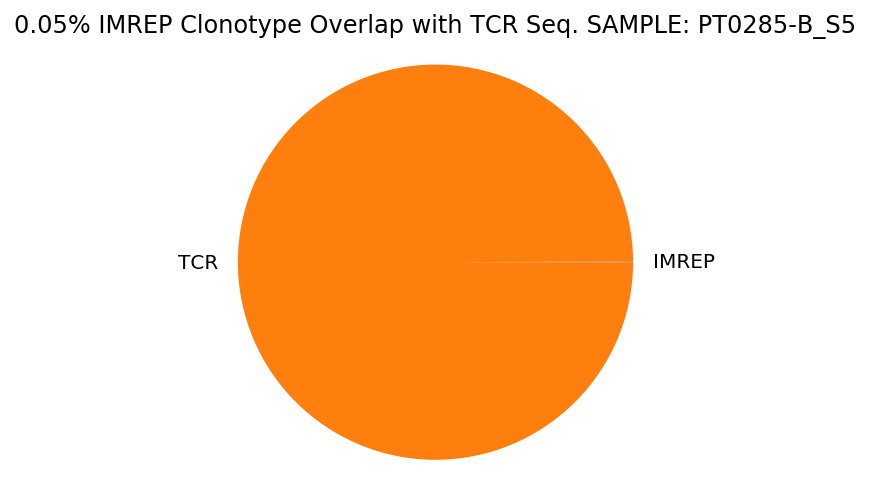

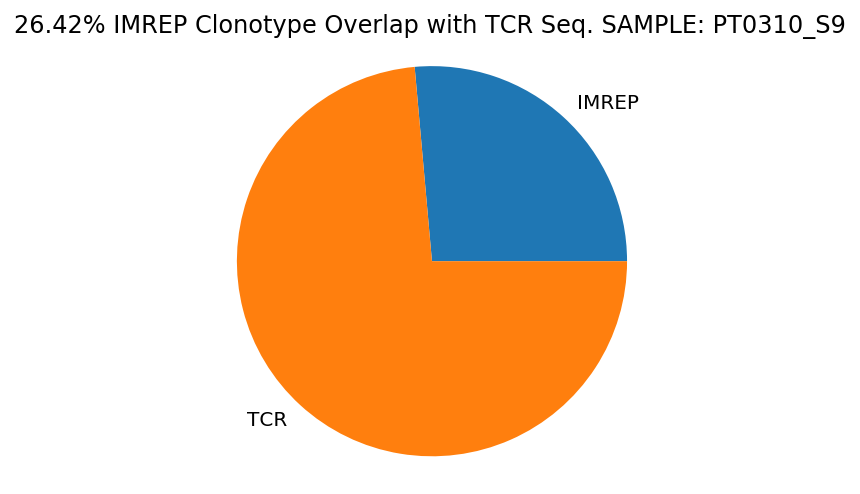

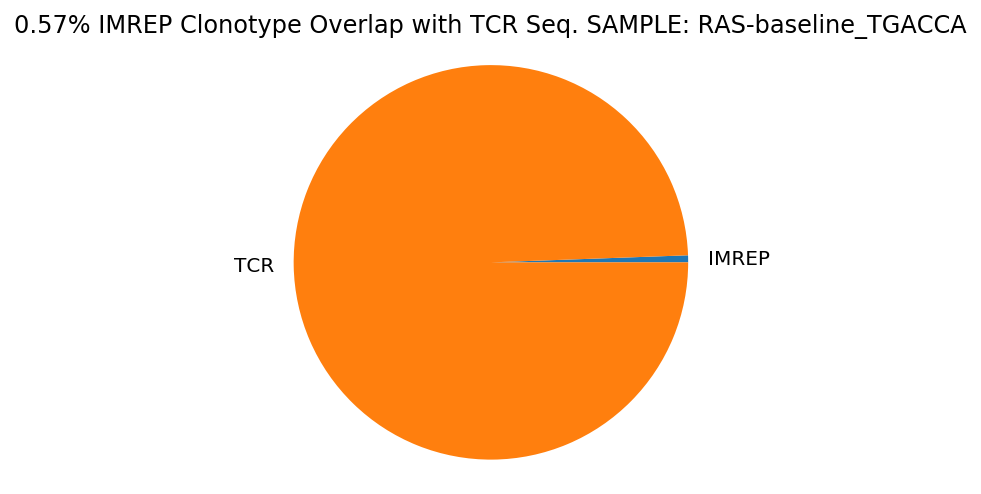

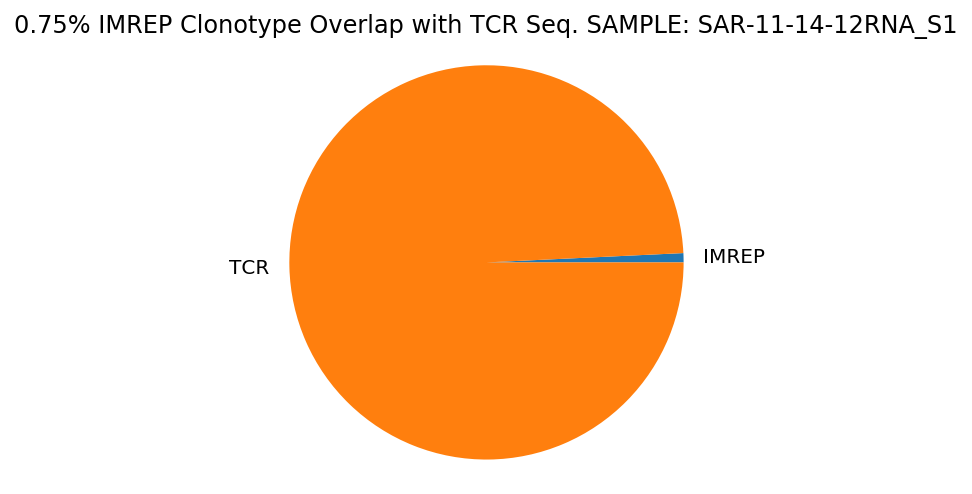

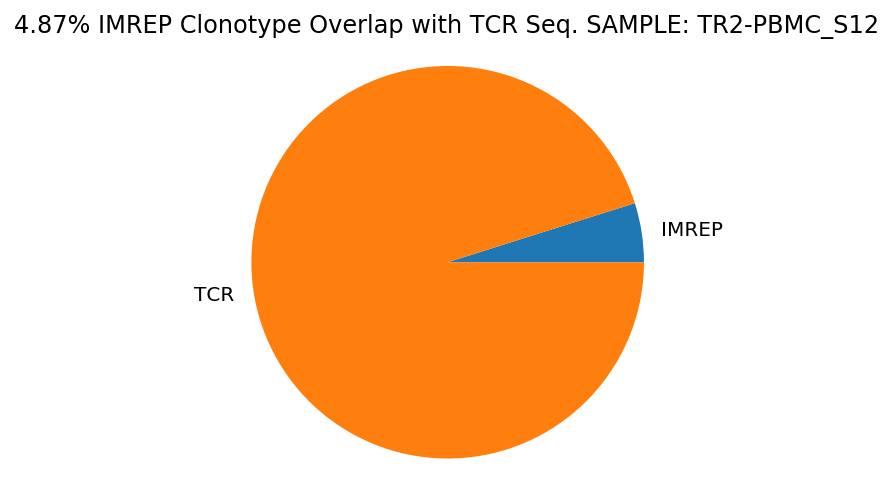

In [34]:
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    IMREP_overlap = df["overlap_TCR_IMREP"].sum()
    overlap = IMREP_overlap *1.0 / TCR_unique
    data = [overlap, 1-overlap ]
    labels = 'IMREP', 'TCR'
    plt.pie(data, labels = labels)
    plt.title(str(round(overlap*100,2)) + "% "+ 'IMREP Clonotype Overlap with TCR Seq. SAMPLE: ' + sample)
    plt.axis('equal')
    #plt.savefig("../figures/pie_plots/IMREP/Pie."+ sample +".png", bbox_inches='tight')
    plt.show()

## Average of Per sample Averages IMREP

(-1.1079198347940247,
 1.1003771349901916,
 -1.1071833785097906,
 1.1080605743917276)

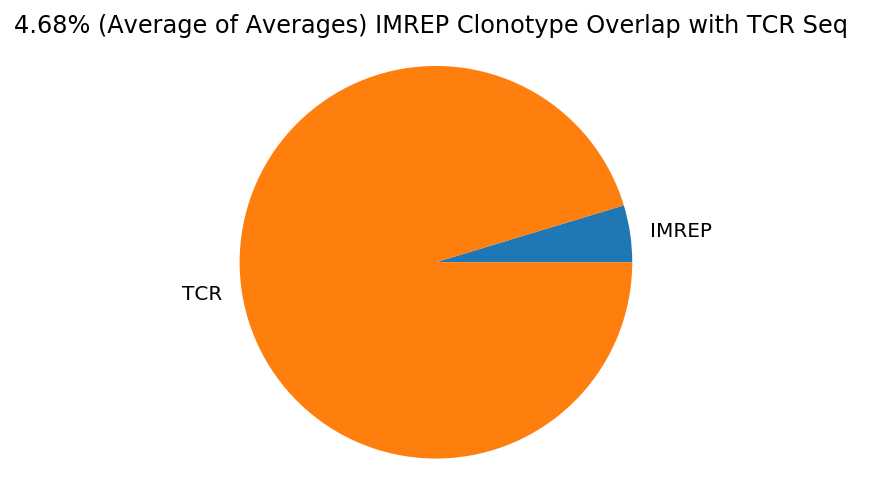

In [35]:
from statistics import mean

averages_per_sample = []
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    IMREP_overlap = df["overlap_TCR_IMREP"].sum()
    overlap = IMREP_overlap *1.0 / TCR_unique
    averages_per_sample.append(overlap)

overlap = mean(averages_per_sample)
data = [overlap, 1-overlap ]
labels = 'IMREP', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ '(Average of Averages) IMREP Clonotype Overlap with TCR Seq ')
plt.axis('equal')

## Average MIXCR

(-1.1038902643317587,
 1.1001852506824648,
 -1.1023428359507184,
 1.105514705510361)

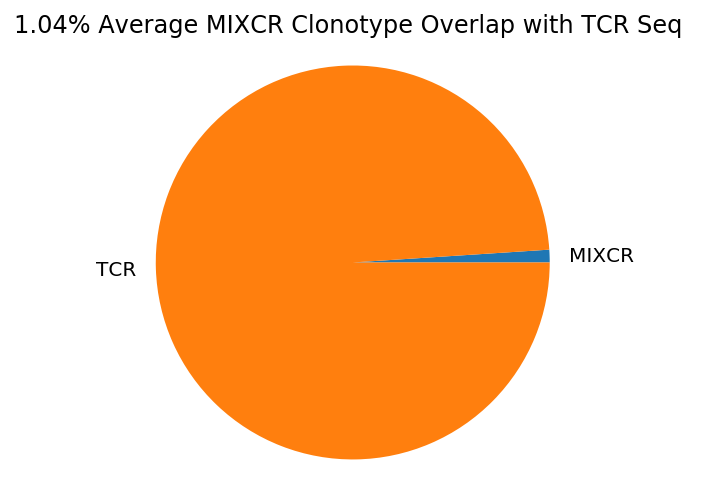

In [36]:
TCR_unique = clonotype_overlap_df["unique_clonotypes_TCR"].sum()
MIXCR_overlap = clonotype_overlap_df["overlap_TCR_MIXCR"].sum()
overlap = MIXCR_overlap *1.0 / TCR_unique
data = [overlap, 1-overlap ]
labels = 'MIXCR', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ 'Average MIXCR Clonotype Overlap with TCR Seq ')
plt.axis('equal')

## Per Sample MIXCR

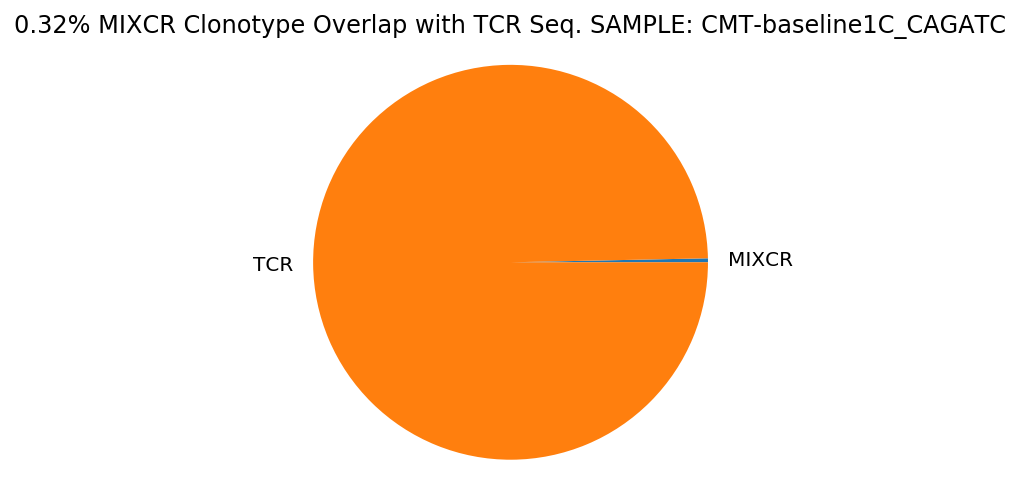

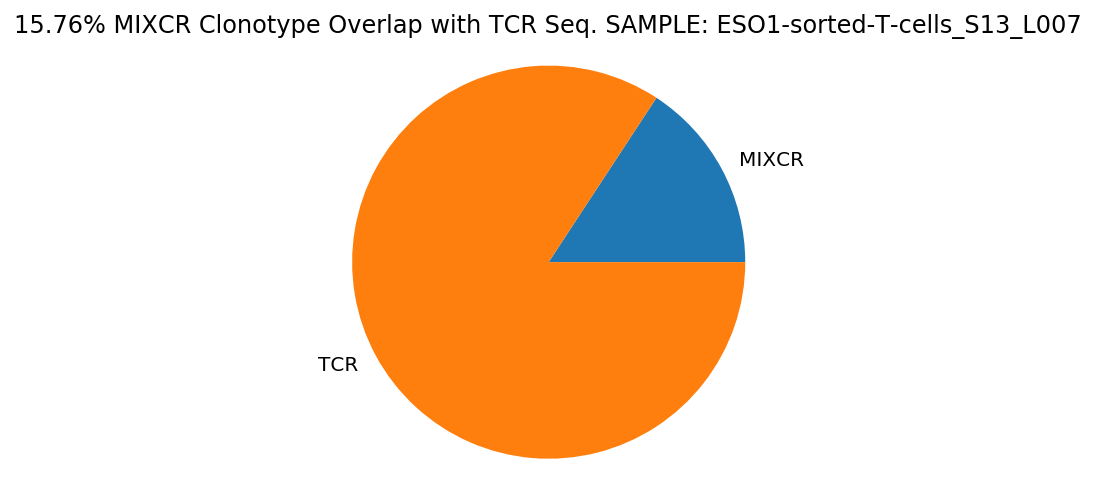

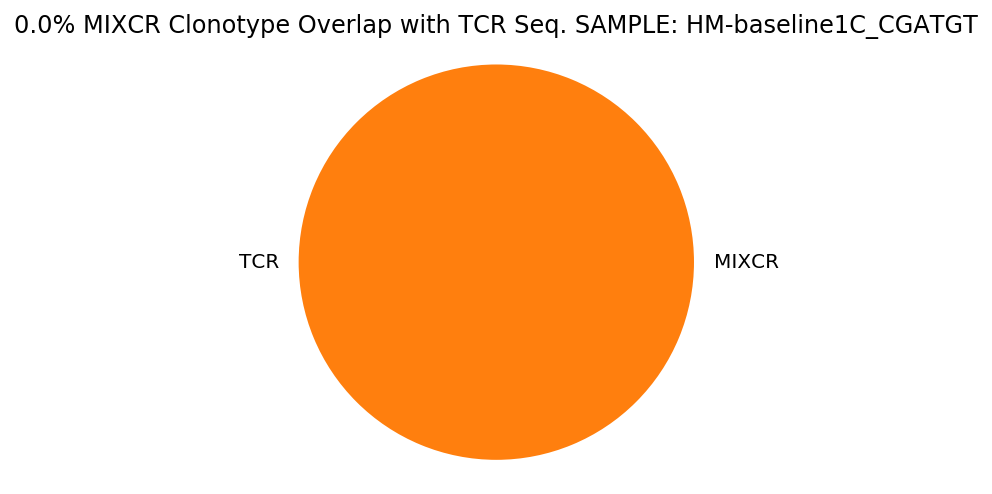

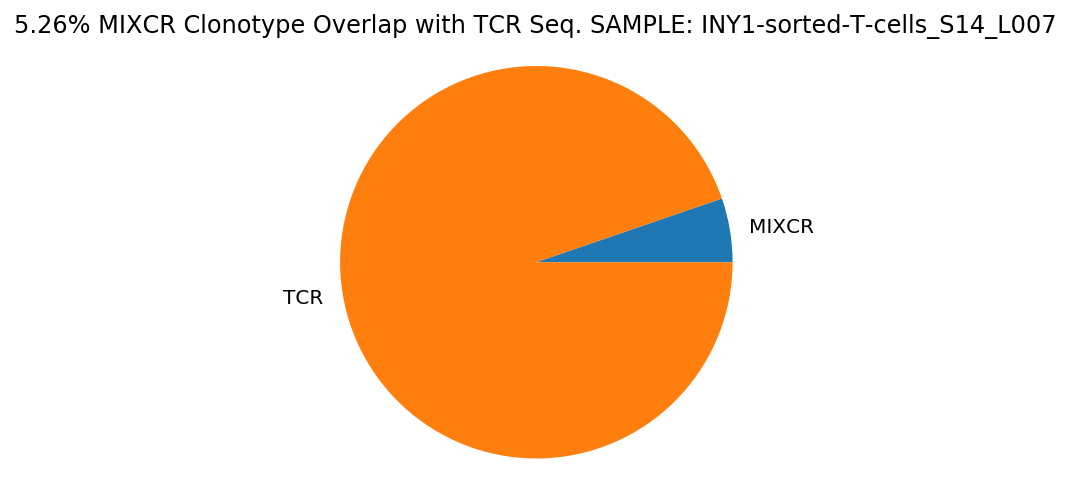

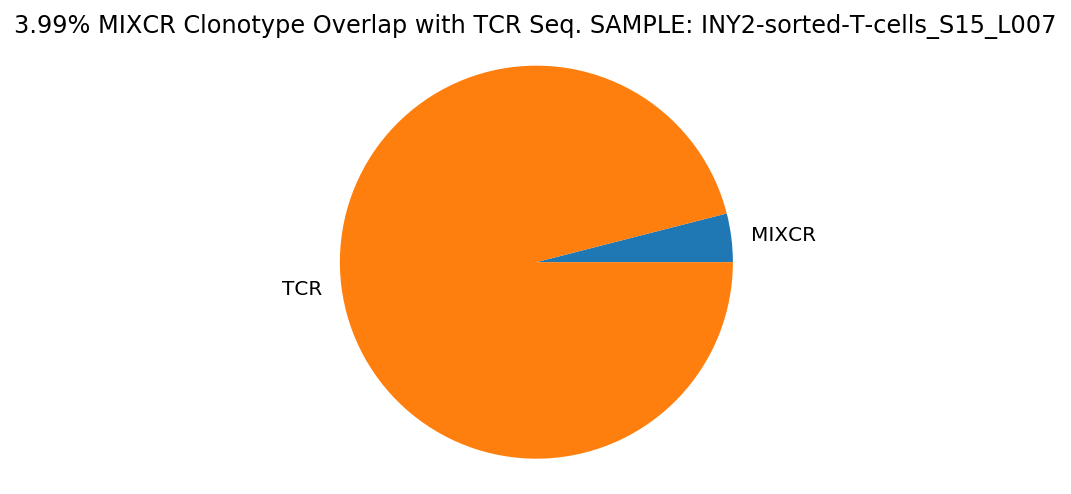

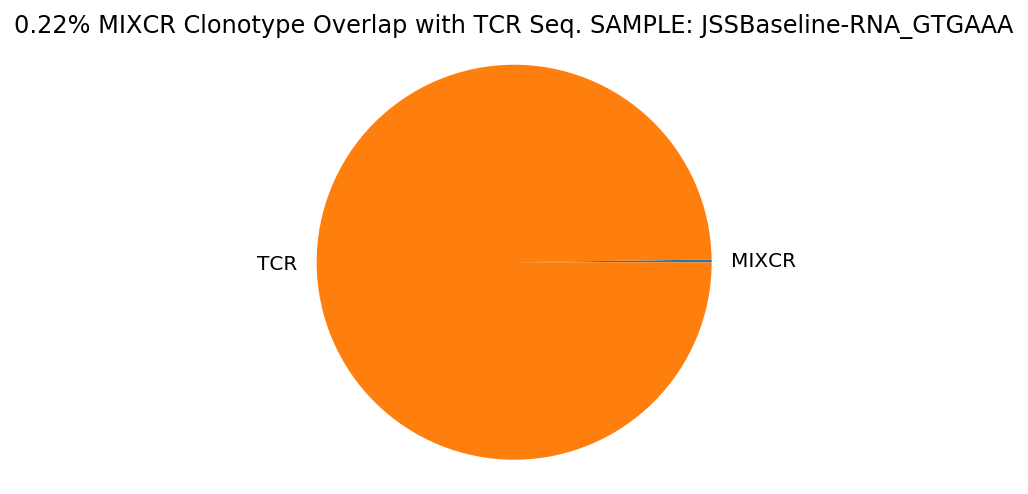

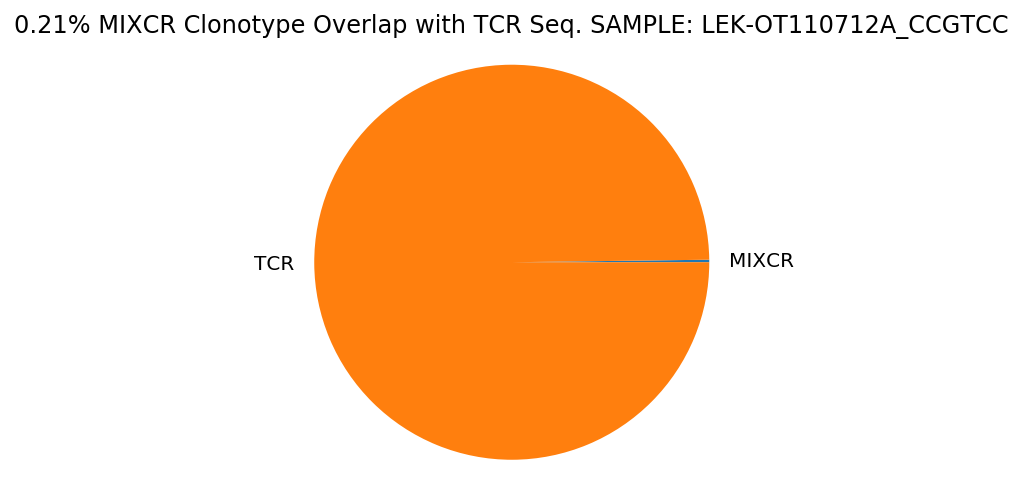

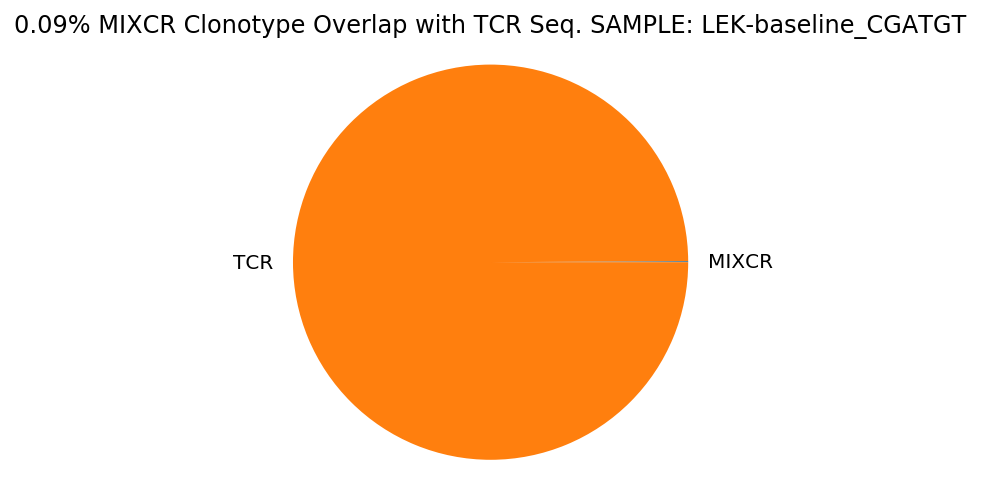

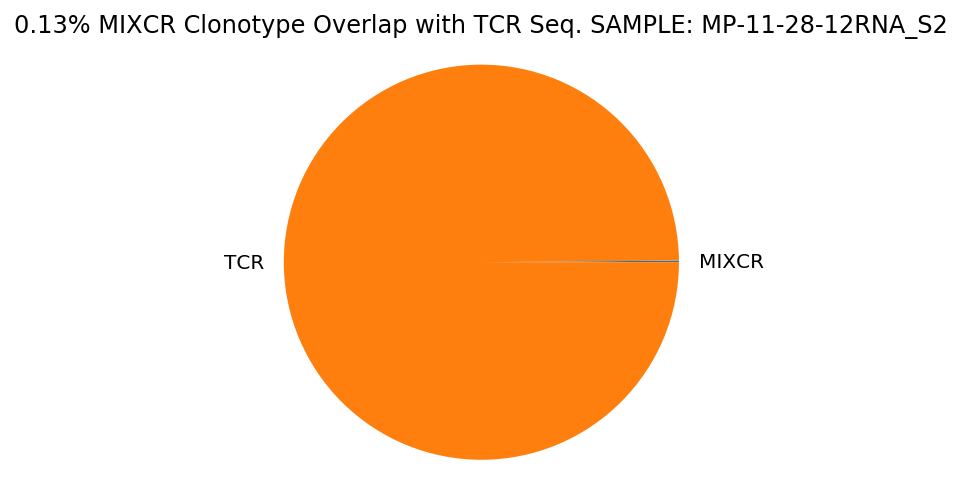

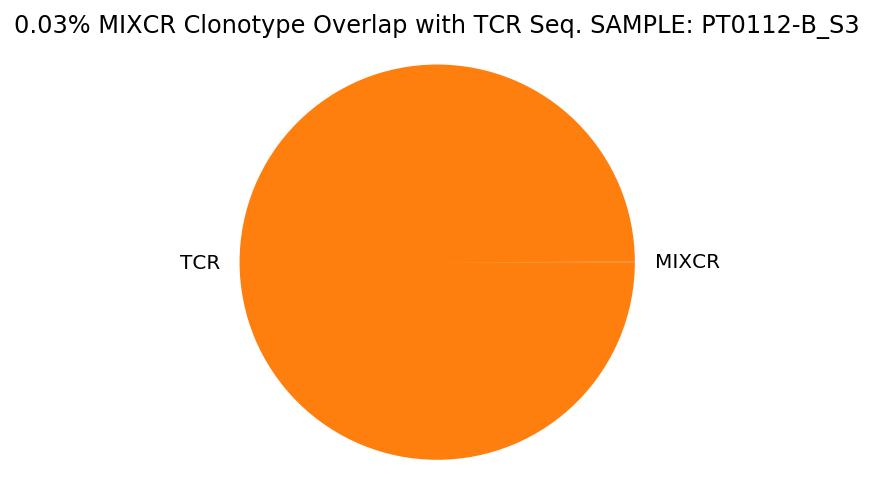

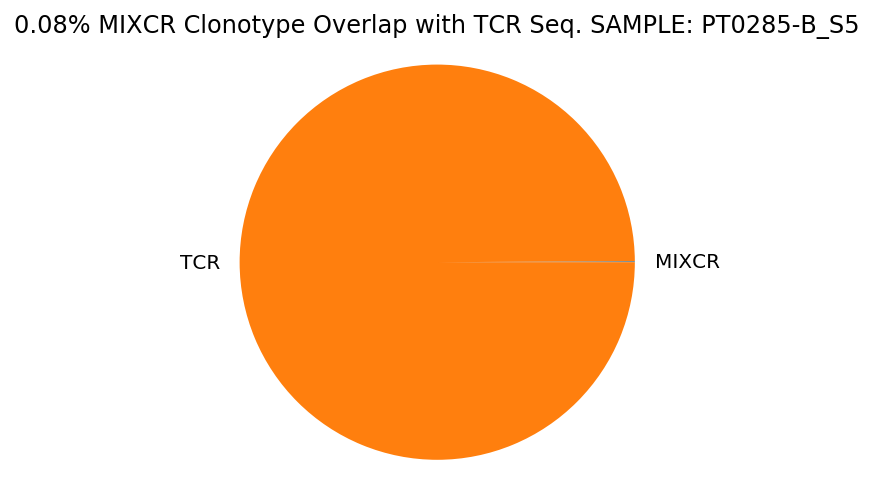

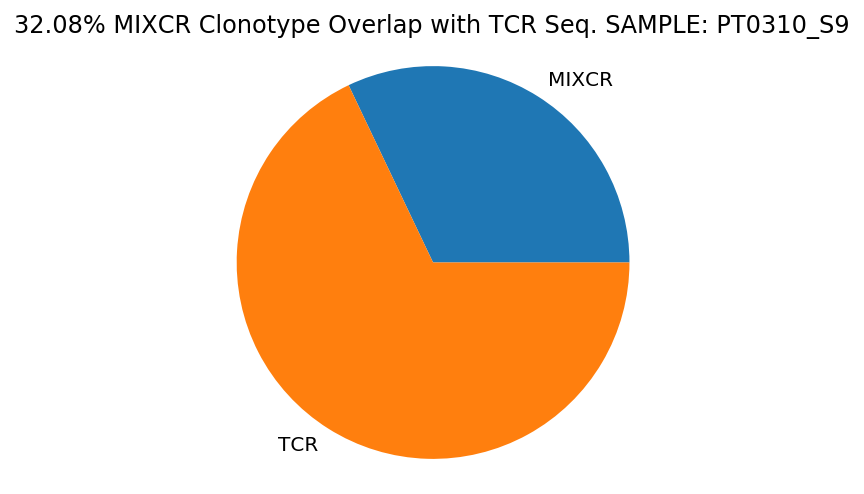

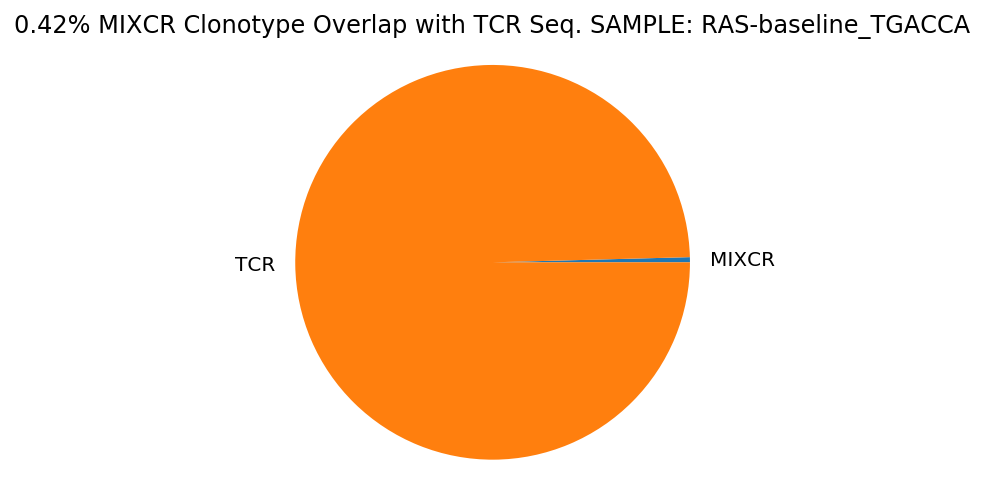

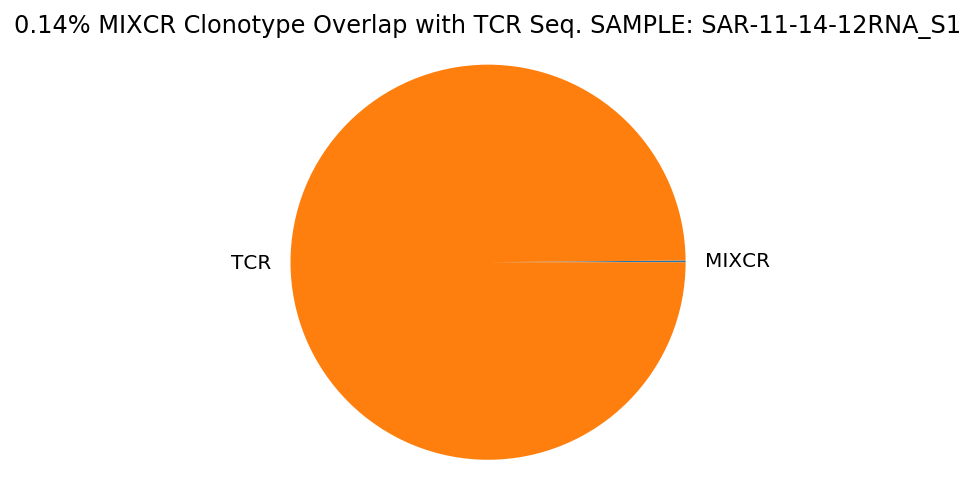

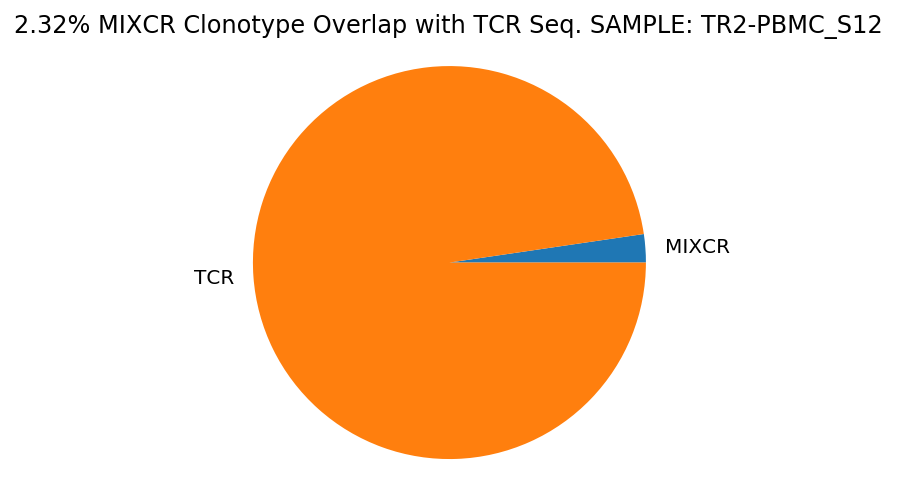

In [37]:
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    MIXCR_overlap = df["overlap_TCR_MIXCR"].sum()
    overlap = (MIXCR_overlap *1.0) / TCR_unique
    data = [overlap, 1-overlap ]
    labels = 'MIXCR', 'TCR'
    plt.pie(data, labels = labels)
    plt.title(str(round(overlap*100,2)) + "% "+ 'MIXCR Clonotype Overlap with TCR Seq. SAMPLE: ' + sample)
    plt.axis('equal')
    #plt.savefig("../figures/pie_plots/MIXCR/Pie."+ sample +".png", bbox_inches='tight')
    plt.show()

## Average of Per sample Averages MIXCR

(-1.1082911672469462,
 1.1003948174879499,
 -1.1066079756074871,
 1.106710793148233)

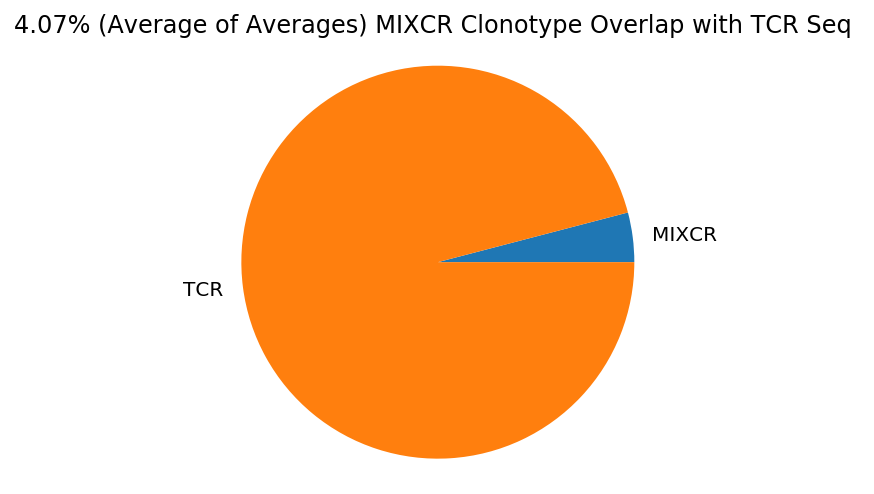

In [38]:
from statistics import mean 

averages_per_sample = []
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    MIXCR_overlap = df["overlap_TCR_MIXCR"].sum()
    overlap = MIXCR_overlap *1.0 / TCR_unique
    averages_per_sample.append(overlap)

overlap = mean(averages_per_sample)
data = [overlap, 1-overlap ]
labels = 'MIXCR', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ '(Average of Averages) MIXCR Clonotype Overlap with TCR Seq ')
plt.axis('equal')

## Average TRUST4

(-1.1066560940171009,
 1.1003169568579572,
 -1.1043049500396331,
 1.1084117830759006)

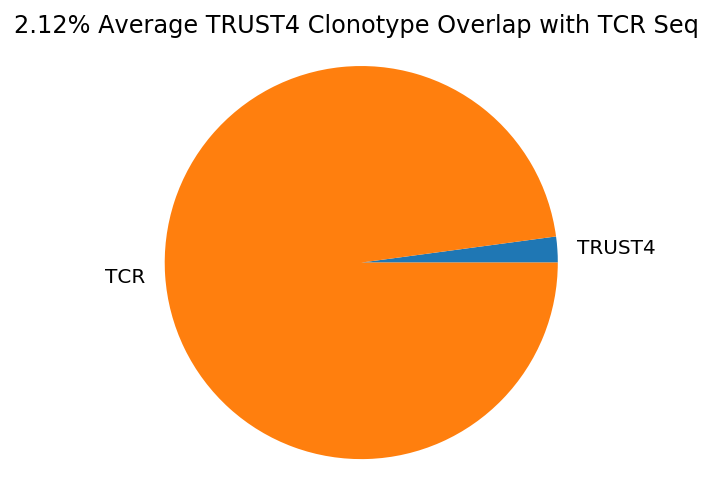

In [39]:
TCR_unique = clonotype_overlap_df["unique_clonotypes_TCR"].sum()
TRUST4_overlap = clonotype_overlap_df["overlap_TCR_TRUST4"].sum()
overlap = TRUST4_overlap *1.0 / TCR_unique
data = [overlap, 1-overlap ]
labels = 'TRUST4', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ 'Average TRUST4 Clonotype Overlap with TCR Seq ')
plt.axis('equal')

## Per Sample TRUST4

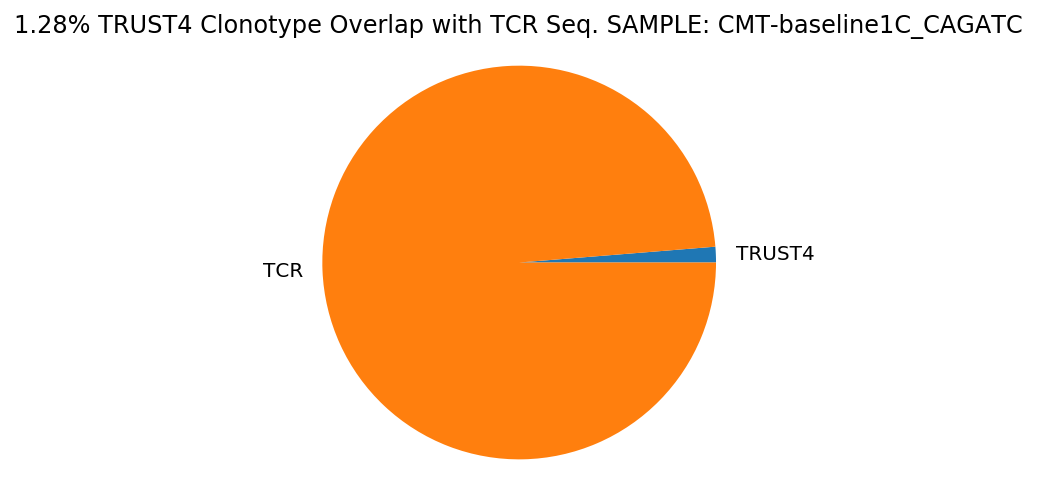

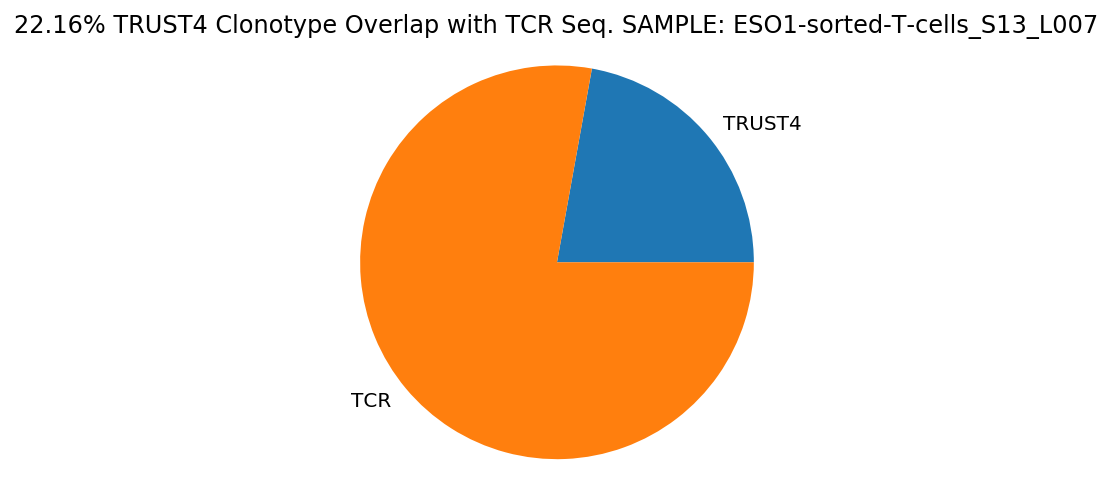

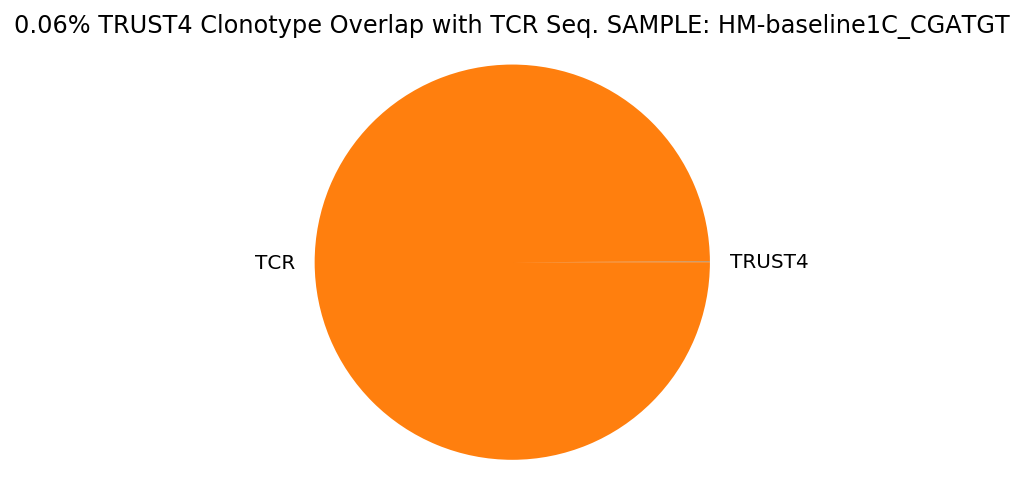

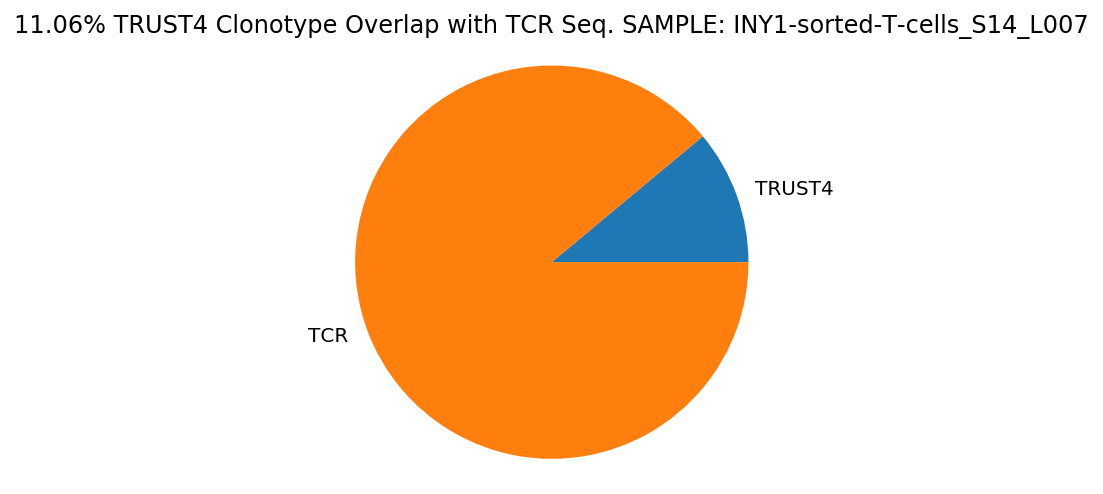

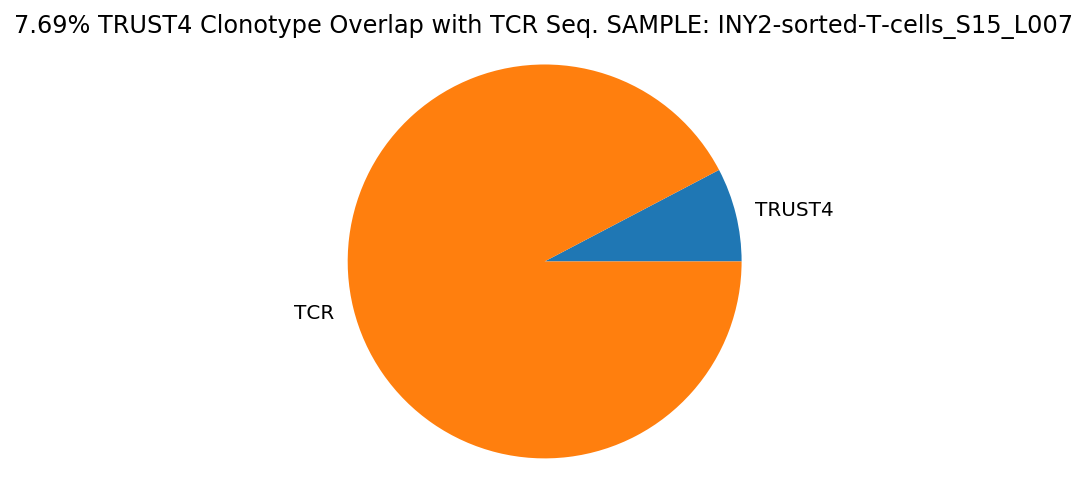

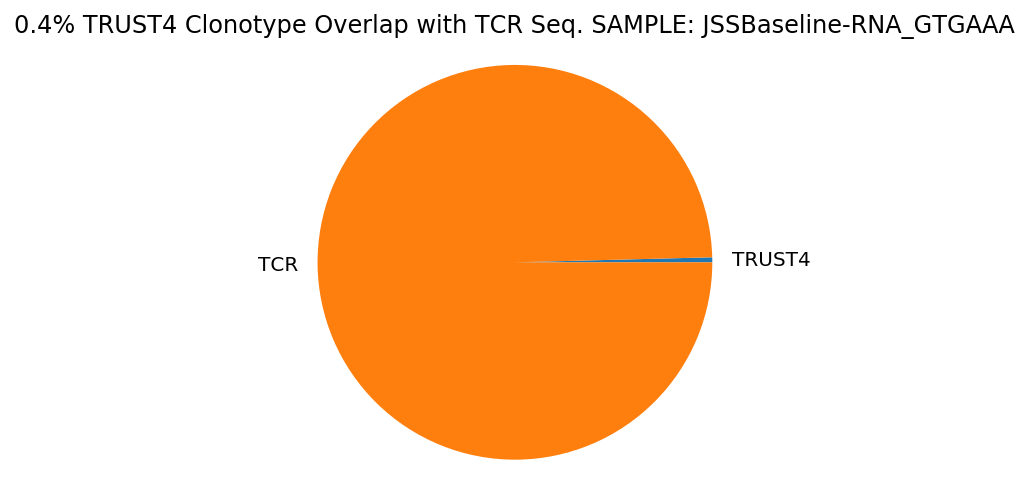

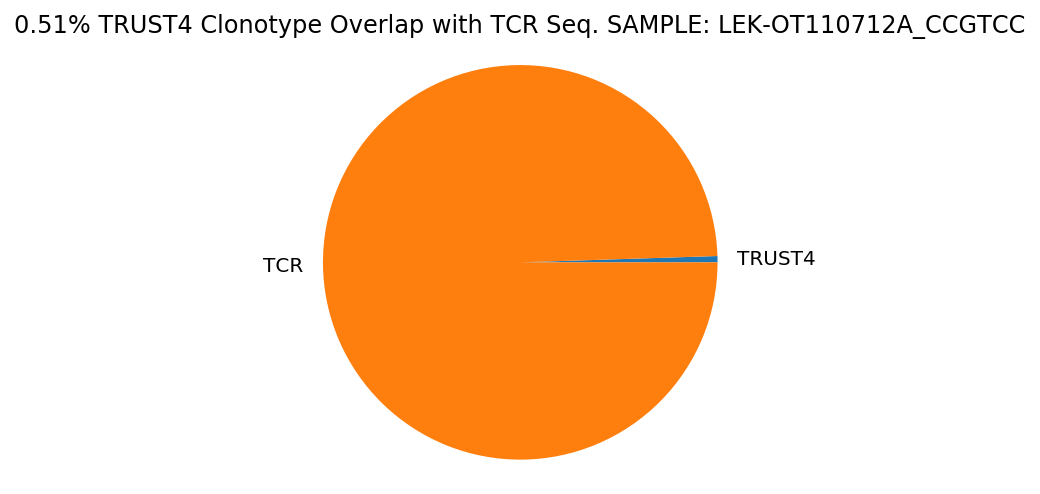

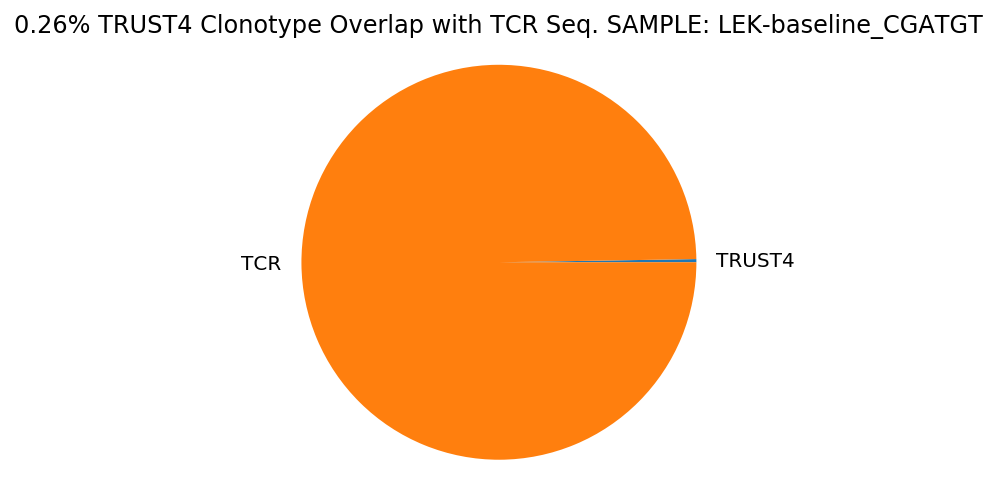

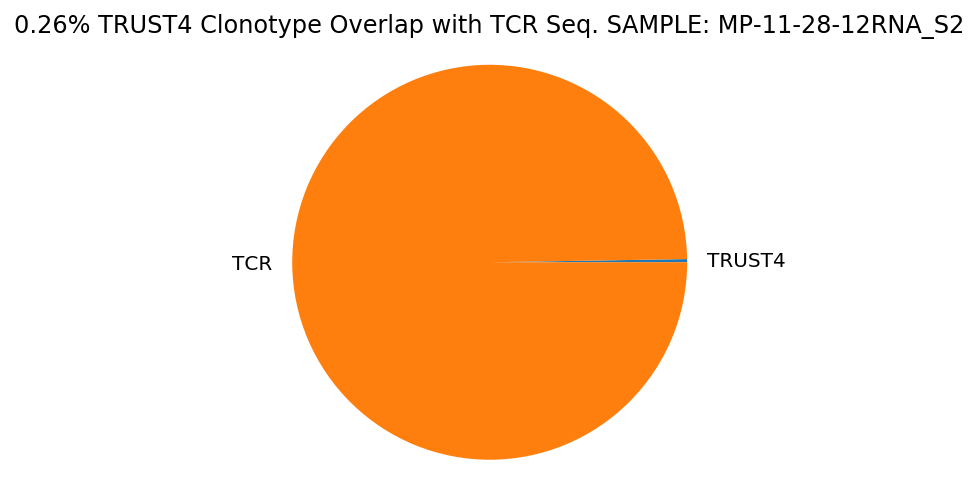

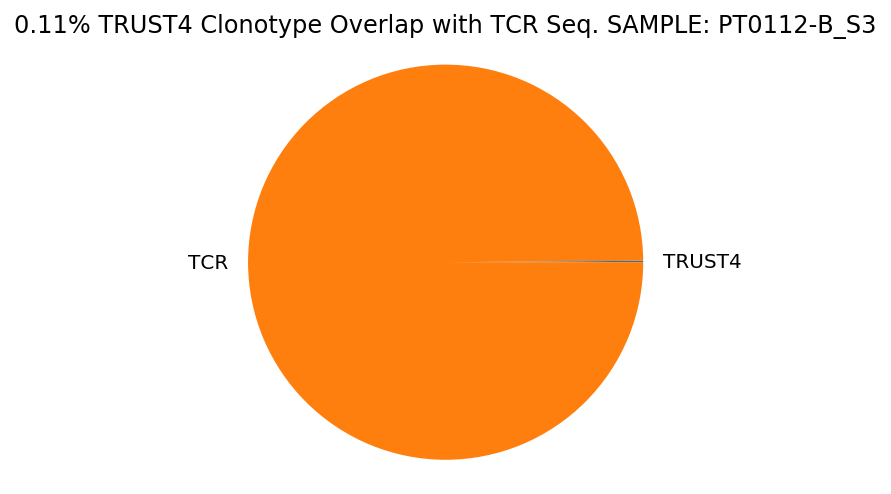

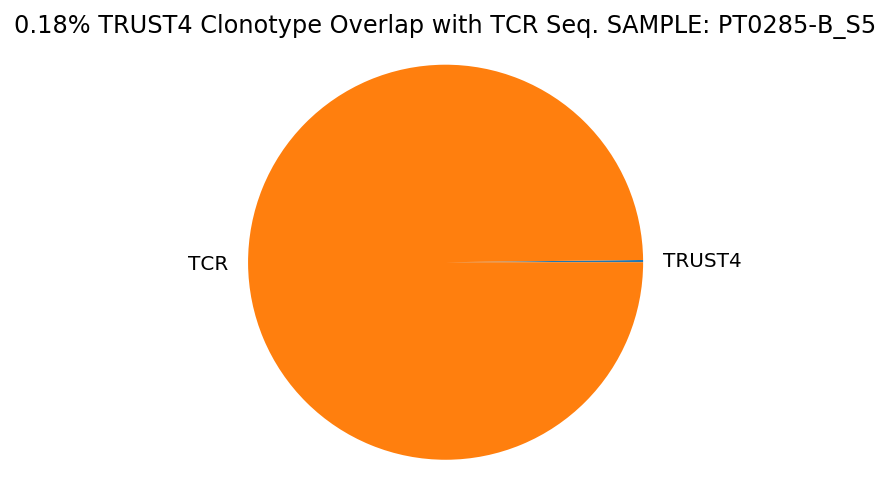

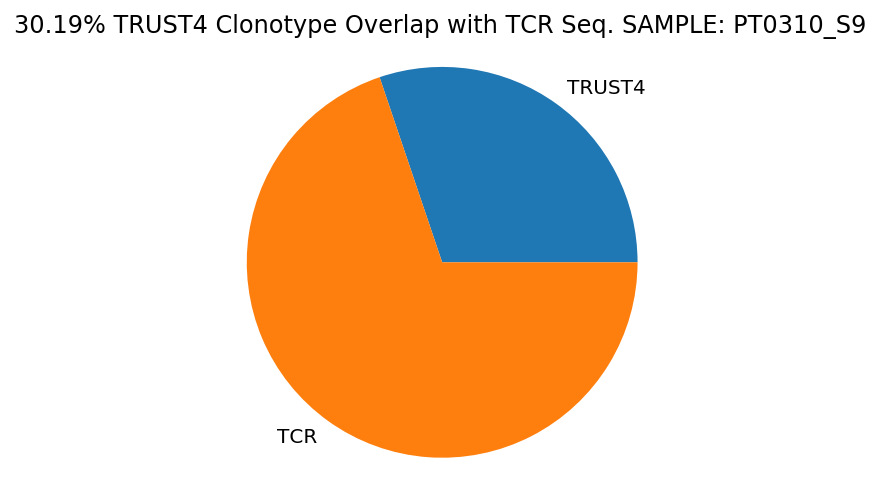

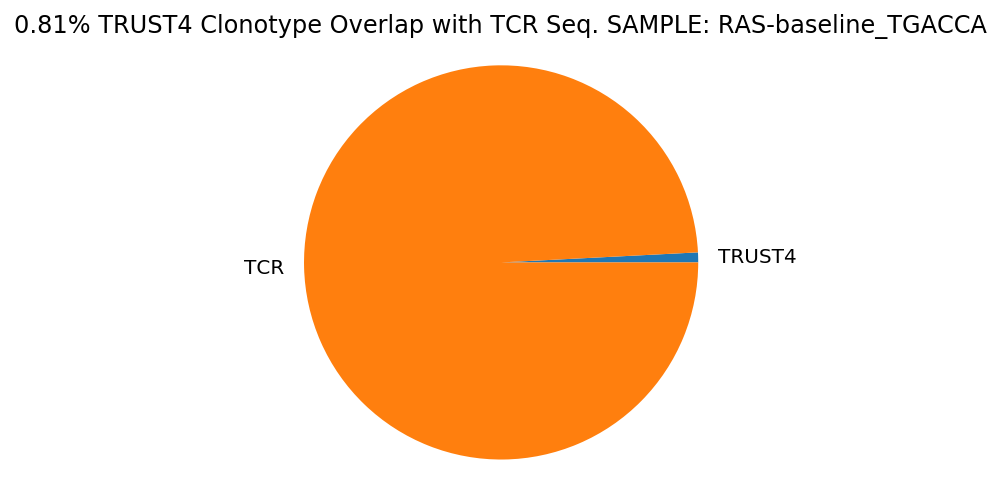

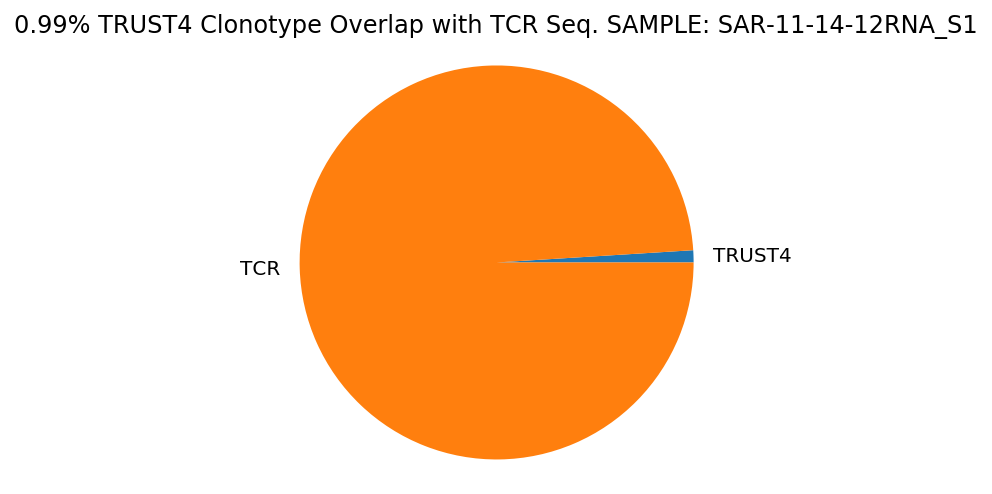

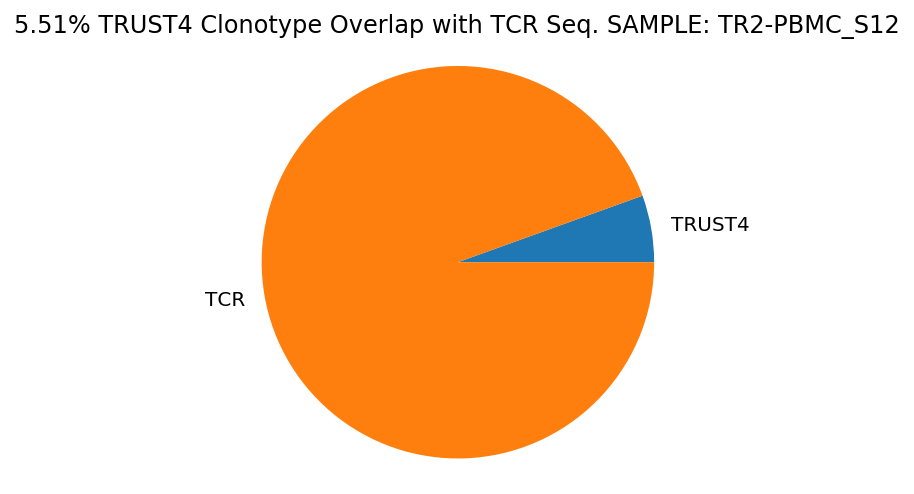

In [40]:
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    TRUST4_overlap = df["overlap_TCR_TRUST4"].sum()
    overlap = TRUST4_overlap *1.0 / TCR_unique
    data = [overlap, 1-overlap ]
    labels = 'TRUST4', 'TCR'
    plt.pie(data, labels = labels)
    plt.title(str(round(overlap*100,2)) + "% "+ 'TRUST4 Clonotype Overlap with TCR Seq. SAMPLE: ' + sample)
    plt.axis('equal')
    #plt.savefig("../figures/pie_plots/TRUST4/Pie."+ sample +".png", bbox_inches='tight')
    plt.show()

## Average of Per sample Averages TRUST4

(-1.1068861763046447,
 1.100327913157364,
 -1.107670657942711,
 1.1083728172395195)

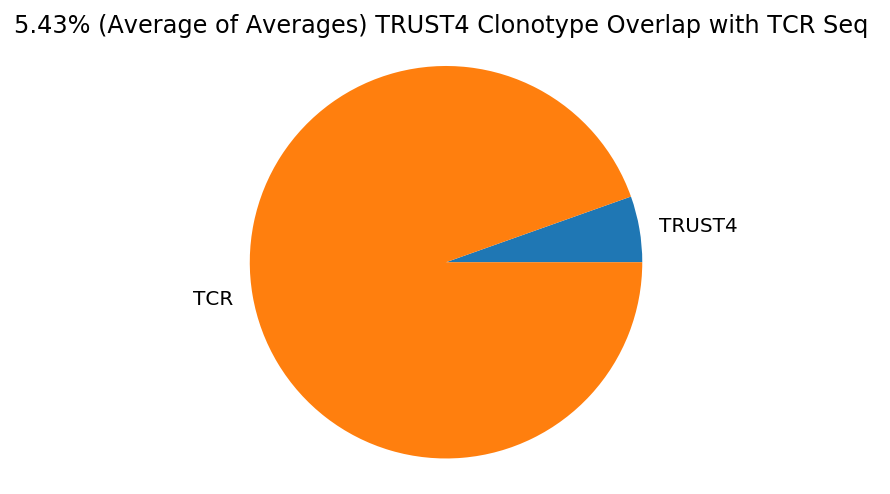

In [41]:
from statistics import mean 

averages_per_sample = []
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    TRUST4_overlap = df["overlap_TCR_TRUST4"].sum()
    overlap = TRUST4_overlap *1.0 / TCR_unique
    averages_per_sample.append(overlap)

overlap = mean(averages_per_sample)
data = [overlap, 1-overlap ]
labels = 'TRUST4', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ '(Average of Averages) TRUST4 Clonotype Overlap with TCR Seq ')
plt.axis('equal')

## Venn diagram of overlapping clones (original data)

In [42]:
clonotype_overlap_df = pd.read_csv('../summary_data/complete_sample/all_tools_TRB_clonotype_overlap_stats.csv')
clonotype_overlap_df.head()

Sample  unique_clonotypes_TCR  \
0         CMT-baseline1C_CAGATC                   9354   
1  ESO1-sorted-T-cells_S13_L007                   3001   
2          HM-baseline1C_CGATGT                   3548   
3  INY1-sorted-T-cells_S14_L007                   3229   
4  INY2-sorted-T-cells_S15_L007                   7697   

   unique_clonotypes_IMREP  unique_clonotypes_MIXCR  unique_clonotypes_TRUST4  \
0                       92                       34                       200   
1                     3682                     2592                      4154   
2                        1                        0                         4   
3                     4392                     1565                      5275   
4                     3513                     1012                      3923   

   overlap_TCR_IMREP  overlap_TCR_MIXCR  overlap_TCR_TRUST4  \
0                 59                 30                 120   
1                587                473                 665   
2                  1                  0                   2   
3                295                170                 357   
4                553                307                 592   

   overlap_IMREP_MIXCR  overlap_IMREP_TRUST4  ...  \
0                   22                    63  ...   
1                 2215                  3113  ...   
2                    0                     1  ...   
3                 1272                  3017  ...   
4                  821                  2200  ...   

                  overlap_TCR_MIXCR_dict_frequencies  \
0  {'CASSSIPRNEQFF': [0.0026729322022114046, 0.07...   
1  {'CSVELGGGASETQYF': [2.208066065336675e-05, 1....   
2                                                 {}   
3  {'CASSQTLNGEQFF': [6.83667190811513e-05, 0.000...   
4  {'CASSLSSSGAGDETQYF': [2.614780701611032e-05, ...   

                 overlap_TCR_TRUST4_dict_frequencies  \
0  {'CASSLDGGPLHF': [4.414421473511816e-05, 0.002...   
1  {'CSAIIQETQYF': [2.208066065336675e-05, 3.0201...   
2  {'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ...   
3  {'CASSVLAGDYEQYF': [3.418335954057565e-05, 2.2...   
4  {'CASSLSSSGAGDETQYF': [2.614780701611032e-05, ...   

                overlap_IMREP_MIXCR_dict_frequencies  \
0  {'CASSLLNEQFF': [0.012987012987012988, 0.02197...   
1  {'CSVELGGGASETQYF': [1.824942400255492e-05, 1....   
2                                                 {}   
3  {'CASSSPRAHSYEQYF': [6.932409012131716e-05, 4....   
4  {'CASSRPNDSYTDTQYF': [6.161998952460178e-05, 3...   

               overlap_IMREP_TRUST4_dict_frequencies  \
0  {'CASSLLNEQFF': [0.012987012987012988, 0.00870...   
1  {'CSVELGGGASETQYF': [1.824942400255492e-05, 1....   
2  {'CASSSWRGRGSTDTQYF': [1.0, 0.10526315789473684]}   
3  {'CASSVLAGDYEQYF': [3.466204506065858e-05, 2.2...   
4  {'CASSRPNDSYTDTQYF': [6.161998952460178e-05, 3...   

               overlap_MIXCR_TRUST4_dict_frequencies  \
0  {'CASSLLNEQFF': [0.02197802197802198, 0.008708...   
1  {'CSVELGGGASETQYF': [1.5097530044084788e-05, 1...   
2                                                 {}   
3  {'CASSYRAYNSPLHF': [4.834421078075901e-05, 8.8...   
4  {'CASSRPNDSYTDTQYF': [3.8412783774440136e-05, ...   

            overlap_TCR_IMREP_MIXCR_dict_frequencies  \
0  {'CASSSIPRNEQFF': [0.0026729322022114046, 0.03...   
1  {'CSVELGGGASETQYF': [2.208066065336675e-05, 1....   
2                                                 {}   
3  {'CASSQTLNGEQFF': [6.83667190811513e-05, 0.000...   
4  {'CASSLSSSGAGDETQYF': [2.614780701611032e-05, ...   

           overlap_TCR_IMREP_TRUST4_dict_frequencies  \
0  {'CASSLKRNTEAFF': [8.056319189159064e-05, 0.00...   
1  {'CSARGRDNQPQHF': [2.208066065336675e-05, 1.82...   
2  {'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ...   
3  {'CASSVLAGDYEQYF': [3.418335954057565e-05, 3.4...   
4  {'CASSLSSSGAGDETQYF': [2.614780701611032e-05, ...   

           overlap_TCR_MIXCR_TRUST4_dict_frequencies  \
0  {'CASSSIPRNEQFF': [0.0026729322022114046, 0.07...   
1  {'CSVELGGGASETQYF

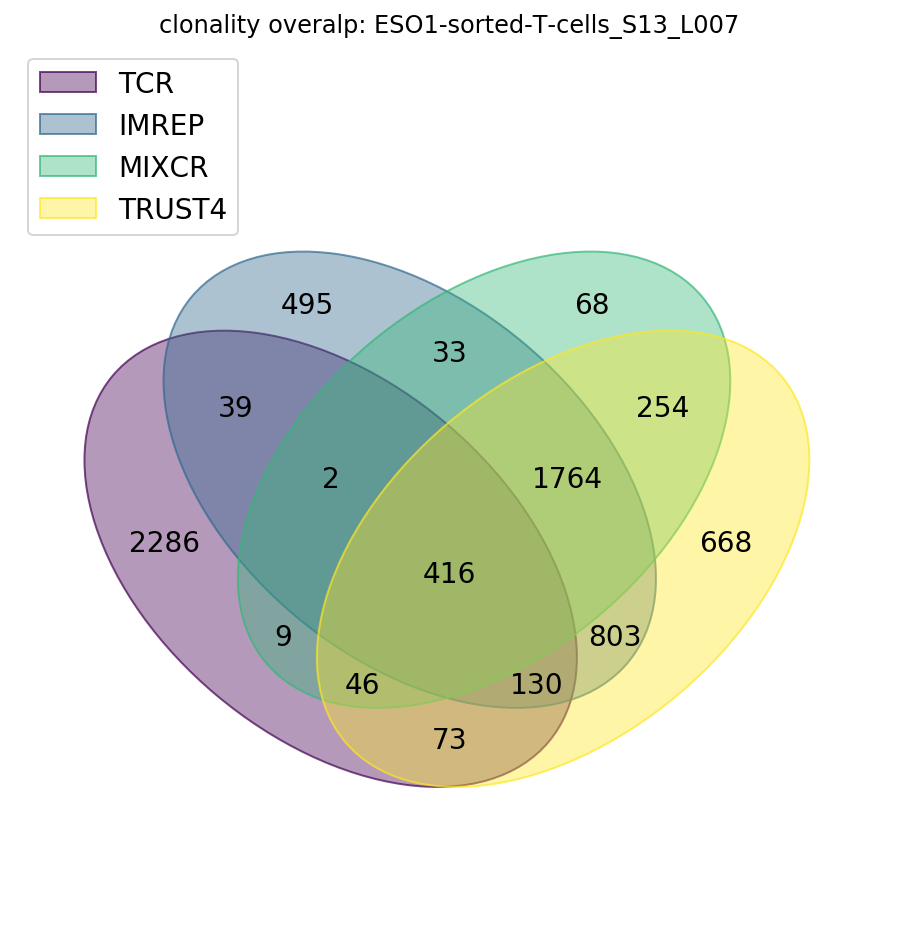

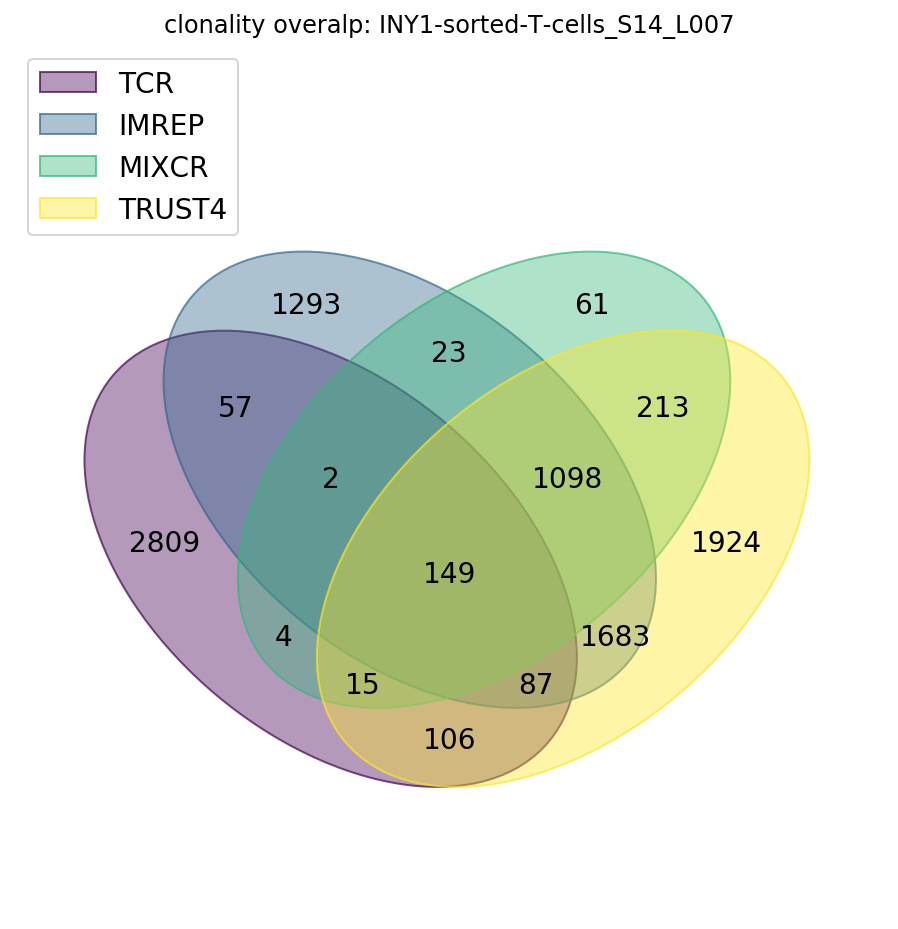

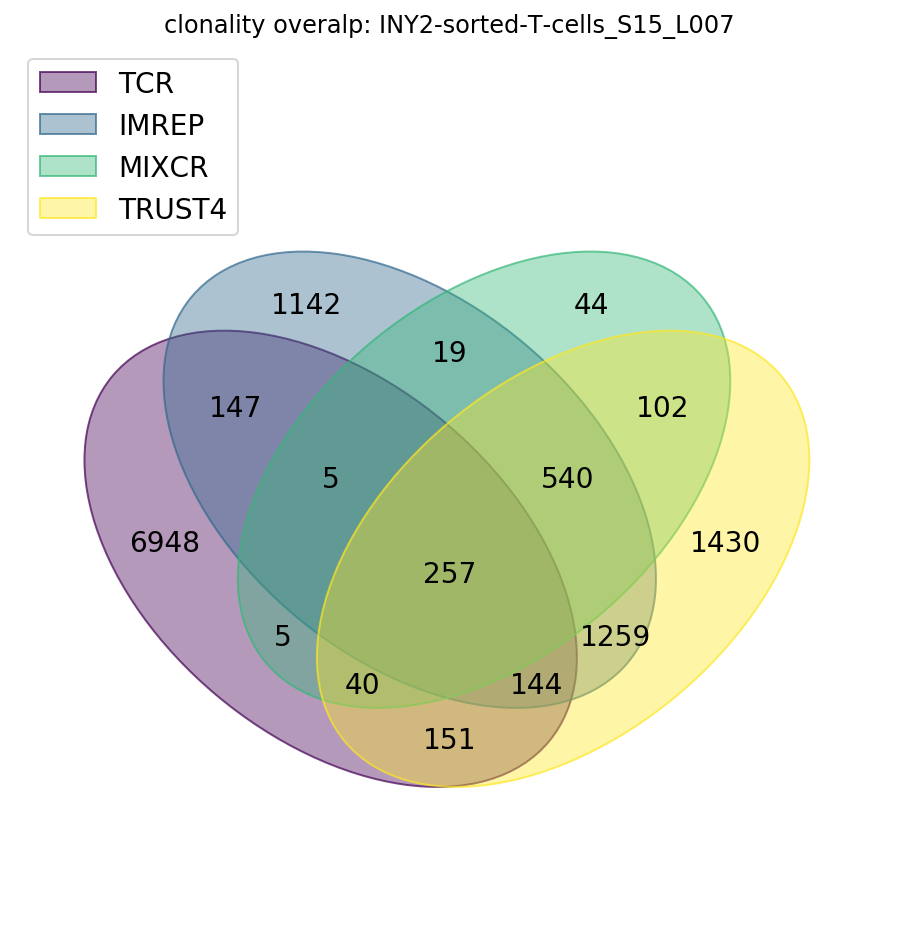

In [43]:
import ast
from venn import venn
%matplotlib inline

samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']


# df = merge_IMREP_TRUST4_MIXCR_TCR
# for sample in samples:
    
#     total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
#     total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
#     total_unique_clonotypes_MIXCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique().tolist())
#     total_unique_clonotypes_TRUST4 = set(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique().tolist())
    
#     tools = {
#         "TCR": total_unique_clonotypes_TCR,
#         "IMREP": total_unique_clonotypes_IMREP,
#         "MIXCR": total_unique_clonotypes_MIXCR,
#         "TRUST4": total_unique_clonotypes_TRUST4
#     }

#     ax = venn(tools,figsize=(8, 8), fontsize=14, legend_loc="upper left")
#     ax.set(title = sample)
#     plt.savefig('../figures/venndiagrams/vendiagram' + sample + '.png', bbox_inches='tight')
    

for sample in monoclonal_sample:  
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    tools = {
        "TCR": set(ast.literal_eval(df['unique_clonotypes_TCR_set'].tolist()[0])),
        "IMREP": set(ast.literal_eval(df['unique_clonotypes_IMREP_set'].tolist()[0])),
        "MIXCR": set(ast.literal_eval(df['unique_clonotypes_MIXCR_set'].tolist()[0])),
        "TRUST4": set(ast.literal_eval(df['unique_clonotypes_TRUST4_set'].tolist()[0]))
    }

    
    ax = venn(tools,figsize=(8, 8), fontsize=14, legend_loc="upper left")
    ax.set(title = "clonality overalp: "+sample)


### Monoclonal samples

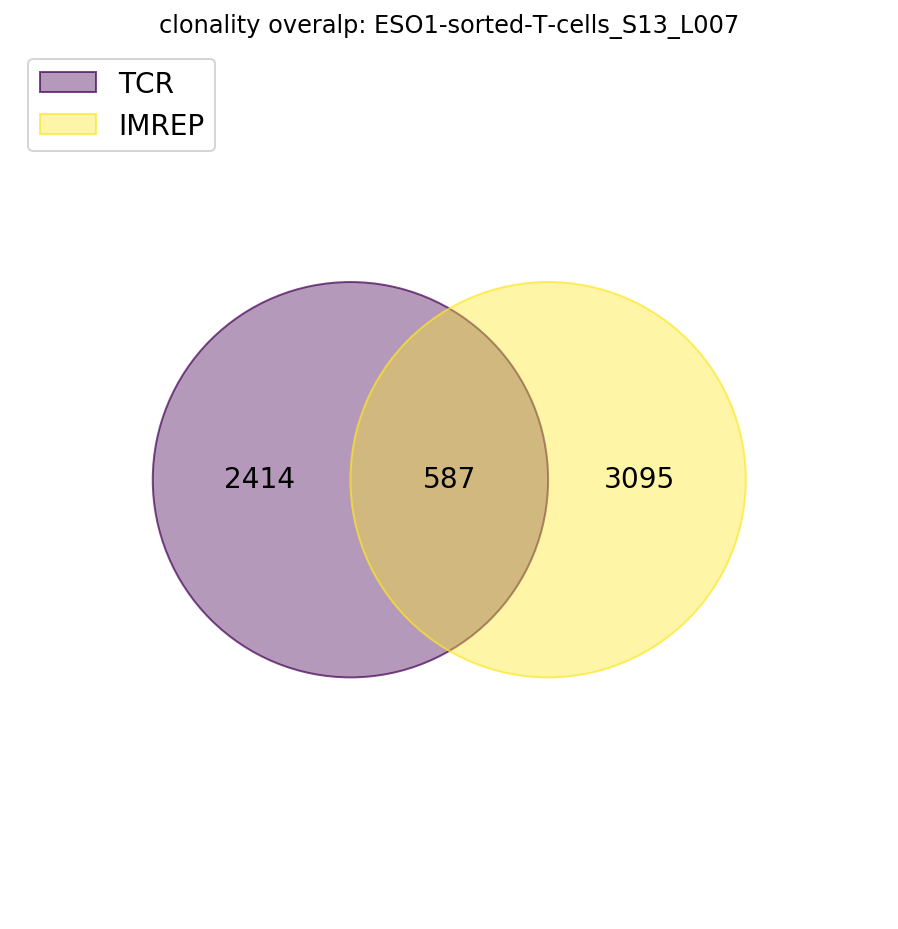

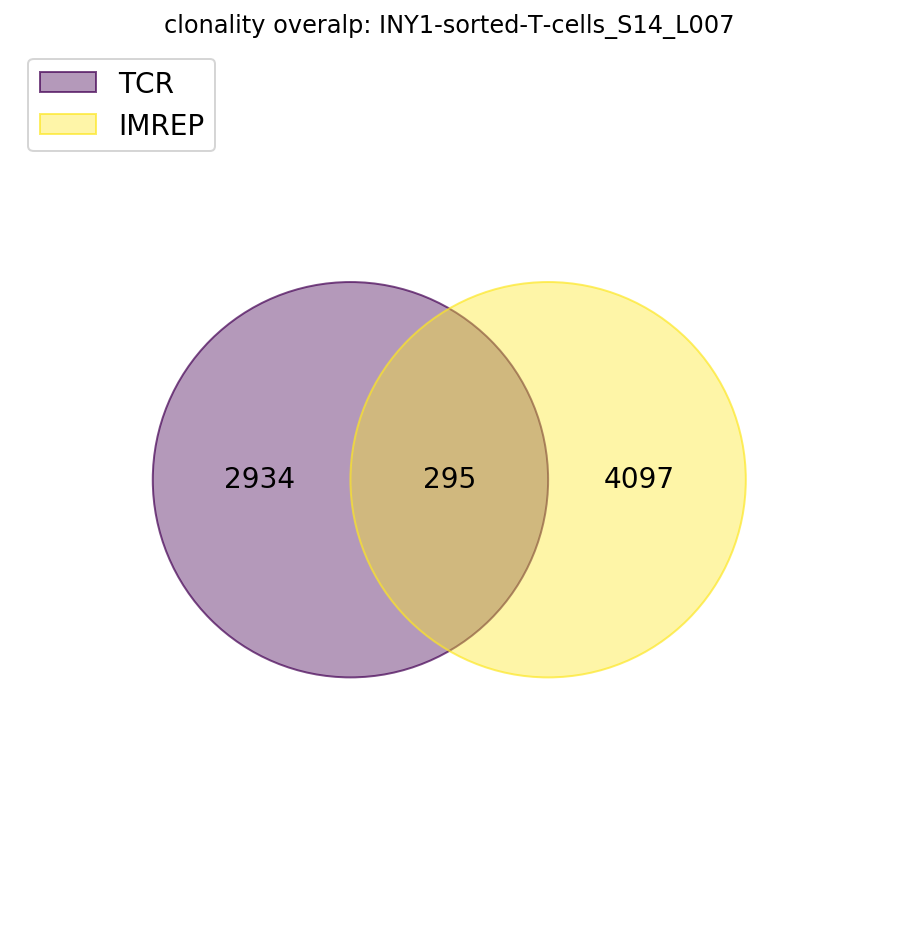

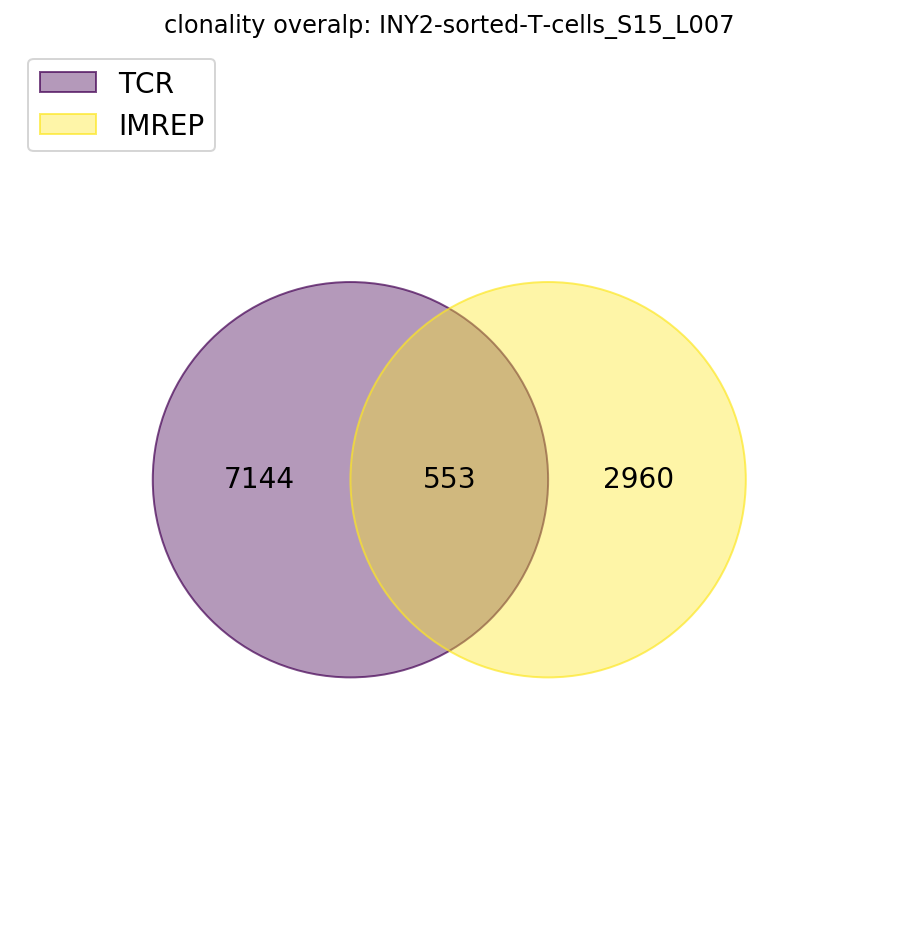

In [44]:
import ast
for sample in monoclonal_sample:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    tools = {
        "TCR": set(ast.literal_eval(df['unique_clonotypes_TCR_set'].tolist()[0])),
        "IMREP": set(ast.literal_eval(df['unique_clonotypes_IMREP_set'].tolist()[0])),
        #"MIXCR": set(ast.literal_eval(df['unique_clonotypes_MIXCR_set'].tolist()[0])),
        #"TRUST4": set(ast.literal_eval(df['unique_clonotypes_TRUST4_set'].tolist()[0]))
    }
    ax = venn(tools,figsize=(8, 8), fontsize=14, legend_loc="upper left")
    ax.set(title = "clonality overalp: "+sample)

### Polyclonal samples

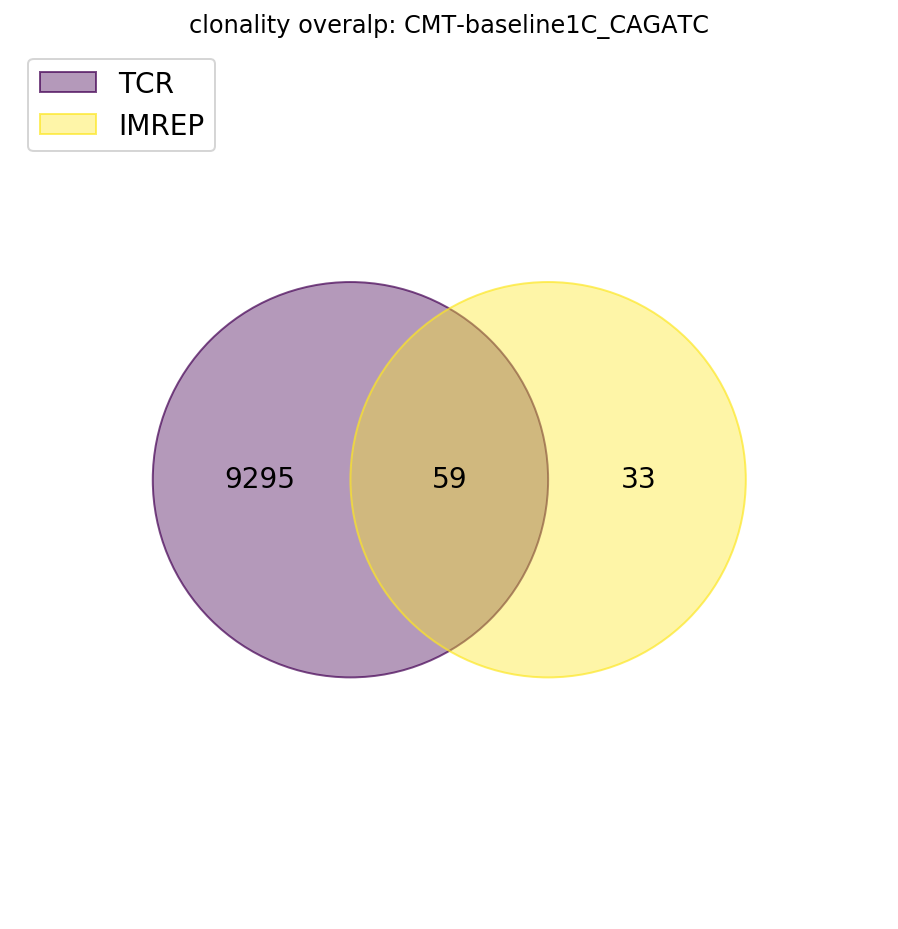

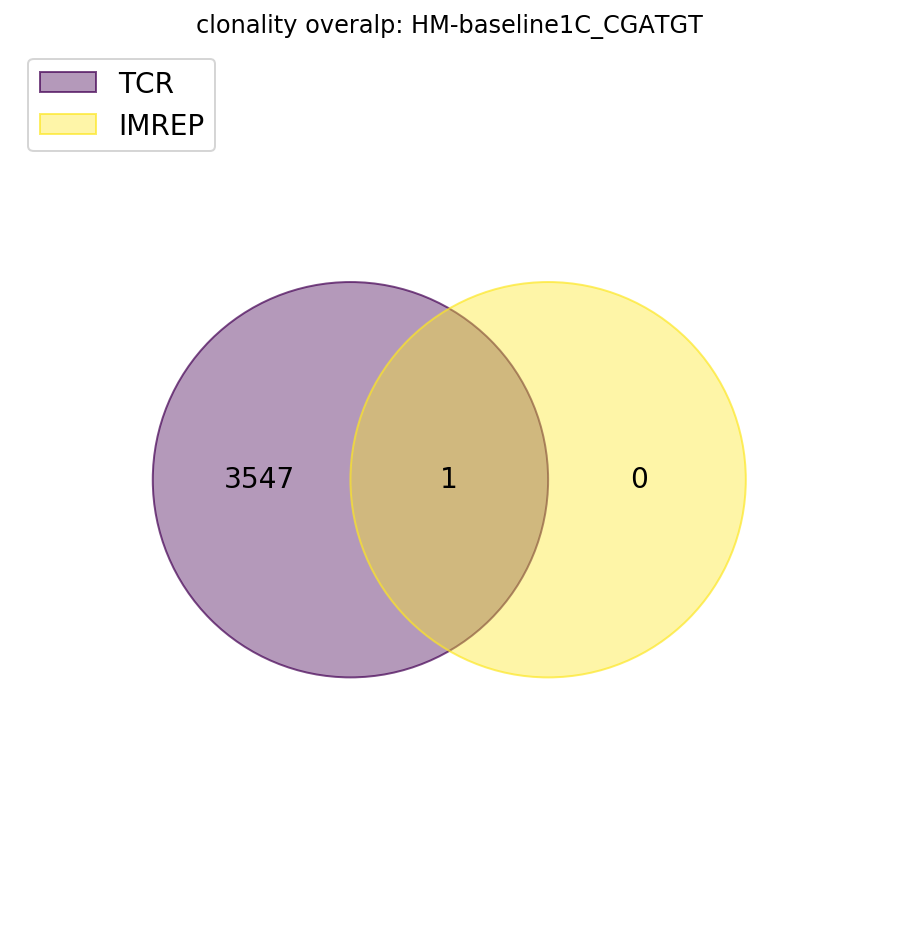

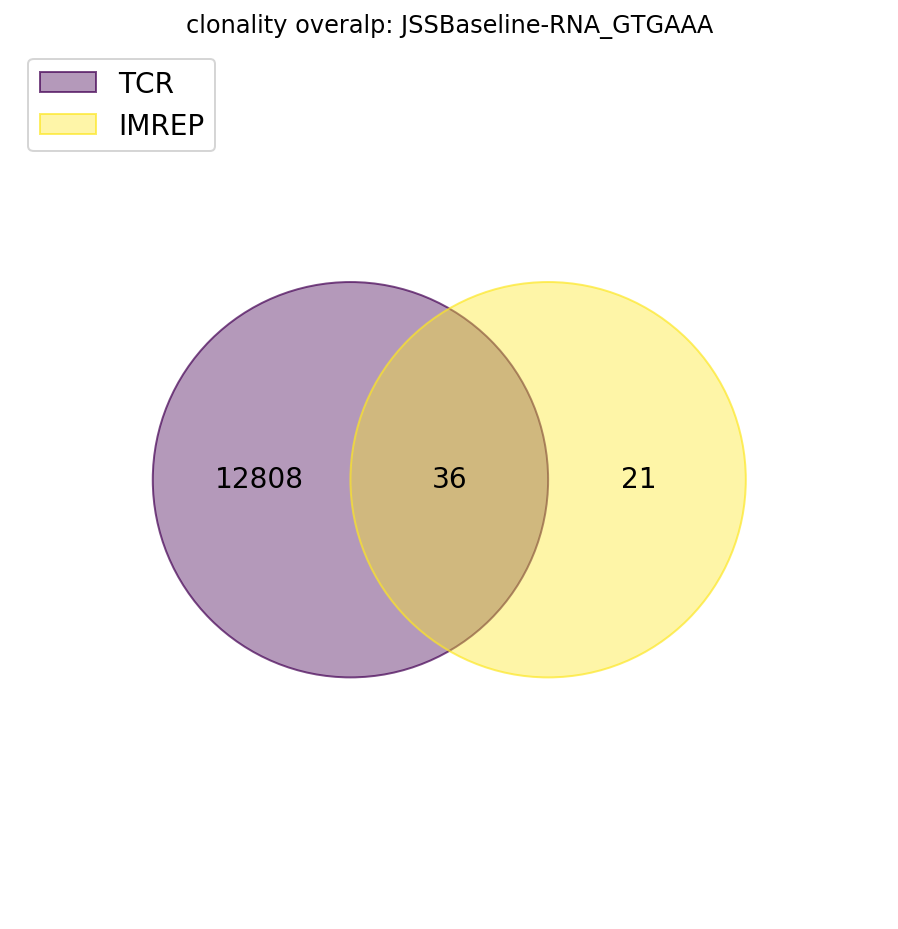

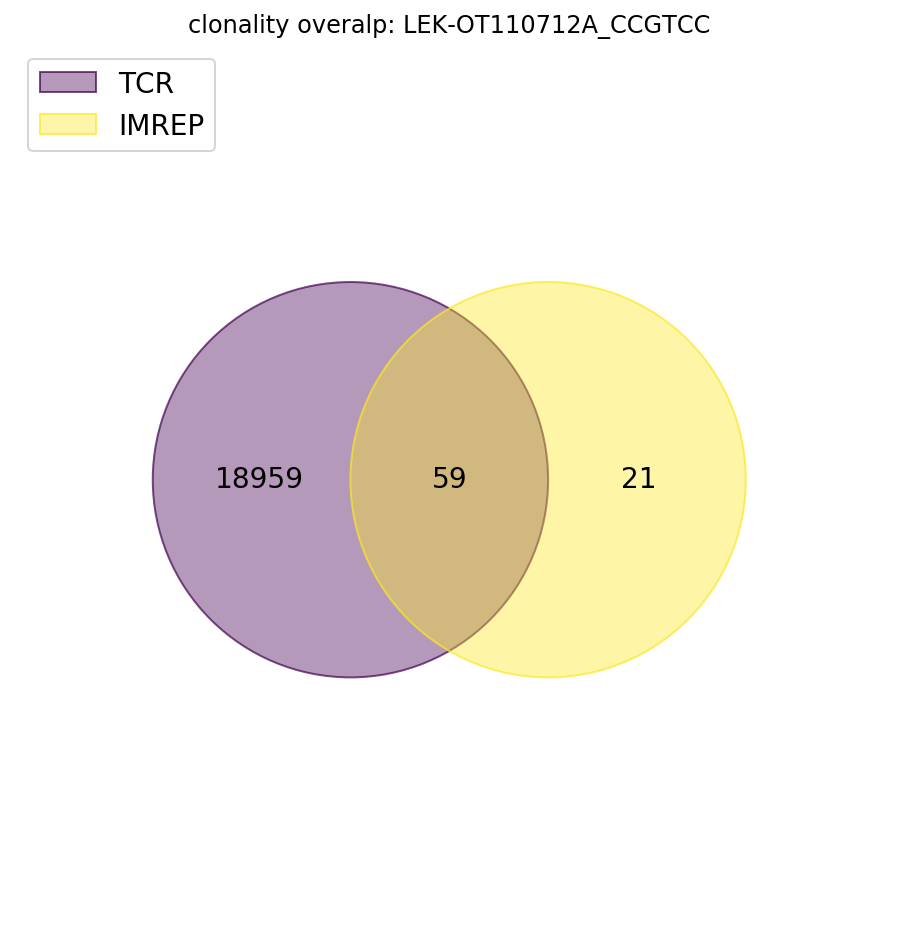

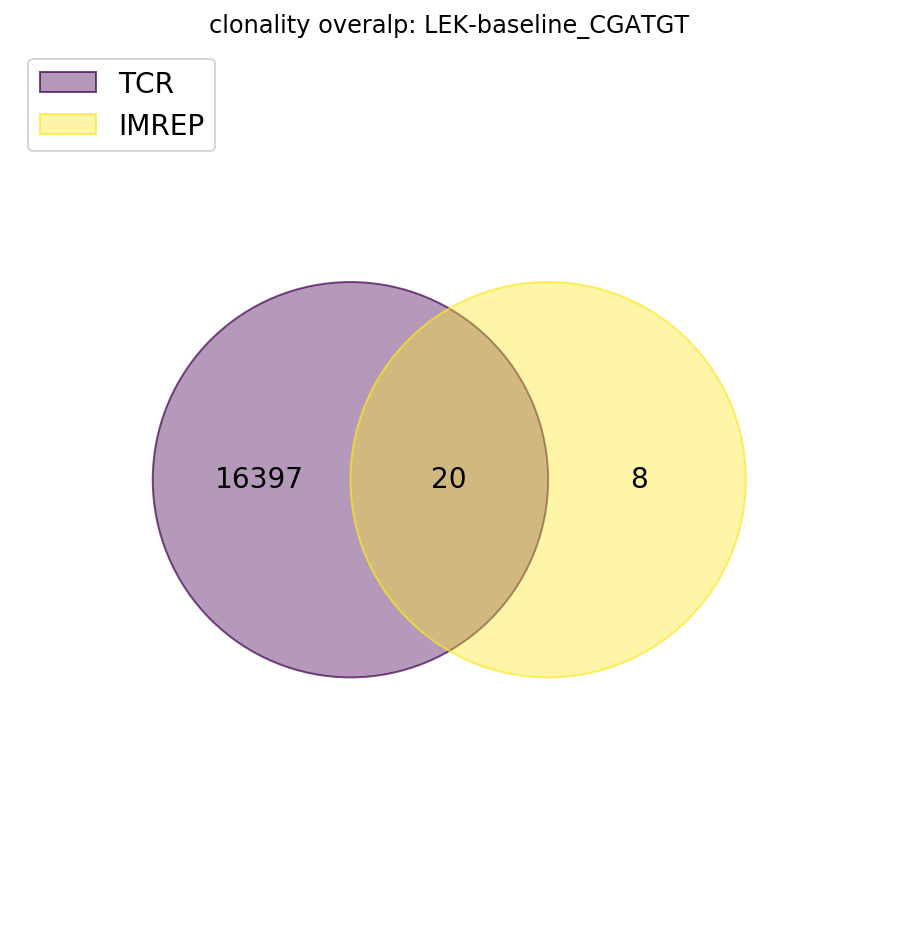

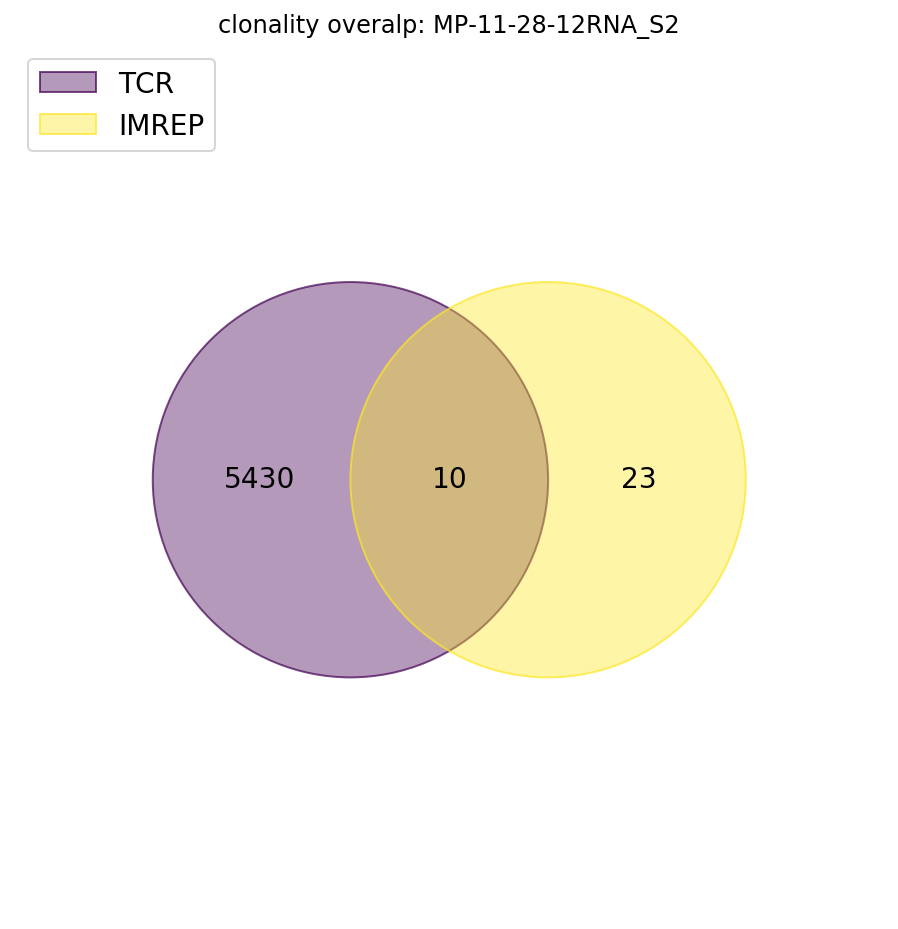

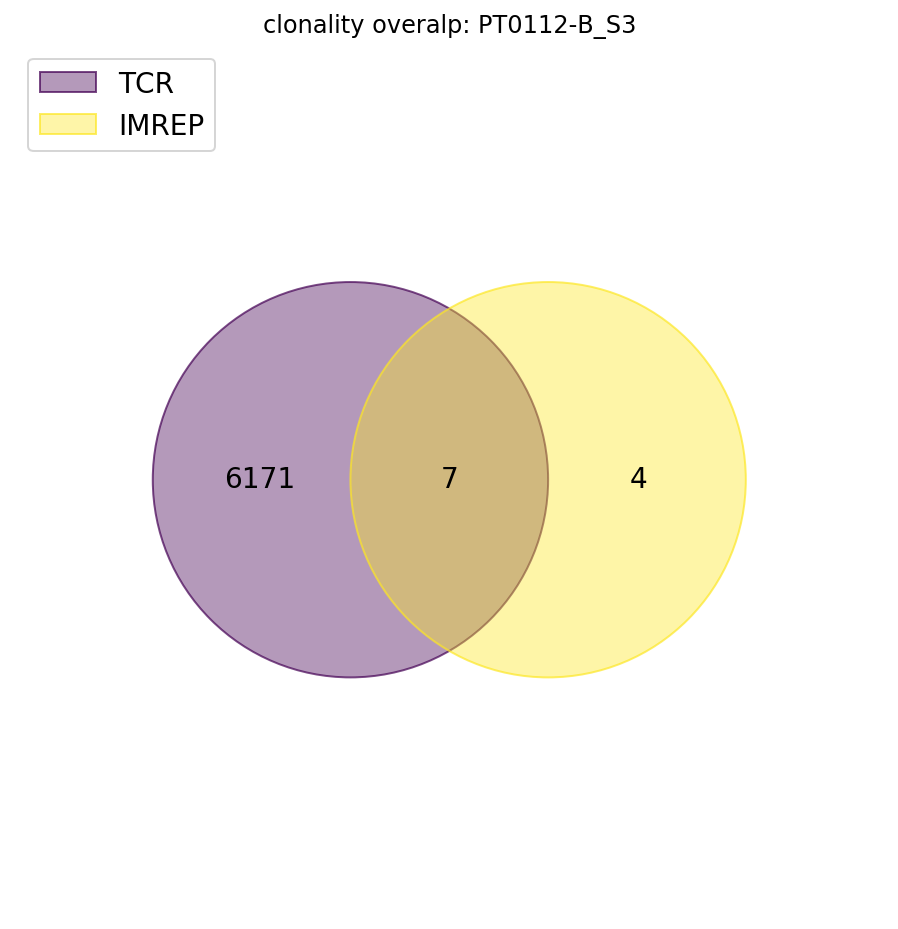

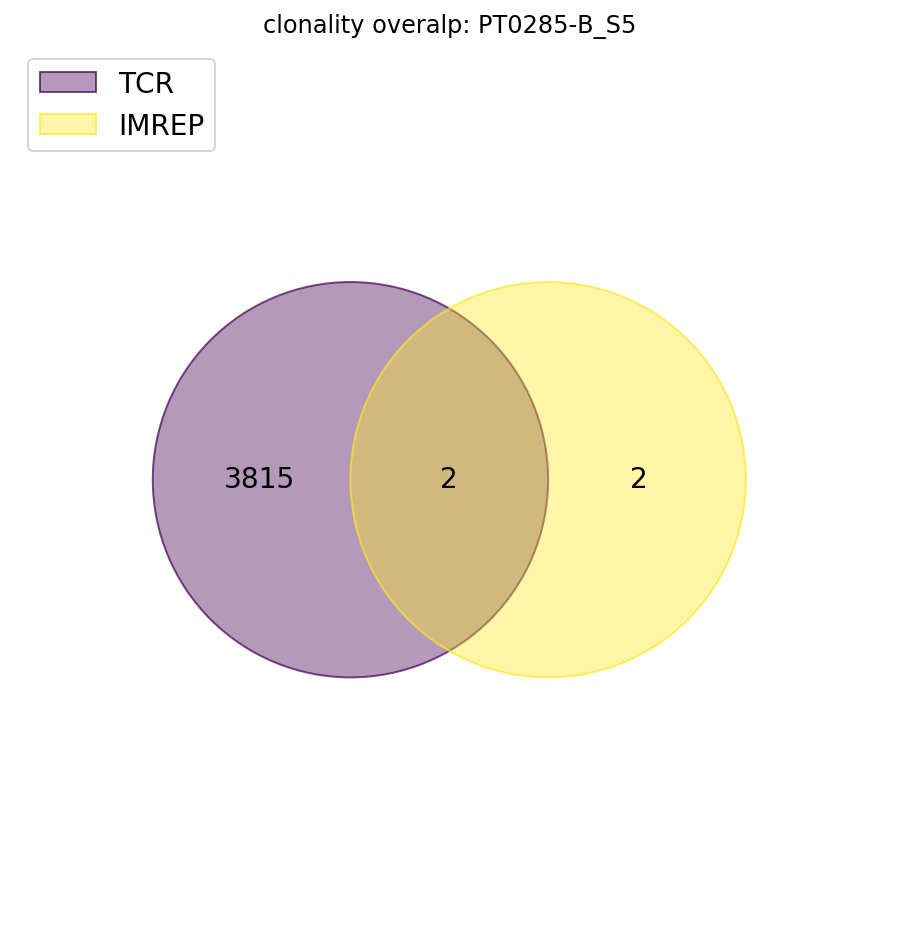

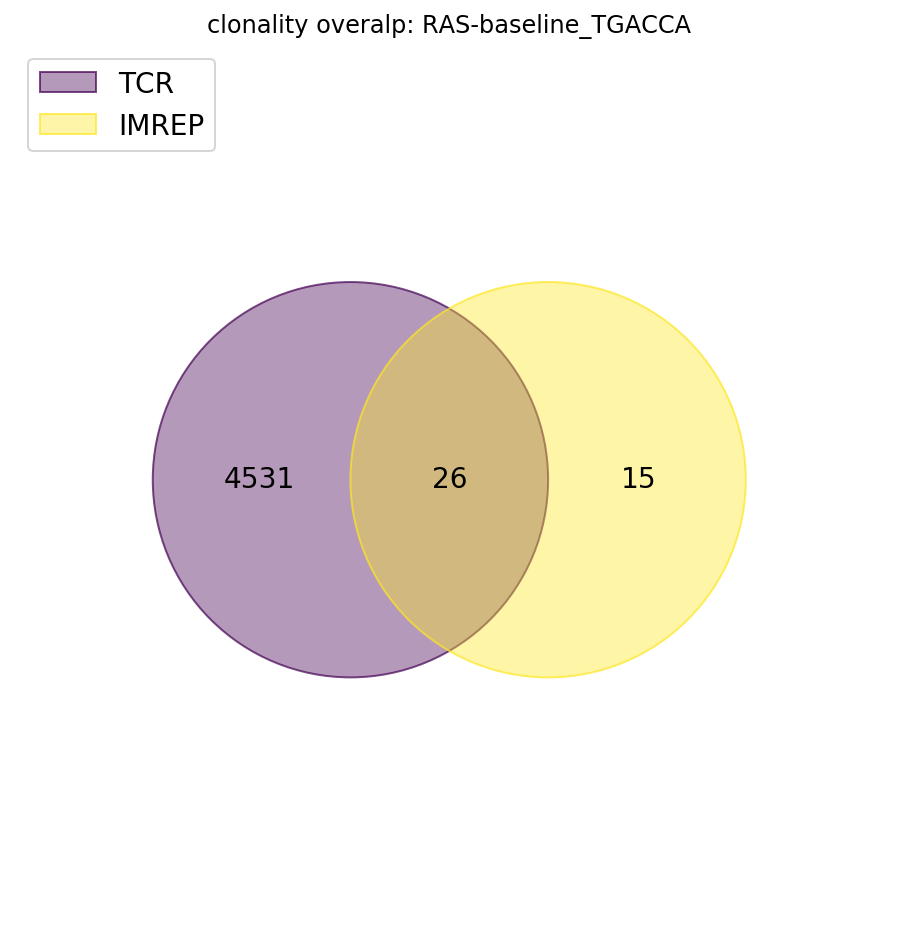

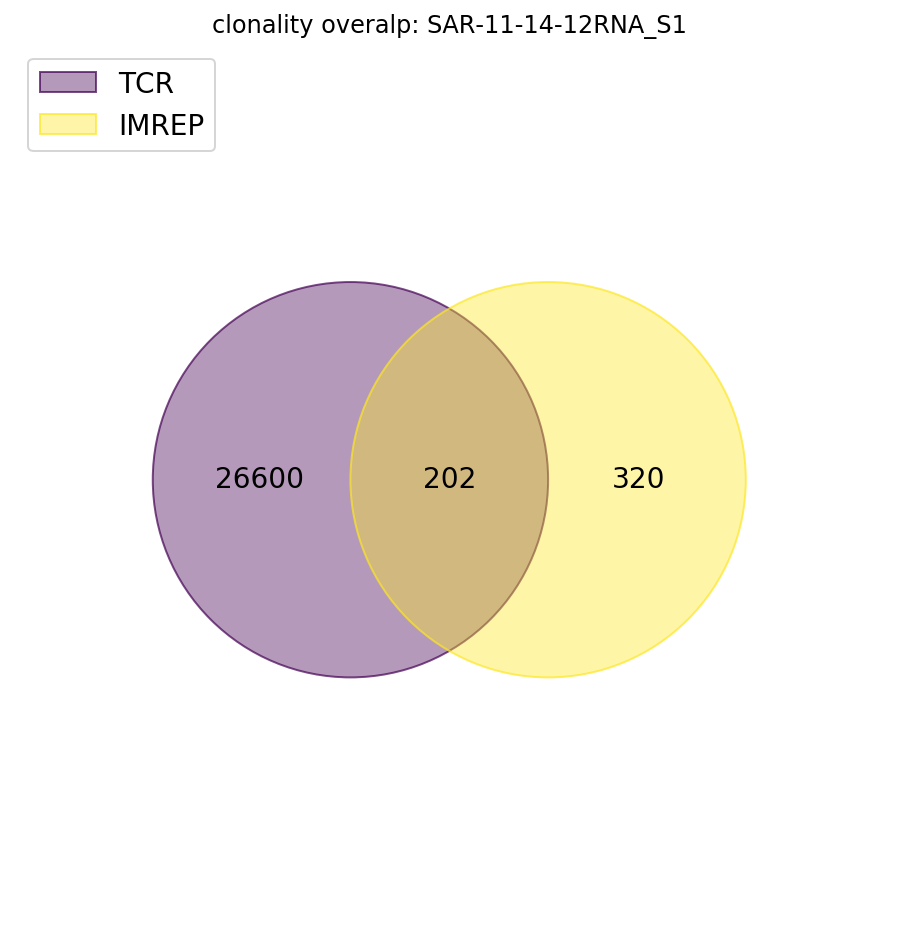

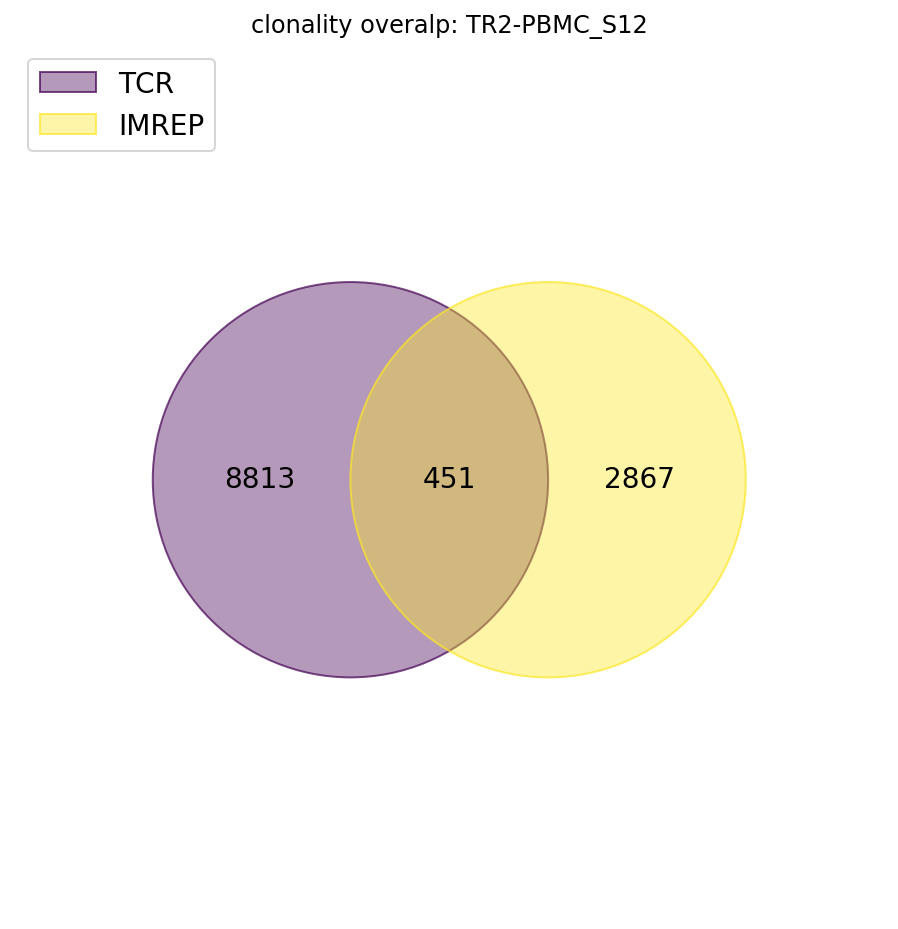

In [45]:
for sample in polyclonal_sample:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    tools = {
        "TCR": set(ast.literal_eval(df['unique_clonotypes_TCR_set'].tolist()[0])),
        "IMREP": set(ast.literal_eval(df['unique_clonotypes_IMREP_set'].tolist()[0])),
        #"MIXCR": set(ast.literal_eval(df['unique_clonotypes_MIXCR_set'].tolist()[0])),
        #"TRUST4": set(ast.literal_eval(df['unique_clonotypes_TRUST4_set'].tolist()[0]))
    }
    ax = venn(tools,figsize=(8, 8), fontsize=14, legend_loc="upper left")
    ax.set(title = "clonality overalp: "+sample)

In [46]:
samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

# DataFrames
# clonotype_overlap_df
# merge_IMREP_TRUST4_MIXCR_TCR


frequency_overlap_by_tool_df = pd.DataFrame(columns=['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq", 'Sample', 'Tool'])


for sample in samples:
    #   TCR_SEQ
    TCR_freq = merge_IMREP_TRUST4_MIXCR_TCR.loc[(merge_IMREP_TRUST4_MIXCR_TCR['Sample'] == sample)][["Frequency_TCR","CDR3"]]
    TCR_freq["Frequency_TCR"] = TCR_freq["Frequency_TCR"].round(4)
    TCR_freq = TCR_freq.groupby(['Frequency_TCR']).count().reset_index()
    TCR_freq = TCR_freq.rename(columns={"CDR3": "count_total_cdr3_in_TCR_by_freq", "Frequency_TCR": "TCR_Freq"})
    #  print(TCR_df.head())
    #  print(TCR_df["count_total_cdr3_in_TCR_by_freq"].unique())    

    #  IMREP
    IMREP_dict = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]['overlap_TCR_IMREP_dict_frequencies'].tolist()
    IMREP_dict = eval(IMREP_dict[0])
    IMREP_freq = pd.DataFrame.from_dict(IMREP_dict, orient='index', columns=['TCR_Freq', 'IMREP_Freq'])
    IMREP_freq.index.name = "overlapping_cdr3"
    IMREP_freq = IMREP_freq.reset_index()
    IMREP_freq["TCR_Freq"] = IMREP_freq["TCR_Freq"].round(4)
    IMREP_freq = IMREP_freq.groupby(['TCR_Freq']).count().reset_index()
    IMREP_freq = IMREP_freq[["TCR_Freq", "overlapping_cdr3"]]
    IMREP_freq = IMREP_freq.rename(columns={"overlapping_cdr3": "count_overlap_cdr3_from_Tool"})
    IMREP_freq["Sample"] = sample
    IMREP_freq["Tool"] = "IMREP"
    IMREP_freq = pd.merge(IMREP_freq,TCR_freq, on="TCR_Freq")
    IMREP_freq = IMREP_freq[['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq", 'Sample', 'Tool']]
    frequency_overlap_by_tool_df = pd.concat([frequency_overlap_by_tool_df,IMREP_freq])
    #print(IMREP_freq.head())

    #     MIXCR
    MIXCR_dict = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]['overlap_TCR_MIXCR_dict_frequencies'].tolist()
    MIXCR_dict = eval(MIXCR_dict[0])
    MIXCR_freq = pd.DataFrame.from_dict(MIXCR_dict, orient='index', columns=['TCR_Freq', 'MIXCR_Freq'])
    MIXCR_freq.index.name = "overlapping_cdr3"
    MIXCR_freq = MIXCR_freq.reset_index()
    MIXCR_freq["TCR_Freq"] = MIXCR_freq["TCR_Freq"].round(4)
    MIXCR_freq = MIXCR_freq.groupby(['TCR_Freq']).count().reset_index()
    MIXCR_freq = MIXCR_freq[["TCR_Freq", "overlapping_cdr3"]]
    MIXCR_freq = MIXCR_freq.rename(columns={"overlapping_cdr3": "count_overlap_cdr3_from_Tool"})
    MIXCR_freq["Sample"] = sample
    MIXCR_freq["Tool"] = "MIXCR"
    MIXCR_freq = pd.merge(MIXCR_freq,TCR_freq, on="TCR_Freq")
    MIXCR_freq = MIXCR_freq[['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq", 'Sample', 'Tool']]
    frequency_overlap_by_tool_df = pd.concat([frequency_overlap_by_tool_df,MIXCR_freq])
    #print(MIXCR_freq.head())

    # TRUST4

    TRUST4_dict = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]['overlap_TCR_TRUST4_dict_frequencies'].tolist()
    TRUST4_dict = eval(TRUST4_dict[0])
    TRUST4_freq = pd.DataFrame.from_dict(TRUST4_dict, orient='index', columns=['TCR_Freq', 'TRUST4_Freq'])
    TRUST4_freq.index.name = "overlapping_cdr3"
    TRUST4_freq = TRUST4_freq.reset_index()
    TRUST4_freq["TCR_Freq"] = TRUST4_freq["TCR_Freq"].round(4)
    TRUST4_freq = TRUST4_freq.groupby(['TCR_Freq']).count().reset_index()
    TRUST4_freq = TRUST4_freq[["TCR_Freq", "overlapping_cdr3"]]
    TRUST4_freq = TRUST4_freq.rename(columns={"overlapping_cdr3": "count_overlap_cdr3_from_Tool"})
    TRUST4_freq["Sample"] = sample
    TRUST4_freq["Tool"] = "TRUST4"
    TRUST4_freq = pd.merge(TRUST4_freq,TCR_freq, on="TCR_Freq")
    TRUST4_freq = TRUST4_freq[['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq", 'Sample', 'Tool']]
    frequency_overlap_by_tool_df = pd.concat([frequency_overlap_by_tool_df,TRUST4_freq])
    #print(TRUST4_freq.head())
    
# Frequency category rounded to nearest thousandth
frequency_overlap_by_tool_df["percent_CDR3_captured_by_tool_by_TCR_frequency"] = (frequency_overlap_by_tool_df["count_overlap_cdr3_from_Tool"]*100.0)/frequency_overlap_by_tool_df["count_total_cdr3_in_TCR_by_freq"]
frequency_overlap_by_tool_df.percent_CDR3_captured_by_tool_by_TCR_frequency = frequency_overlap_by_tool_df.percent_CDR3_captured_by_tool_by_TCR_frequency.astype(float)
frequency_overlap_by_tool_df = frequency_overlap_by_tool_df[['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq",'percent_CDR3_captured_by_tool_by_TCR_frequency', 'Sample', 'Tool']]

frequency_overlap_by_tool_df['TCR_Freq'] = frequency_overlap_by_tool_df['TCR_Freq'] * 100
    
    

## percent capture non-cumulative

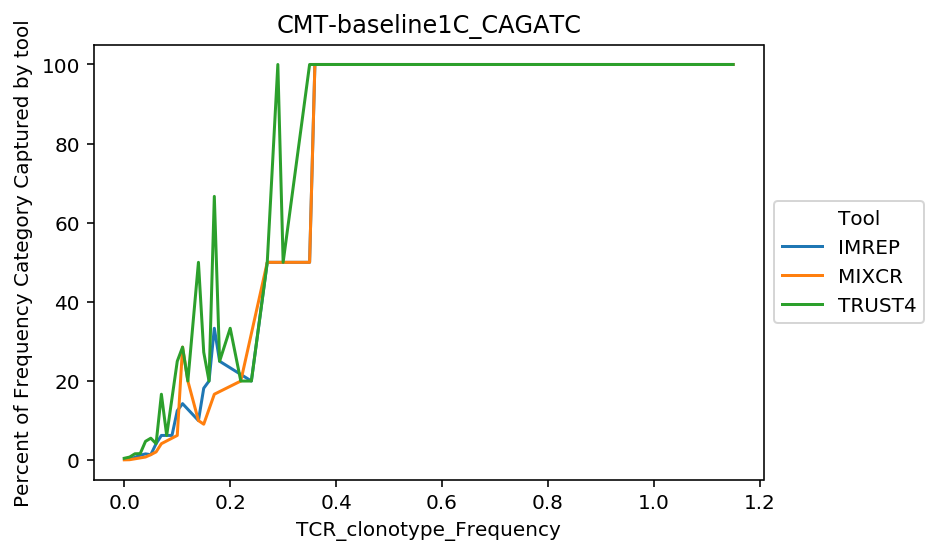

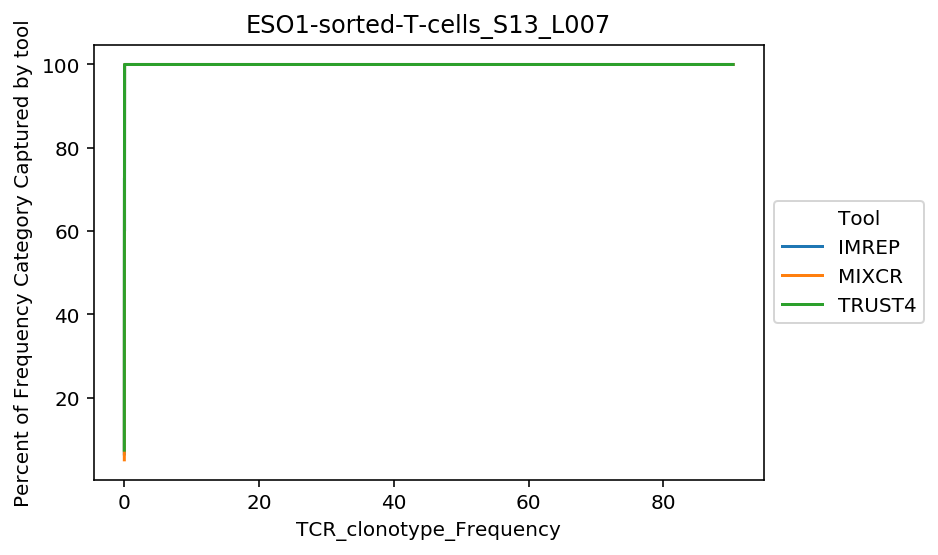

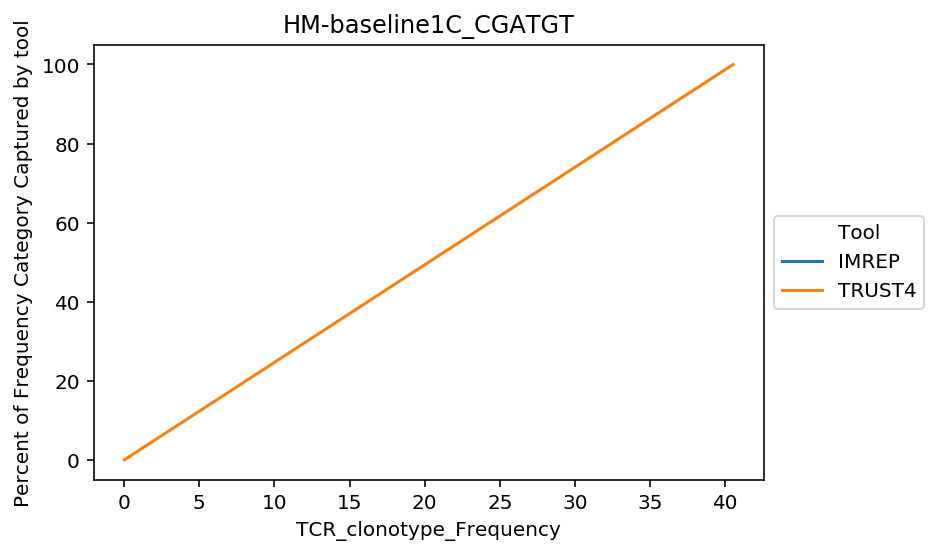

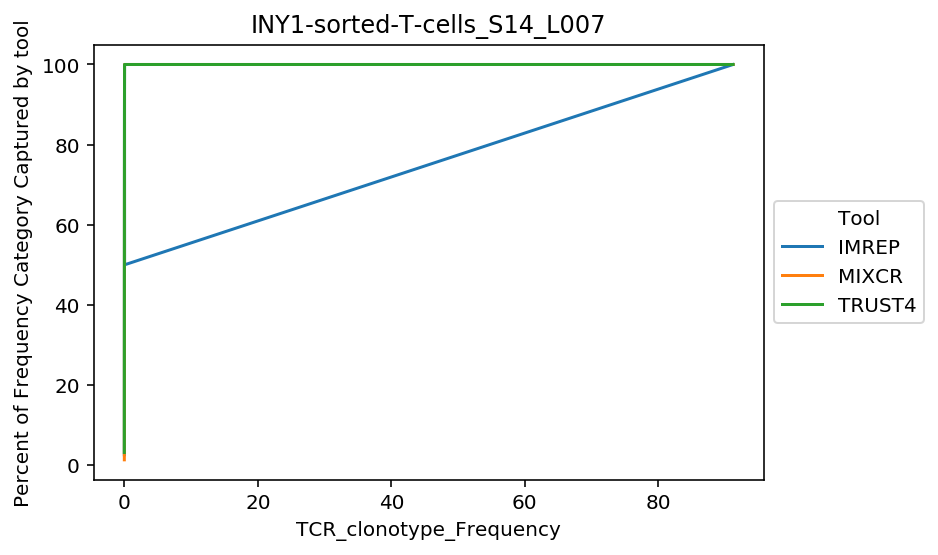

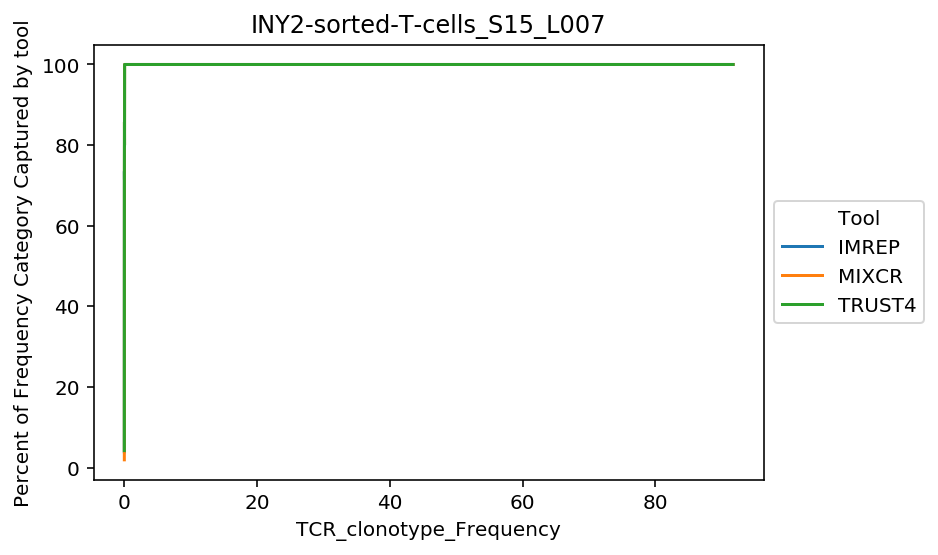

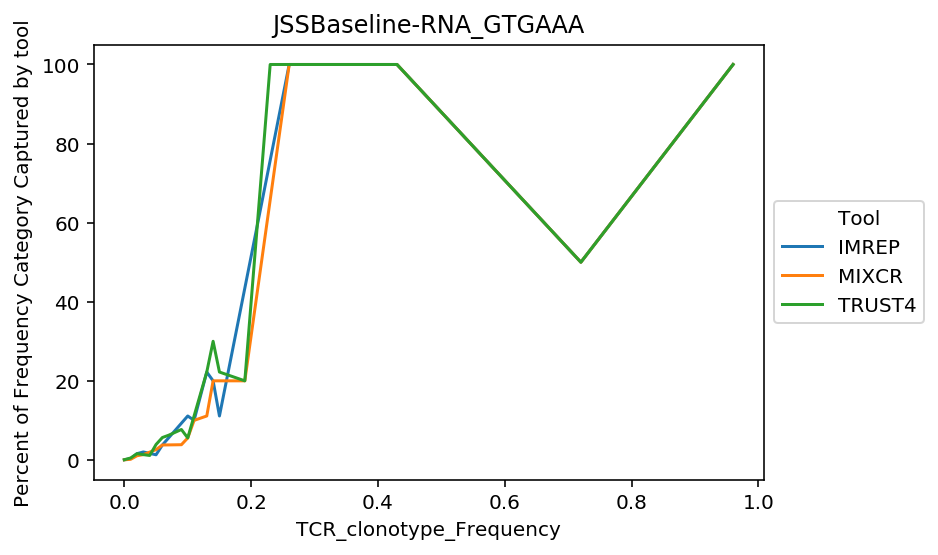

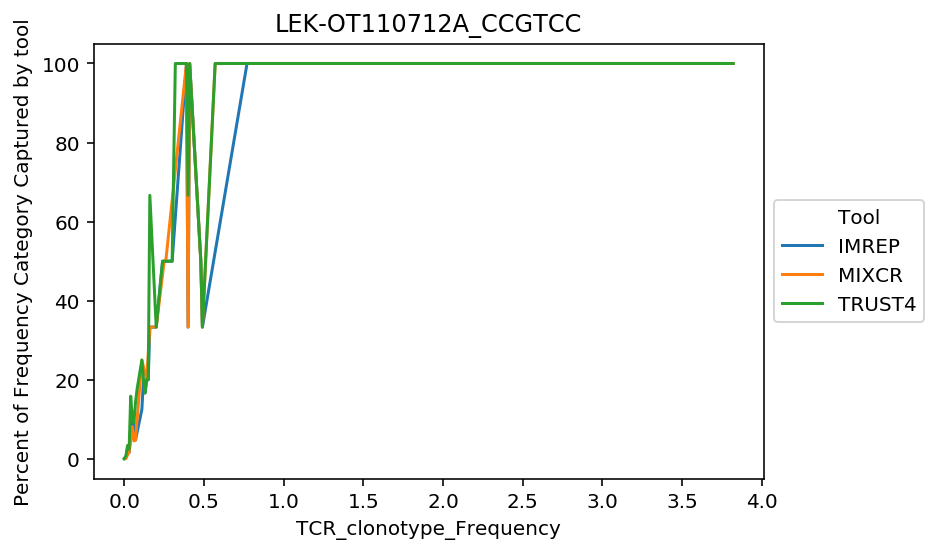

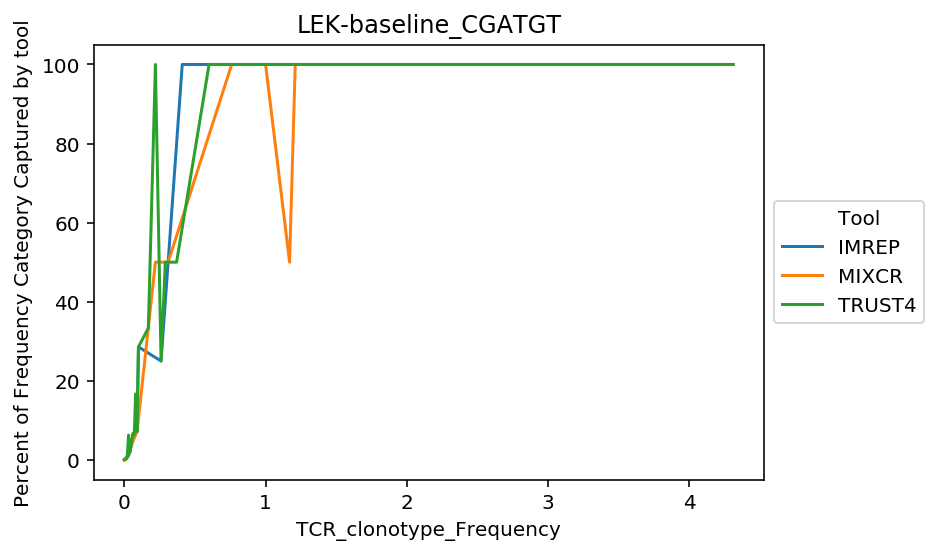

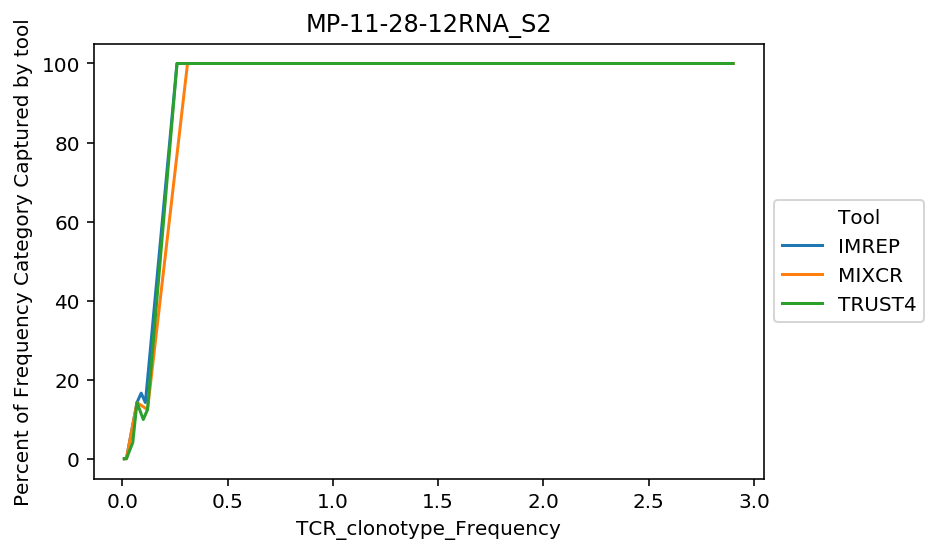

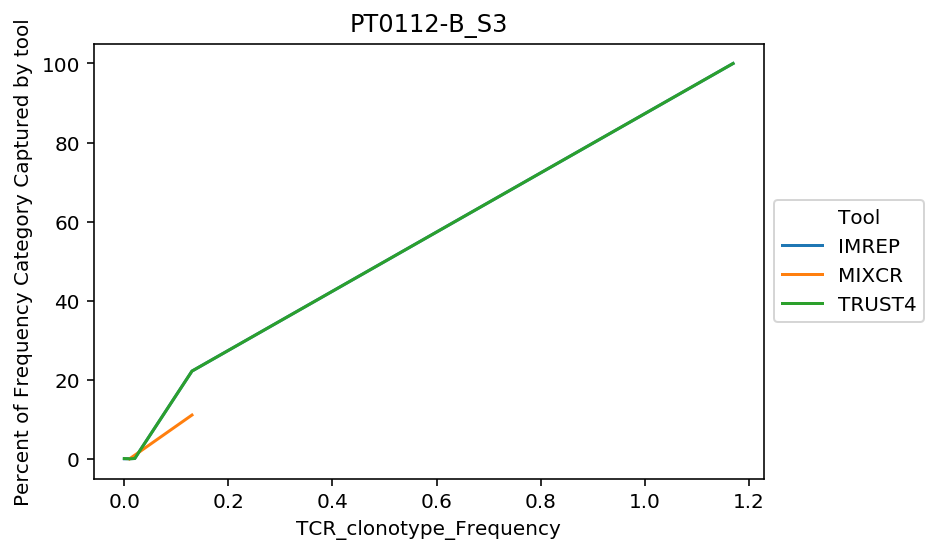

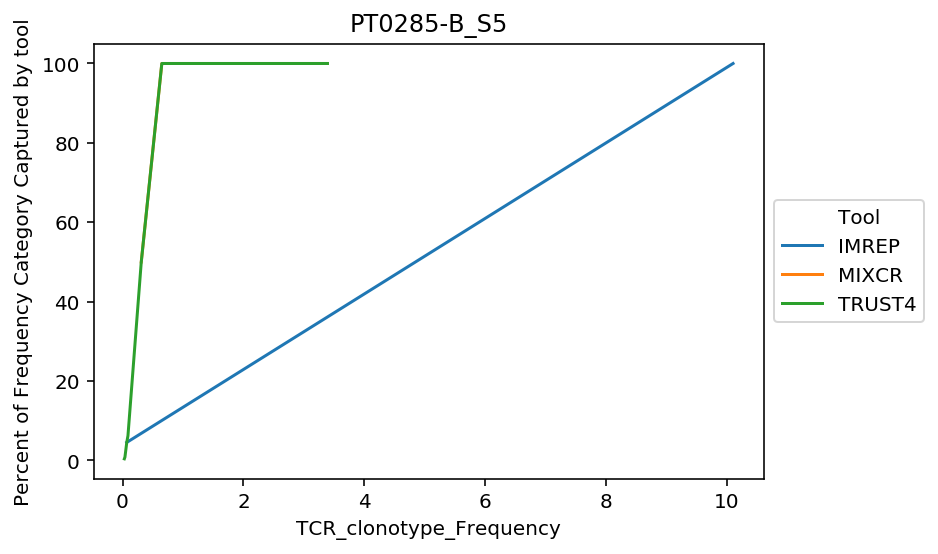

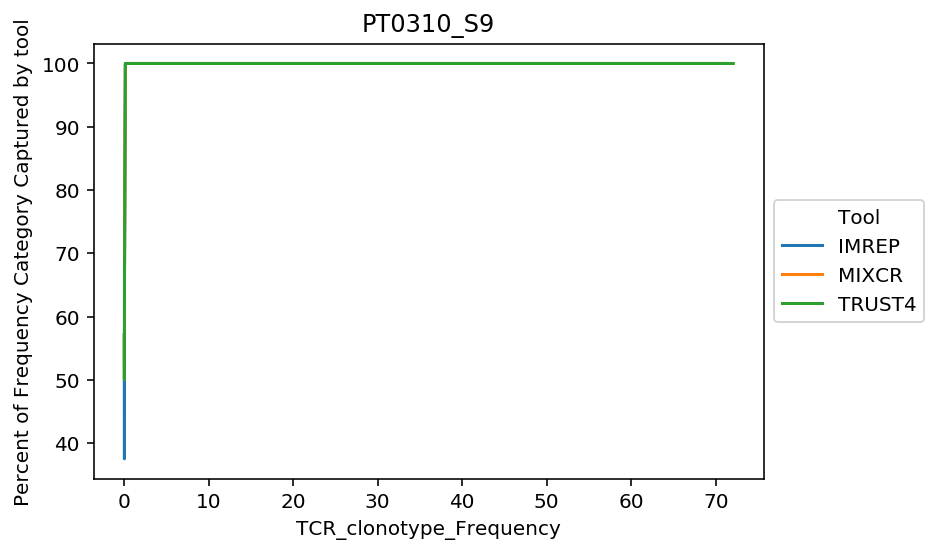

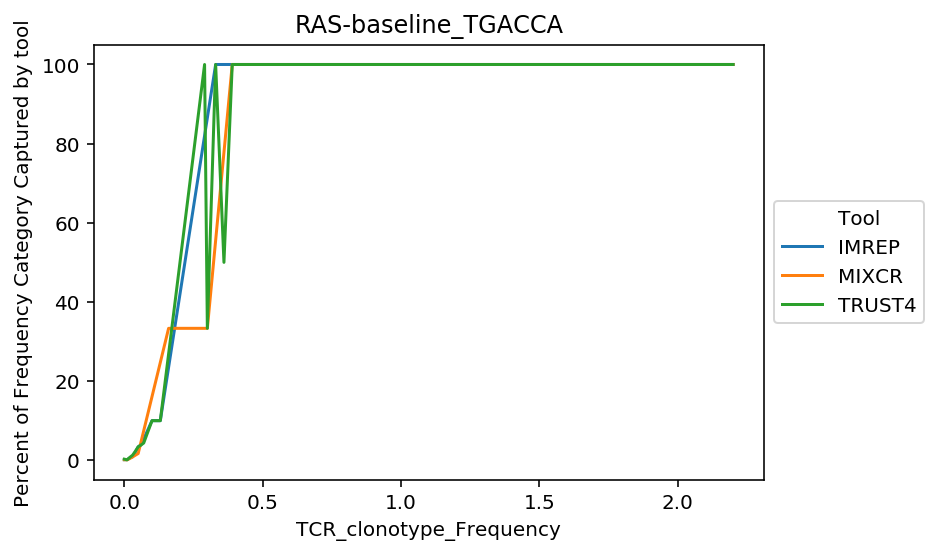

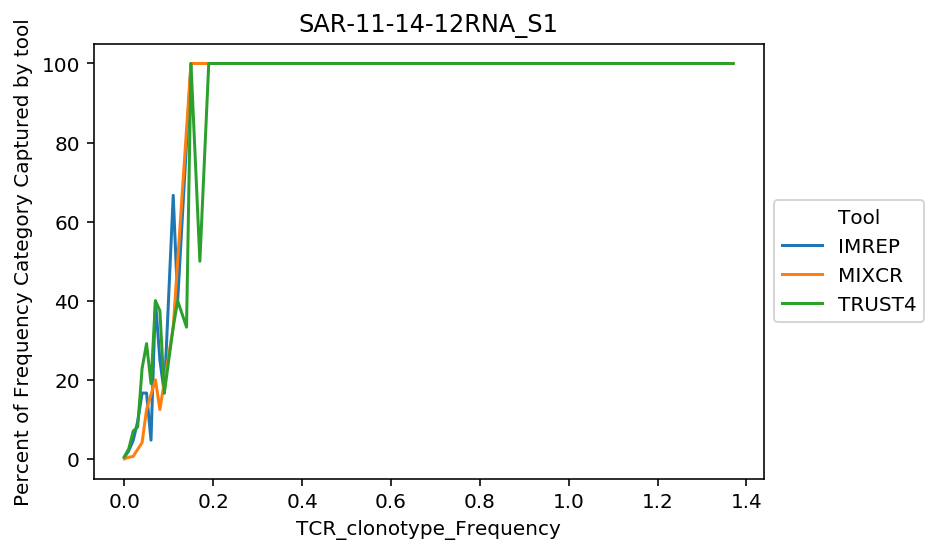

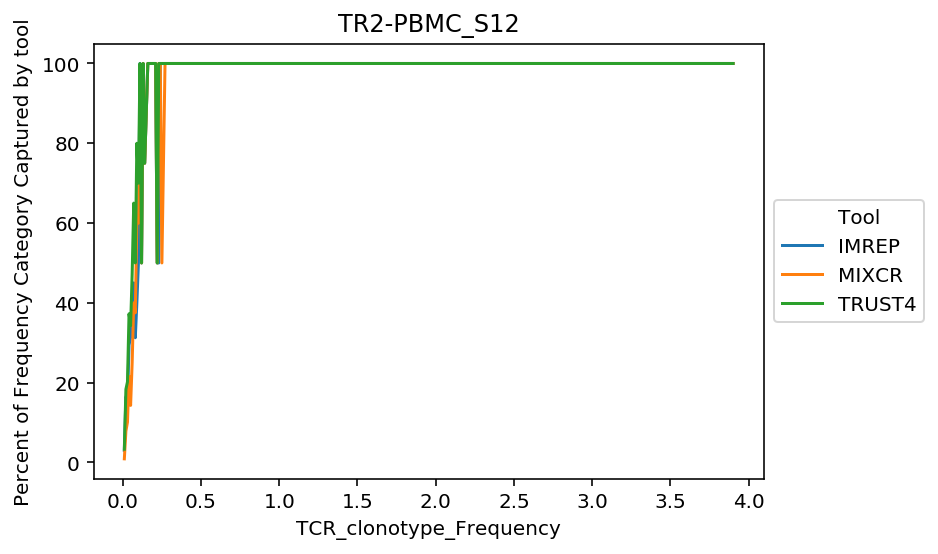

In [47]:
samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']



for sample in samples:
    graph_per_sample_df = frequency_overlap_by_tool_df.loc[(frequency_overlap_by_tool_df['Sample'] == sample)]

    ax = sns.lineplot(x="TCR_Freq", y="percent_CDR3_captured_by_tool_by_TCR_frequency", hue="Tool", data=graph_per_sample_df)
    ax.set_xlabel("TCR_clonotype_Frequency")
    ax.set_ylabel("Percent of Frequency Category Captured by tool")
    ax.set(title = sample)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig = ax.get_figure()
    plt.show()

## Overlapping CDR3 frequeny scatterplot

- TCR & IMREP

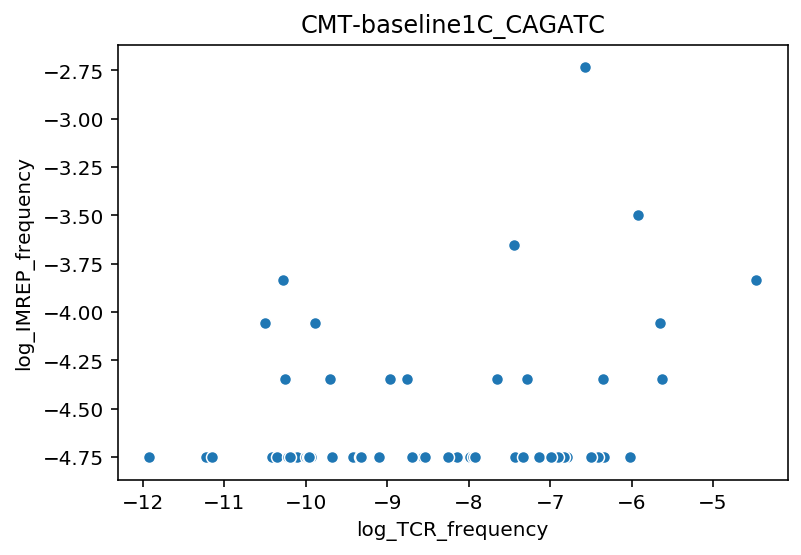

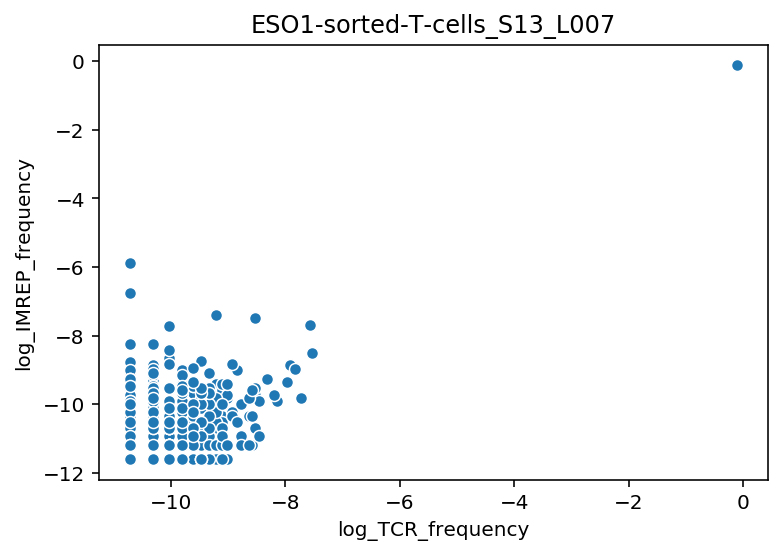

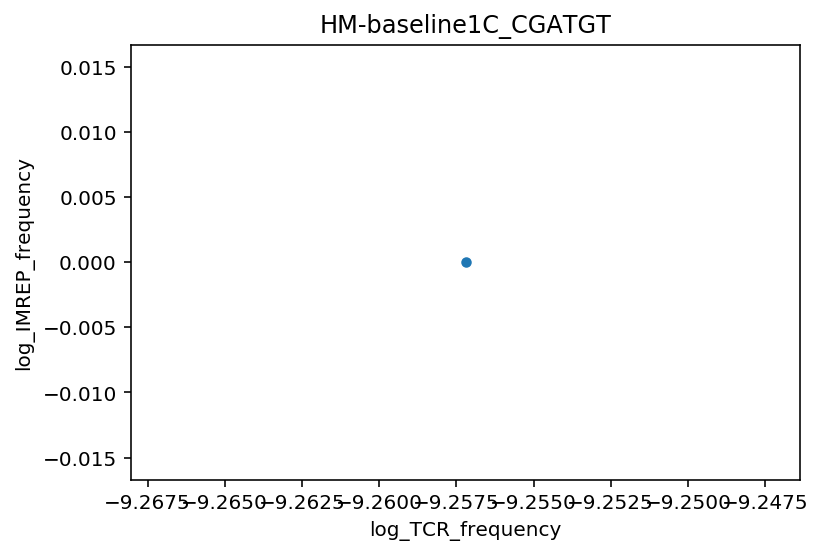

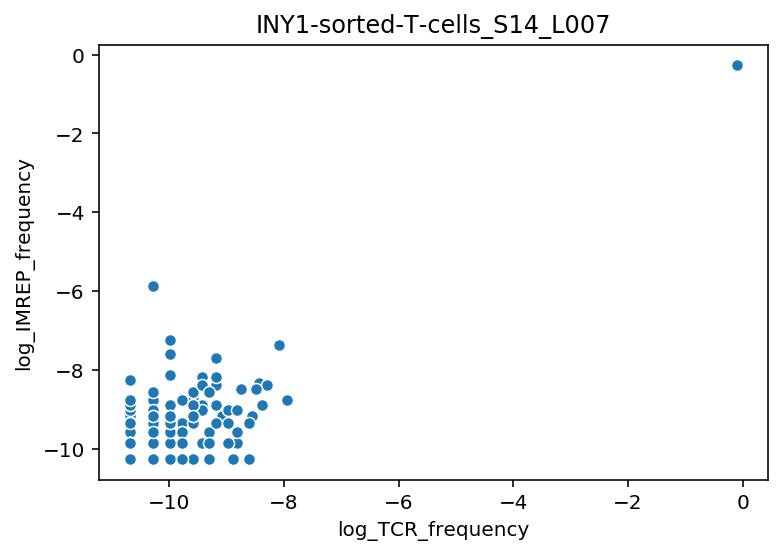

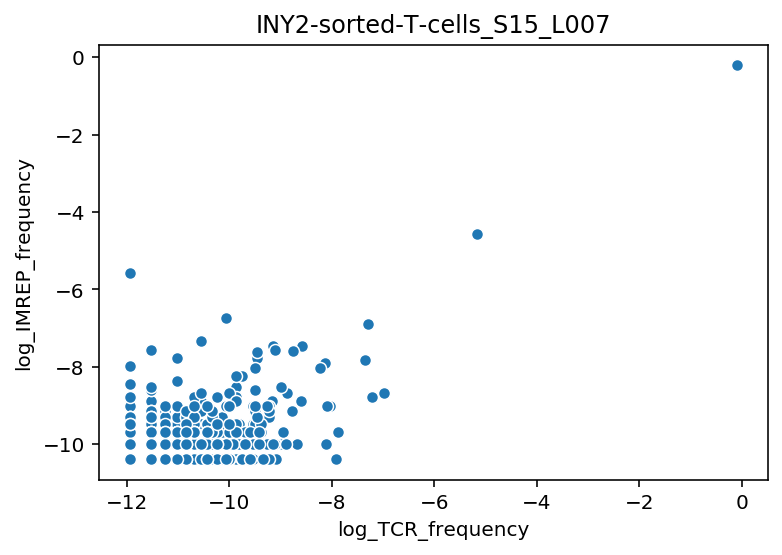

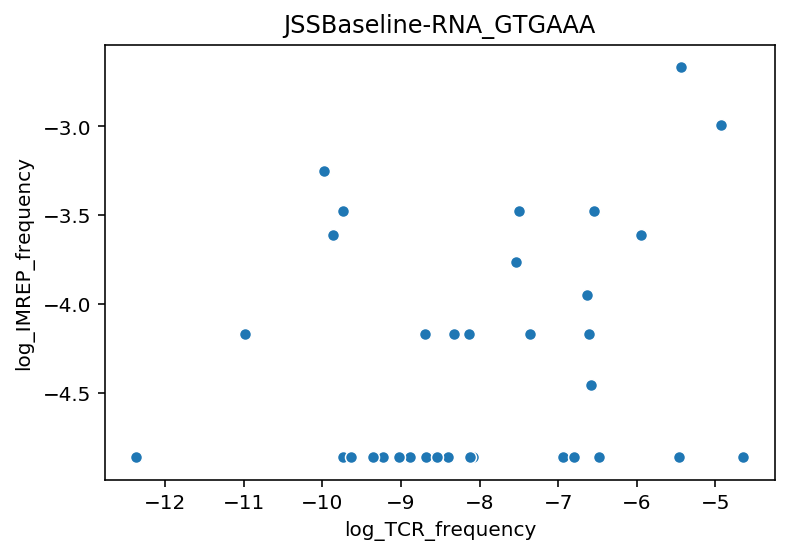

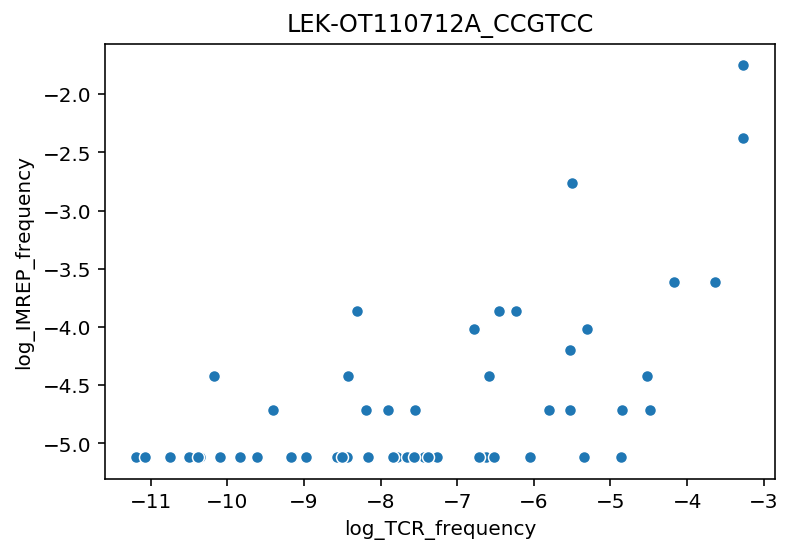

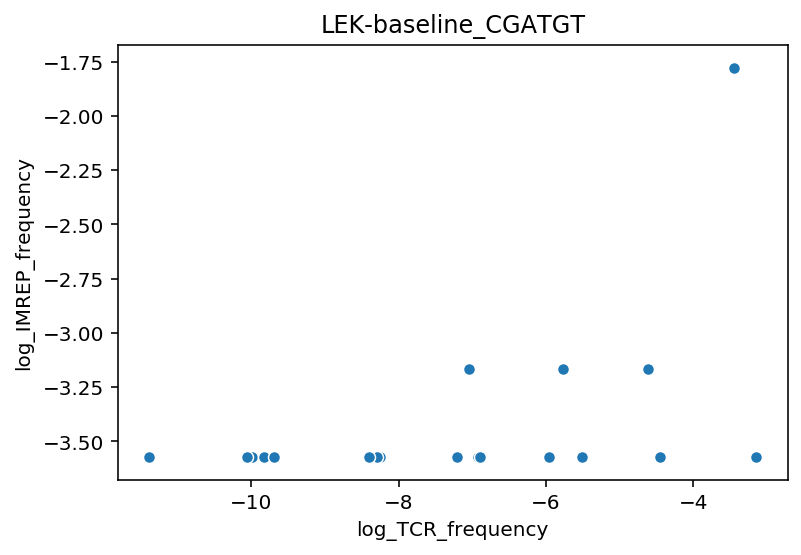

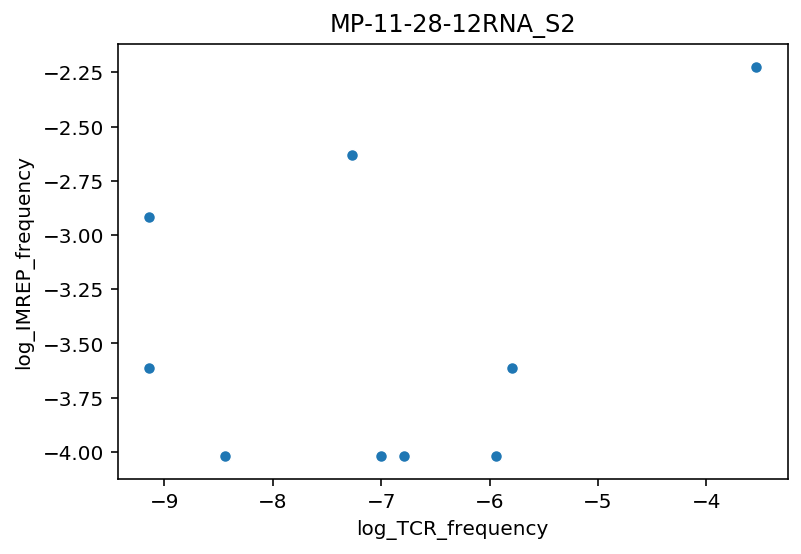

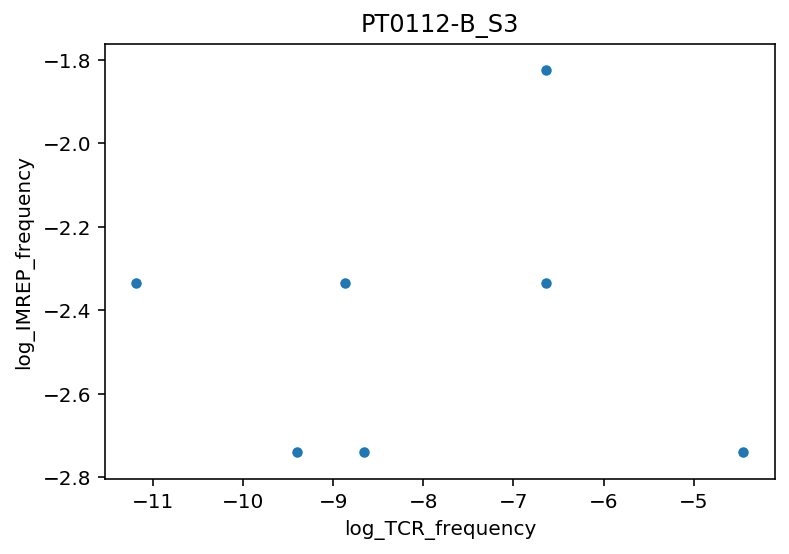

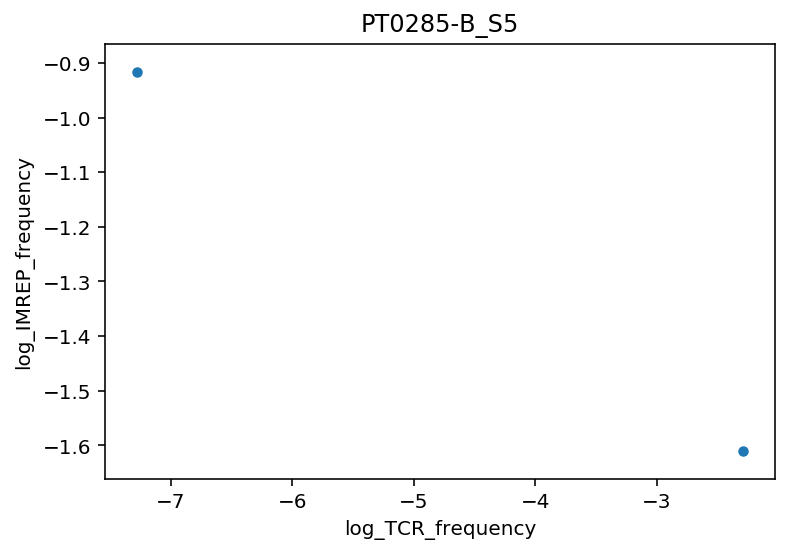

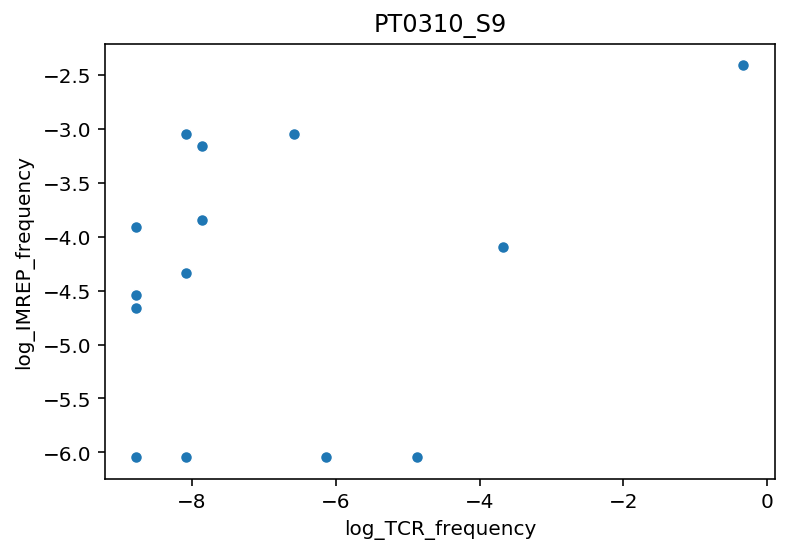

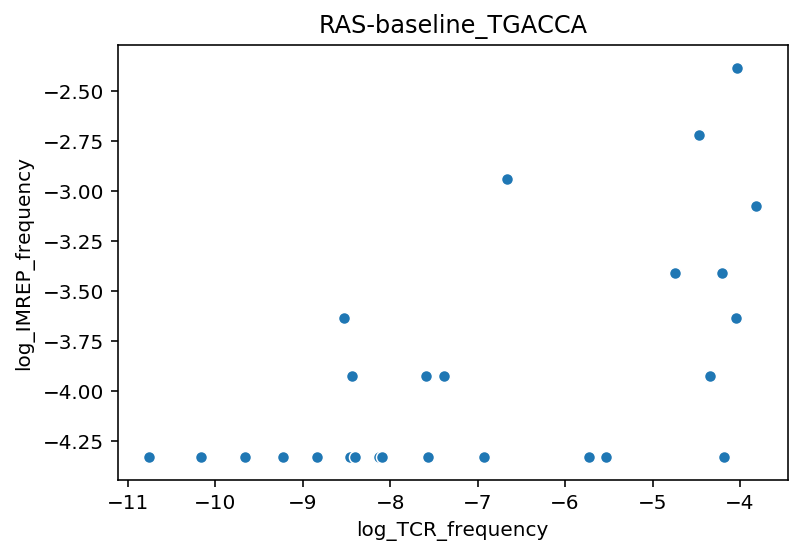

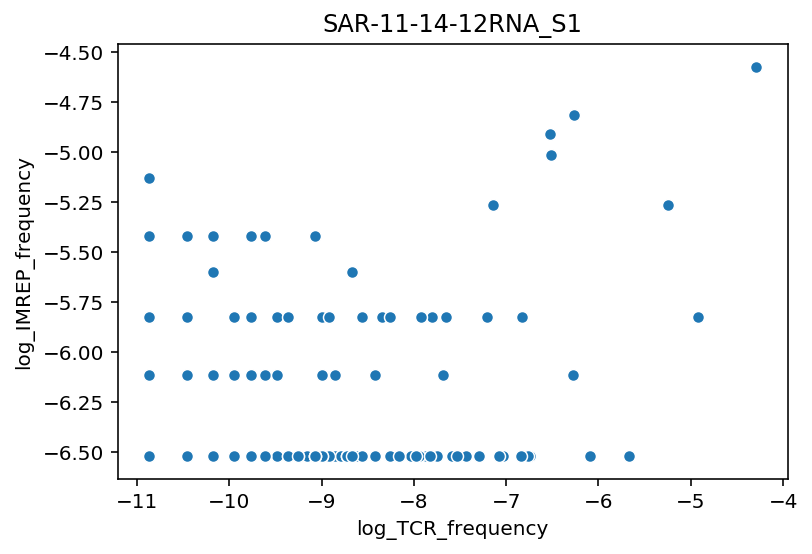

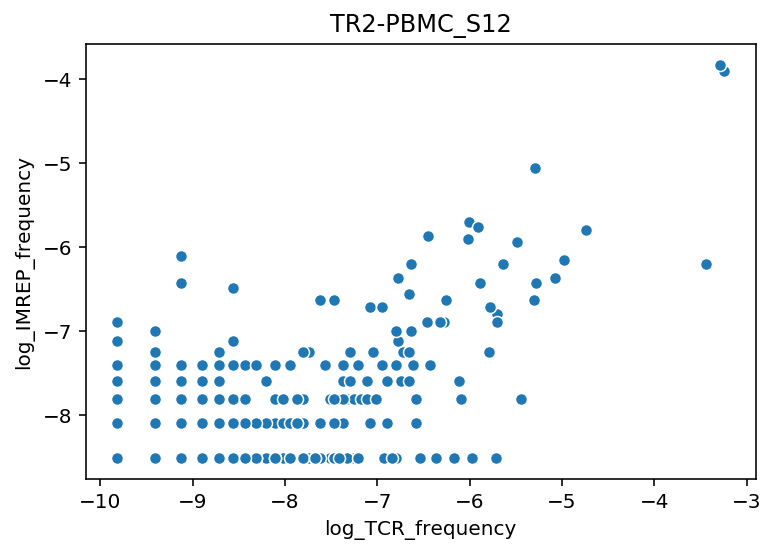

In [48]:
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in sample_names:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())

    overlap_TCR_IMREP = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP))

    #   TCR    
    TCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)][['CDR3', 'Frequency_TCR']]
    TCR_Freq_dict = dict(zip(TCR_Freq_df.CDR3, TCR_Freq_df.Frequency_TCR))
 
    
    #   IMREP
    IMREP_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)][['CDR3', 'Frequency_IMREP']]
    IMREP_Freq_dict = dict(zip(IMREP_Freq_df.CDR3, IMREP_Freq_df.Frequency_IMREP))

    
    #####################    
#   TCR_IMREP
    overlap_TCR_IMREP_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP)
    overlap_TCR_IMREP_dict = dict.fromkeys(overlap_TCR_IMREP_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_set_cdr3:
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
    
    if len(overlap_TCR_IMREP_dict) > 0:
        overlap_TCR_IMREP_df = pd.DataFrame.from_dict(overlap_TCR_IMREP_dict, orient = 'index')
        overlap_TCR_IMREP_df.columns = ['TCR_frequency', 'IMREP_frequency']
        overlap_TCR_IMREP_df['log_TCR_frequency'] = np.log(overlap_TCR_IMREP_df['TCR_frequency'])
        overlap_TCR_IMREP_df['log_IMREP_frequency'] = np.log(overlap_TCR_IMREP_df['IMREP_frequency'])
        #overlap_TCR_IMREP_df['difference'] = np.abs(overlap_TCR_IMREP_df.iloc[:, 1] - overlap_TCR_IMREP_df.iloc[:, 0])
        sns.scatterplot(data = overlap_TCR_IMREP_df, x = 'log_TCR_frequency', y = 'log_IMREP_frequency').set_title(sample)
        #plt.xlim(-10, 0)
        #plt.ylim(-0.05, 0.05)
        plt.show()

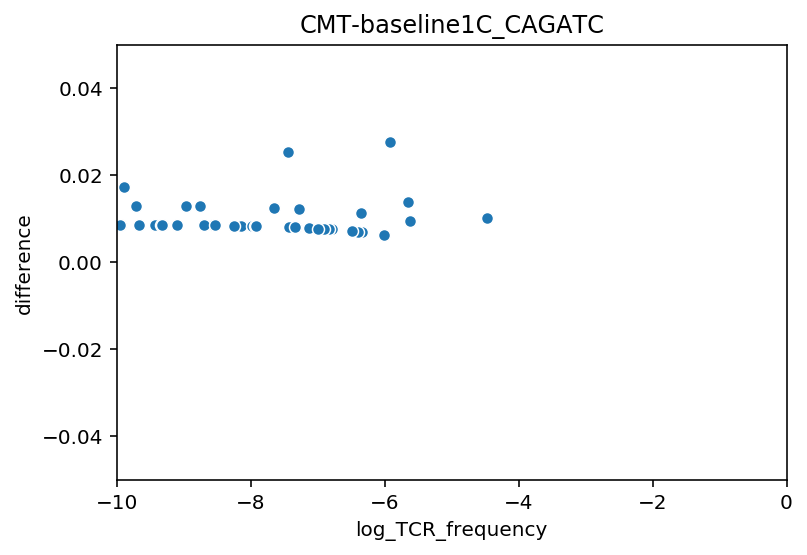

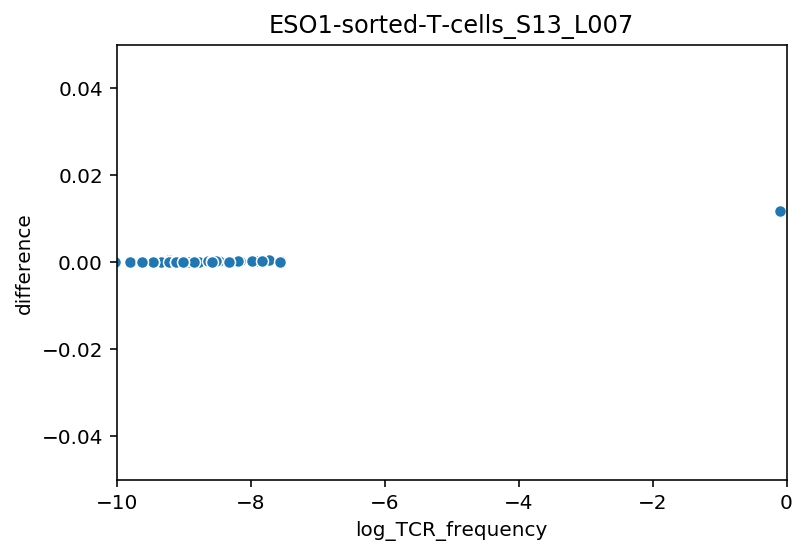

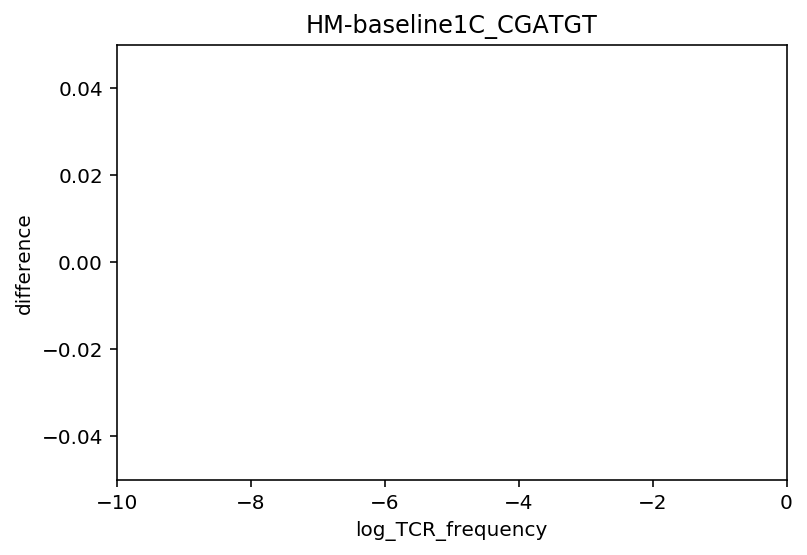

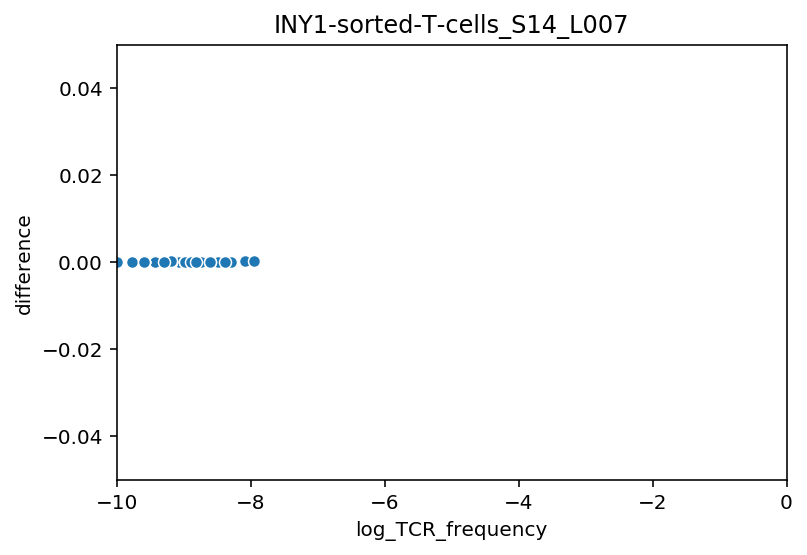

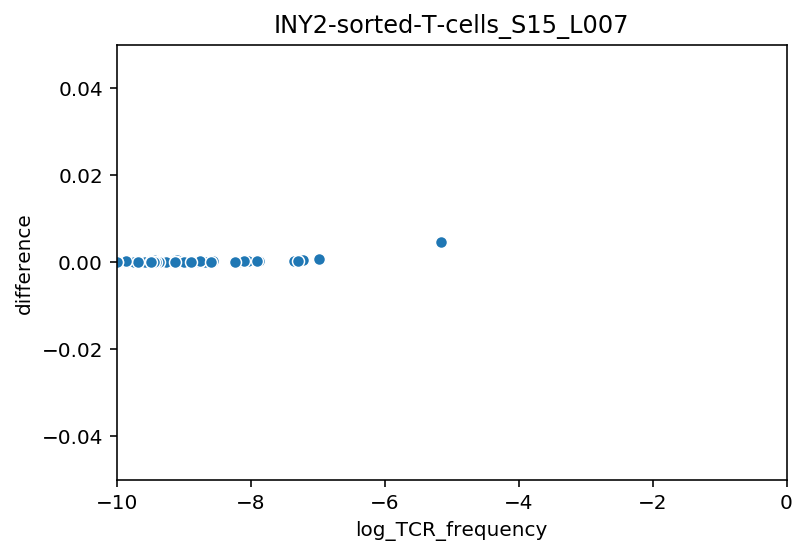

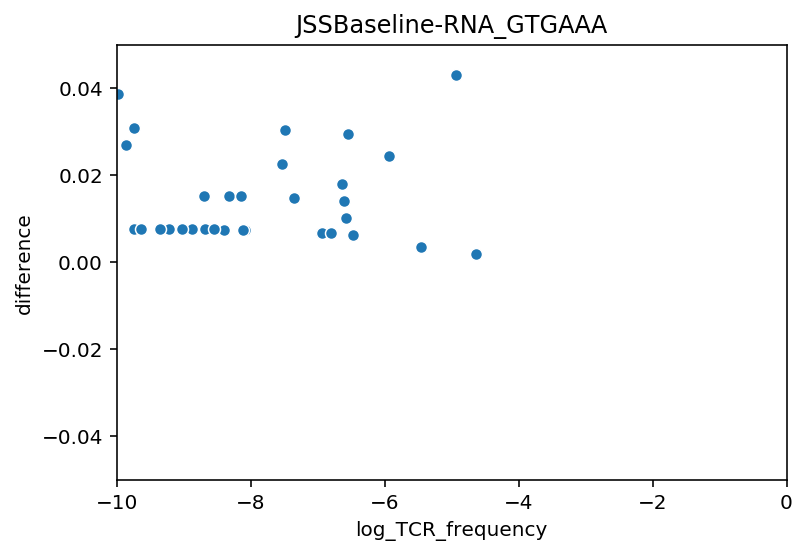

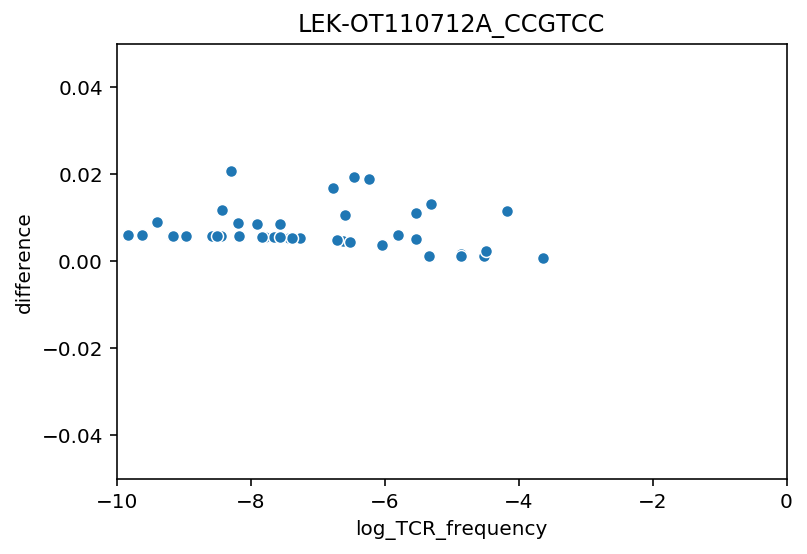

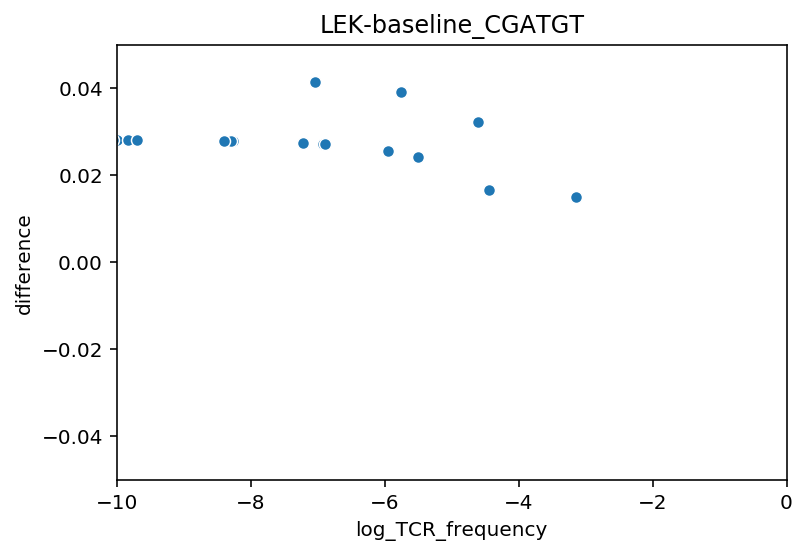

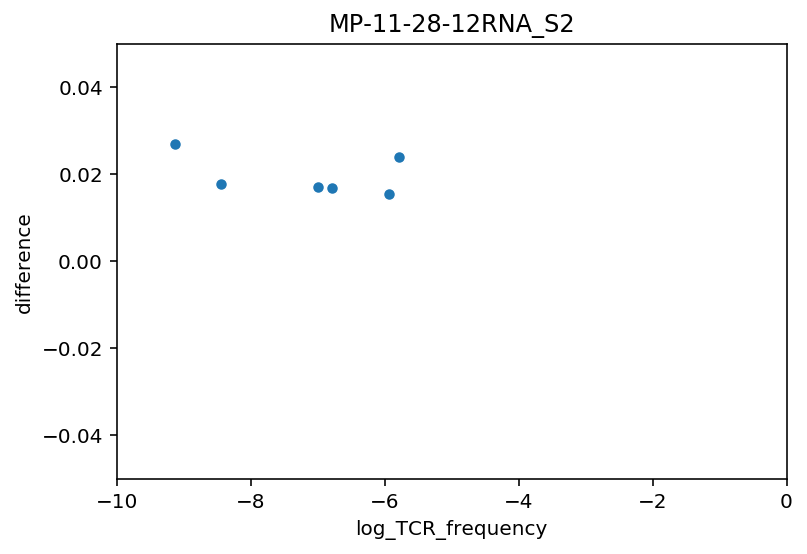

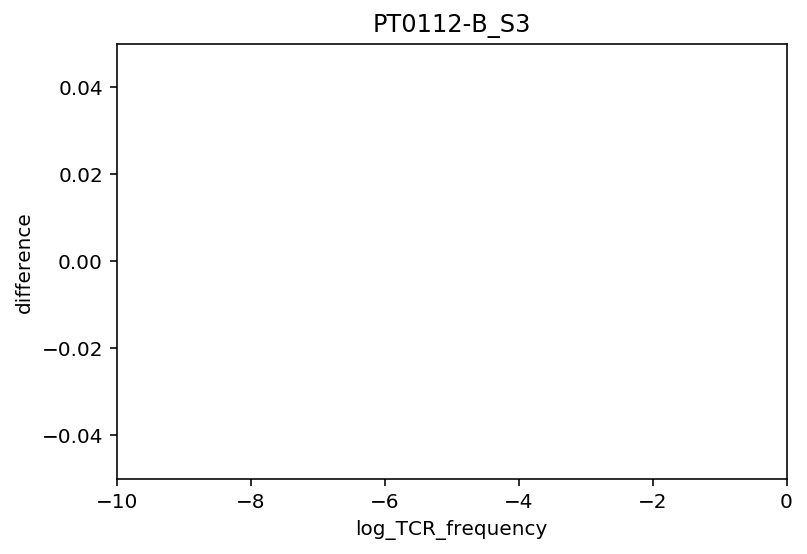

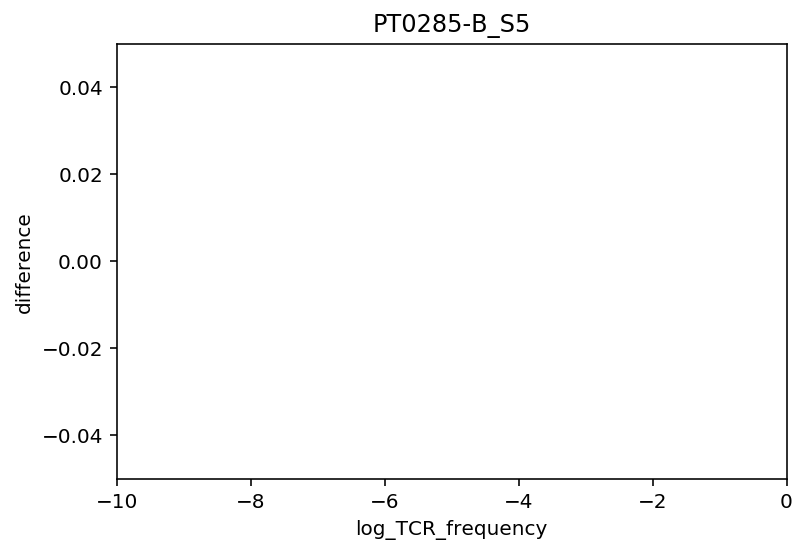

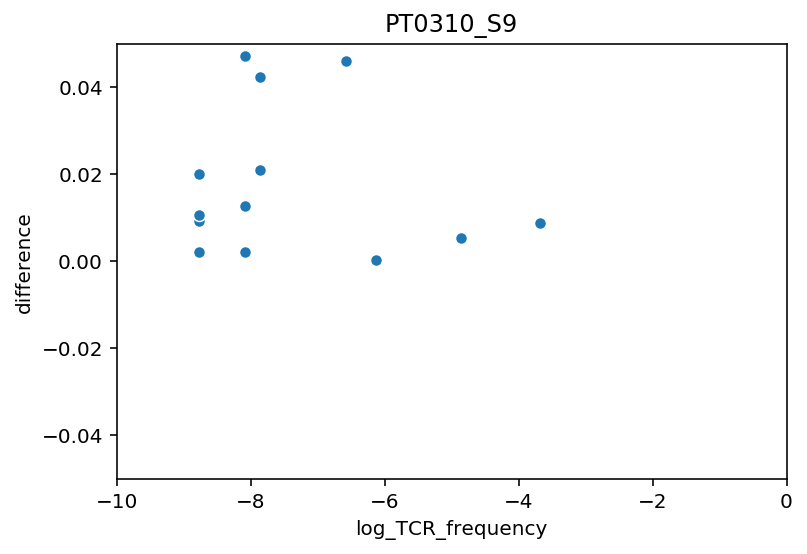

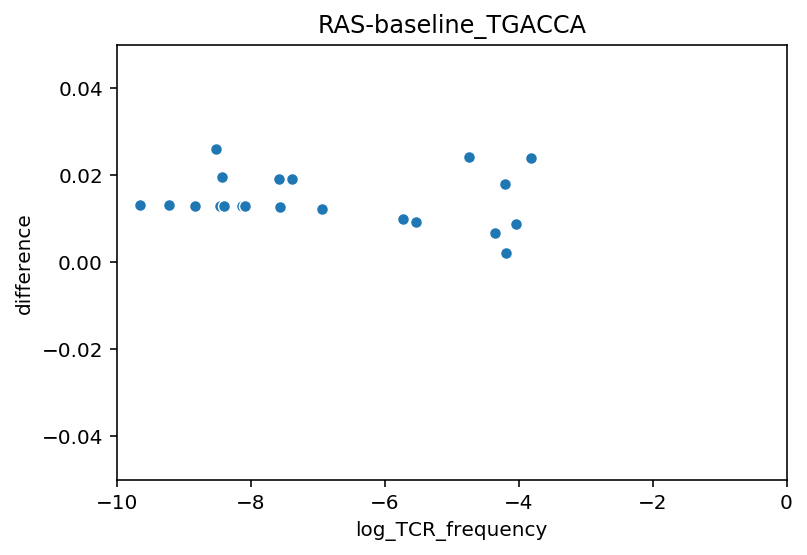

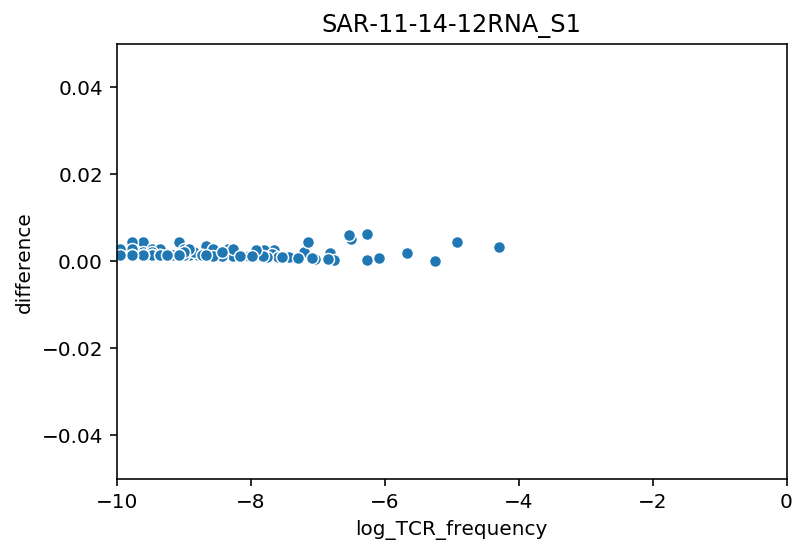

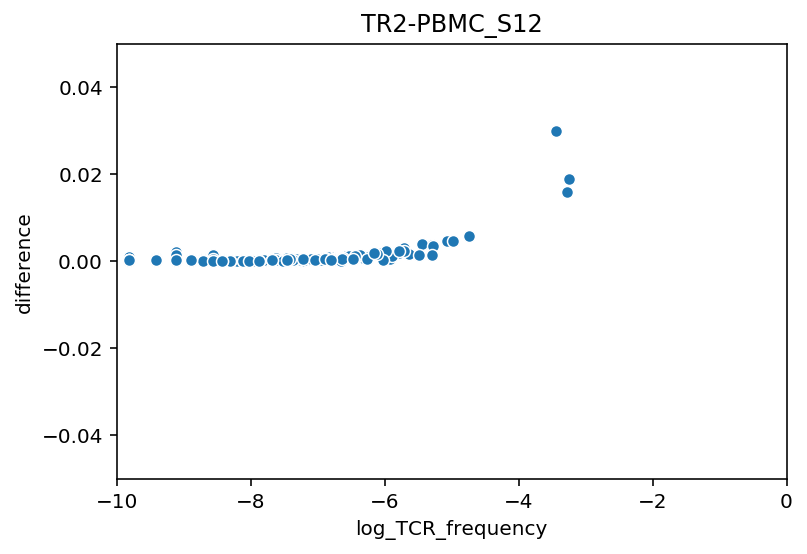

In [49]:
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in sample_names:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())

    overlap_TCR_IMREP = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP))

    #   TCR    
    TCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)][['CDR3', 'Frequency_TCR']]
    TCR_Freq_dict = dict(zip(TCR_Freq_df.CDR3, TCR_Freq_df.Frequency_TCR))
 
    
    #   IMREP
    IMREP_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)][['CDR3', 'Frequency_IMREP']]
    IMREP_Freq_dict = dict(zip(IMREP_Freq_df.CDR3, IMREP_Freq_df.Frequency_IMREP))

    
    #####################    
#   TCR_IMREP
    overlap_TCR_IMREP_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP)
    overlap_TCR_IMREP_dict = dict.fromkeys(overlap_TCR_IMREP_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_set_cdr3:
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
    
    if len(overlap_TCR_IMREP_dict) > 0:
        overlap_TCR_IMREP_df = pd.DataFrame.from_dict(overlap_TCR_IMREP_dict, orient = 'index')
        overlap_TCR_IMREP_df.columns = ['TCR_frequency', 'IMREP_frequency']
        overlap_TCR_IMREP_df['log_TCR_frequency'] = np.log(overlap_TCR_IMREP_df['TCR_frequency'])
        overlap_TCR_IMREP_df['log_IMREP_frequency'] = np.log(overlap_TCR_IMREP_df['IMREP_frequency'])
        overlap_TCR_IMREP_df['difference'] = np.abs(overlap_TCR_IMREP_df.iloc[:, 1] - overlap_TCR_IMREP_df.iloc[:, 0])
        sns.scatterplot(data = overlap_TCR_IMREP_df, x = 'log_TCR_frequency', y = 'difference').set_title(sample)
        plt.xlim(-10, 0)
        plt.ylim(-0.05, 0.05)
        plt.show()

- TCR & MIXCR

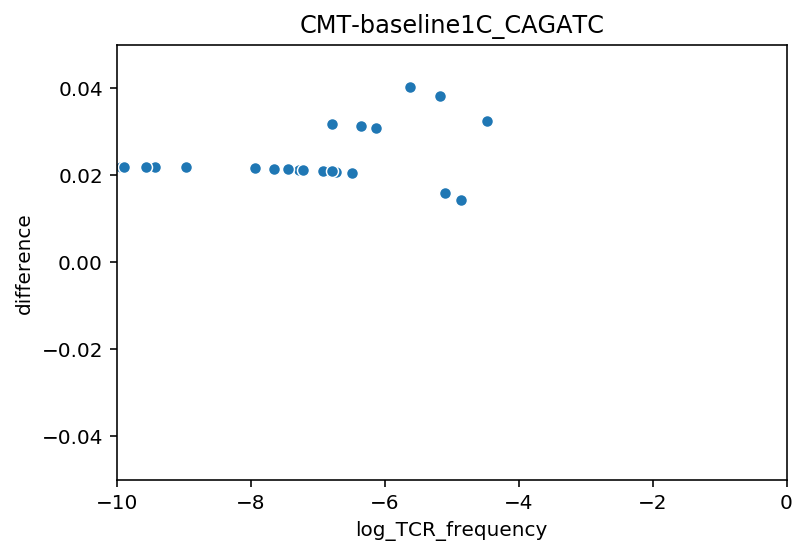

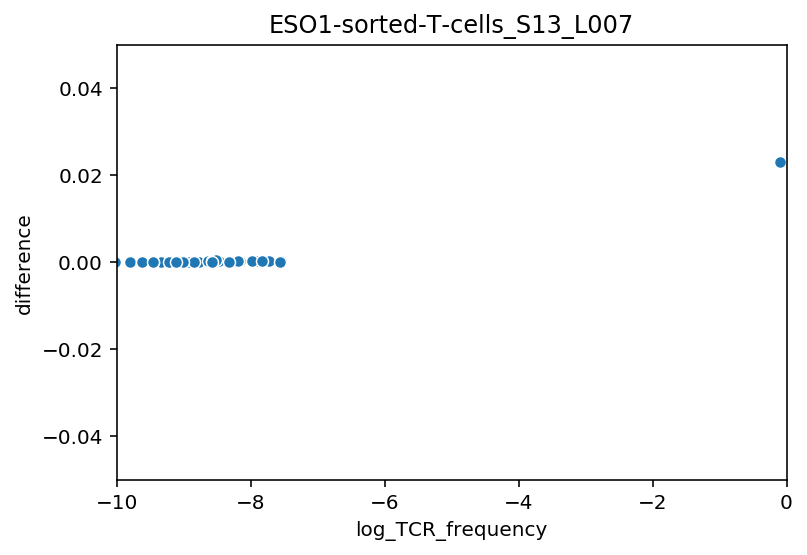

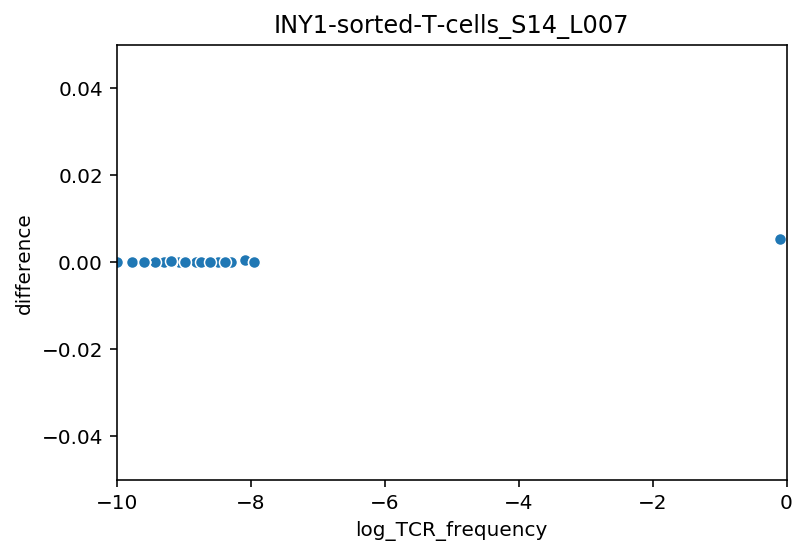

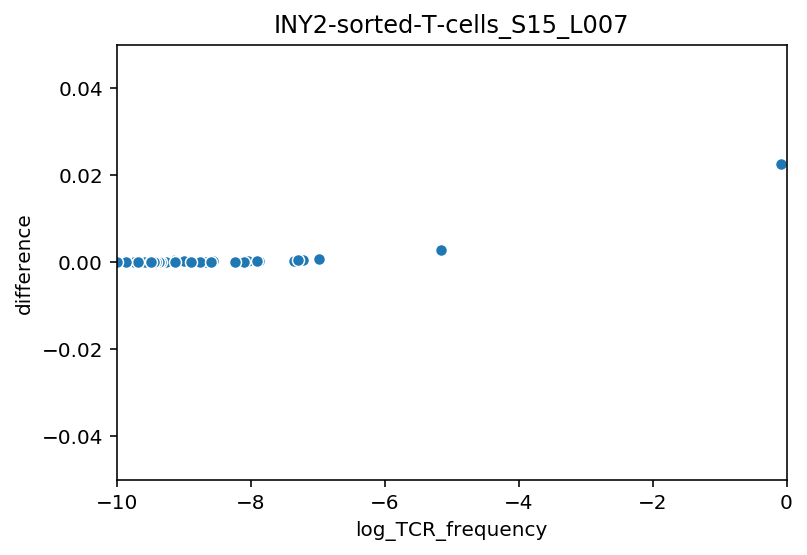

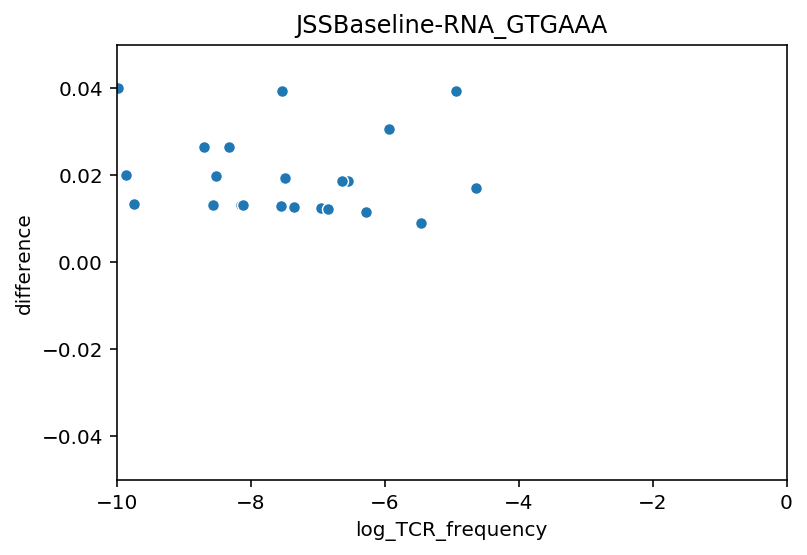

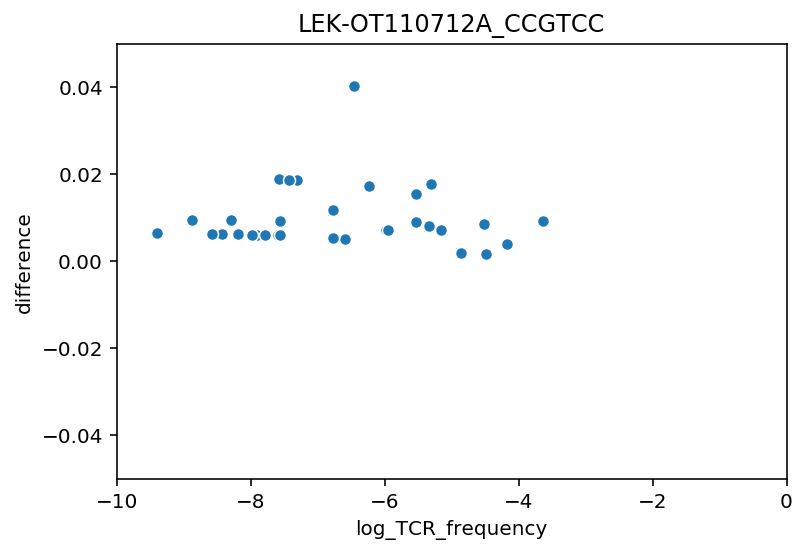

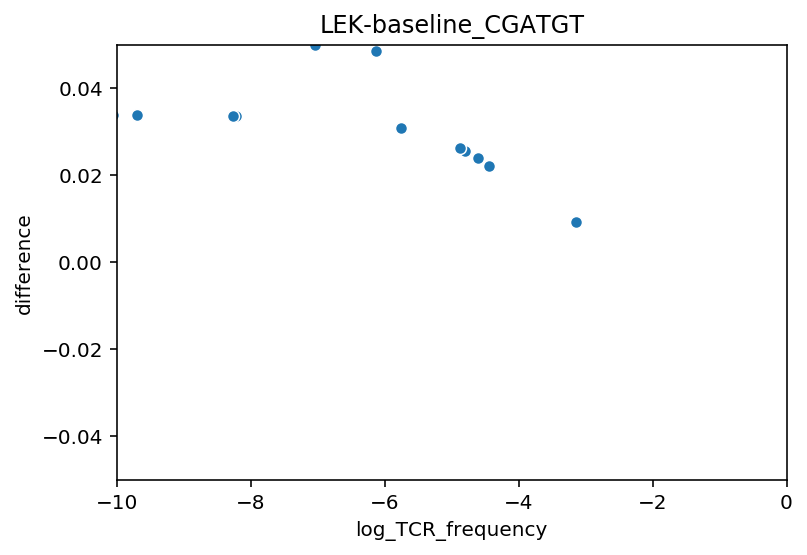

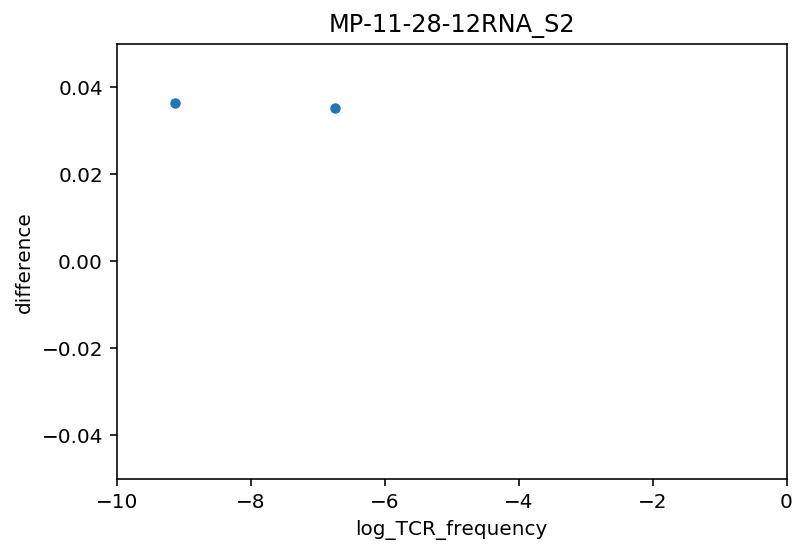

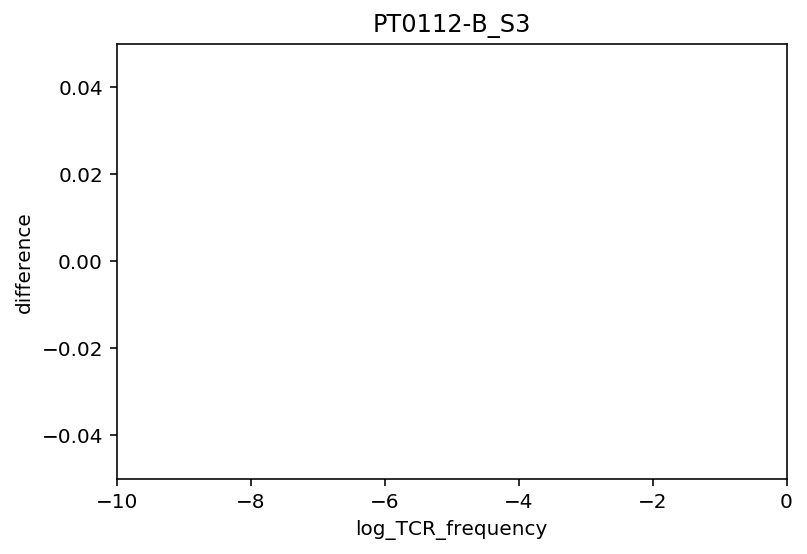

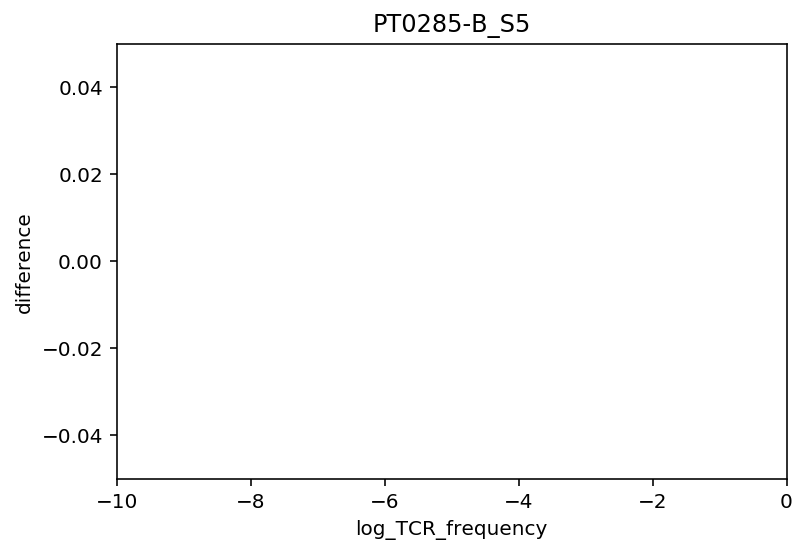

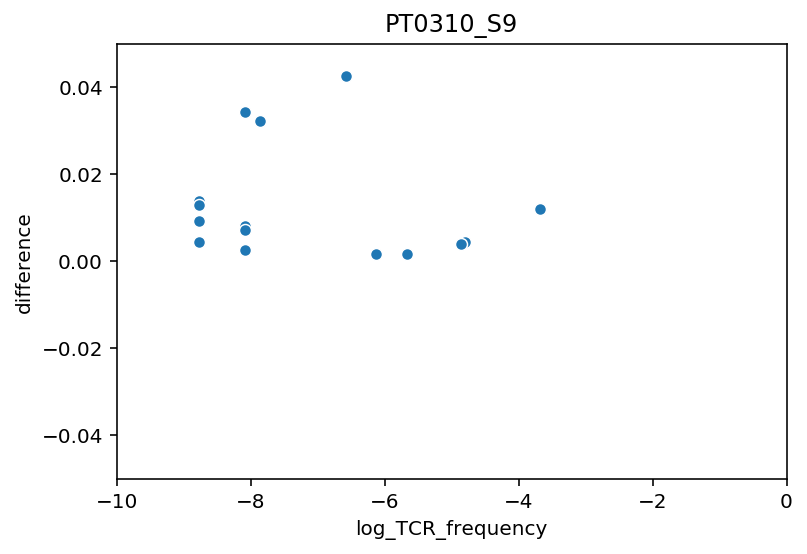

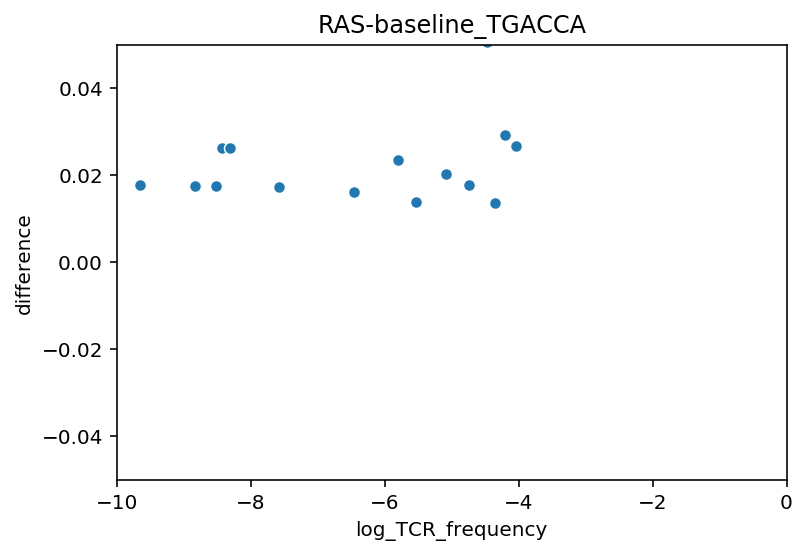

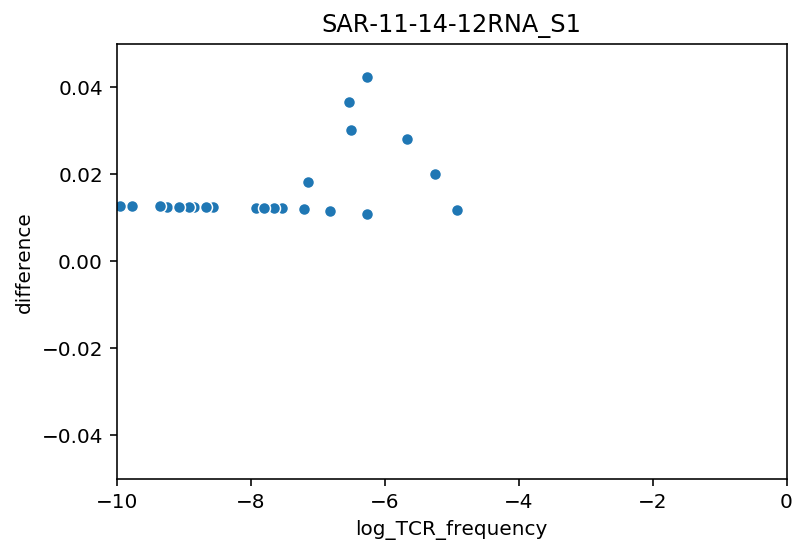

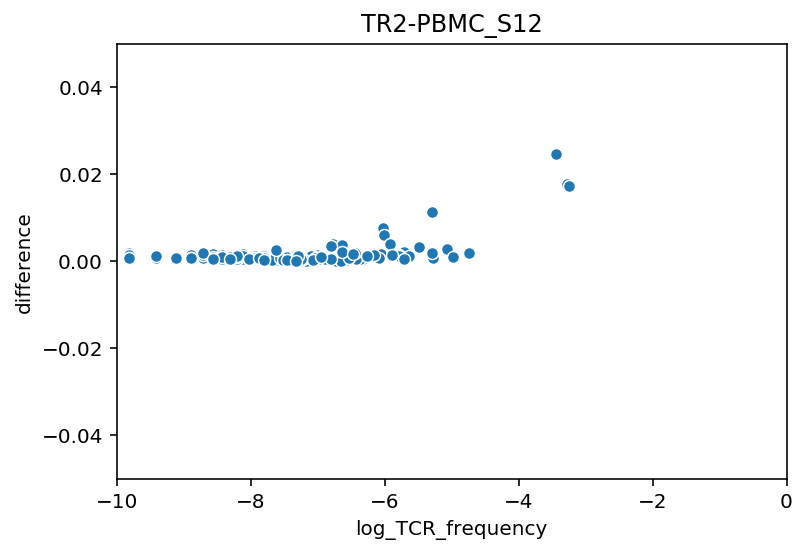

In [50]:
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in sample_names:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_MIXCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique().tolist())

    overlap_TCR_MIXCR = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR))
    
    #   TCR    
    TCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)][['CDR3', 'Frequency_TCR']]
    TCR_Freq_dict = dict(zip(TCR_Freq_df.CDR3, TCR_Freq_df.Frequency_TCR))
 
    #   MIXCR
    MIXCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)][['CDR3', 'Frequency_MIXCR']]
    MIXCR_Freq_dict = dict(zip(MIXCR_Freq_df.CDR3, MIXCR_Freq_df.Frequency_MIXCR))


##################### 
#   TCR_MIXCR
    overlap_TCR_MIXCR_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR)
    overlap_TCR_MIXCR_dict = dict.fromkeys(overlap_TCR_MIXCR_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_MIXCR_set_cdr3:
        overlap_TCR_MIXCR_dict[cdr3] = overlap_TCR_MIXCR_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_MIXCR_dict[cdr3] = overlap_TCR_MIXCR_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
    
    if len(overlap_TCR_MIXCR_dict) > 0:
        overlap_TCR_MIXCR_df = pd.DataFrame.from_dict(overlap_TCR_MIXCR_dict, orient = 'index')
        overlap_TCR_MIXCR_df.columns = ['TCR_frequency', 'MIXCR_frequency']
        overlap_TCR_MIXCR_df['log_TCR_frequency'] = np.log(overlap_TCR_MIXCR_df['TCR_frequency'])
        overlap_TCR_MIXCR_df['difference'] = np.abs(overlap_TCR_MIXCR_df.iloc[:, 1] - overlap_TCR_MIXCR_df.iloc[:, 0])
        sns.scatterplot(data = overlap_TCR_MIXCR_df, x = 'log_TCR_frequency', y = 'difference').set_title(sample)
        plt.xlim(-10, 0)
        plt.ylim(-0.05, 0.05)
        plt.show()

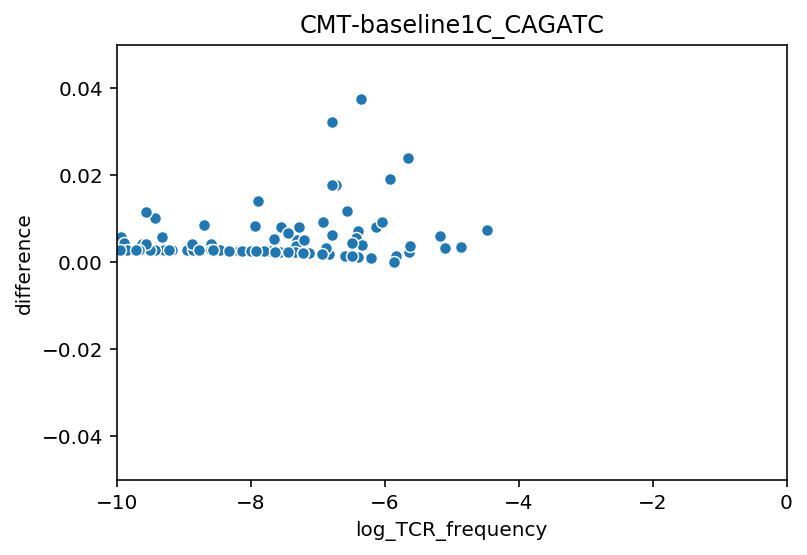

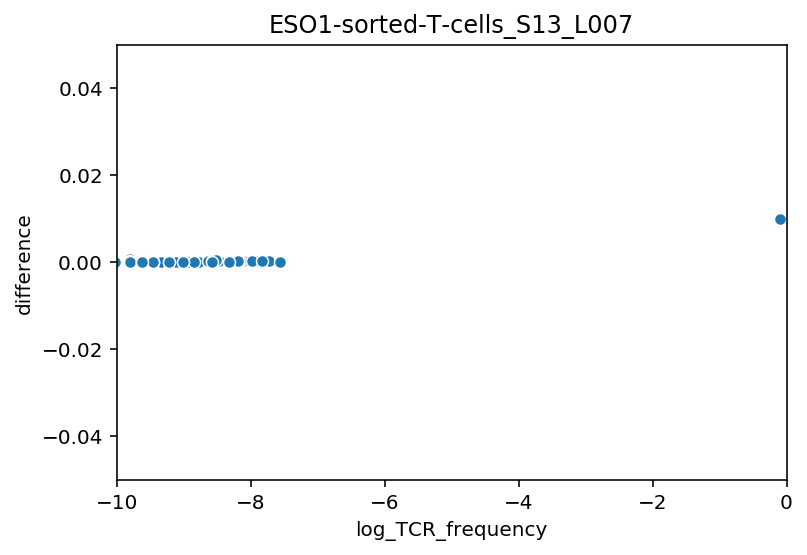

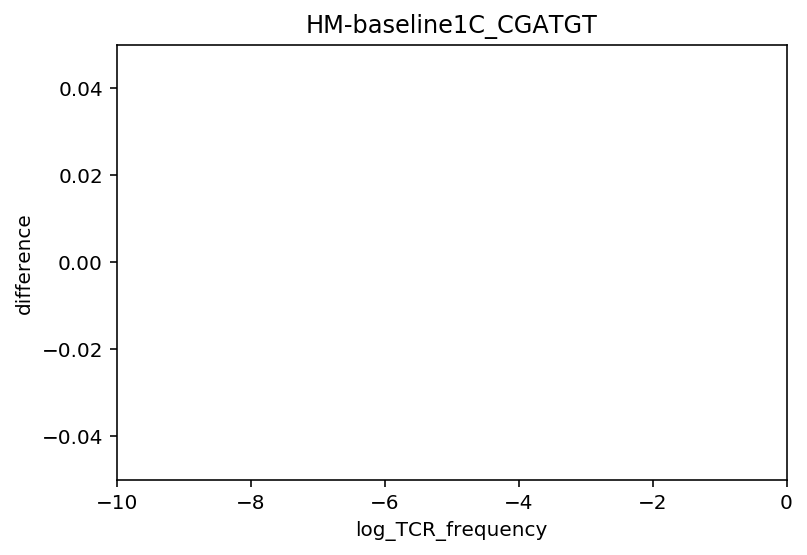

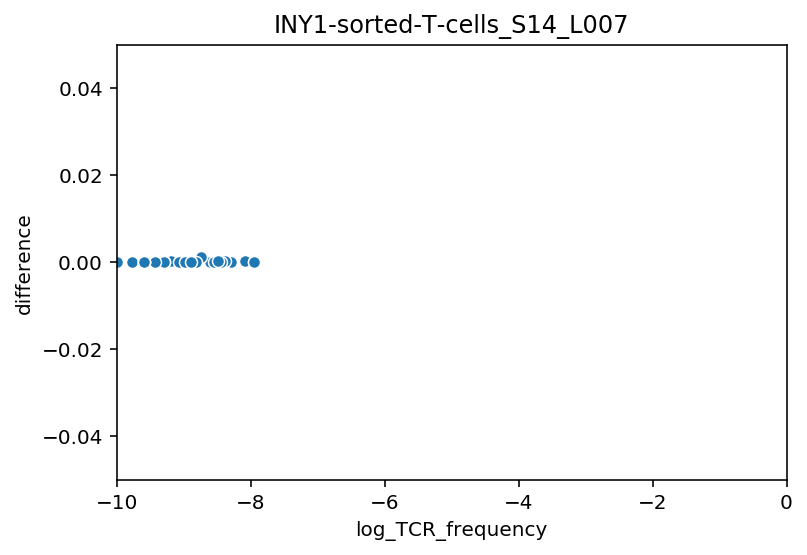

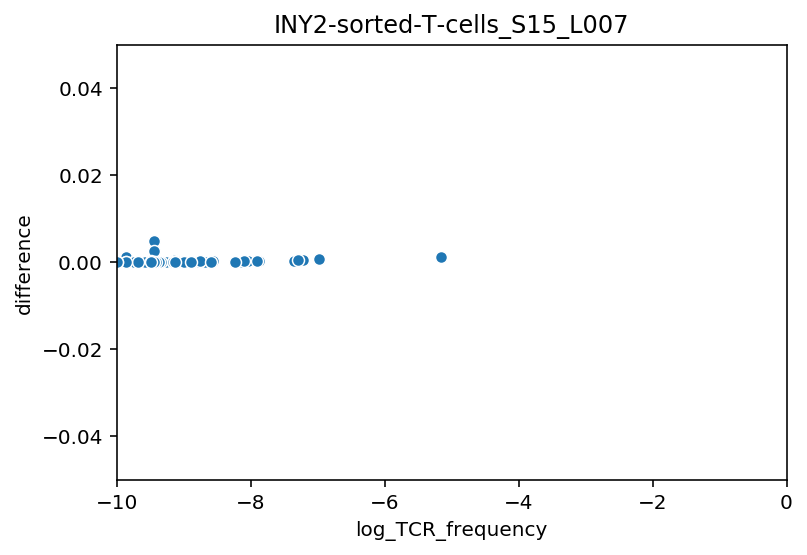

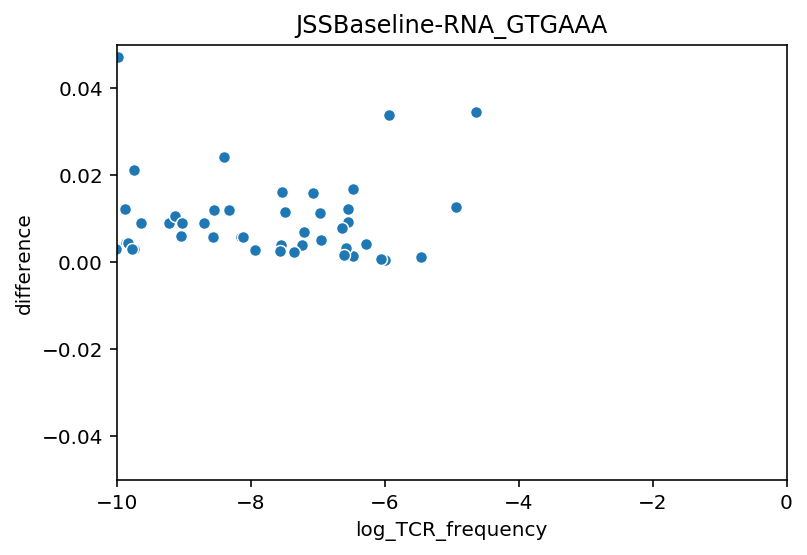

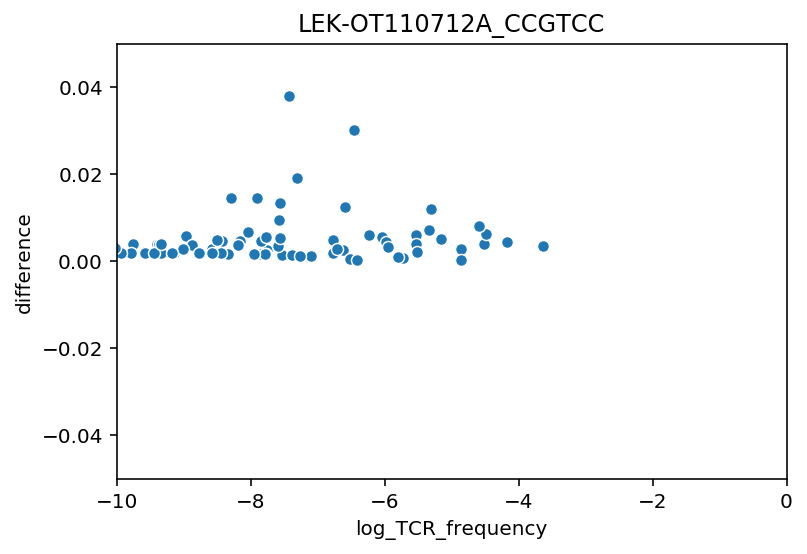

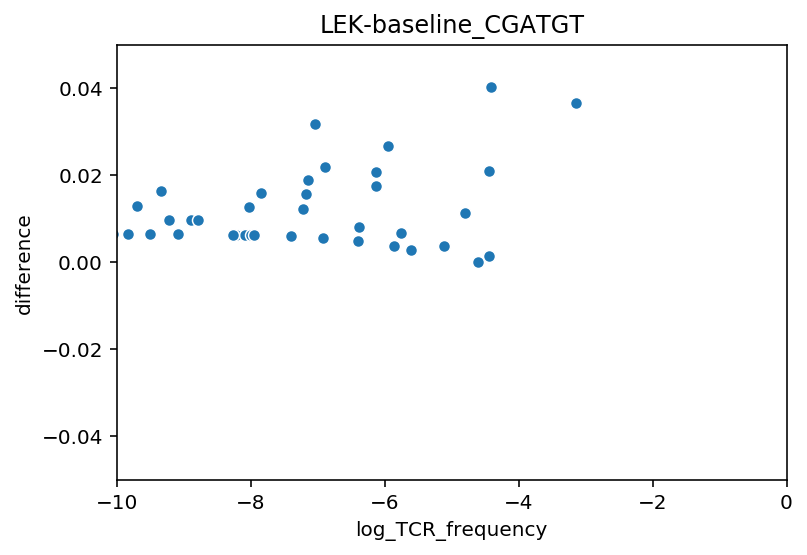

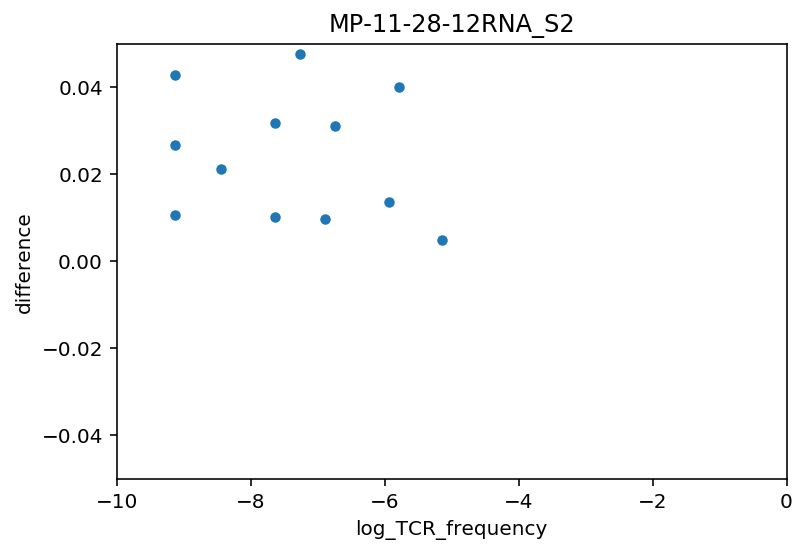

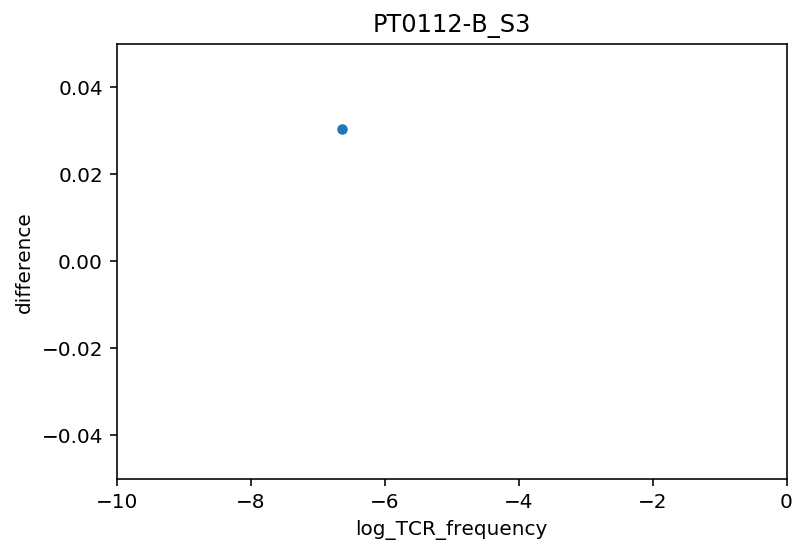

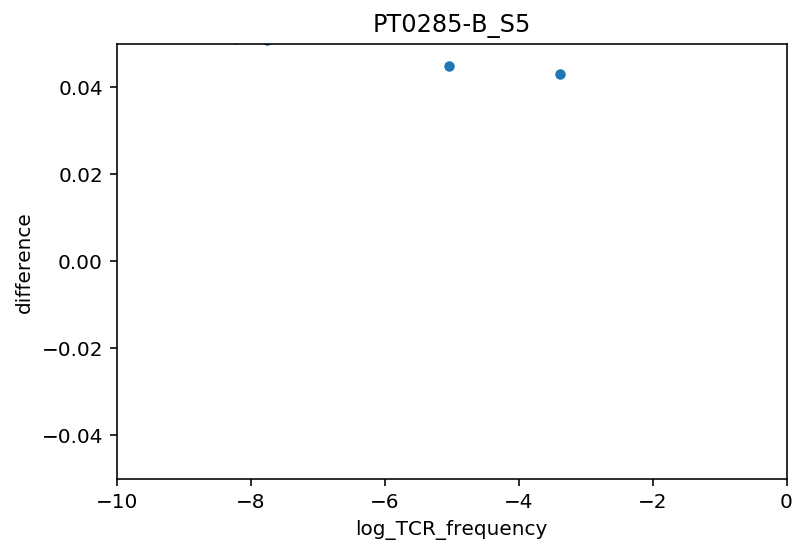

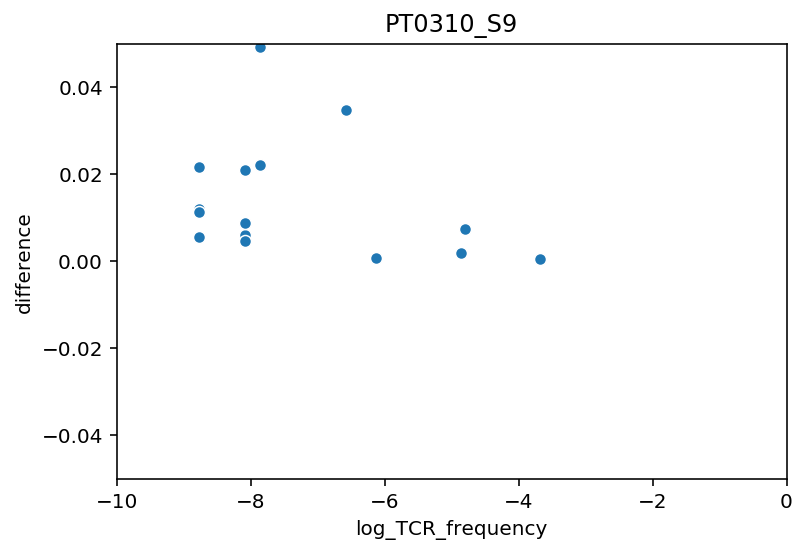

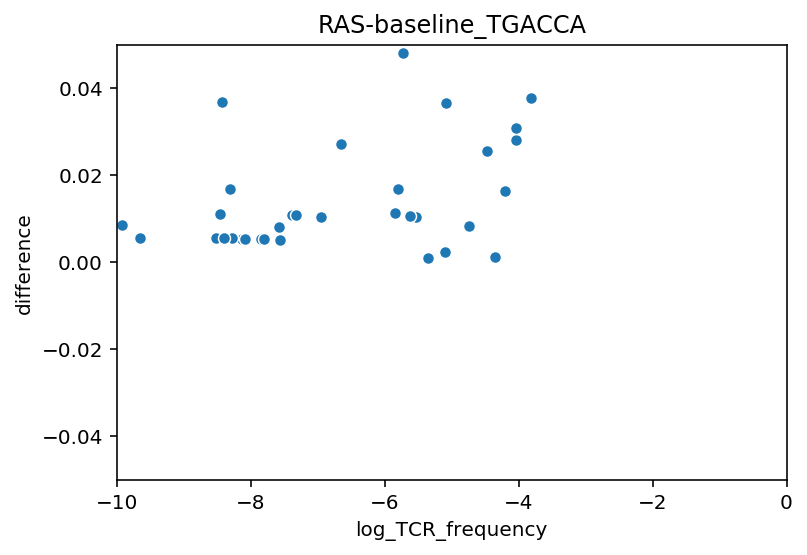

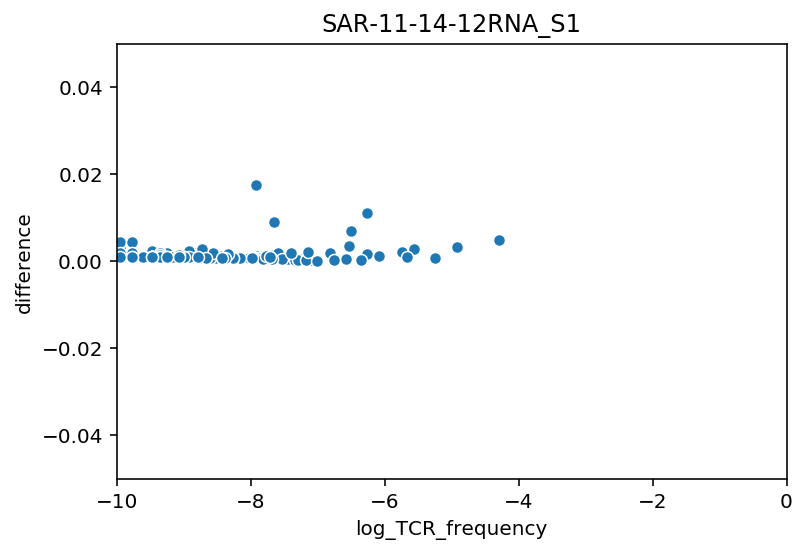

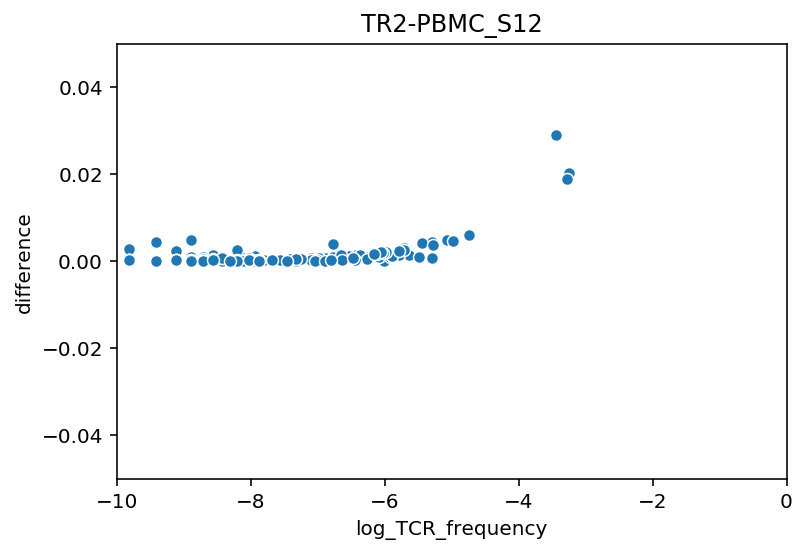

In [51]:
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in sample_names:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_TRUST4 = set(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique().tolist())

    overlap_TCR_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_TRUST4))

    #   TCR    
    TCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)][['CDR3', 'Frequency_TCR']]
    TCR_Freq_dict = dict(zip(TCR_Freq_df.CDR3, TCR_Freq_df.Frequency_TCR))
 
    
    #   TRUST4
    TRUST4_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)][['CDR3', 'Frequency_TRUST4']]
    TRUST4_Freq_dict = dict(zip(TRUST4_Freq_df.CDR3, TRUST4_Freq_df.Frequency_TRUST4))

    
    #####################    
#   TCR_TRUST4
    overlap_TCR_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_TRUST4_dict = dict.fromkeys(overlap_TCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_TRUST4_set_cdr3:
        overlap_TCR_TRUST4_dict[cdr3] = overlap_TCR_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_TRUST4_dict[cdr3] = overlap_TCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]
    
    if len(overlap_TCR_TRUST4_dict) > 0:
        overlap_TCR_TRUST4_df = pd.DataFrame.from_dict(overlap_TCR_TRUST4_dict, orient = 'index')
        overlap_TCR_TRUST4_df.columns = ['TCR_frequency', 'TRUST4_frequency']
        overlap_TCR_TRUST4_df['log_TCR_frequency'] = np.log(overlap_TCR_TRUST4_df['TCR_frequency'])
        overlap_TCR_TRUST4_df['difference'] = np.abs(overlap_TCR_TRUST4_df.iloc[:, 1] - overlap_TCR_TRUST4_df.iloc[:, 0])
        sns.scatterplot(data = overlap_TCR_TRUST4_df, x = 'log_TCR_frequency', y = 'difference').set_title(sample)
        plt.xlim(-10, 0)
        plt.ylim(-0.05, 0.05)
        plt.show()

## Compare K-mer

### TCR & IMREP

In [52]:
#sample = 'CMT-baseline1C_CAGATC'
TCR_IMREP_jaccard = pd.DataFrame({'TI_jaccard':[]})
for sample in sample_names:
    #kmer_df = pd.DataFrame({'IMREP':[], 'TCR':[]})
    
    TCR_kmer_list = []
    TCR_samp_df = TCR_df[TCR_df['Sample'] == sample]
    for i in range(len(TCR_samp_df)):
        k = 4
        count = 0
        for aa in range(len(TCR_samp_df.iloc[i, 1]) - (k-1)):
            count += 1
            TCR_kmer = TCR_samp_df.iloc[i,1][aa:aa+k]
            TCR_kmer_list.append(TCR_kmer)
    #TCR_kmer_dict = dict(Counter(TCR_kmer_list))

    IMREP_kmer_list = []
    IMREP_samp_df = IMREP_df[IMREP_df['Sample'] == sample]
    for j in range(len(IMREP_samp_df)):
        k_1 = 4
        count_1 = 0
        for aa in range(len(IMREP_samp_df.iloc[j, 1]) - (k_1-1)):
            count_1 += 1
            IMREP_kmer = IMREP_samp_df.iloc[j,1][aa:aa+k_1]
            IMREP_kmer_list.append(IMREP_kmer)
    #IMREP_kmer_dict = dict(Counter(IMREP_kmer_list))

    #for kmer in IMREP_kmer_dict.keys() & TCR_kmer_dict.keys():
        #kmer_df.loc[kmer] = [IMREP_kmer_dict[kmer], TCR_kmer_dict[kmer]]

    #TCR_IMREP_distance.loc[sample] = np.mean(np.abs(kmer_df['IMREP'] - kmer_df['TCR']))
    TCR_IMREP_jaccard.loc[sample] = len(set(IMREP_kmer_list).intersection(set(TCR_kmer_list)))/len(set(IMREP_kmer_list).union(set(TCR_kmer_list)))

TCR_IMREP_jaccard

TI_jaccard
CMT-baseline1C_CAGATC           0.029417
ESO1-sorted-T-cells_S13_L007    0.366308
HM-baseline1C_CGATGT            0.001199
INY1-sorted-T-cells_S14_L007    0.331072
INY2-sorted-T-cells_S15_L007    0.338437
JSSBaseline-RNA_GTGAAA          0.017285
LEK-OT110712A_CCGTCC            0.021019
LEK-baseline_CGATGT             0.008868
MP-11-28-12RNA_S2               0.015667
PT0112-B_S3                     0.006037
PT0285-B_S5                     0.003235
PT0310_S9                       0.177468
RAS-baseline_TGACCA             0.021346
SAR-11-14-12RNA_S1              0.078675
TR2-PBMC_S12                    0.321534

### TCR & MIXCR

In [59]:
TCR_MIXCR_jaccard = pd.DataFrame({'TM_jaccard':[]})
for sample in sample_names:
    if sample != 'HM-baseline1C_CGATGT':
        kmer_df = pd.DataFrame({'MIXCR':[], 'TCR':[]})

        TCR_kmer_list = []
        TCR_samp_df = TCR_df[TCR_df['Sample'] == sample]
        for i in range(len(TCR_samp_df)):
            k = 4
            count = 0
            for aa in range(len(TCR_samp_df.iloc[i, 1]) - (k-1)):
                count += 1
                TCR_kmer = TCR_samp_df.iloc[i,1][aa:aa+k]
                TCR_kmer_list.append(TCR_kmer)
        TCR_kmer_dict = dict(Counter(TCR_kmer_list))

        MIXCR_kmer_list = []
        MIXCR_samp_df = MIXCR_df[MIXCR_df['Sample'] == sample]
        for m in range(len(MIXCR_samp_df)):
            k_2 = 4
            count_2 = 0
            for aa in range(len(MIXCR_samp_df.iloc[m, 1]) - (k_2-1)):
                count_2 += 1
                MIXCR_kmer = MIXCR_samp_df.iloc[m,1][aa:aa+k_2]
                MIXCR_kmer_list.append(MIXCR_kmer)
        MIXCR_kmer_dict = dict(Counter(MIXCR_kmer_list))

        #for kmer in MIXCR_kmer_dict.keys() & TCR_kmer_dict.keys():
            #kmer_df.loc[kmer] = [MIXCR_kmer_dict[kmer], TCR_kmer_dict[kmer]]

        #TCR_MIXCR_distance.loc[sample] = np.mean(np.abs(kmer_df['MIXCR'] - kmer_df['TCR']))
        TCR_MIXCR_jaccard.loc[sample] = len(set(MIXCR_kmer_dict.keys()).intersection(set(TCR_kmer_dict.keys())))/len(set(MIXCR_kmer_dict.keys()).union(TCR_kmer_dict.keys()))


TCR_MIXCR_jaccard

TM_jaccard
CMT-baseline1C_CAGATC           0.012601
ESO1-sorted-T-cells_S13_L007    0.358242
INY1-sorted-T-cells_S14_L007    0.274836
INY2-sorted-T-cells_S15_L007    0.198813
JSSBaseline-RNA_GTGAAA          0.012566
LEK-OT110712A_CCGTCC            0.012513
LEK-baseline_CGATGT             0.005742
MP-11-28-12RNA_S2               0.009906
PT0112-B_S3                     0.003019
PT0285-B_S5                     0.002980
PT0310_S9                       0.224352
RAS-baseline_TGACCA             0.017374
SAR-11-14-12RNA_S1              0.013796
TR2-PBMC_S12                    0.164489

### TCR & TRUST4

In [60]:
TCR_TRUST4_jaccard = pd.DataFrame({'TT_jaccard':[]})
for sample in sample_names:
    kmer_df = pd.DataFrame({'TRUST4':[], 'TCR':[]})
    
    TCR_kmer_list = []
    TCR_samp_df = TCR_df[TCR_df['Sample'] == sample]
    for i in range(len(TCR_samp_df)):
        k = 4
        count = 0
        for aa in range(len(TCR_samp_df.iloc[i, 1]) - (k-1)):
            count += 1
            TCR_kmer = TCR_samp_df.iloc[i,1][aa:aa+k]
            TCR_kmer_list.append(TCR_kmer)
    TCR_kmer_dict = dict(Counter(TCR_kmer_list))
    
    TRUST4_kmer_list = []
    TRUST4_samp_df = TRUST4_df[TRUST4_df['Sample'] == sample]
    for m in range(len(TRUST4_samp_df)):
        k_2 = 4
        count_2 = 0
        for aa in range(len(TRUST4_samp_df.iloc[m, 1]) - (k_2-1)):
            count_2 += 1
            TRUST4_kmer = TRUST4_samp_df.iloc[m,1][aa:aa+k_2]
            TRUST4_kmer_list.append(TRUST4_kmer)
    TRUST4_kmer_dict = dict(Counter(TRUST4_kmer_list))
    #for kmer in TRUST4_kmer_dict.keys() & TCR_kmer_dict.keys():
        #kmer_df.loc[kmer] = [TRUST4_kmer_dict[kmer], TCR_kmer_dict[kmer]]

    #TCR_TRUST4_distance.loc[sample] = np.mean(np.abs(kmer_df['TRUST4'] - kmer_df['TCR']))
    TCR_TRUST4_jaccard.loc[sample] = len(set(TRUST4_kmer_dict.keys()).intersection(set(TCR_kmer_dict.keys())))/len(set(TRUST4_kmer_dict.keys()).union(TCR_kmer_dict.keys()))

TCR_TRUST4_jaccard

TT_jaccard
CMT-baseline1C_CAGATC           0.056966
ESO1-sorted-T-cells_S13_L007    0.374570
HM-baseline1C_CGATGT            0.003595
INY1-sorted-T-cells_S14_L007    0.332627
INY2-sorted-T-cells_S15_L007    0.353397
JSSBaseline-RNA_GTGAAA          0.024872
LEK-OT110712A_CCGTCC            0.031242
LEK-baseline_CGATGT             0.017632
MP-11-28-12RNA_S2               0.022098
PT0112-B_S3                     0.007001
PT0285-B_S5                     0.008255
PT0310_S9                       0.158730
RAS-baseline_TGACCA             0.031801
SAR-11-14-12RNA_S1              0.099571
TR2-PBMC_S12                    0.348940

In [61]:
jaccard_df = pd.DataFrame({'TI_jaccard': TCR_IMREP_jaccard.loc[:, 'TI_jaccard'],
                           'TM_jaccard': TCR_MIXCR_jaccard.loc[:,'TM_jaccard'],
                           'TT_jaccard': TCR_TRUST4_jaccard.loc[:, 'TT_jaccard']})
jaccard_df

TI_jaccard  TM_jaccard  TT_jaccard
CMT-baseline1C_CAGATC           0.029417    0.012601    0.056966
ESO1-sorted-T-cells_S13_L007    0.366308    0.358242    0.374570
HM-baseline1C_CGATGT            0.001199         NaN    0.003595
INY1-sorted-T-cells_S14_L007    0.331072    0.274836    0.332627
INY2-sorted-T-cells_S15_L007    0.338437    0.198813    0.353397
JSSBaseline-RNA_GTGAAA          0.017285    0.012566    0.024872
LEK-OT110712A_CCGTCC            0.021019    0.012513    0.031242
LEK-baseline_CGATGT             0.008868    0.005742    0.017632
MP-11-28-12RNA_S2               0.015667    0.009906    0.022098
PT0112-B_S3                     0.006037    0.003019    0.007001
PT0285-B_S5                     0.003235    0.002980    0.008255
PT0310_S9                       0.177468    0.224352    0.158730
RAS-baseline_TGACCA             0.021346    0.017374    0.031801
SAR-11-14-12RNA_S1              0.078675    0.013796    0.099571
TR2-PBMC_S12                    0.321534    0.164489    0.348940

In [62]:
jaccard_df = jaccard_df.reset_index()
melt_jaccard_df = pd.melt(jaccard_df, id_vars = ['index'], value_vars = ['TI_jaccard', 'TM_jaccard', 'TT_jaccard'])

In [63]:
melt_jaccard_df.head()

index    variable     value
0         CMT-baseline1C_CAGATC  TI_jaccard  0.029417
1  ESO1-sorted-T-cells_S13_L007  TI_jaccard  0.366308
2          HM-baseline1C_CGATGT  TI_jaccard  0.001199
3  INY1-sorted-T-cells_S14_L007  TI_jaccard  0.331072
4  INY2-sorted-T-cells_S15_L007  TI_jaccard  0.338437

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

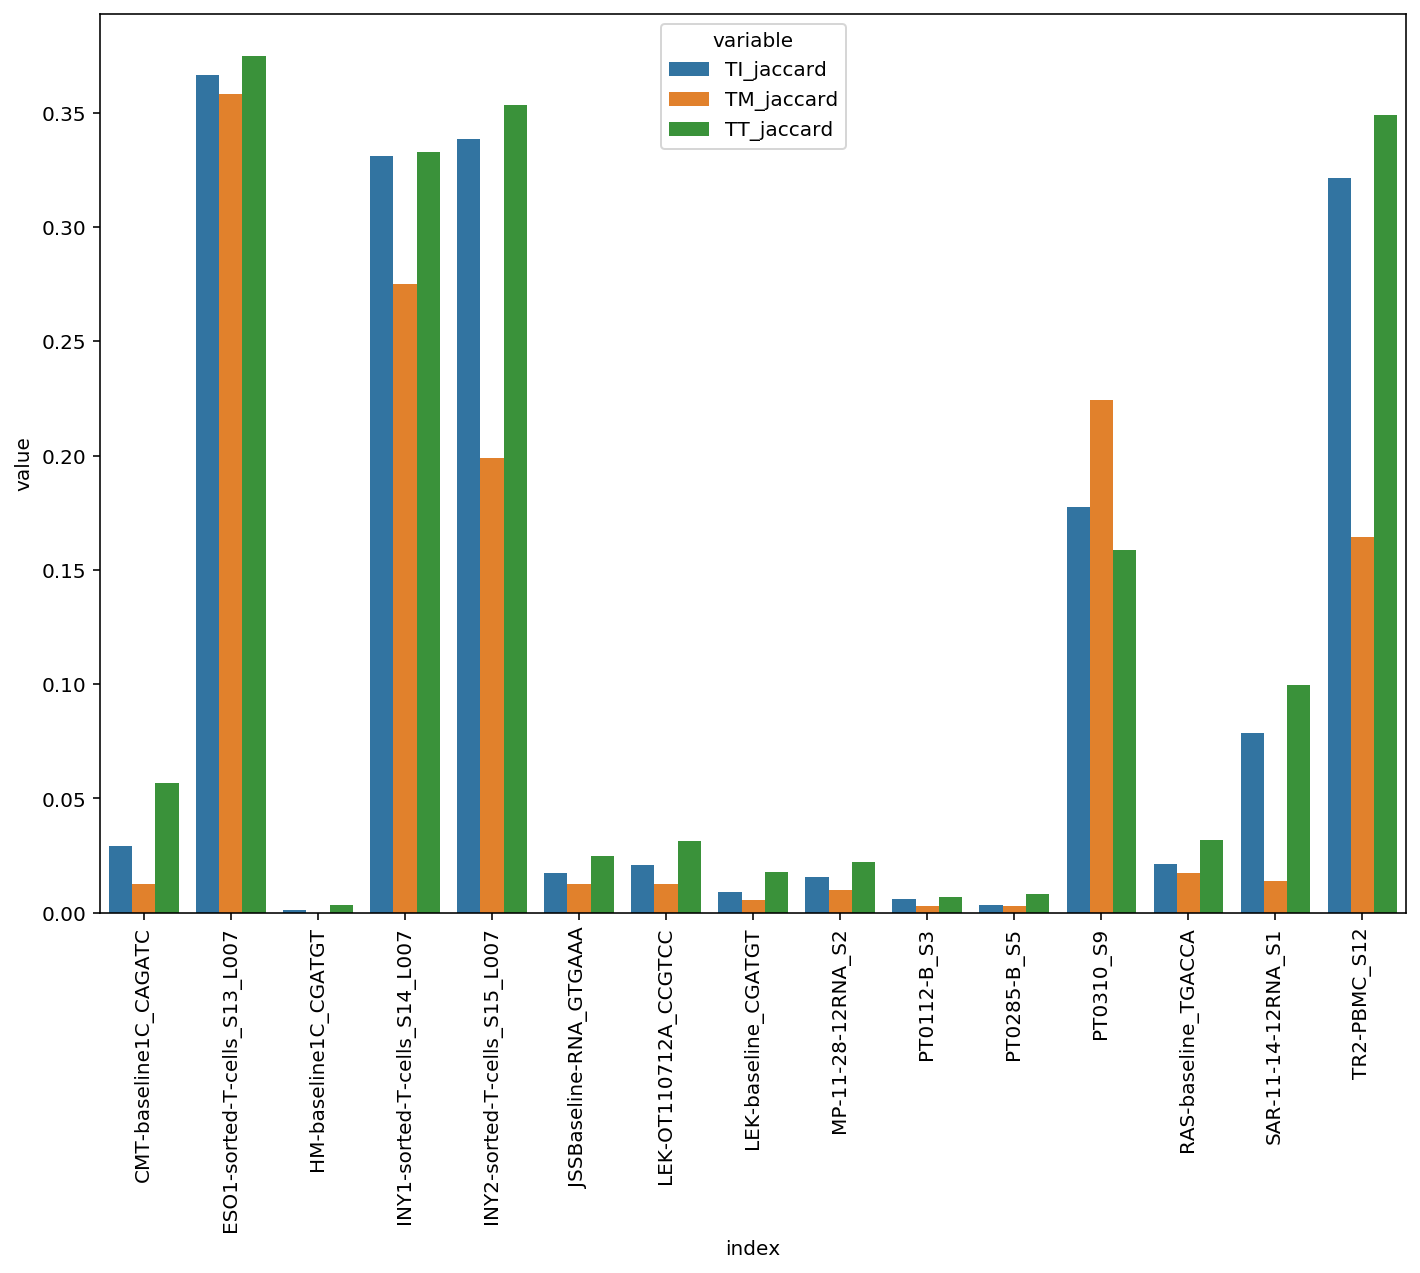

In [64]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(x="index", y="value", hue="variable", data=melt_jaccard_df)
plt.xticks(rotation=90)

## Compare V- and J- gene usage

### TCR 

In [110]:
df = pd.DataFrame()
for sample in list(Sample_name_matchup_RNA_TCR_dict.values()):
    file = '/project/mangul_341/dandanpe/scott/TCR_Data/' + sample + '.tsv'
    df_sample = pd.read_csv(file, sep = '\t')
    for matchup in Sample_name_matchup_RNA_TCR_dict:
        if Sample_name_matchup_RNA_TCR_dict[matchup] in file:
            df_sample.loc[:,'sample_name'] = matchup
    df = df.append(df_sample)

/spack/apps/linux-centos7-x86_64/gcc-8.3.0/anaconda3-2019.10-bpb6unkhyvkirwkg44uqchcy5jyhzhvt/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


### TCR V-gene usage in monoclonal samples

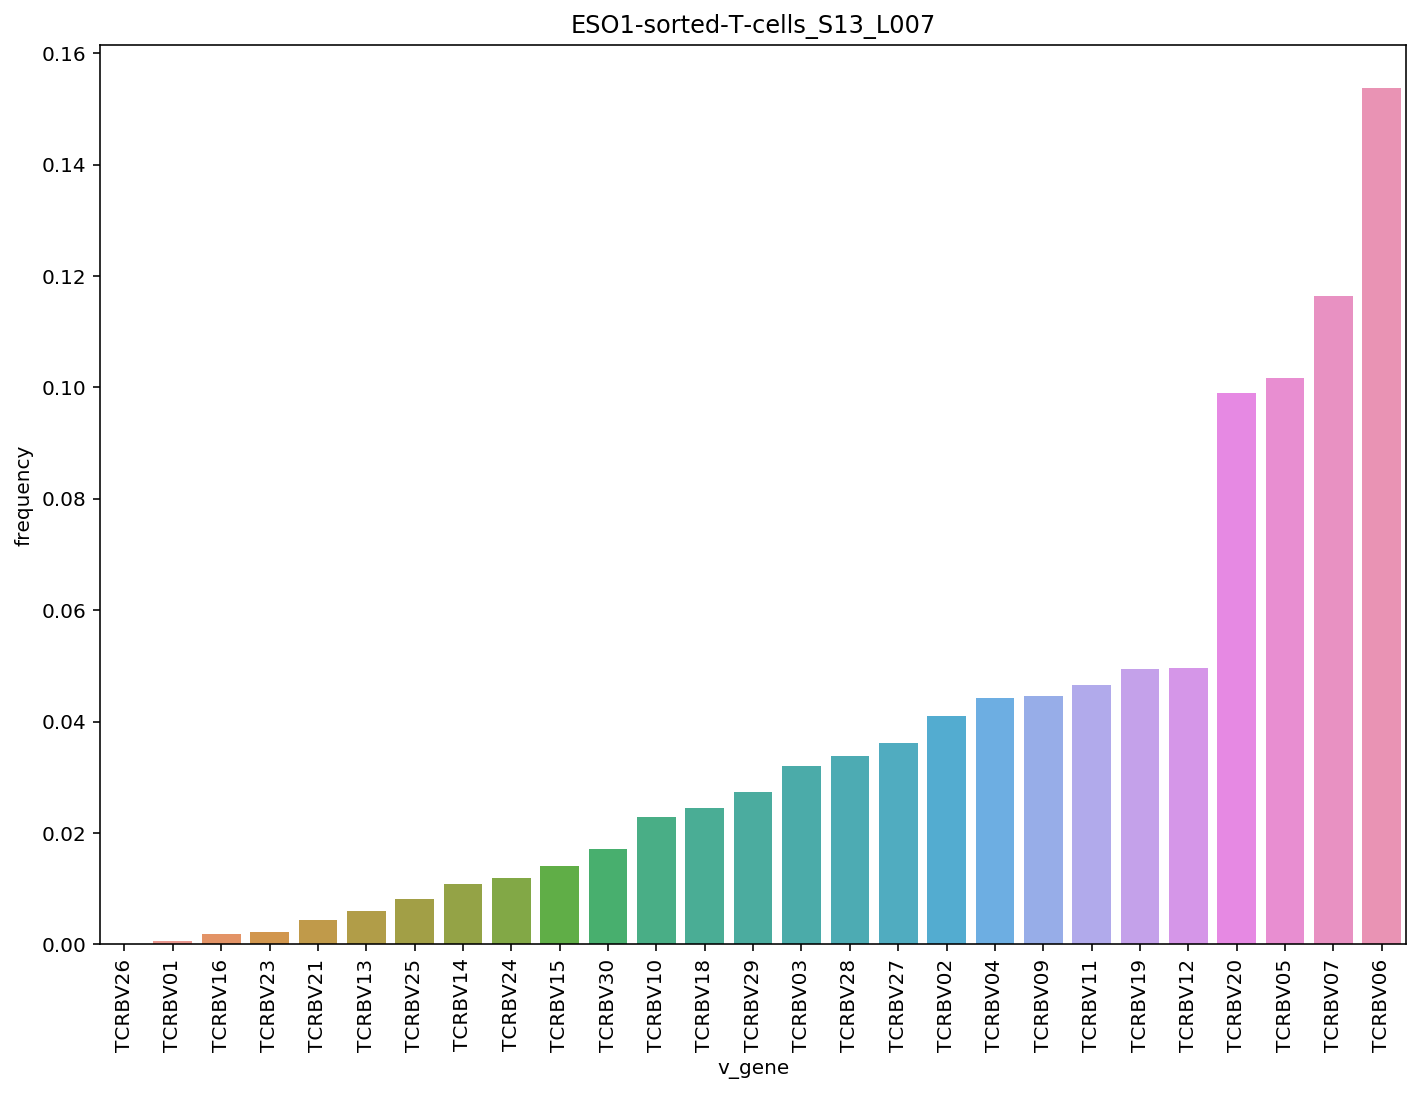

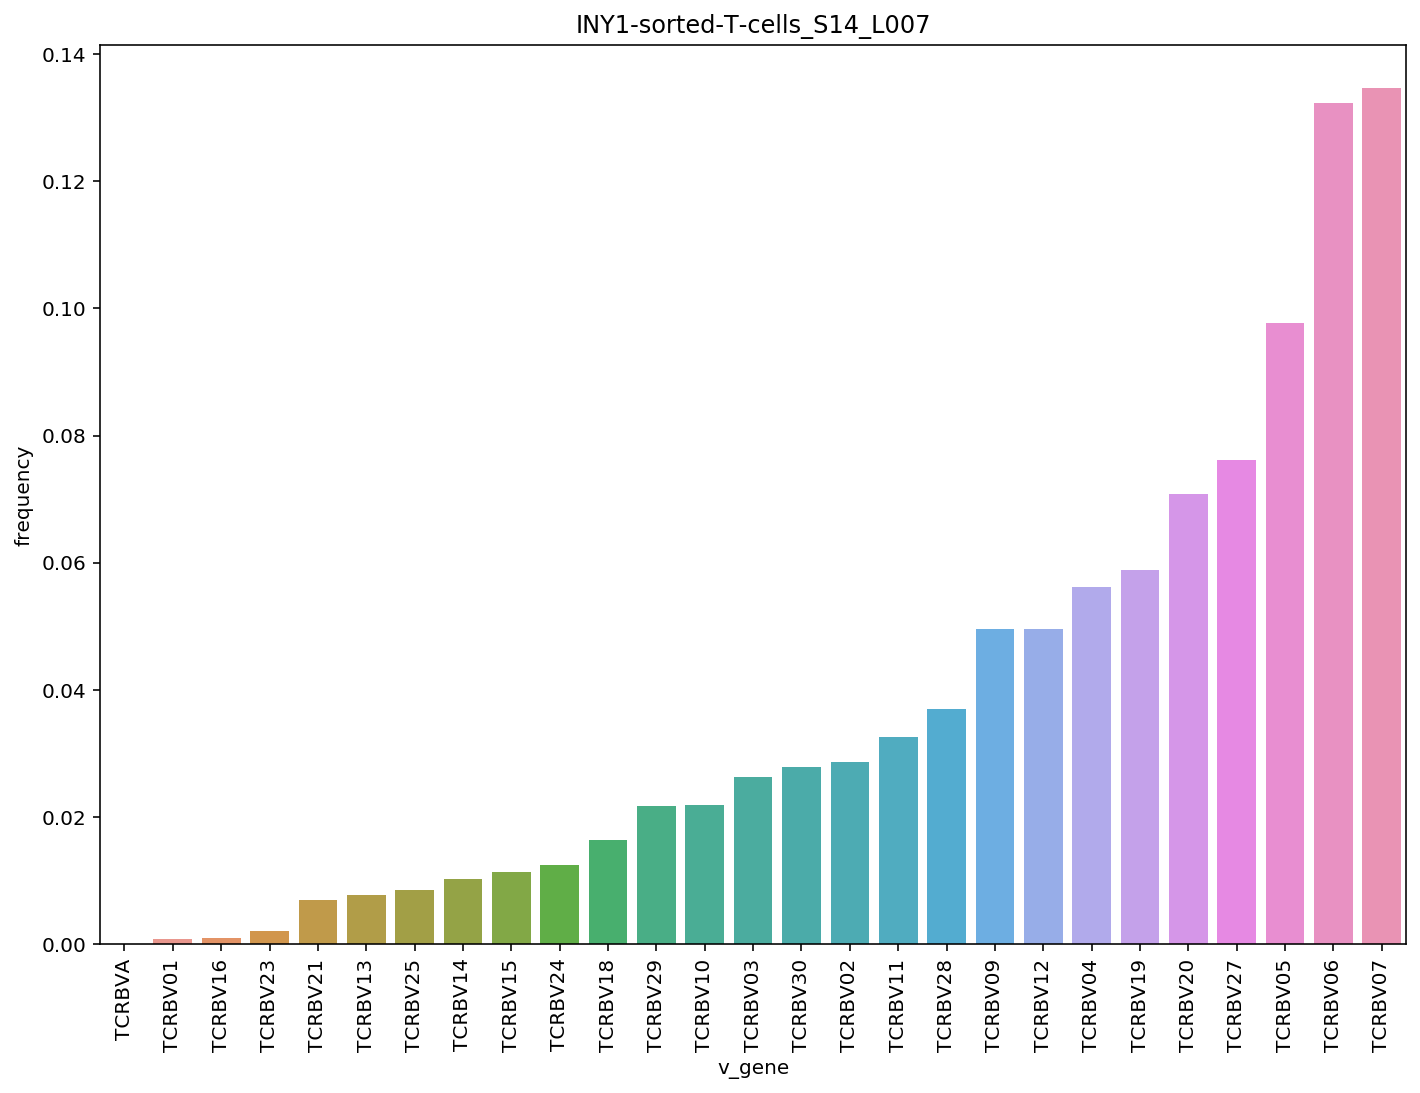

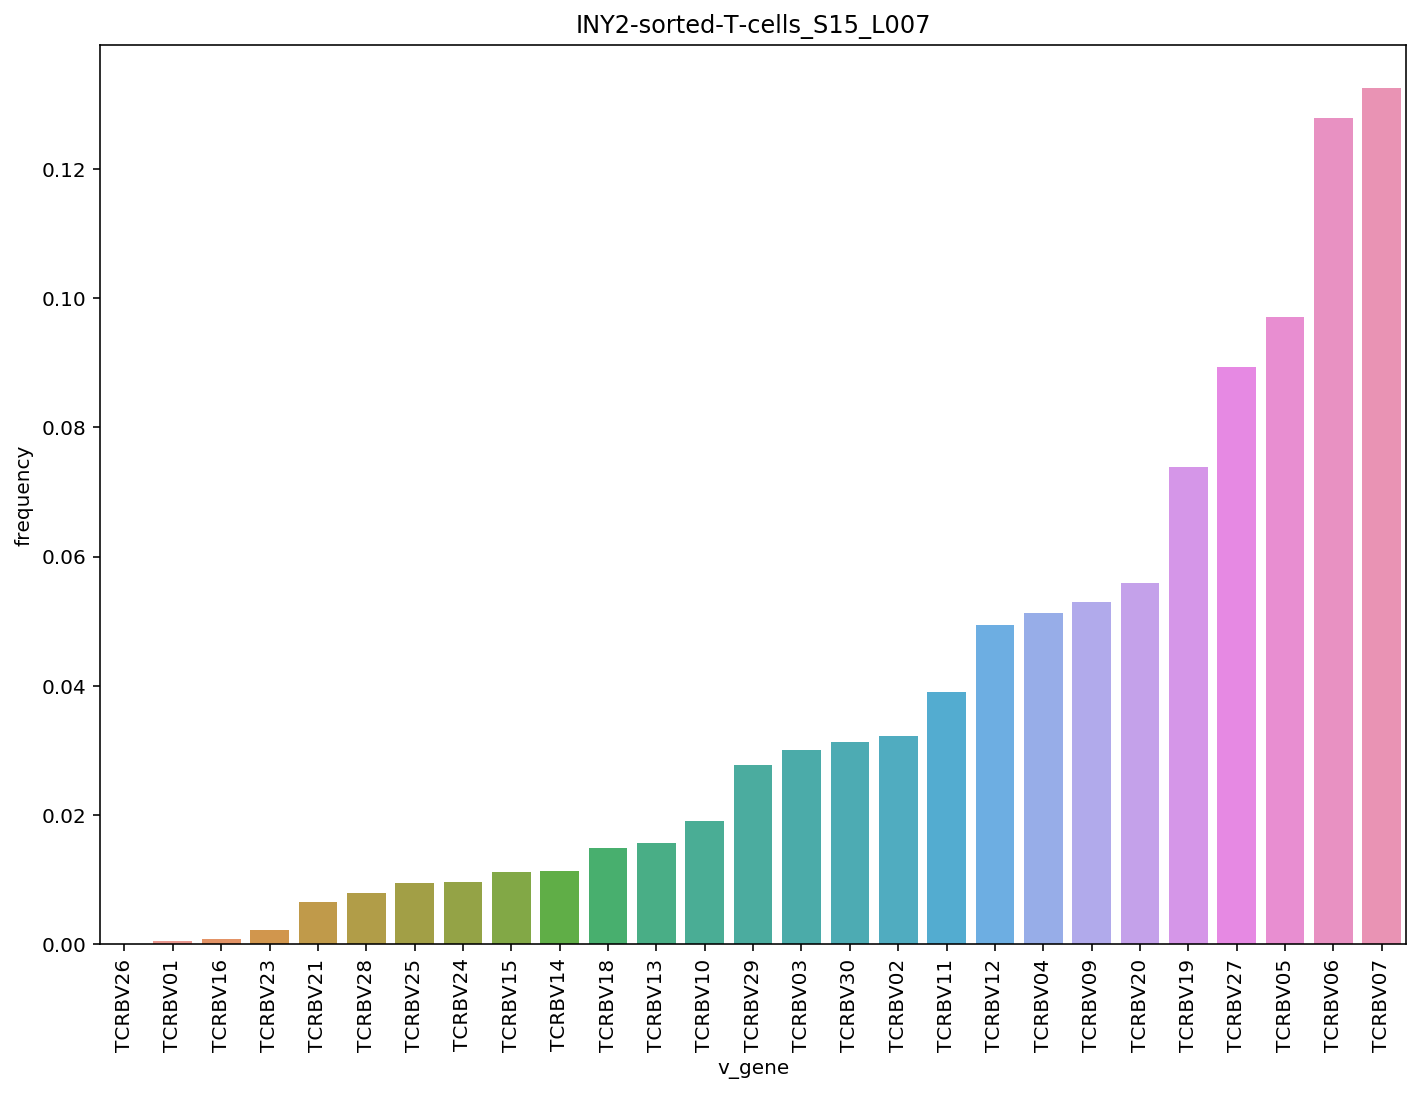

In [111]:
for sample in monoclonal_sample:
    sub_df = df[df['sample_name'] == sample]
    filtered_sub_df = sub_df[(sub_df['v_resolved'] != 'unknown')]

    v_gene_allele = pd.DataFrame(filtered_sub_df.v_resolved.str.split('-',1).tolist(),
                                 columns = ['v_gene','v_allele'])
    v_gene = v_gene_allele['v_gene']

    df_v_frequency = pd.DataFrame.from_dict(Counter(v_gene), orient='index').reset_index()
    df_v_frequency.columns = ['v_gene', 'count']
    df_v_frequency['frequency'] = df_v_frequency['count']/sum(df_v_frequency['count'])


    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.barplot(x = "v_gene", y = 'frequency', data = df_v_frequency, order = df_v_frequency.sort_values('frequency').v_gene)
    plt.xticks(rotation=90)
    plt.title(sample)

In [112]:
TCR_V_mono = df_v_frequency

### TCR V-gene usage in polyclonal samples

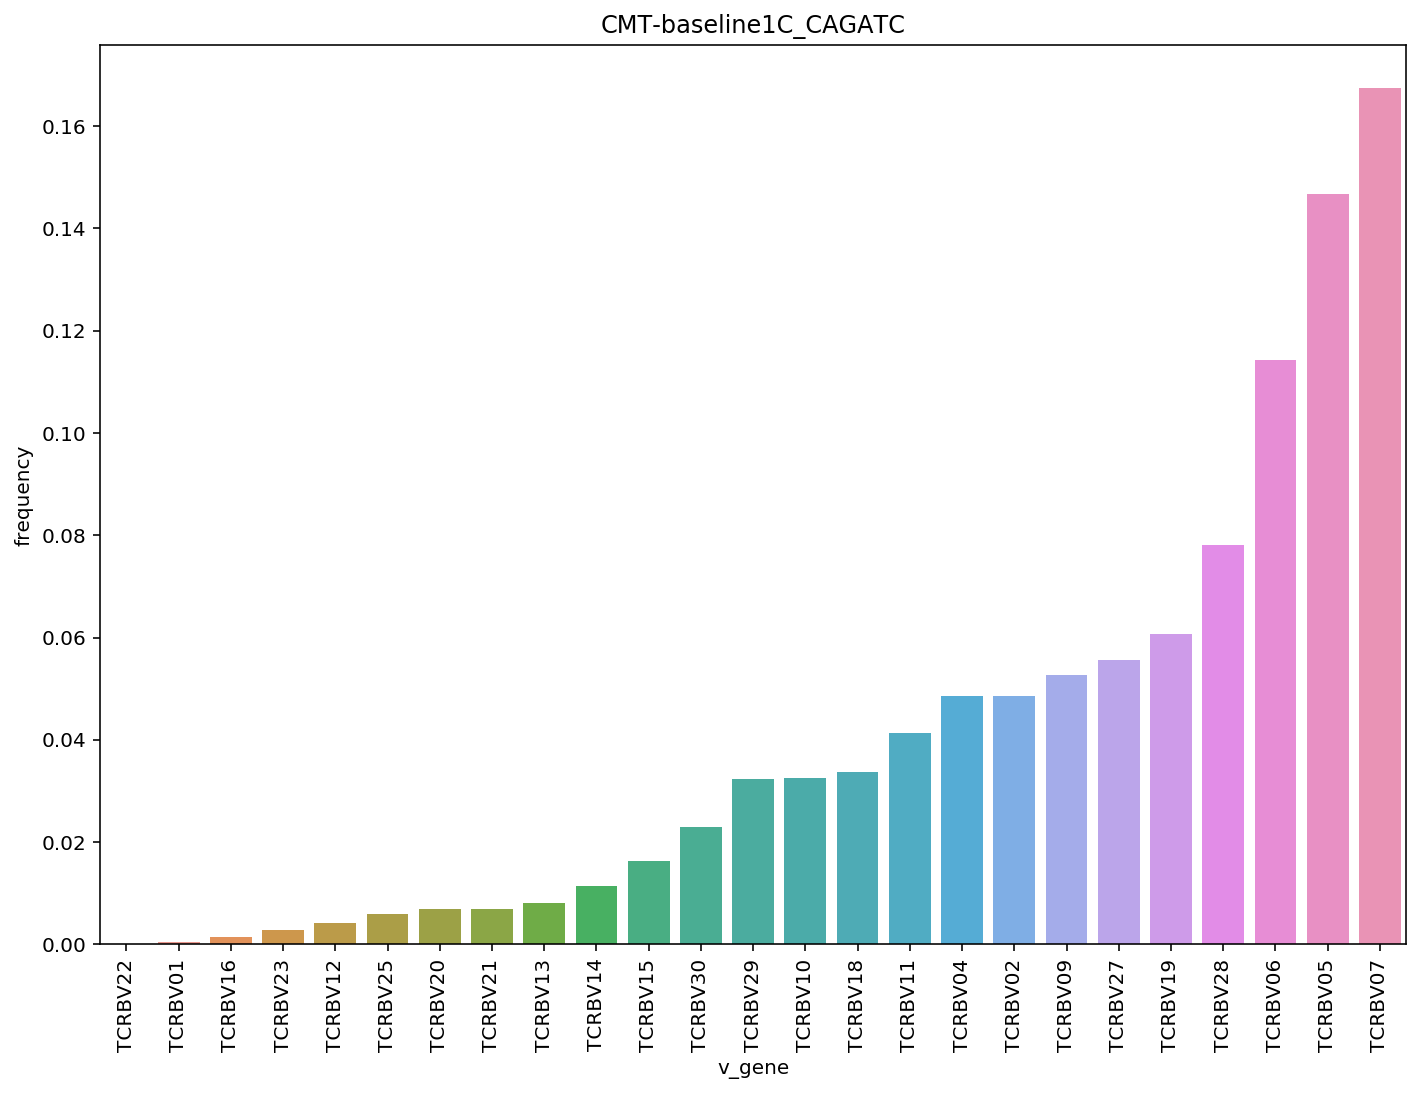

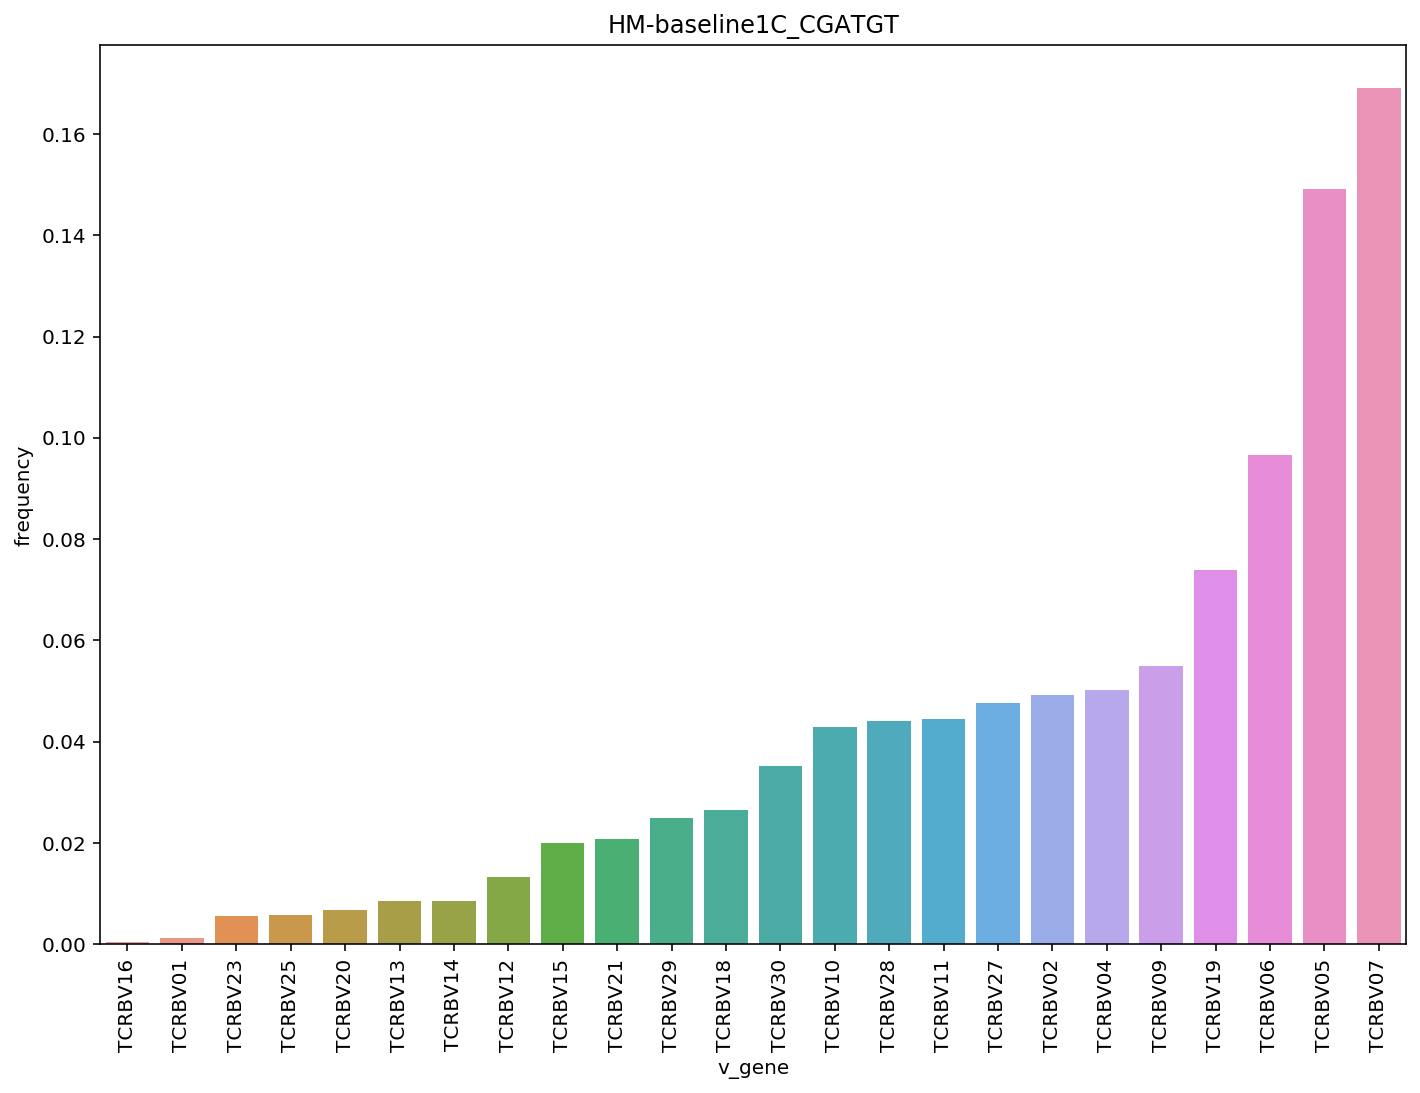

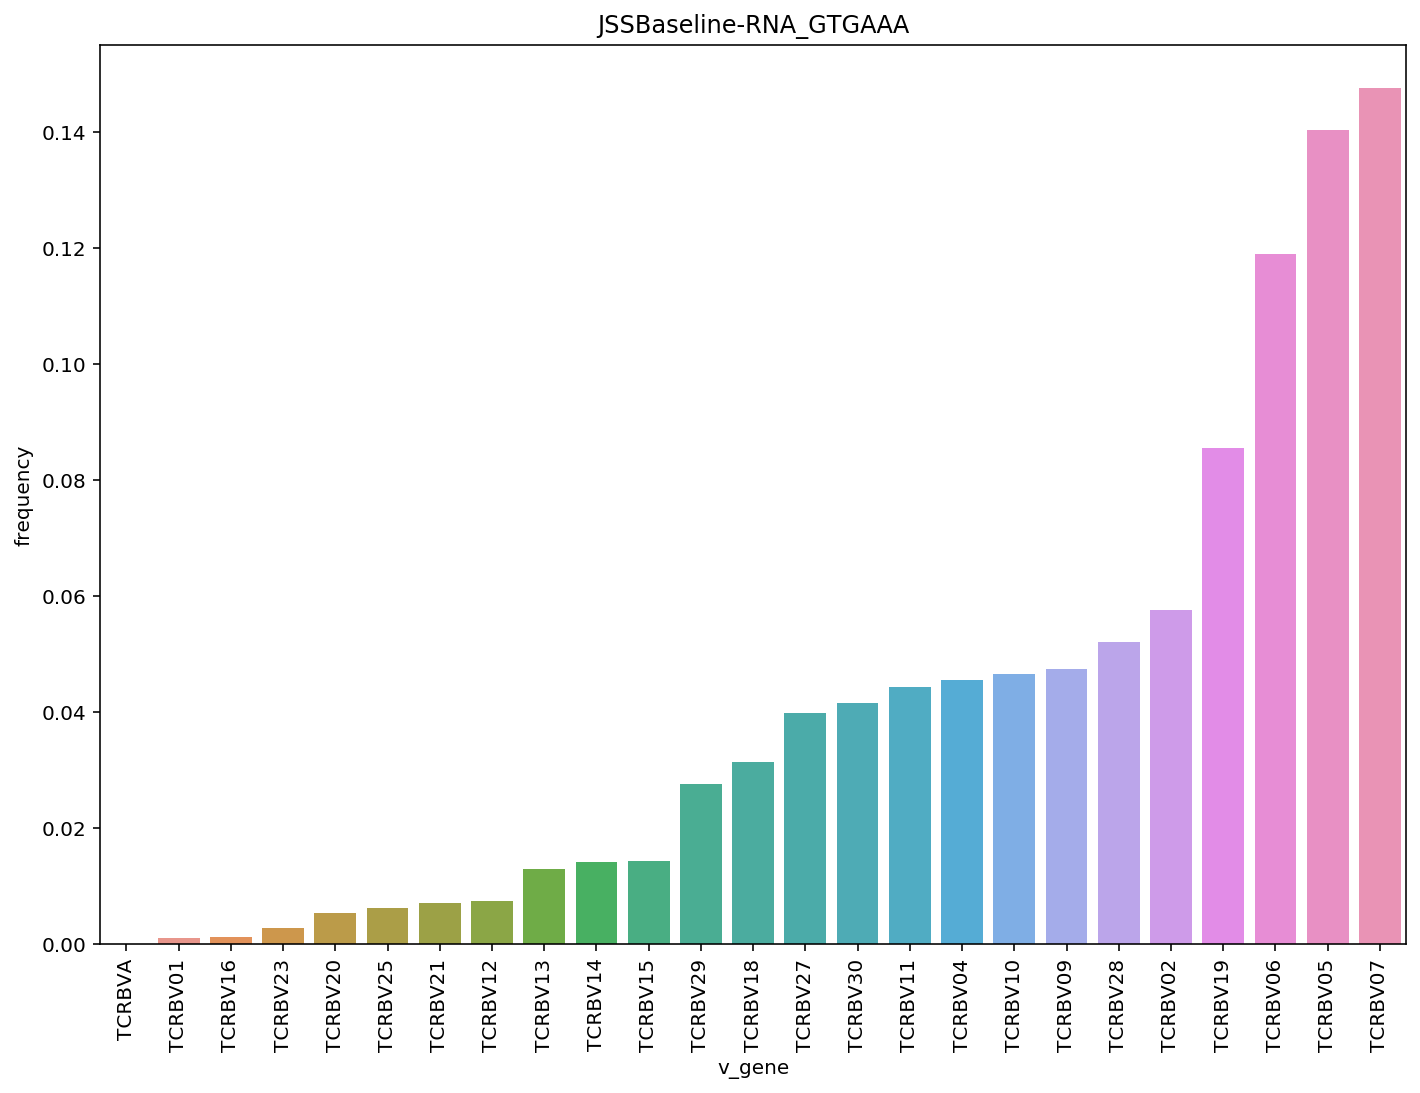

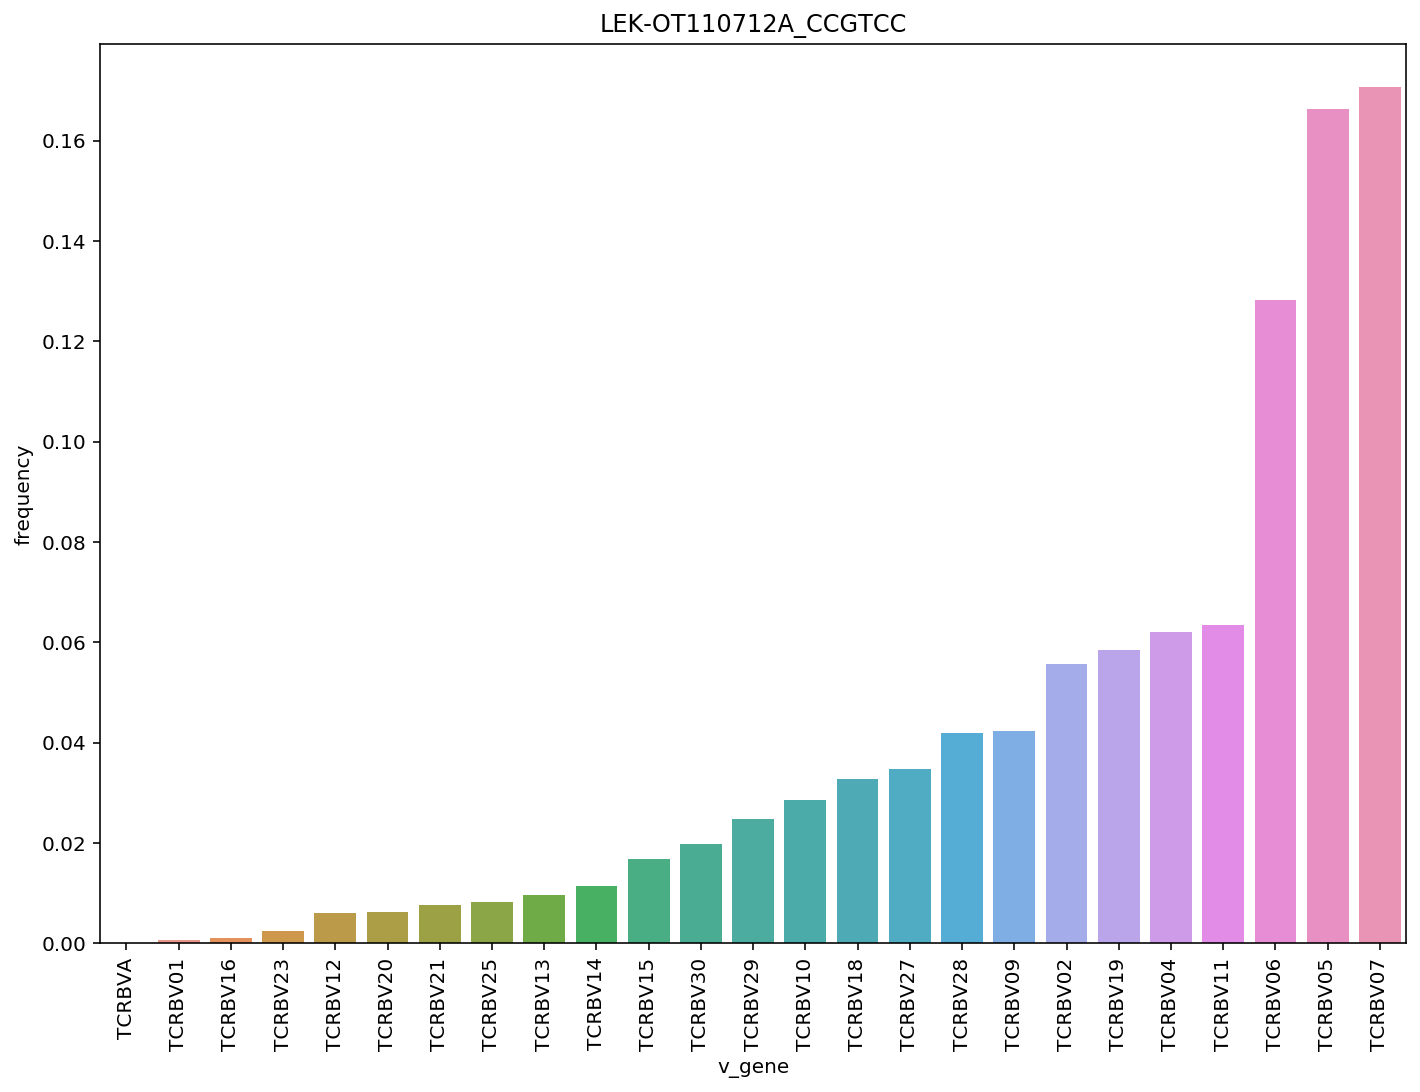

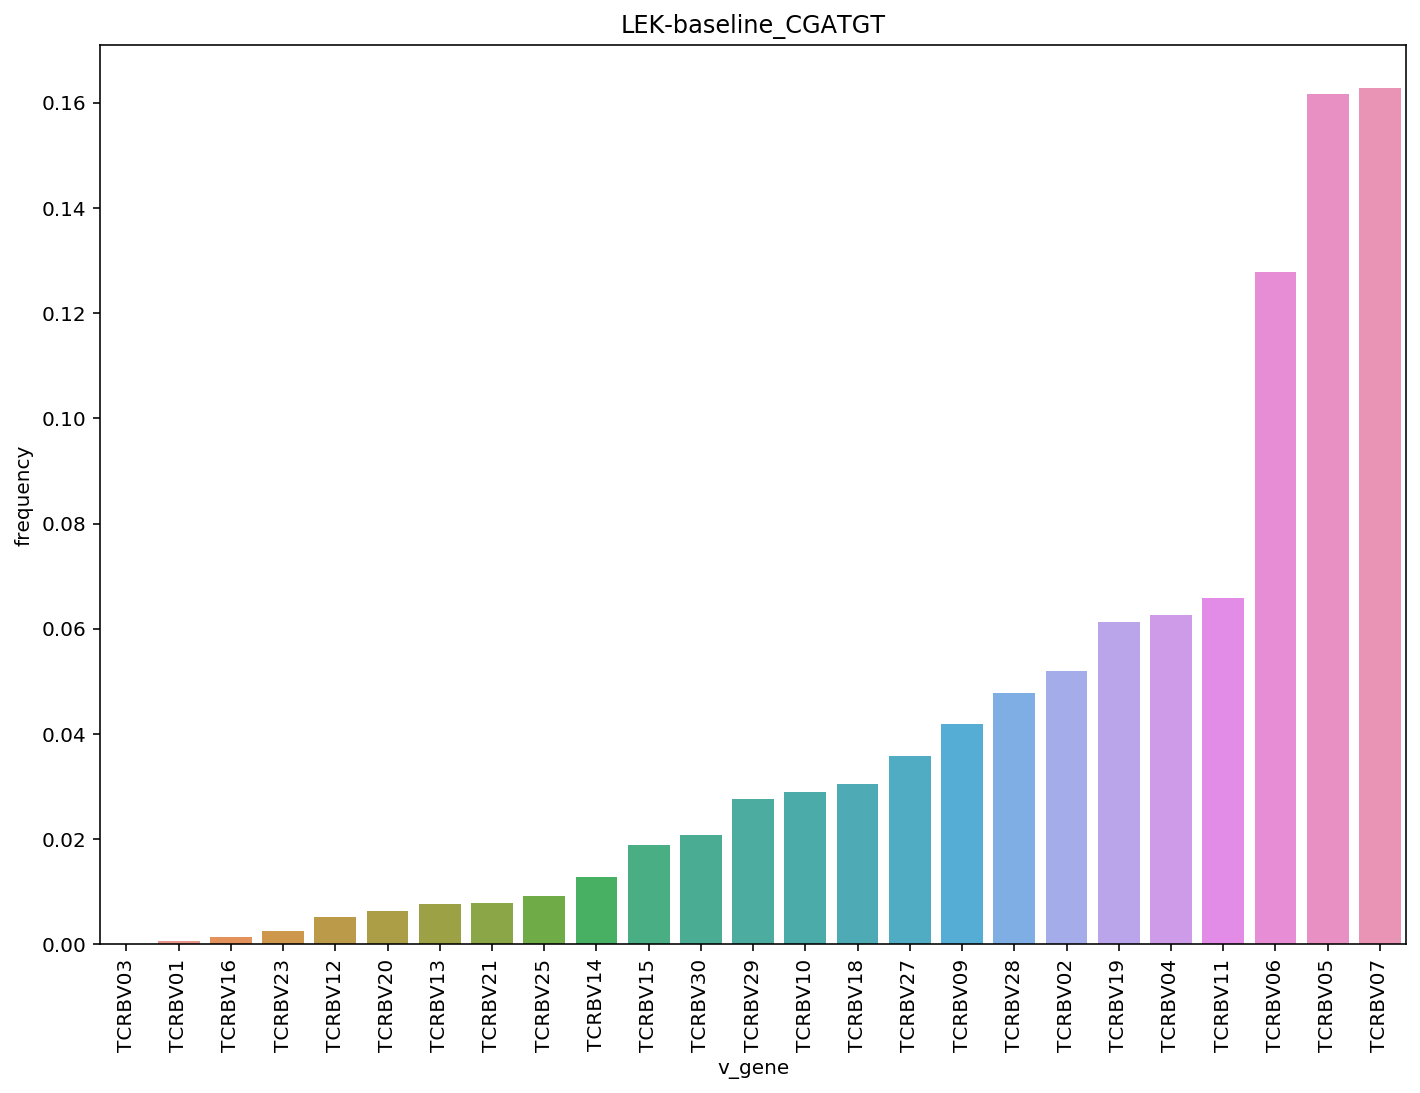

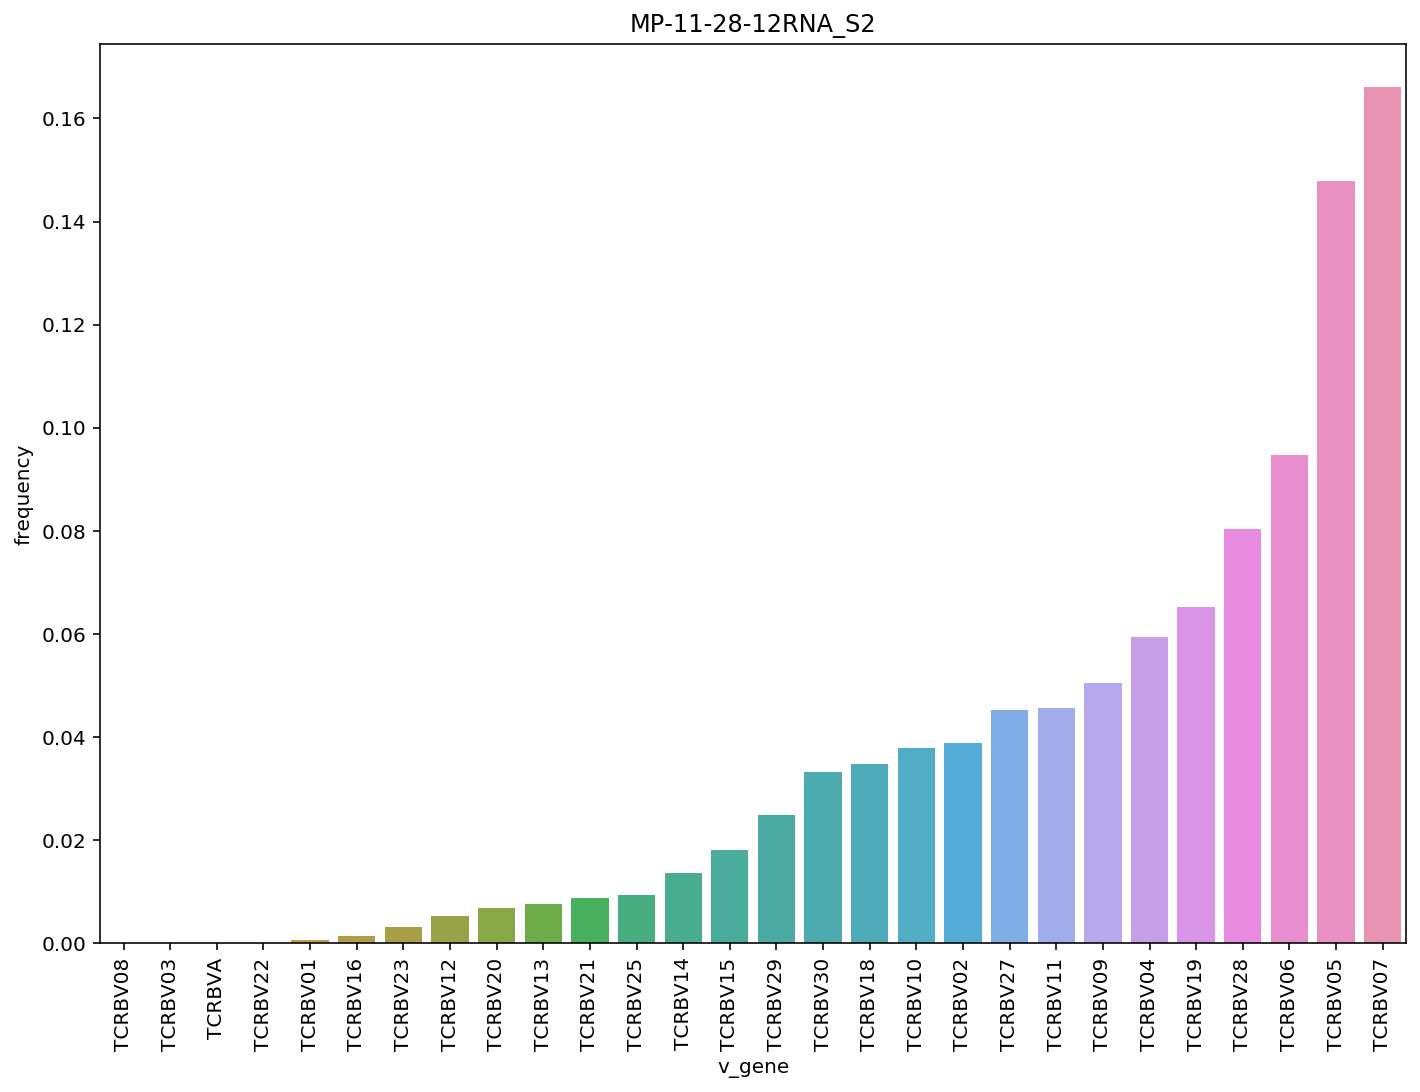

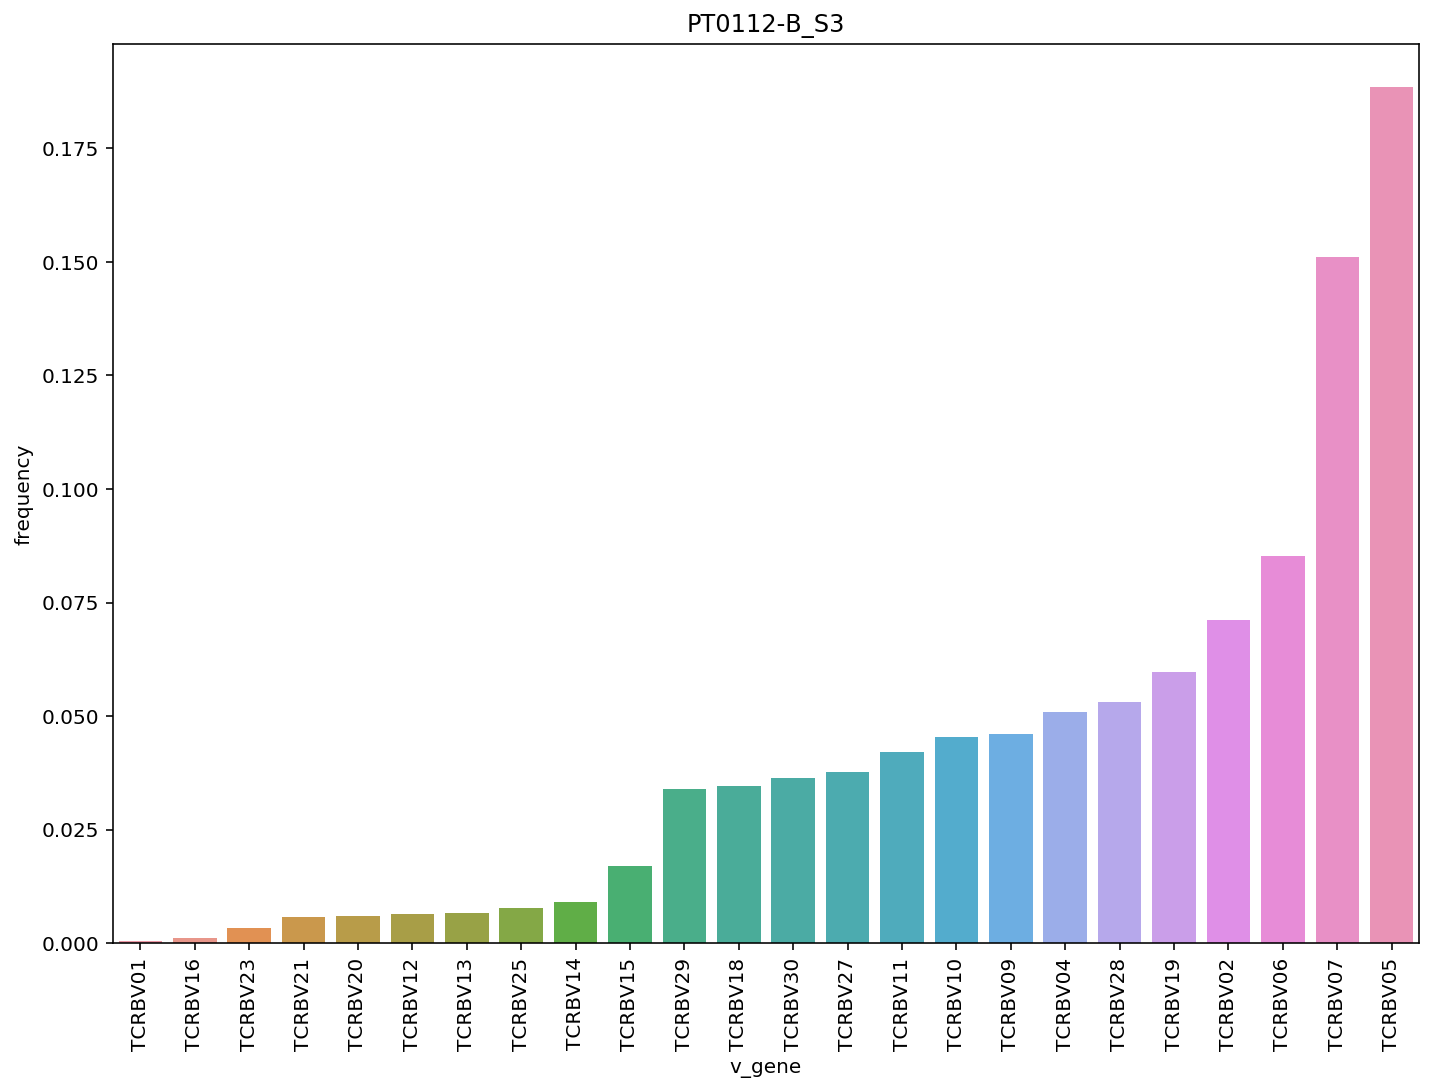

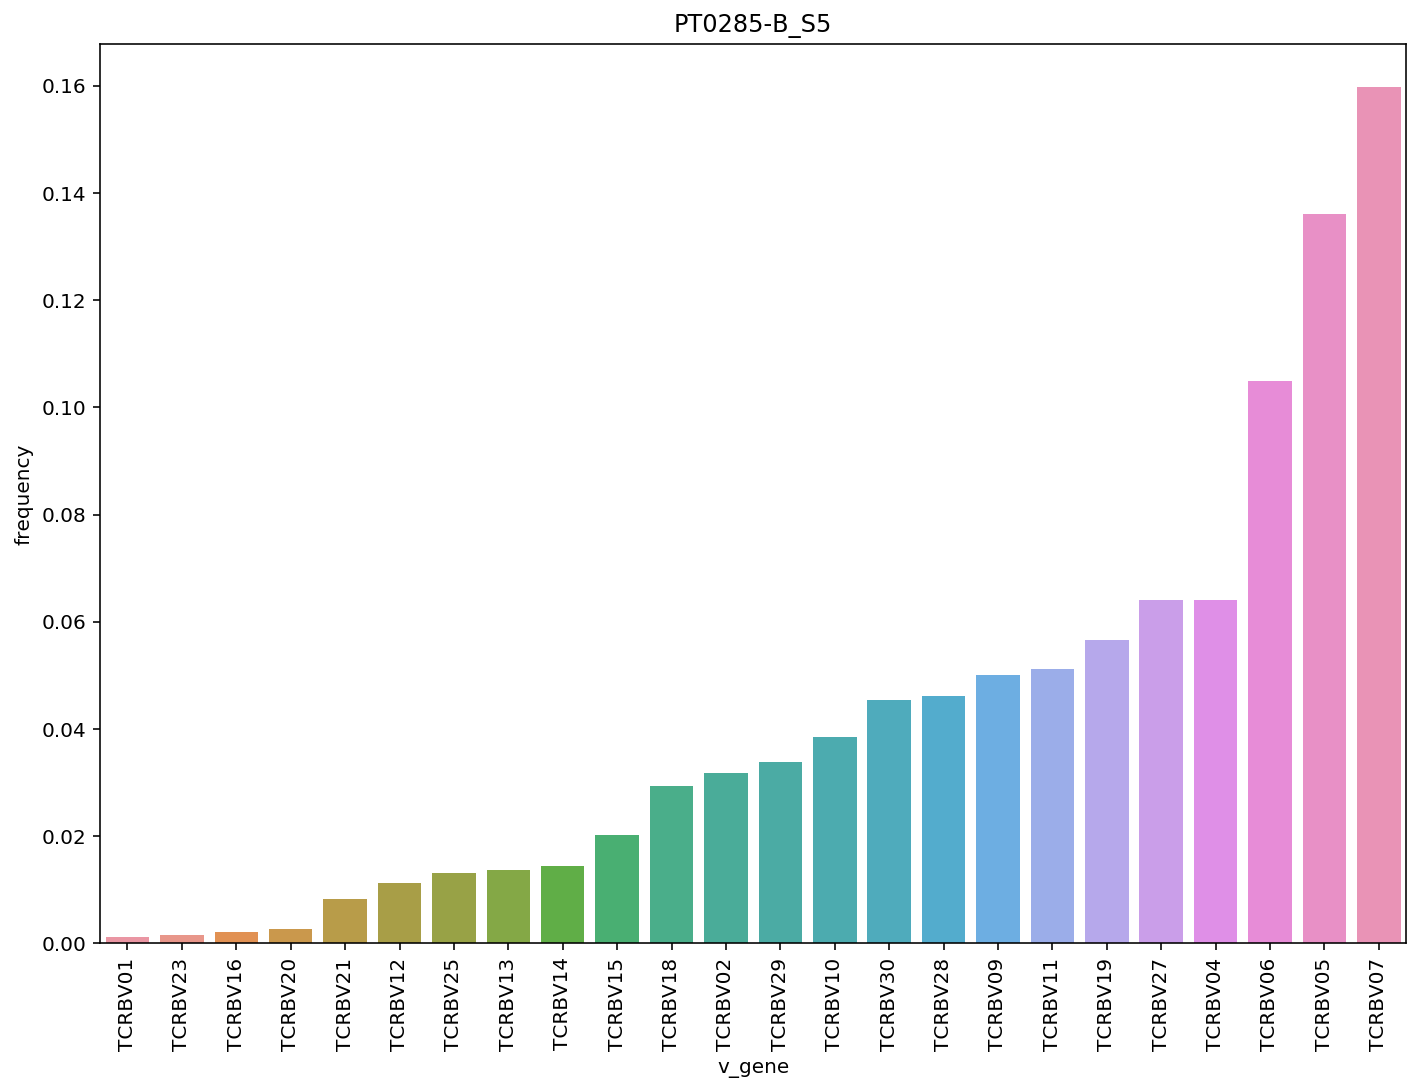

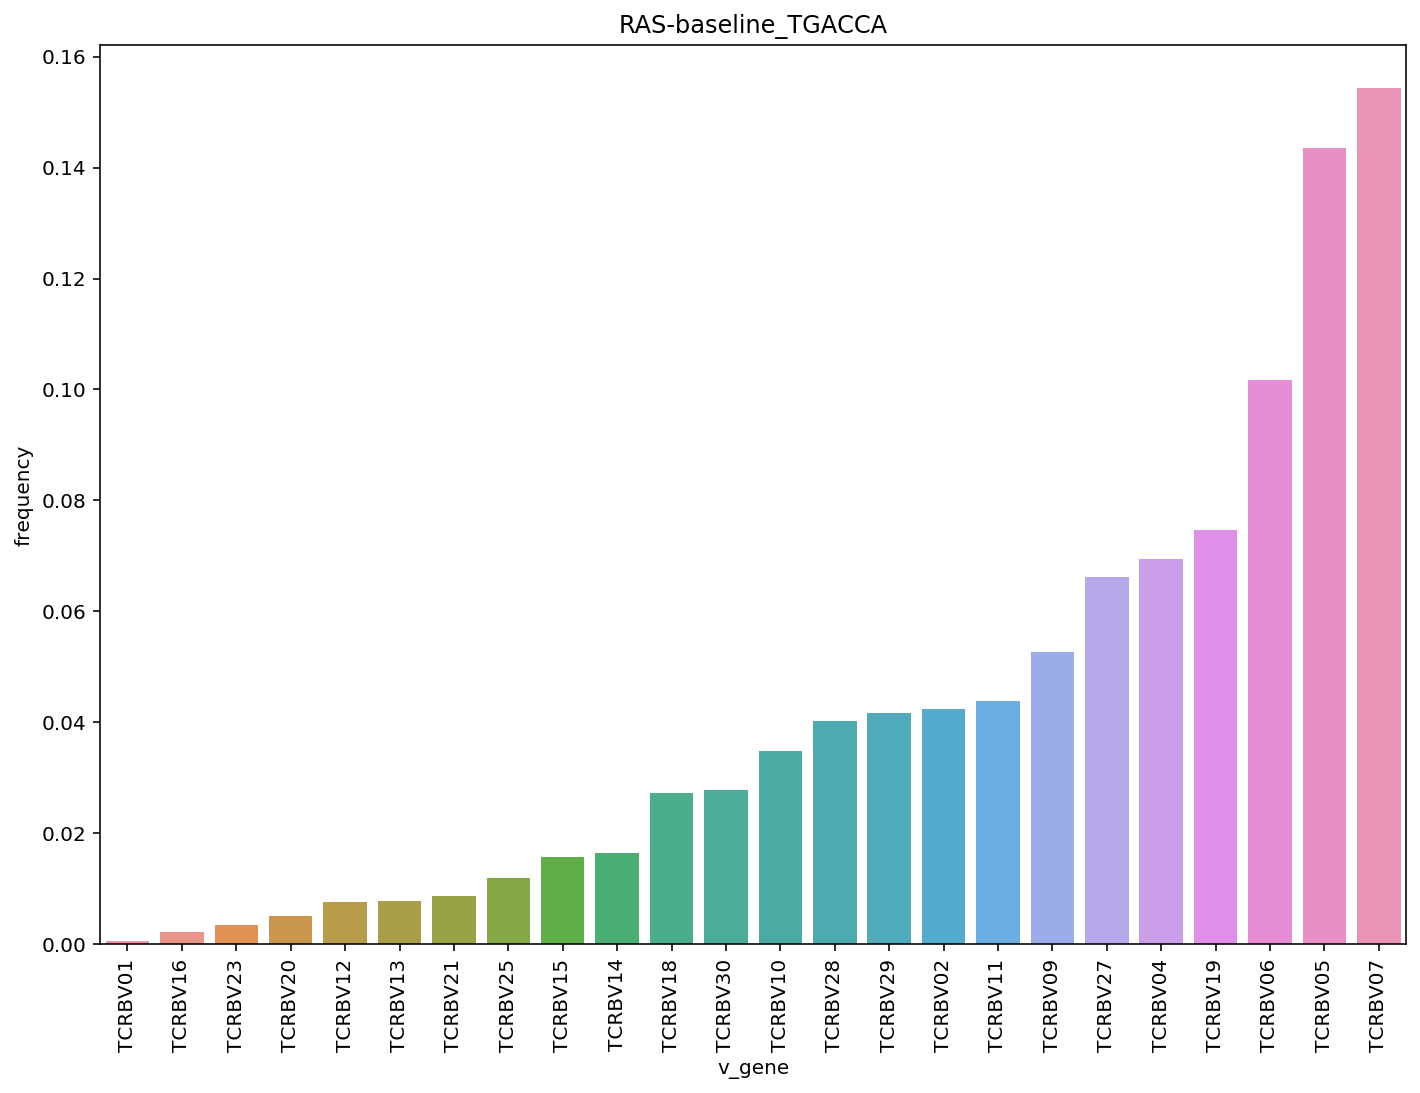

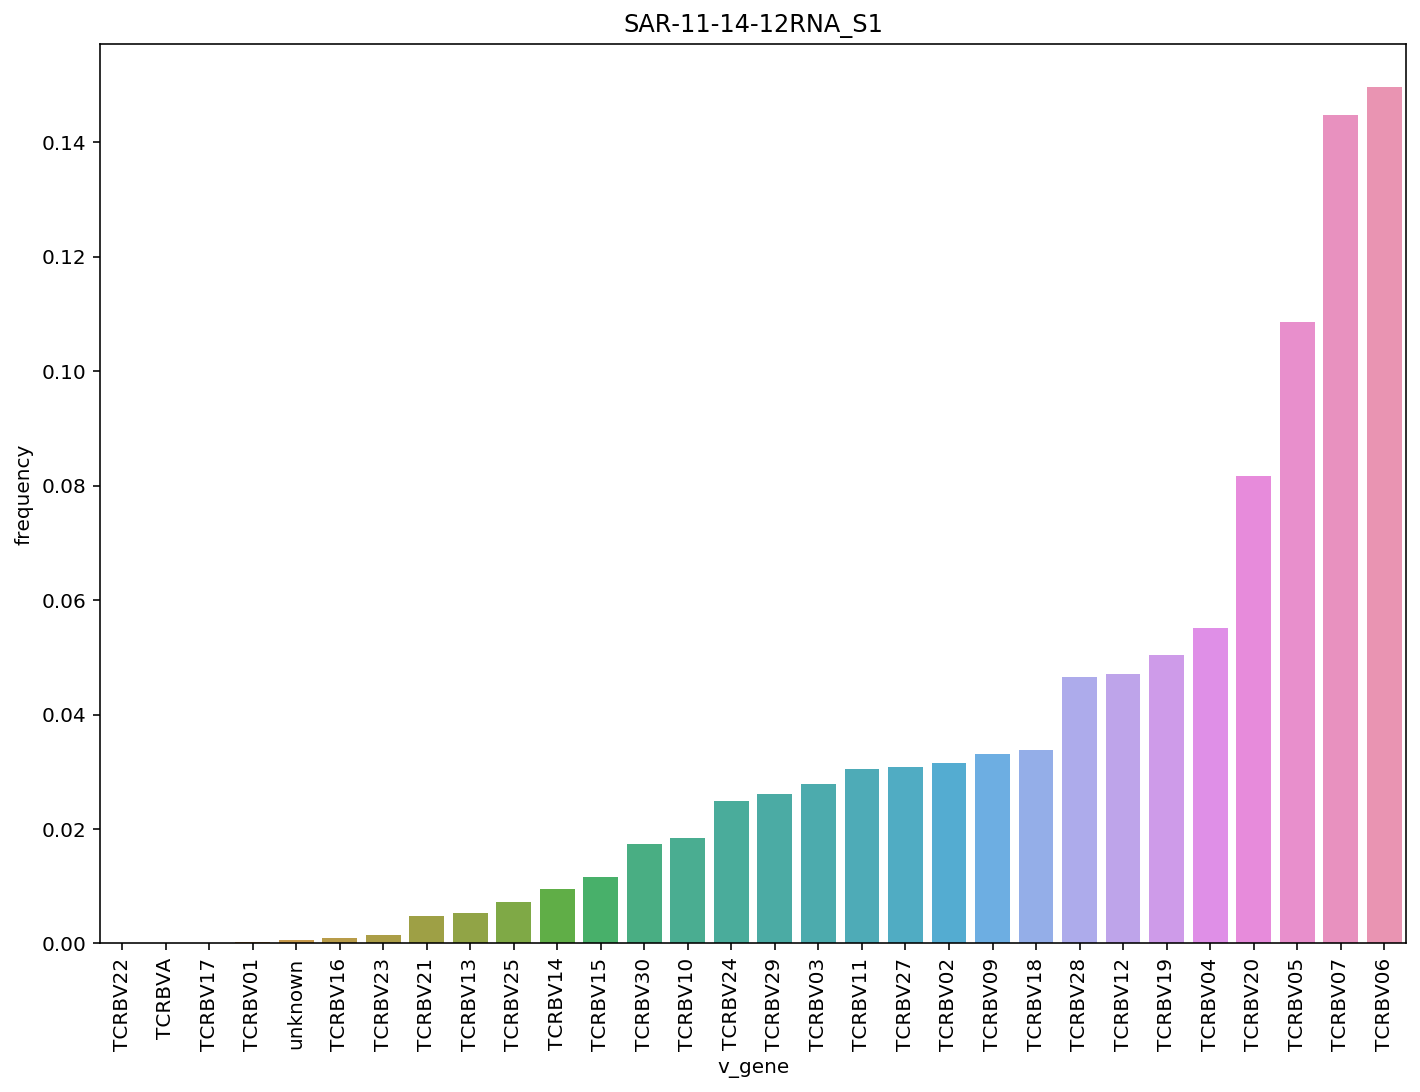

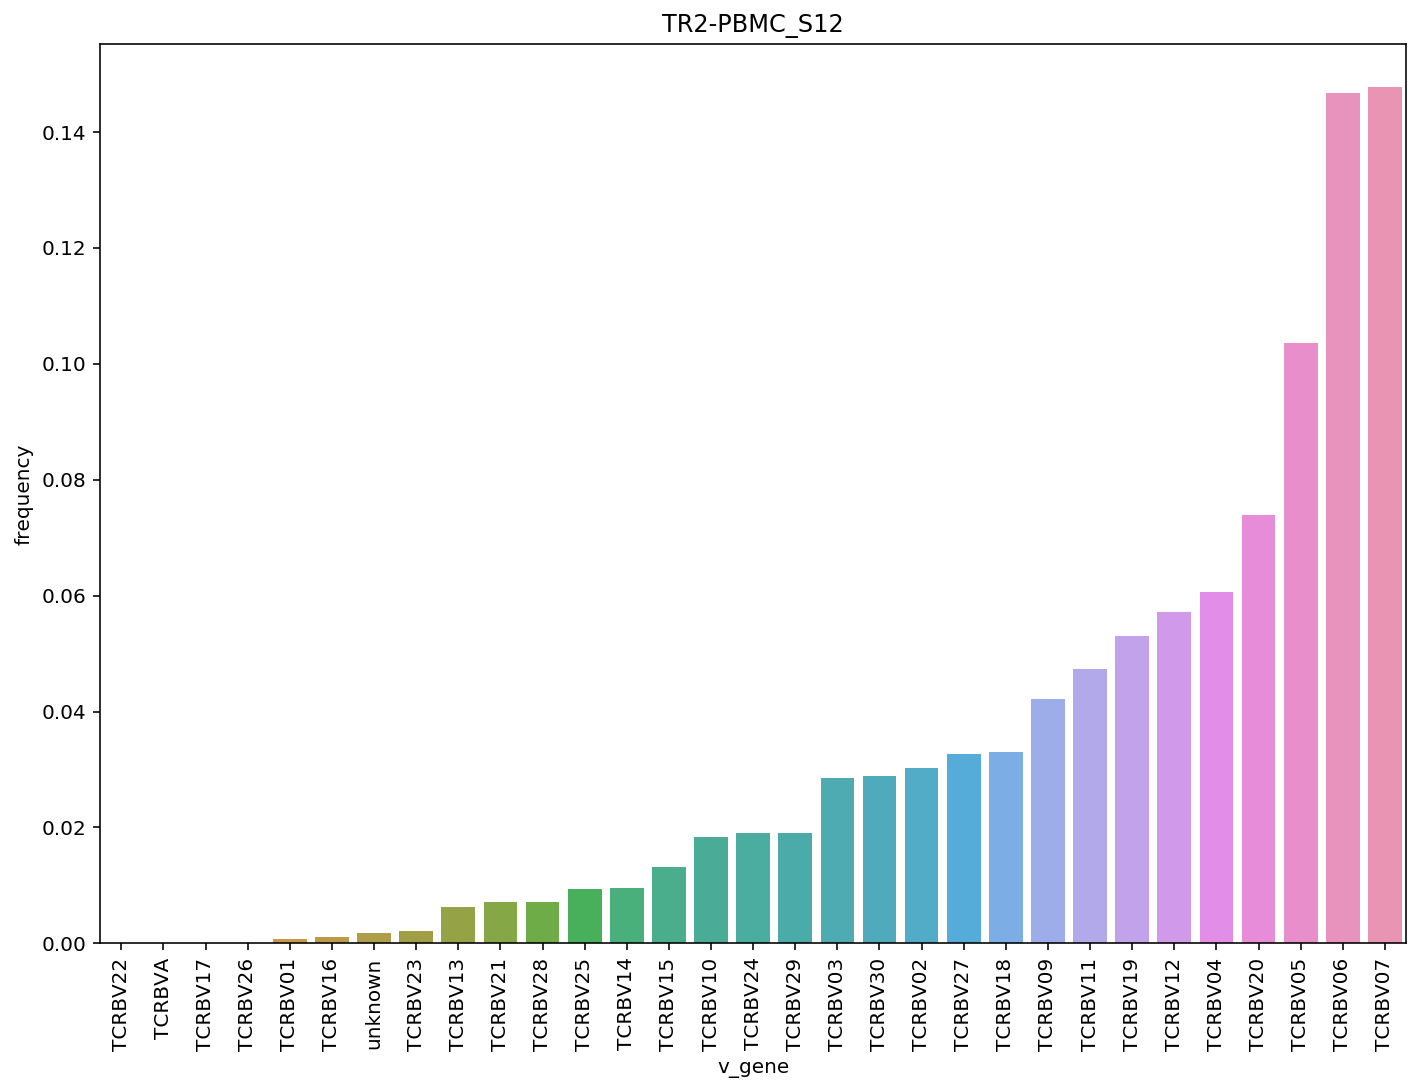

In [67]:
for sample in polyclonal_sample:
    sub_df = df[df['sample_name'] == sample]
    filtered_sub_df = sub_df[sub_df['v_resolved'] != 'unresolved']

    v_gene_allele = pd.DataFrame(filtered_sub_df.v_resolved.str.split('-',1).tolist(),
                                 columns = ['v_gene','v_allele'])
    v_gene = v_gene_allele['v_gene']

    df_v_frequency = pd.DataFrame.from_dict(Counter(v_gene), orient='index').reset_index()
    df_v_frequency.columns = ['v_gene', 'count']
    df_v_frequency['frequency'] = df_v_frequency['count']/sum(df_v_frequency['count'])


    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.barplot(x = "v_gene", y = 'frequency', data = df_v_frequency, order = df_v_frequency.sort_values('frequency').v_gene)
    plt.xticks(rotation=90)
    plt.title(sample)

### TCR J-gene usage in monoclonal samples

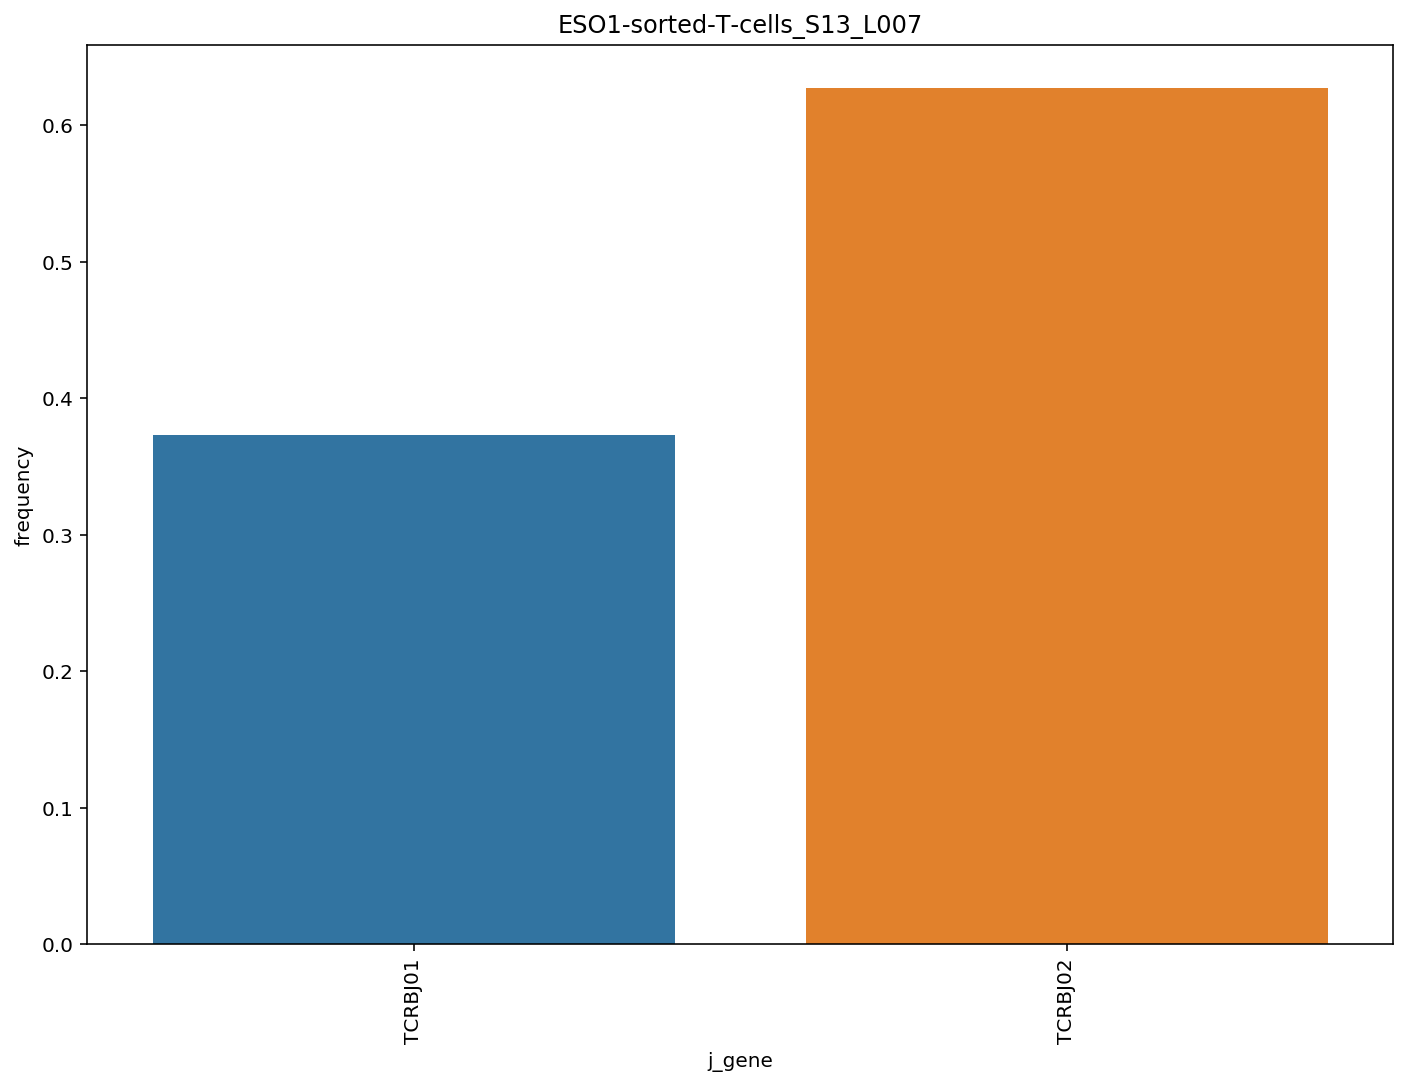

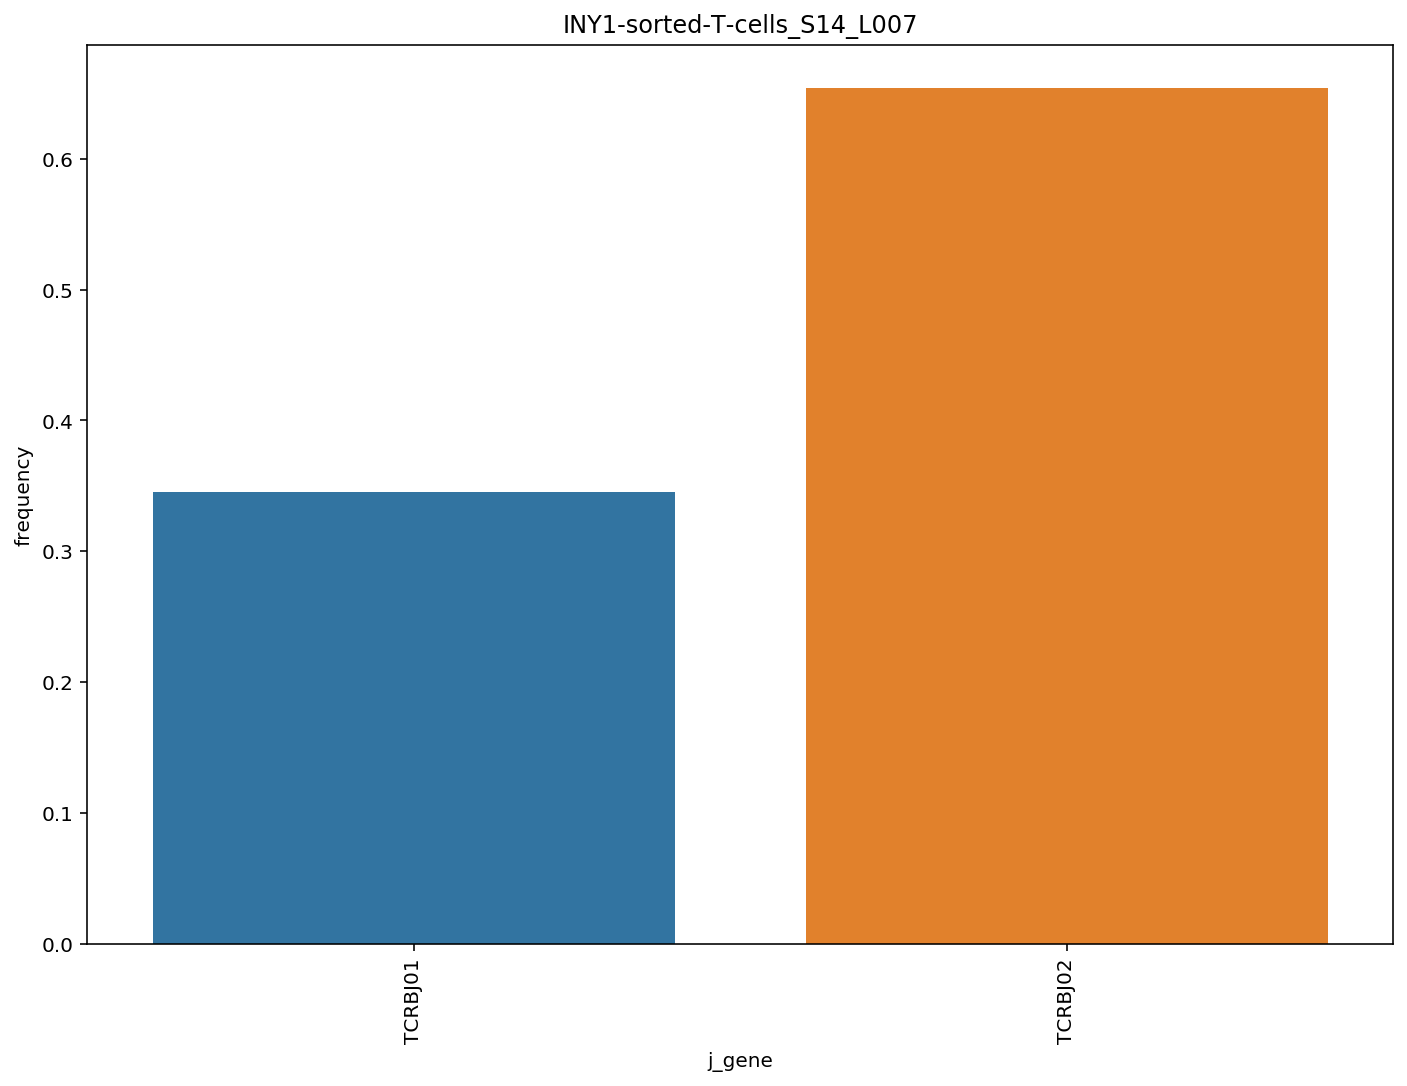

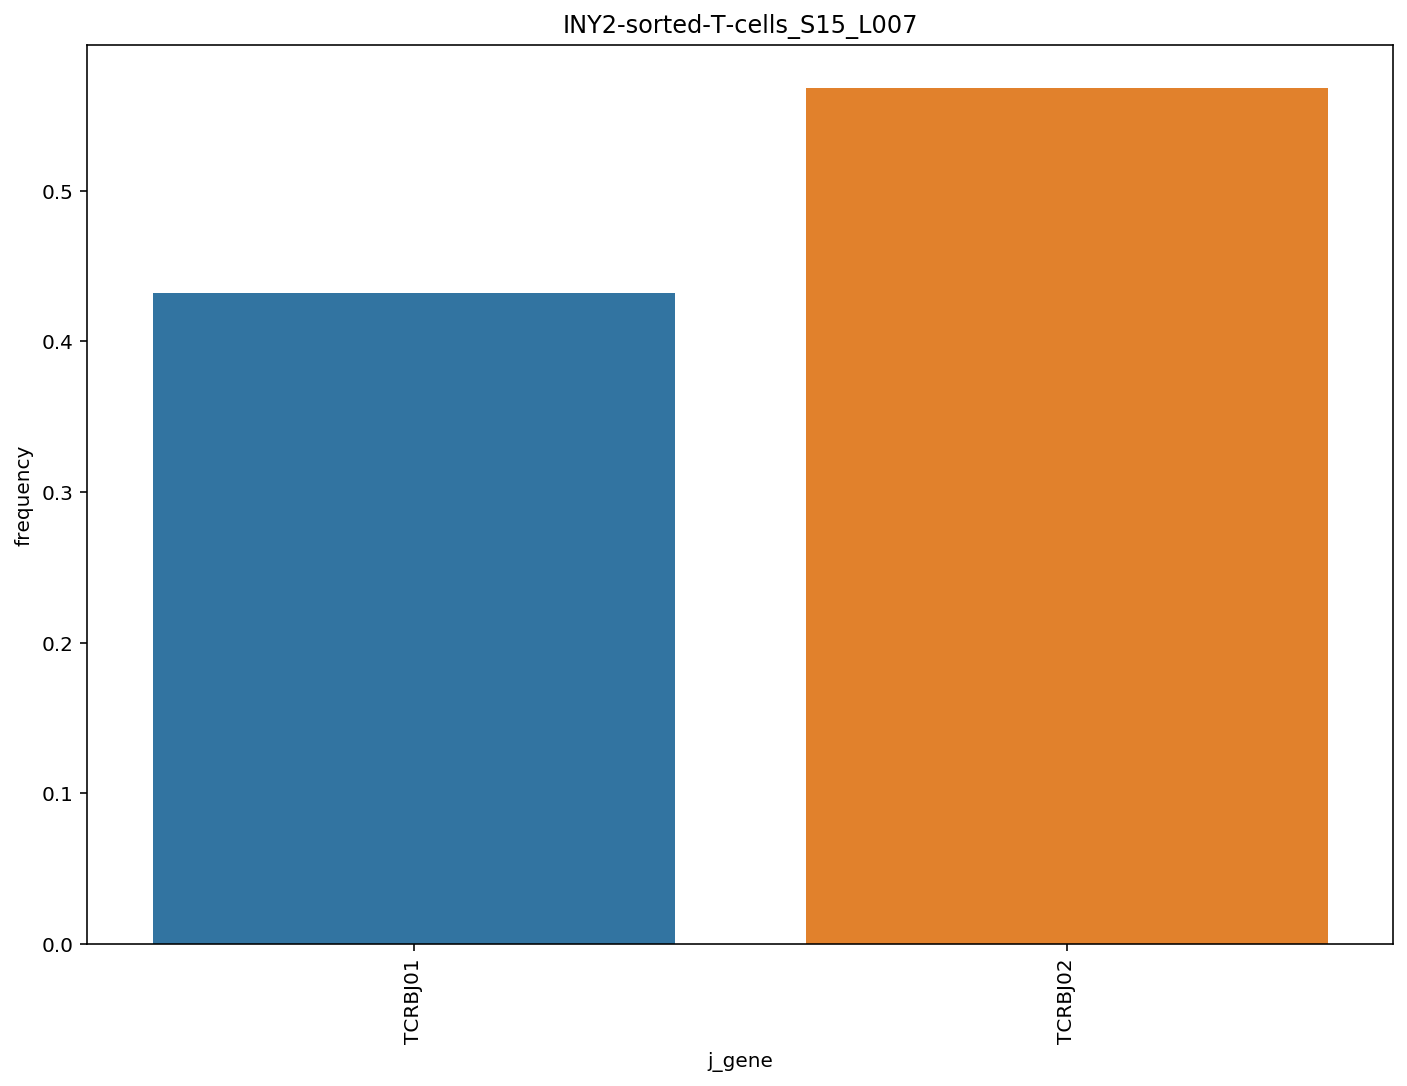

In [68]:
for sample in monoclonal_sample:
    sub_df = df[df['sample_name'] == sample]
    filtered_sub_df = sub_df[(sub_df['j_resolved'] != 'unknown')]

    j_gene_allele = pd.DataFrame(filtered_sub_df.j_resolved.str.split('-',1).tolist(),
                                 columns = ['j_gene','j_allele'])
    j_gene = j_gene_allele['j_gene']


    df_j_frequency = pd.DataFrame.from_dict(Counter(j_gene), orient='index').reset_index()
    df_j_frequency.columns = ['j_gene', 'count']
    df_j_frequency['frequency'] = df_j_frequency['count']/sum(df_j_frequency['count'])


    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.barplot(x = "j_gene", y = 'frequency', data = df_j_frequency, order = df_j_frequency.sort_values('frequency').j_gene)
    plt.xticks(rotation=90)
    plt.title(sample)

### TCR J-gene usage in polyclonal samples

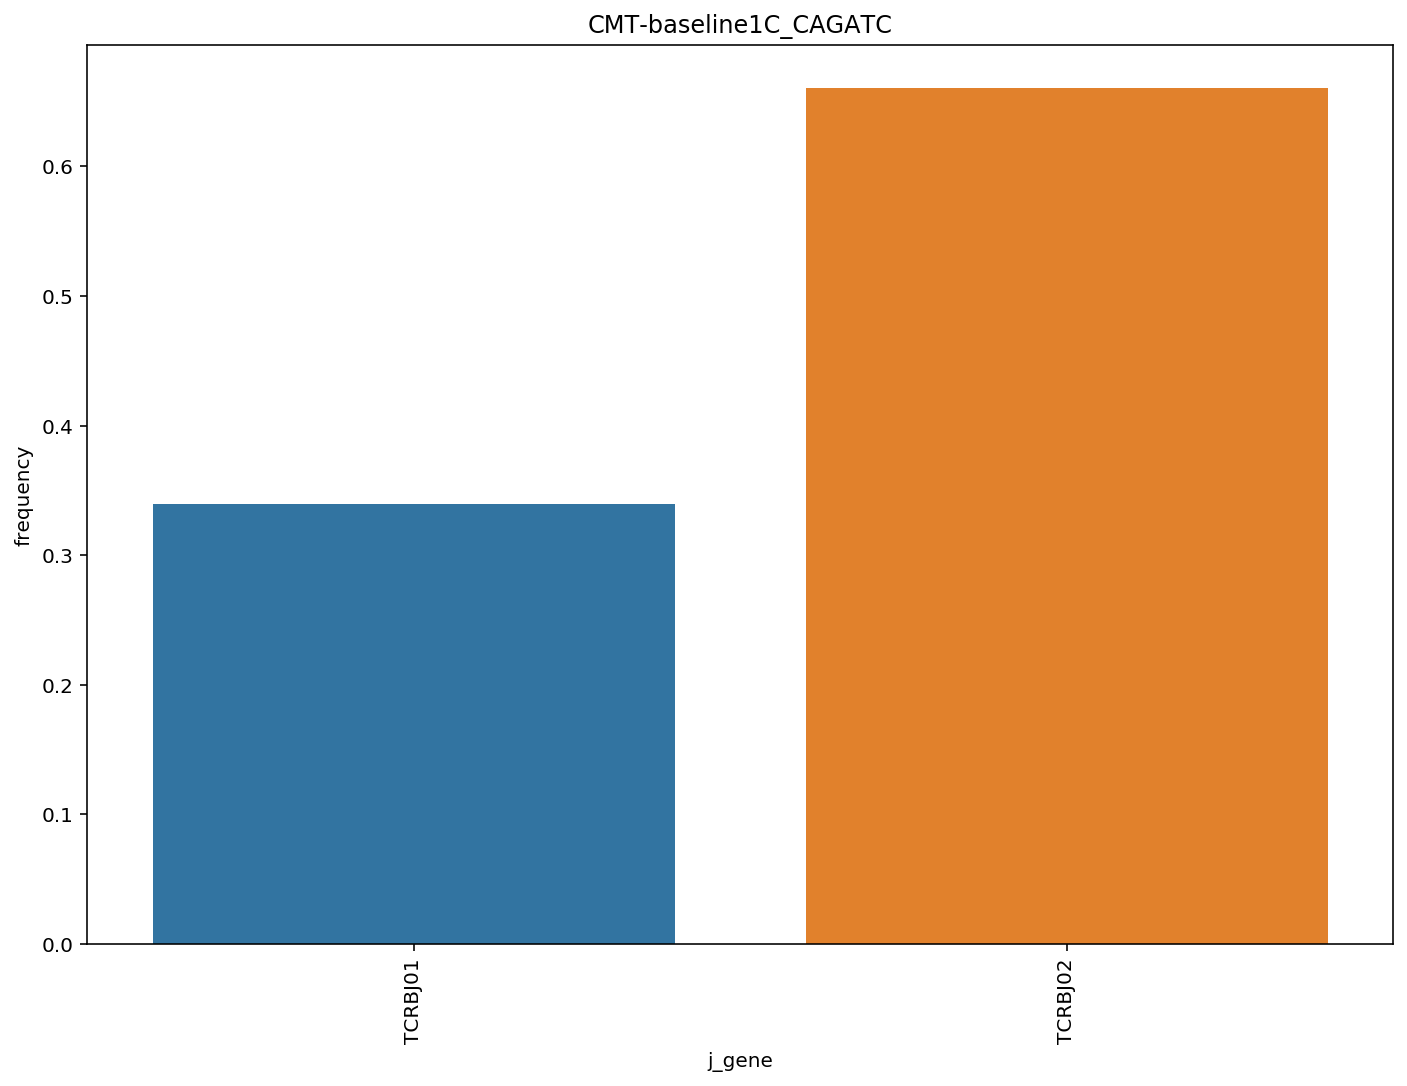

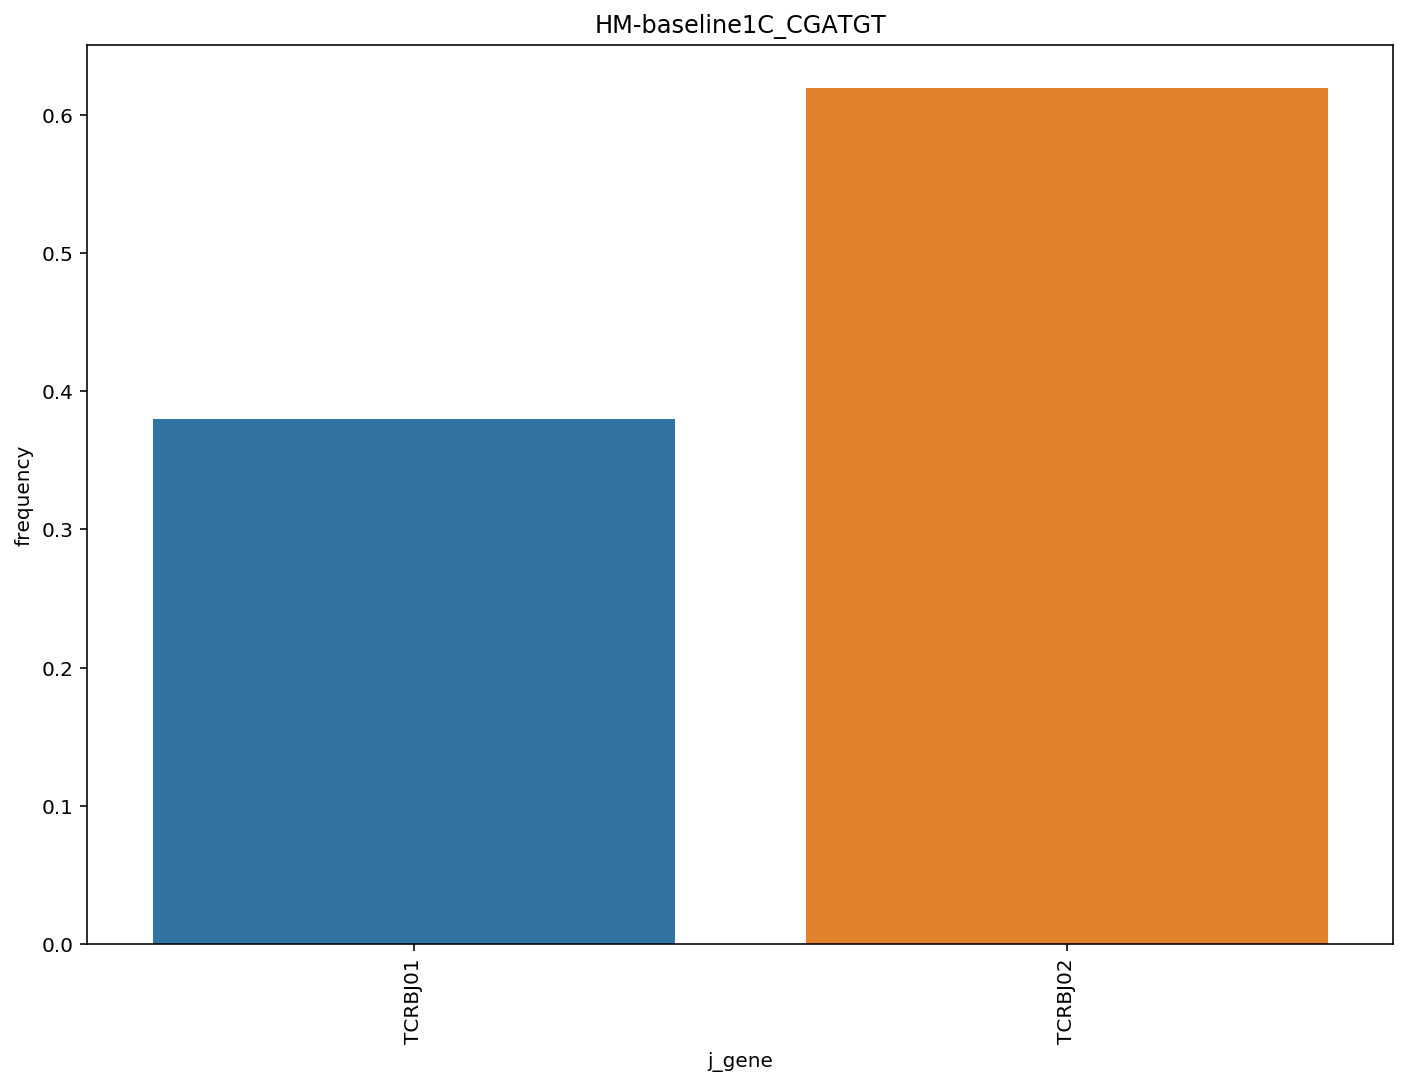

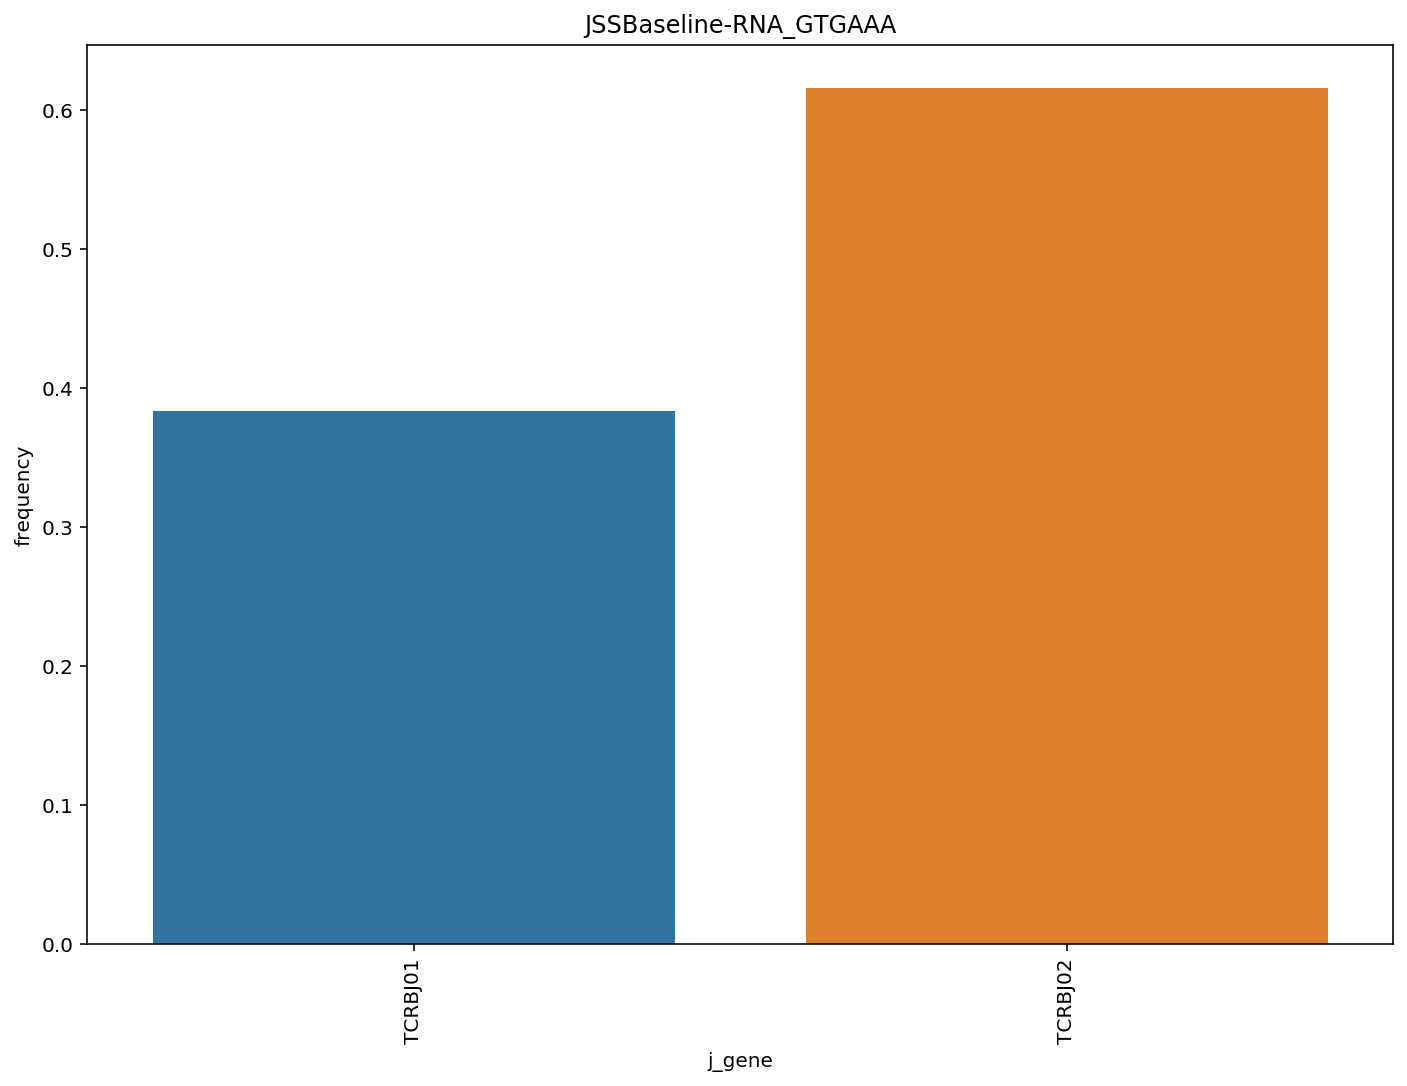

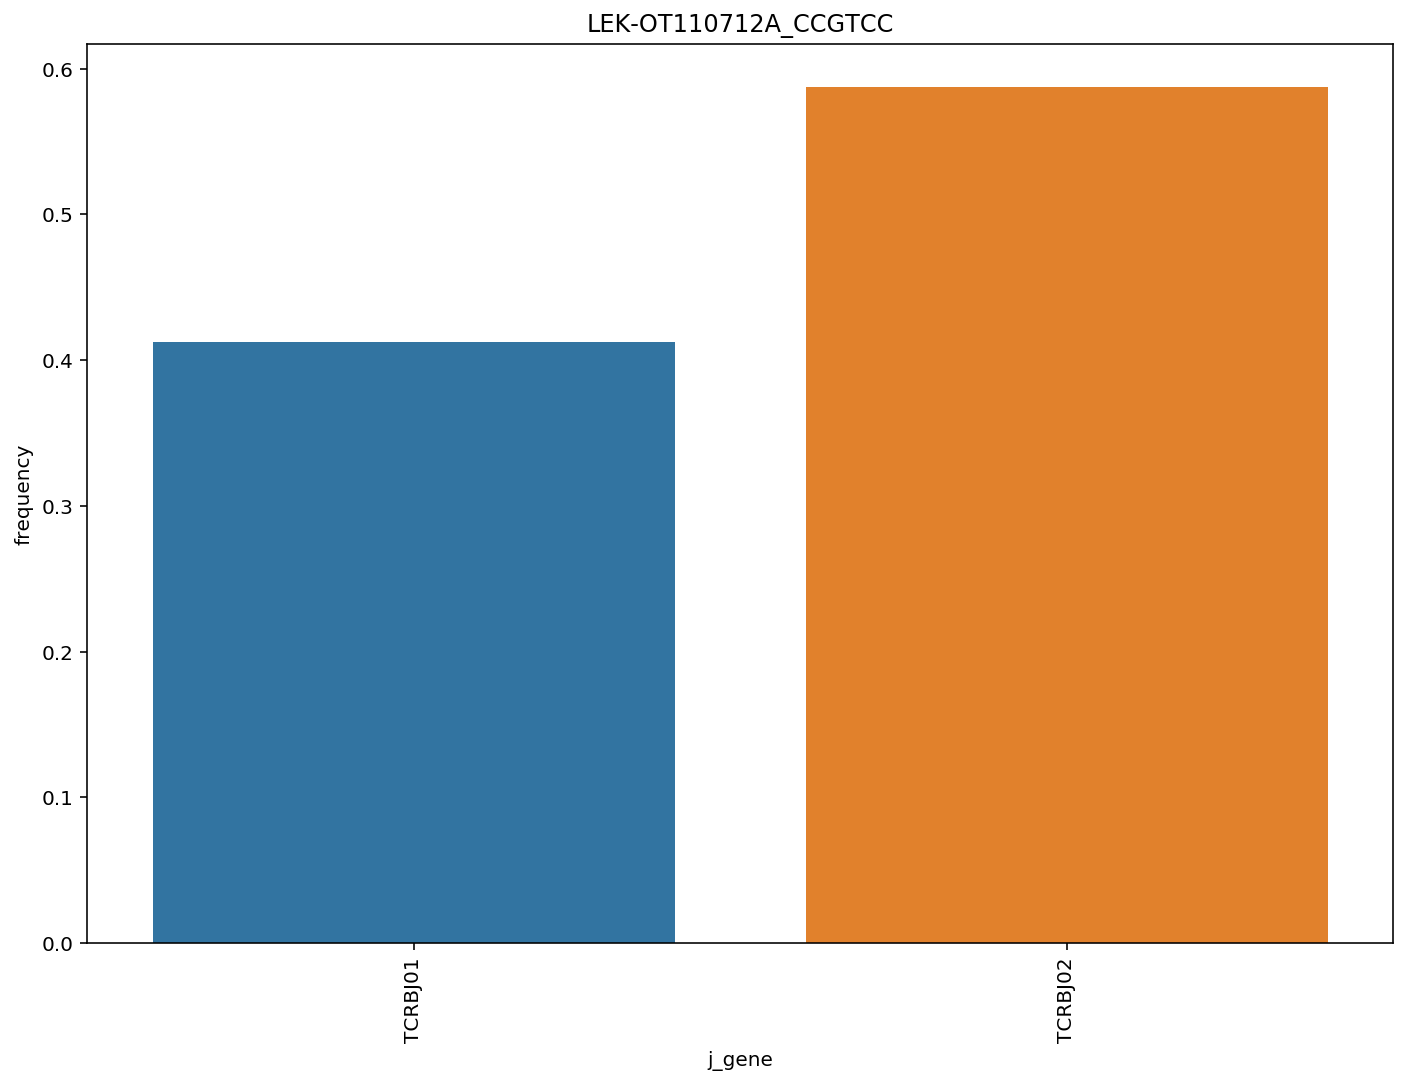

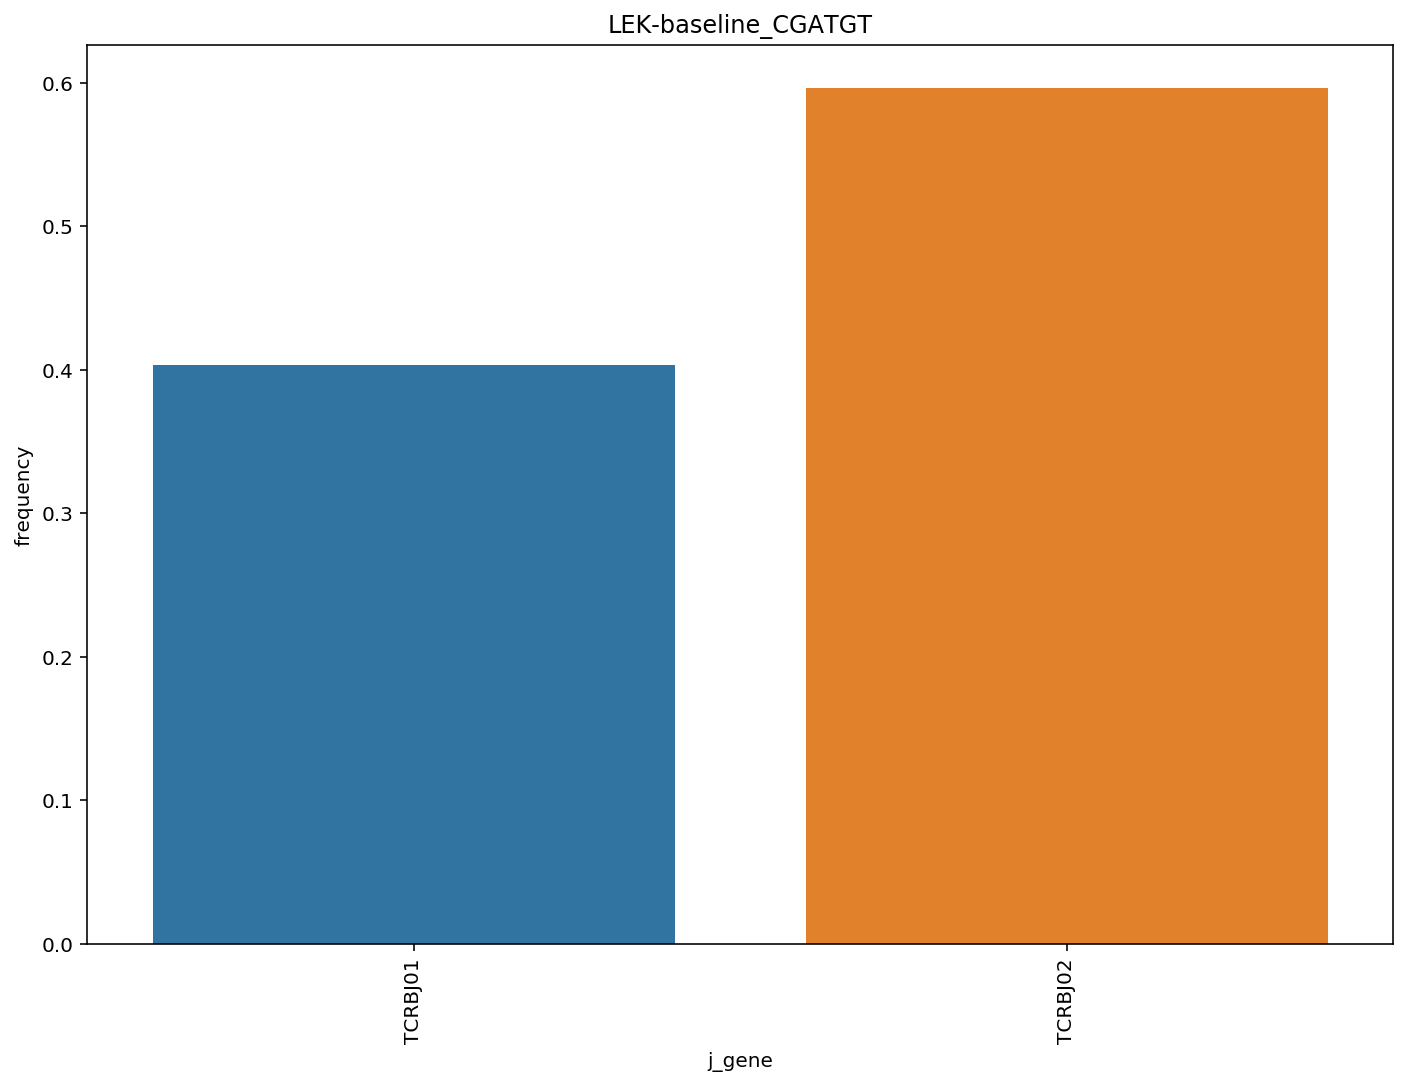

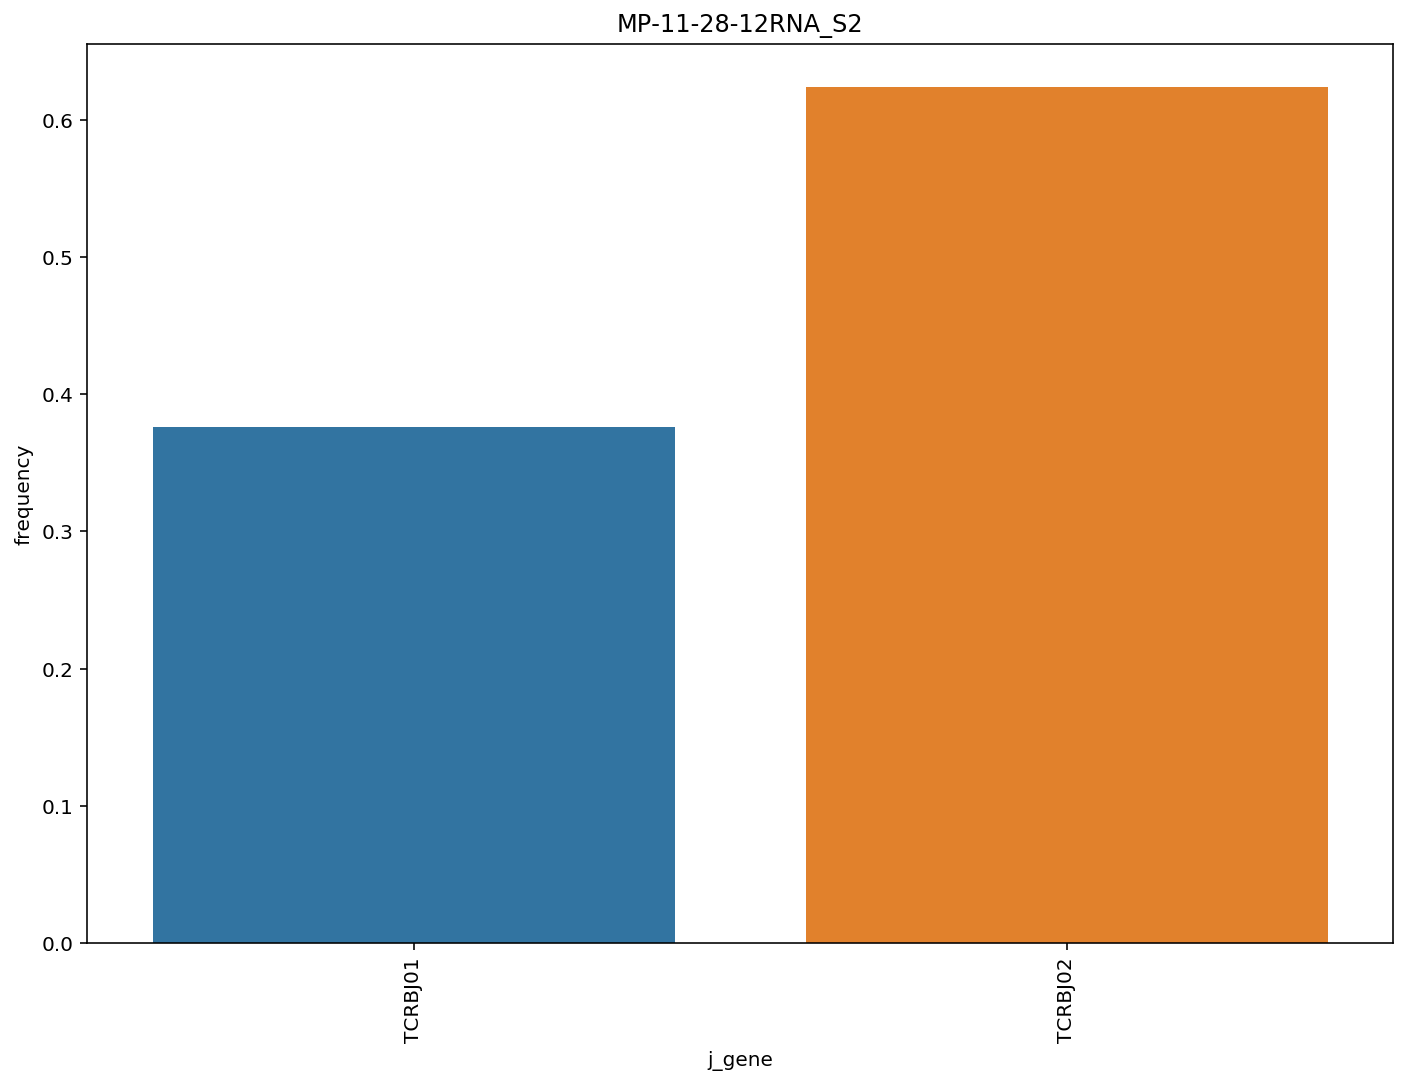

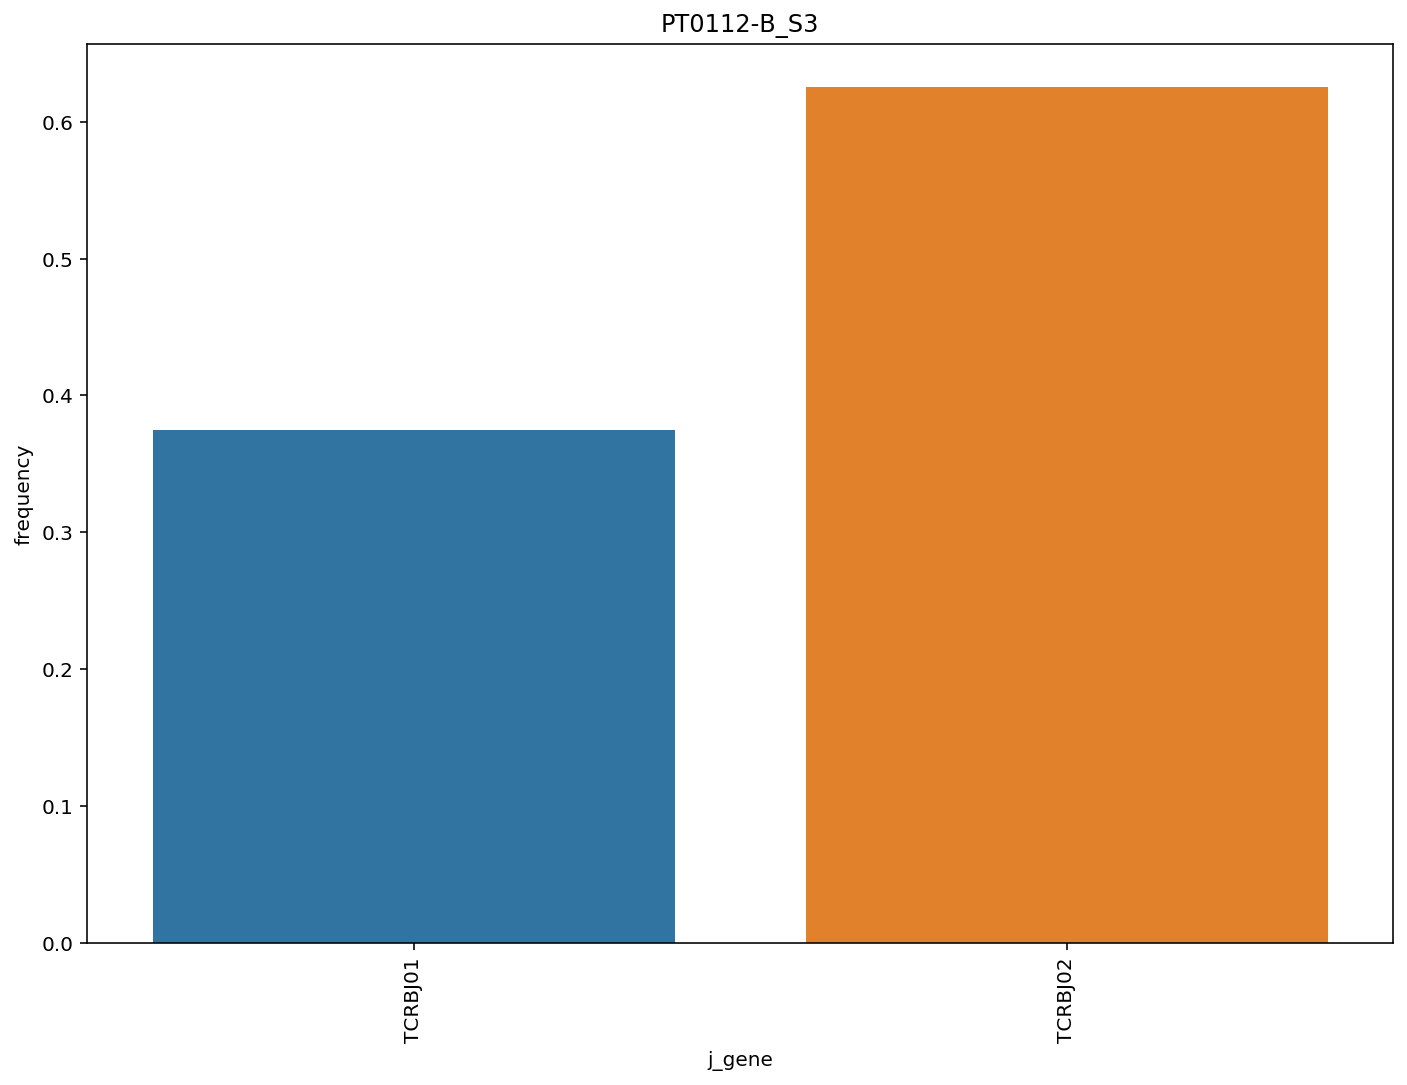

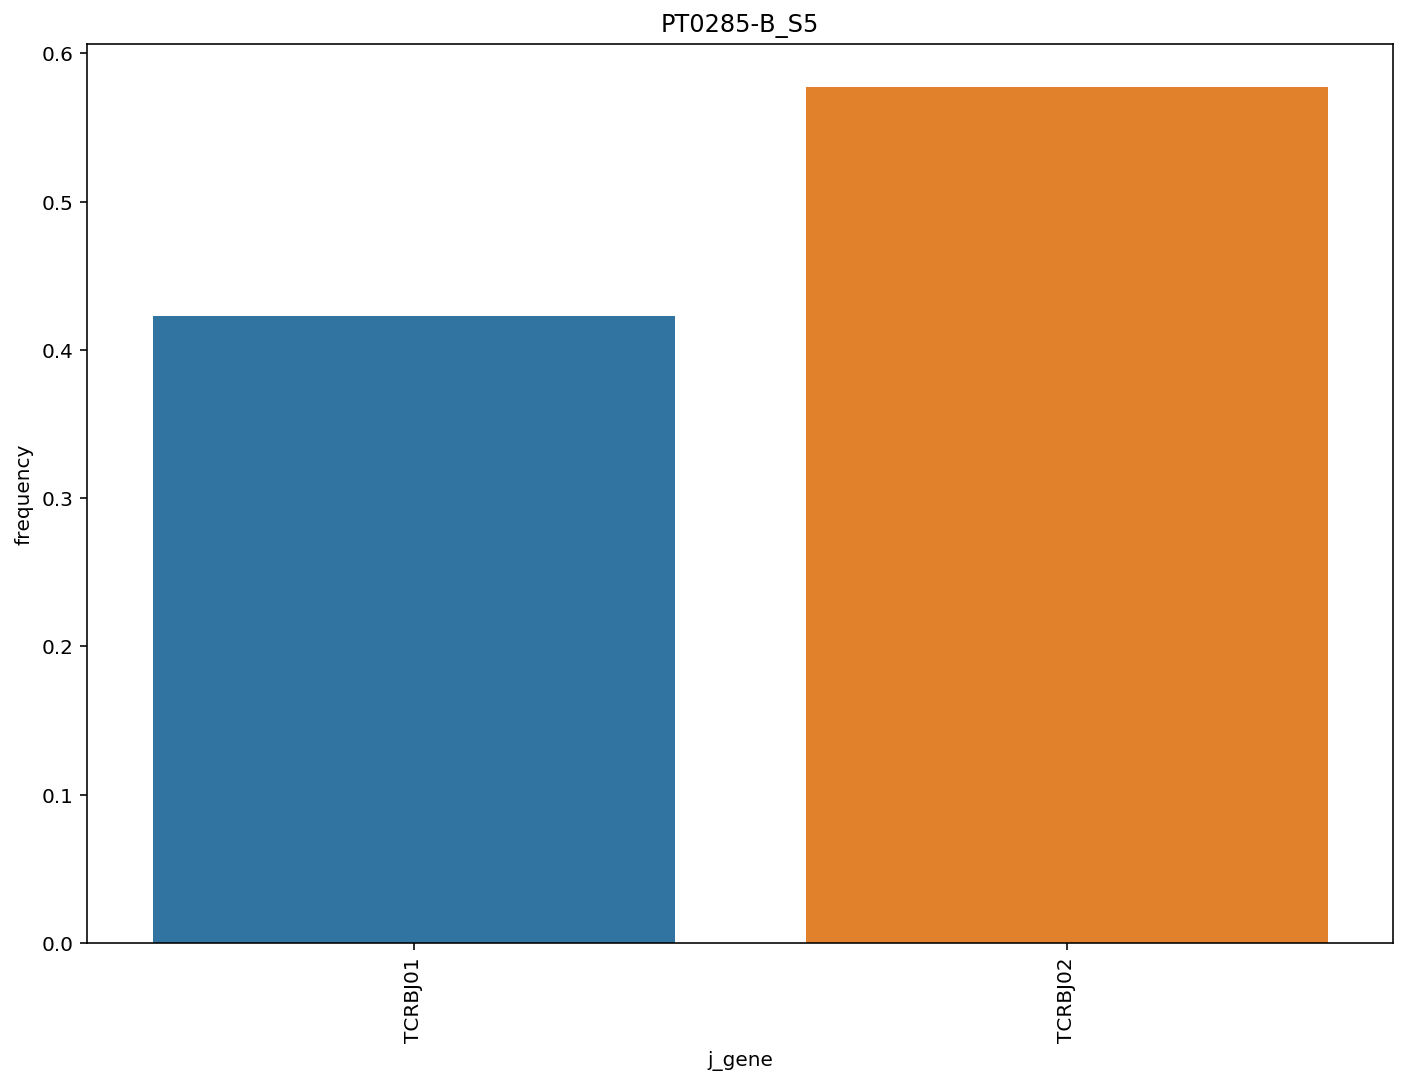

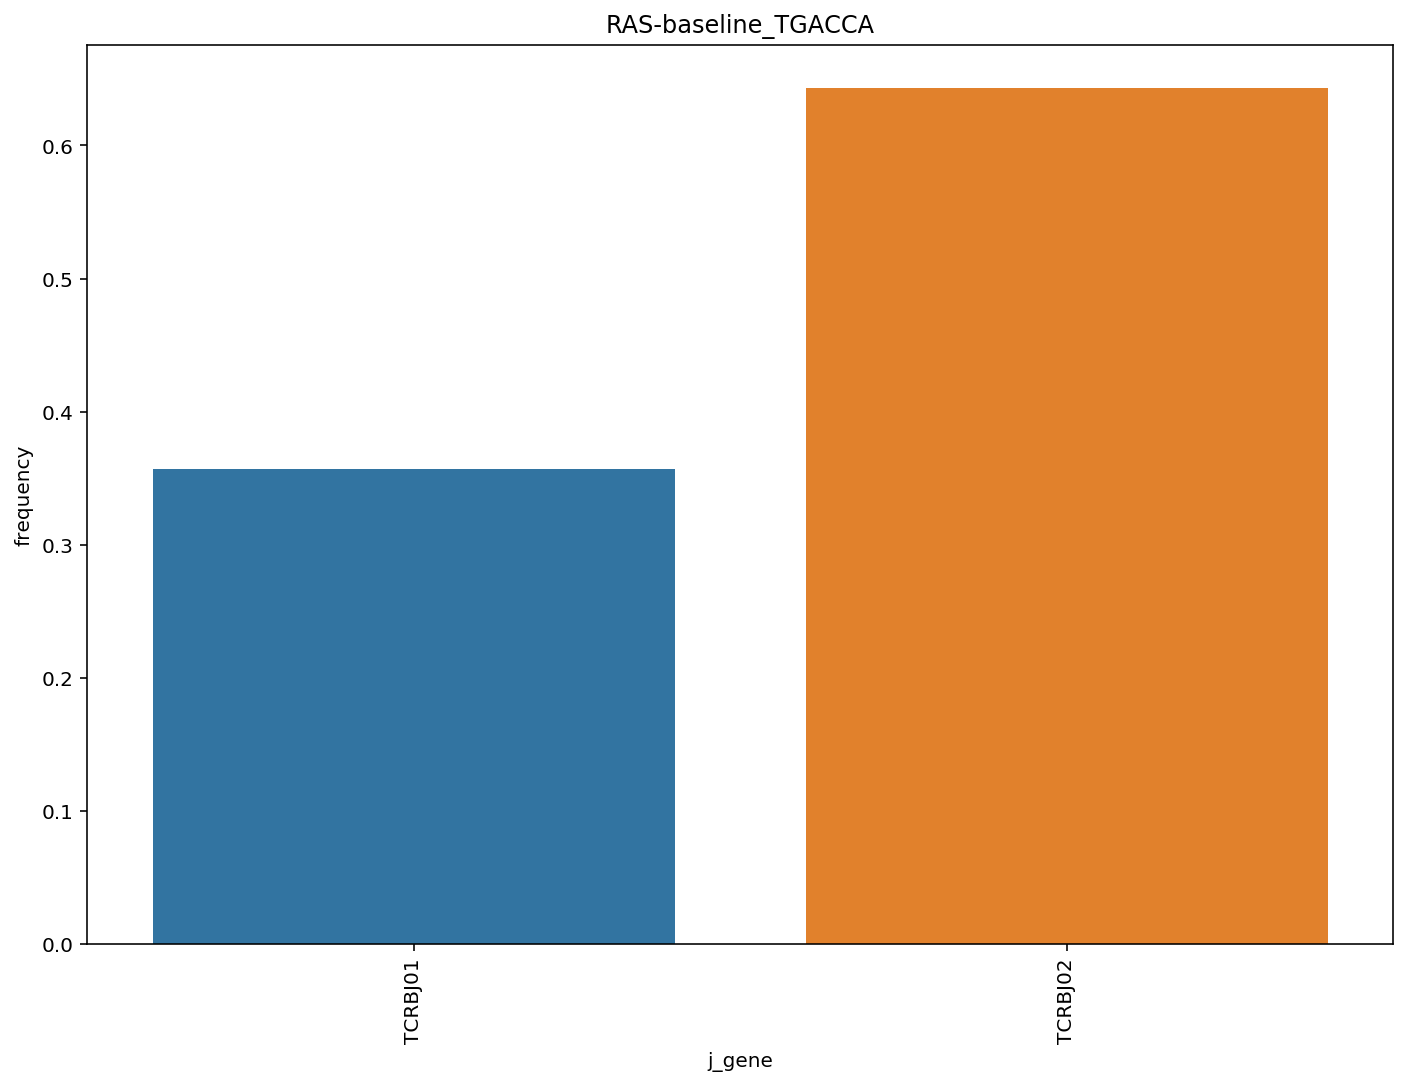

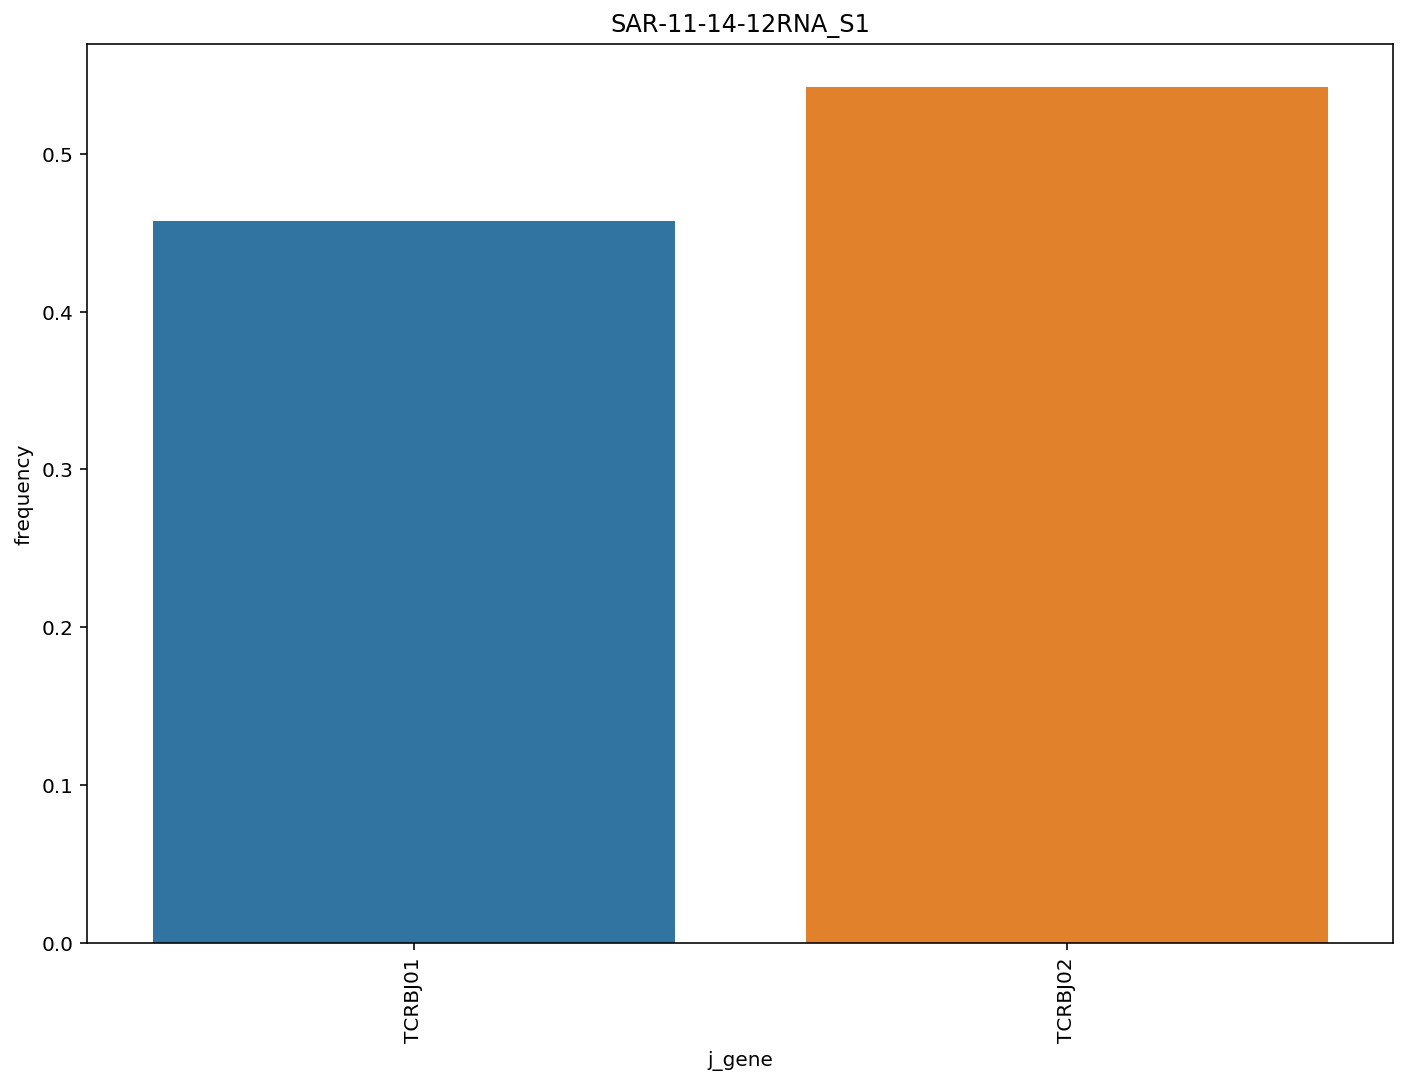

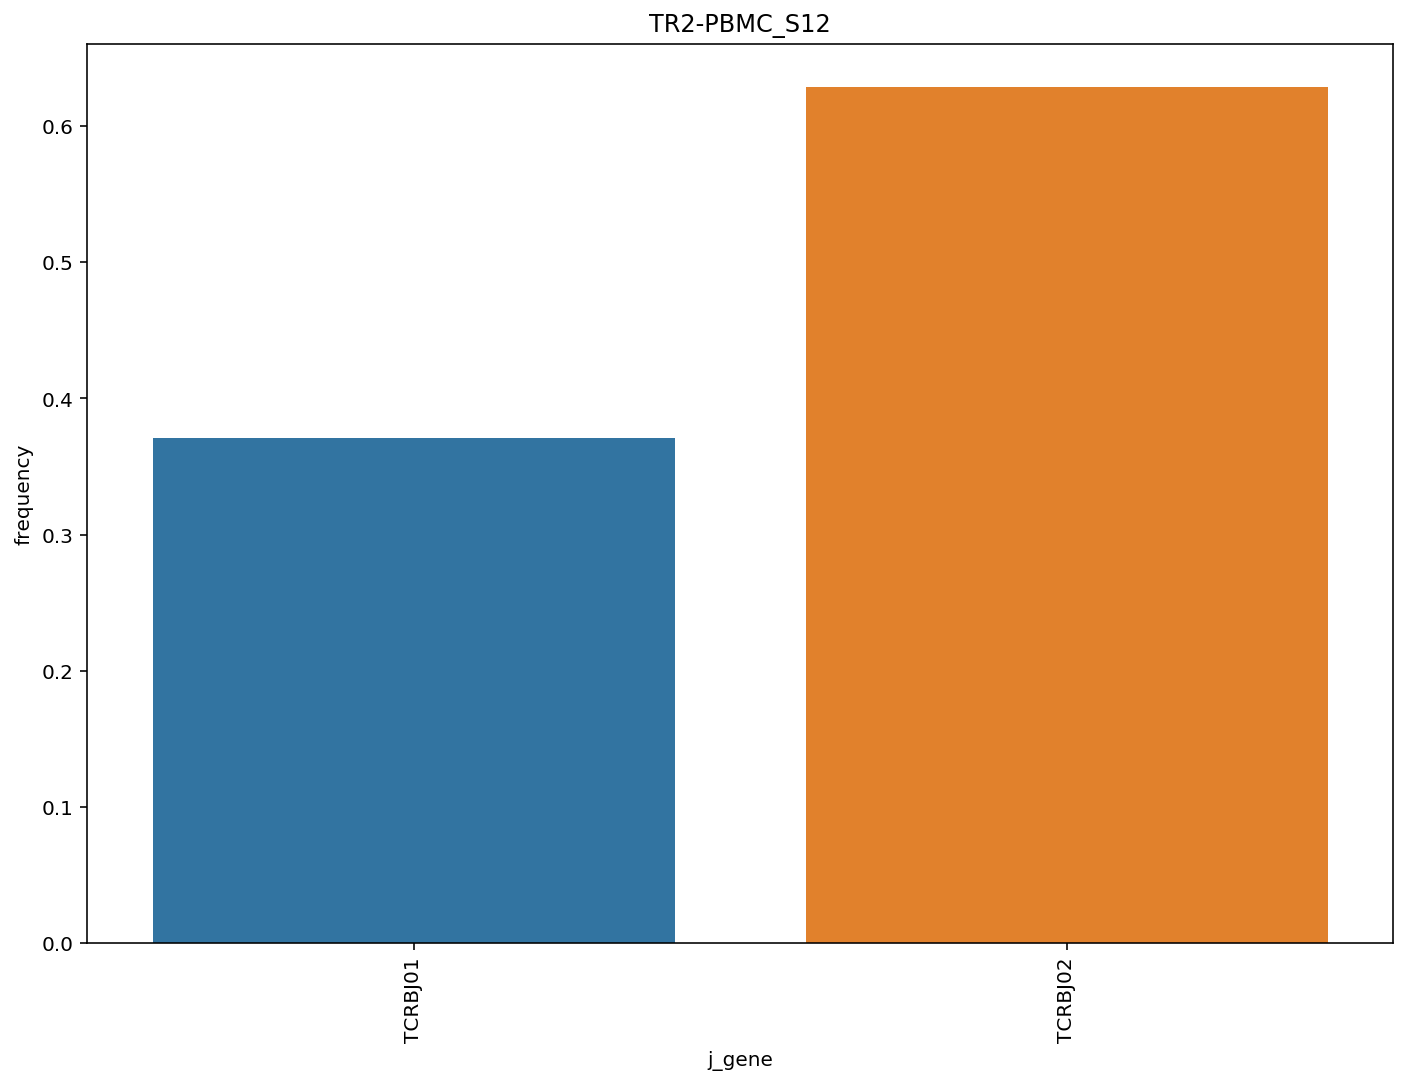

In [69]:
for sample in polyclonal_sample:
    sub_df = df[df['sample_name'] == sample]
    filtered_sub_df = sub_df[(sub_df['j_resolved'] != 'unresolved')]

    j_gene_allele = pd.DataFrame(filtered_sub_df.j_resolved.str.split('-',1).tolist(),
                                 columns = ['j_gene','j_allele'])
    j_gene = j_gene_allele['j_gene']


    df_j_frequency = pd.DataFrame.from_dict(Counter(j_gene), orient='index').reset_index()
    df_j_frequency.columns = ['j_gene', 'count']
    df_j_frequency['frequency'] = df_j_frequency['count']/sum(df_j_frequency['count'])


    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.barplot(x = "j_gene", y = 'frequency', data = df_j_frequency, order = df_j_frequency.sort_values('frequency').j_gene)
    plt.xticks(rotation=90)
    plt.title(sample)

### IMREP

In [114]:
import glob 
imrep_files =  glob.glob("/project/mangul_341/dandanpe/scott/complete_sample/cdr3/imrep_output/*.cdr3")

df = pd.DataFrame()
for sample in imrep_files:
    df_sample = pd.read_csv(sample)
    for sample_name in Sample_name_matchup_RNA_TCR_dict.keys():
        if sample_name in sample:
            df_sample['Sample'] = sample_name
    df = df.append(df_sample)

df = df[df['Chain_type'] == 'TRB']
df[-df['V_chains'].str.contains(";")]

CDR3_AA_Seq Chain_type  Read_count V_chains D_chains J_chains  \
6     CASSFISGSGSTGELFF        TRB           2   TRBV11      NaN    TRBJ2   
17       CASSYVGDTGELCF        TRB           2    TRBV6      NaN    TRBJ2   
24        CASSRAENYGYTF        TRB           3    TRBV5      NaN    TRBJ1   
27      CASSPLRTGEAEAFF        TRB           6   TRBV18      NaN    TRBJ1   
33         CASSIASNEQFF        TRB           2   TRBV19      NaN    TRBJ2   
...                 ...        ...         ...      ...      ...      ...   
992    CASSNYRDRAHYGYTF        TRB           2    TRBV7      NaN    TRBJ1   
1393   CAISAKTGGASQPQHF        TRB           2   TRBV27      NaN    TRBJ1   
1480     CASSLNRGIYGYTF        TRB           5   TRBV12      NaN    TRBJ1   
1557        CASSLGDTQYF        TRB          14   TRBV27      NaN    TRBJ2   
1617     CASSFKGAIETQYF        TRB           8   TRBV12      NaN    TRBJ2   

                            Sample  
6     INY1-sorted-T-cells_S14_L007  
17    INY1-sorted-T-cells_S14_L007  
24    INY1-sorted-T-cells_S14_L007  
27    INY1-sorted-T-cells_S14_L007  
33    INY1-sorted-T-cells_S14_L007  
...                            ...  
992            RAS-baseline_TGACCA  
1393           RAS-baseline_TGACCA  
1480           RAS-baseline_TGACCA  
1557           RAS-baseline_TGACCA  
1617           RAS-baseline_TGACCA  

[8309 rows x 7 columns]

### IMREP V-gene usage in monoclonal samples

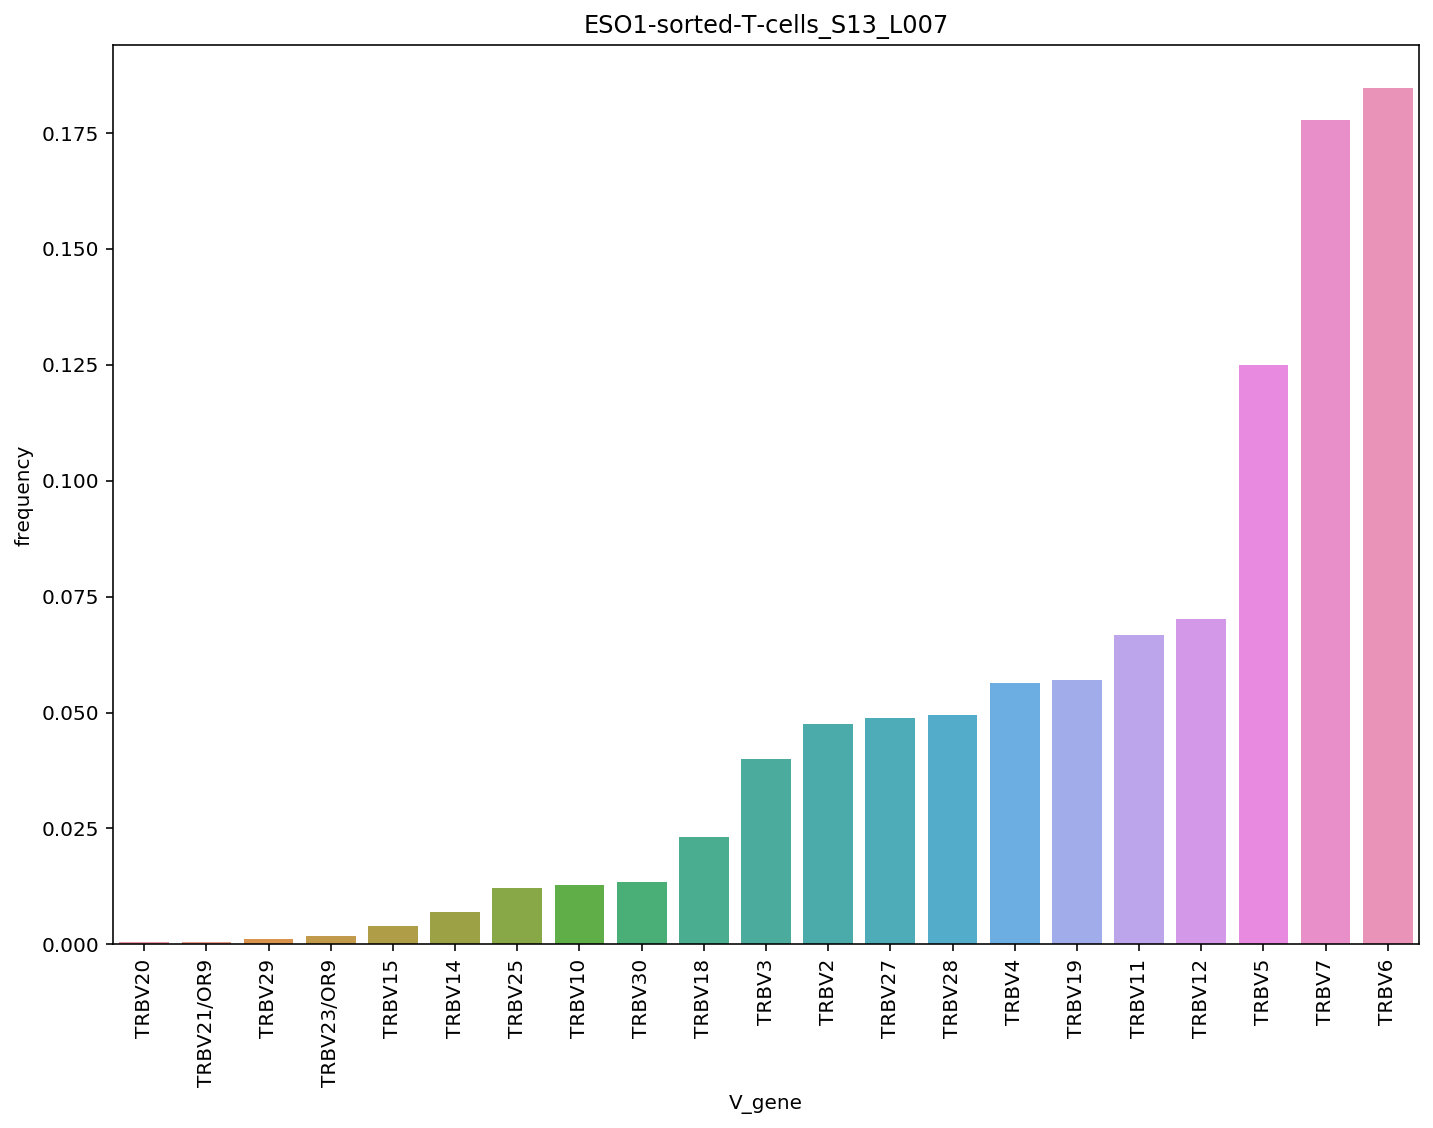

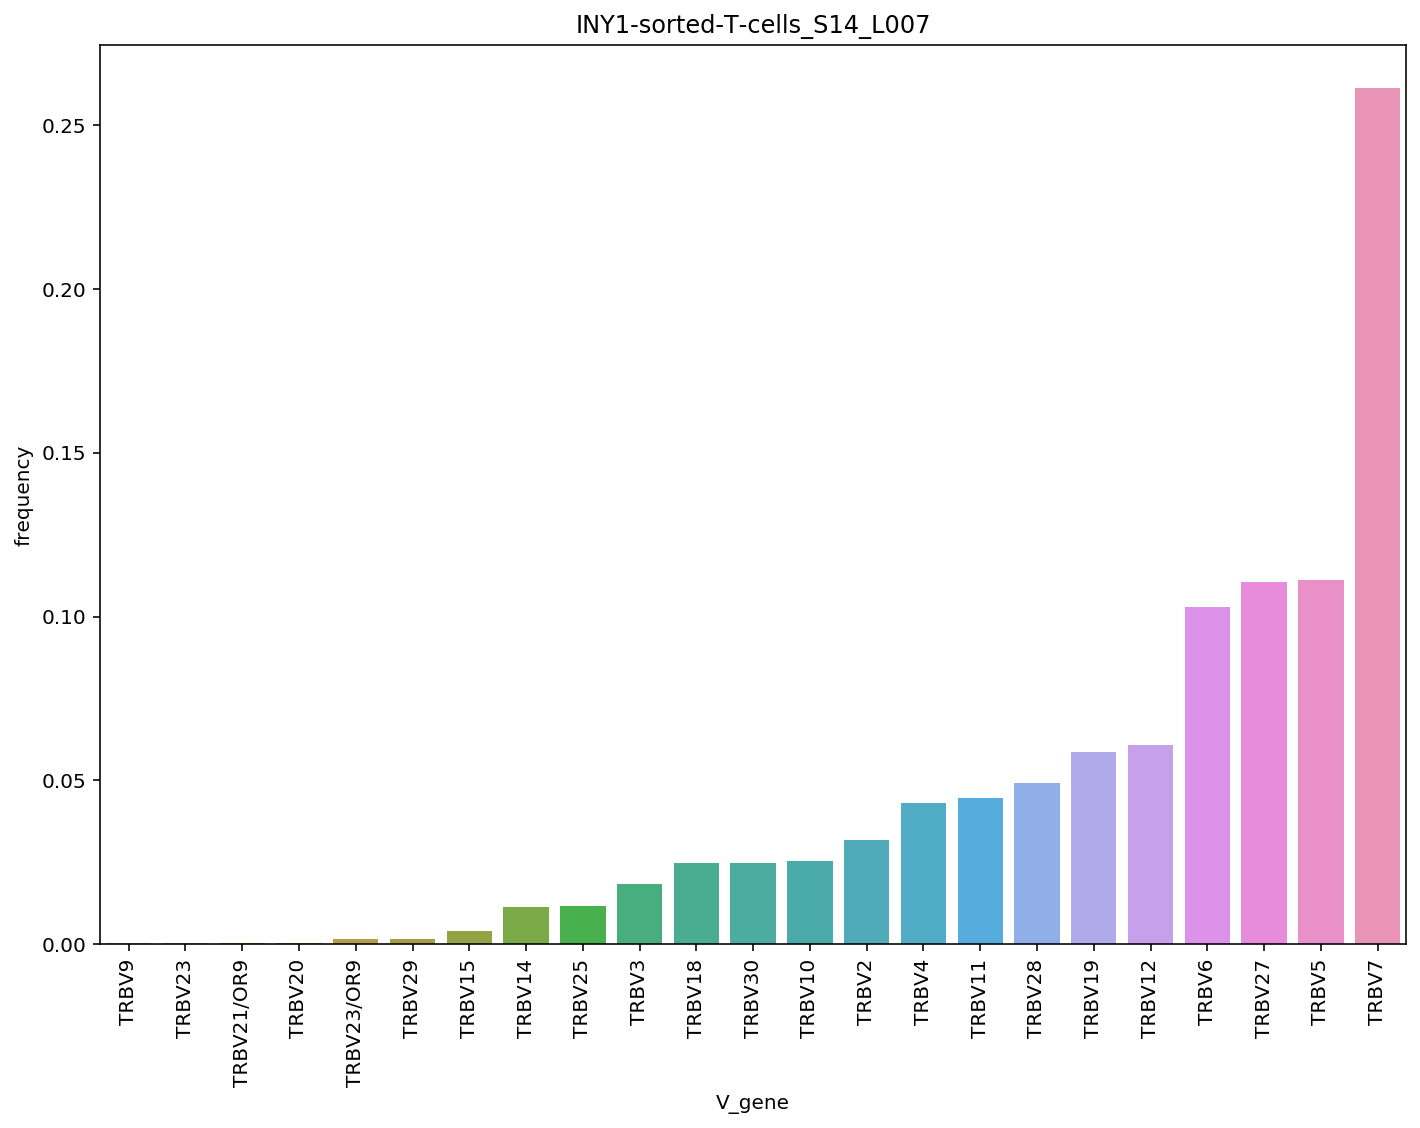

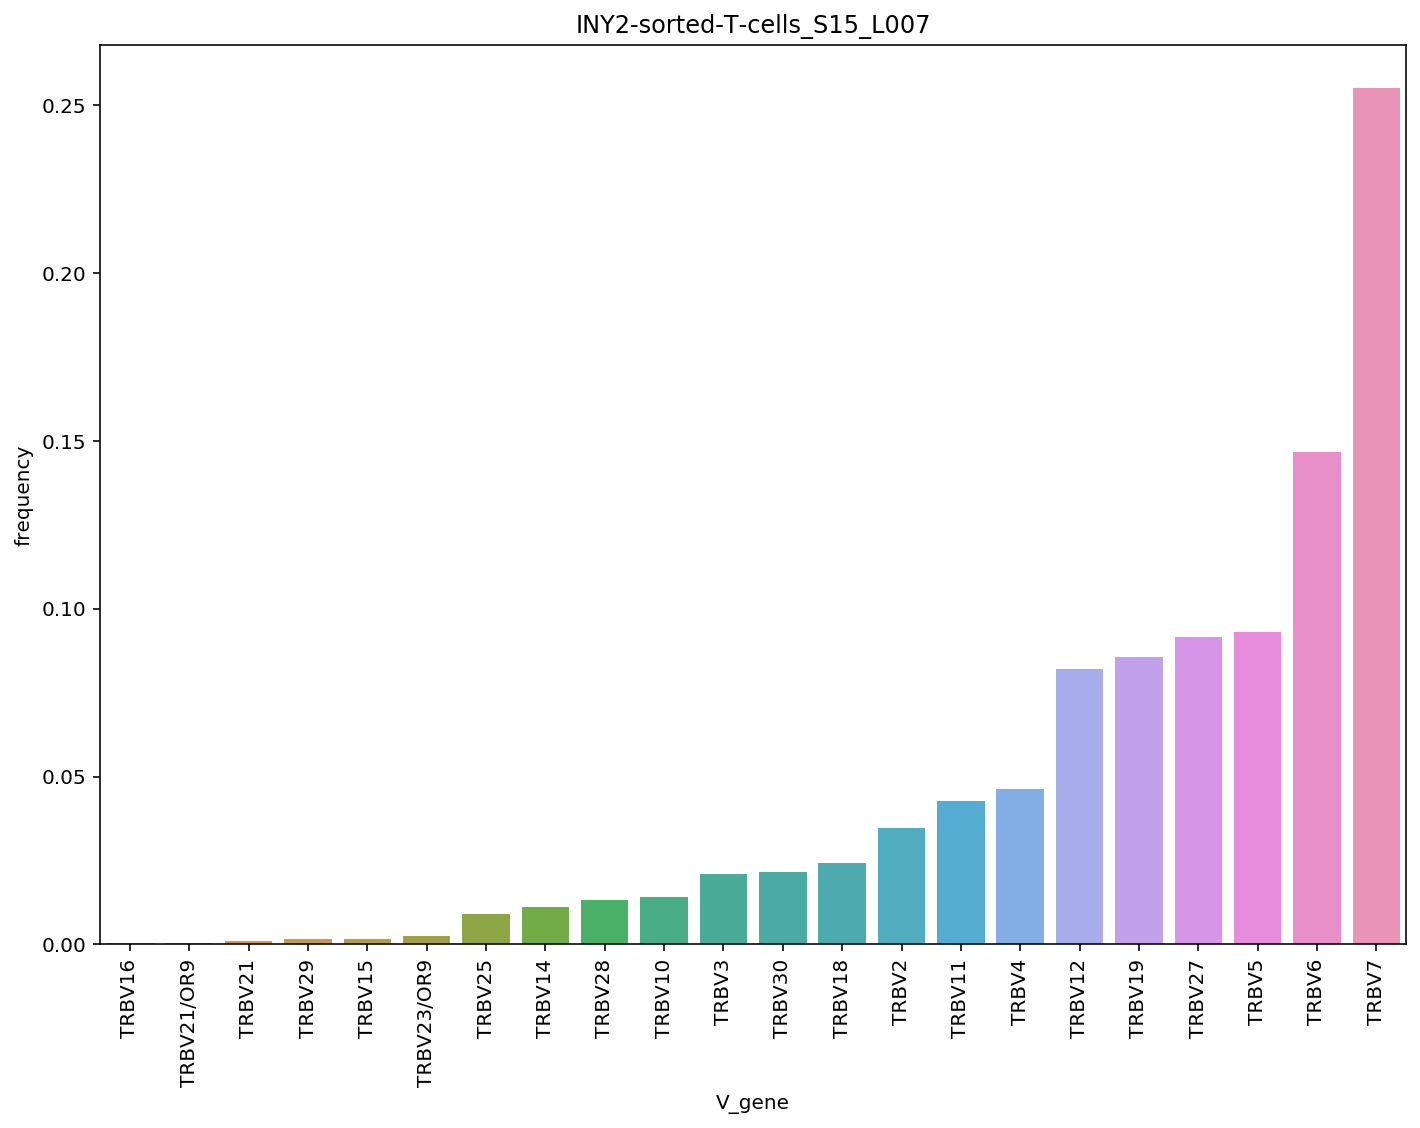

In [115]:
for sample in monoclonal_sample:
    sub_df = df[df['Sample'] == sample]
    v_gene_list = sub_df[~sub_df['V_chains'].str.contains(';')]['V_chains']

    df_v_gene = pd.DataFrame.from_dict(Counter(v_gene_list), orient = 'index').reset_index()
    df_v_gene.columns = ['V_gene', 'count']
    df_v_gene['frequency'] = df_v_gene['count']/sum(df_v_gene['count'])

    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.barplot(x = "V_gene", y = "frequency", data = df_v_gene, order = df_v_gene.sort_values('frequency').V_gene)
    plt.xticks(rotation=90)
    plt.title(sample)

In [130]:
IMREP_v_mono = df_v_gene

### IMREP V-gene usage in polyclonal samples

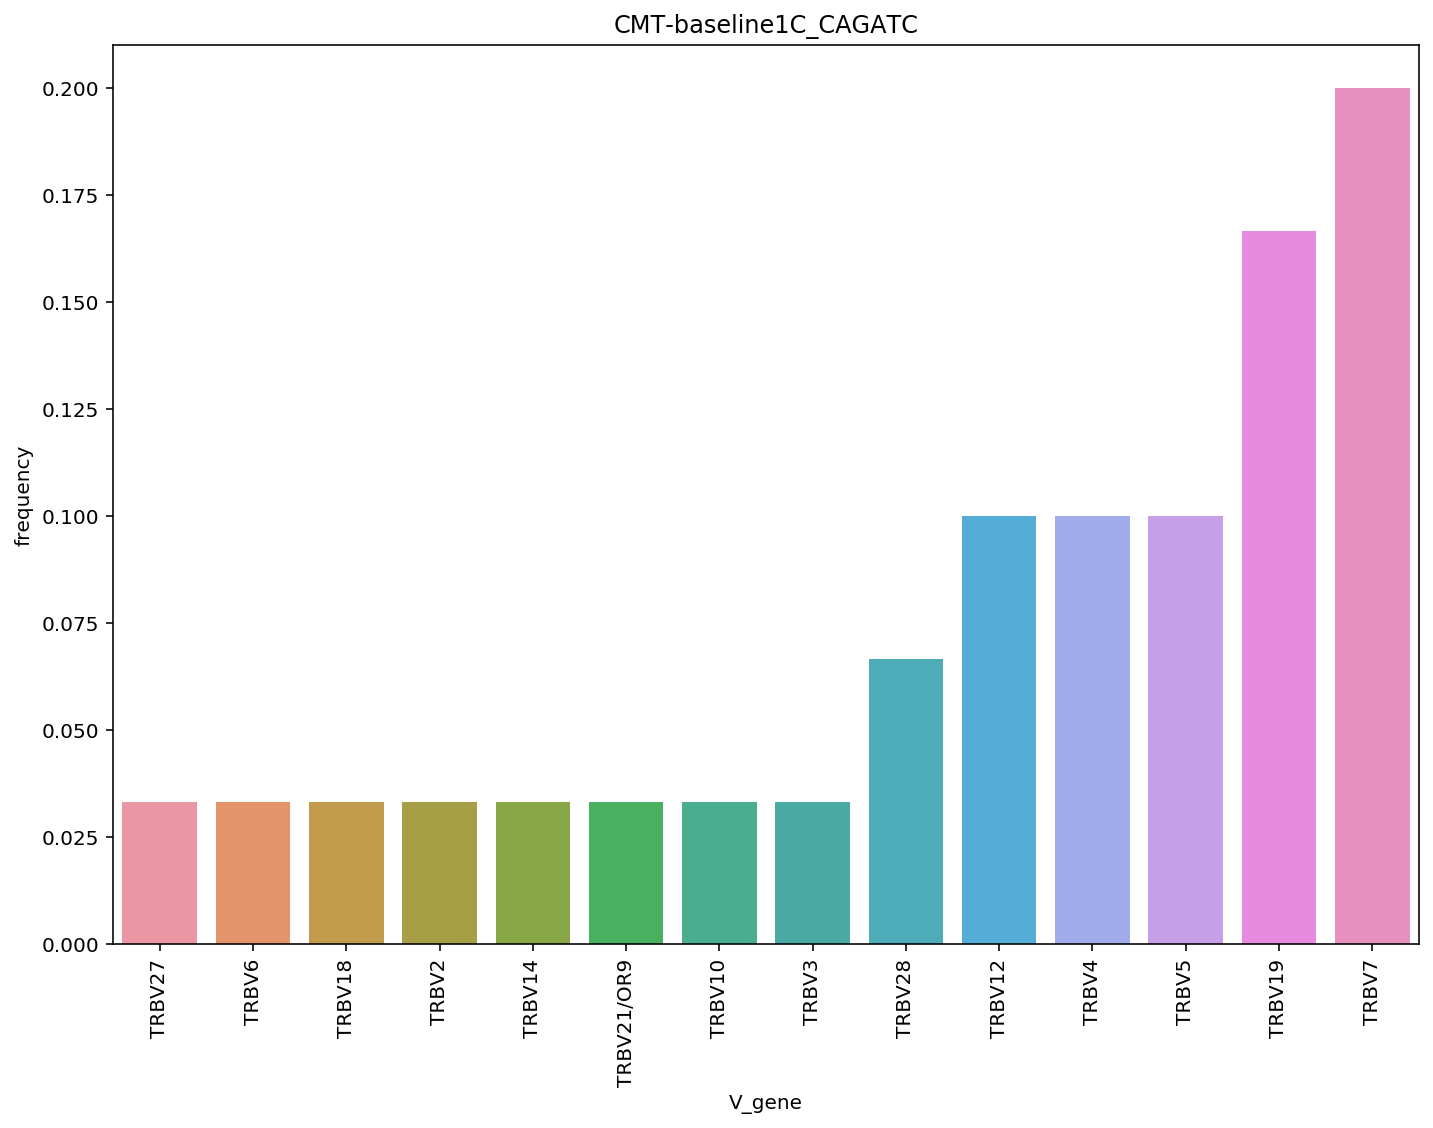

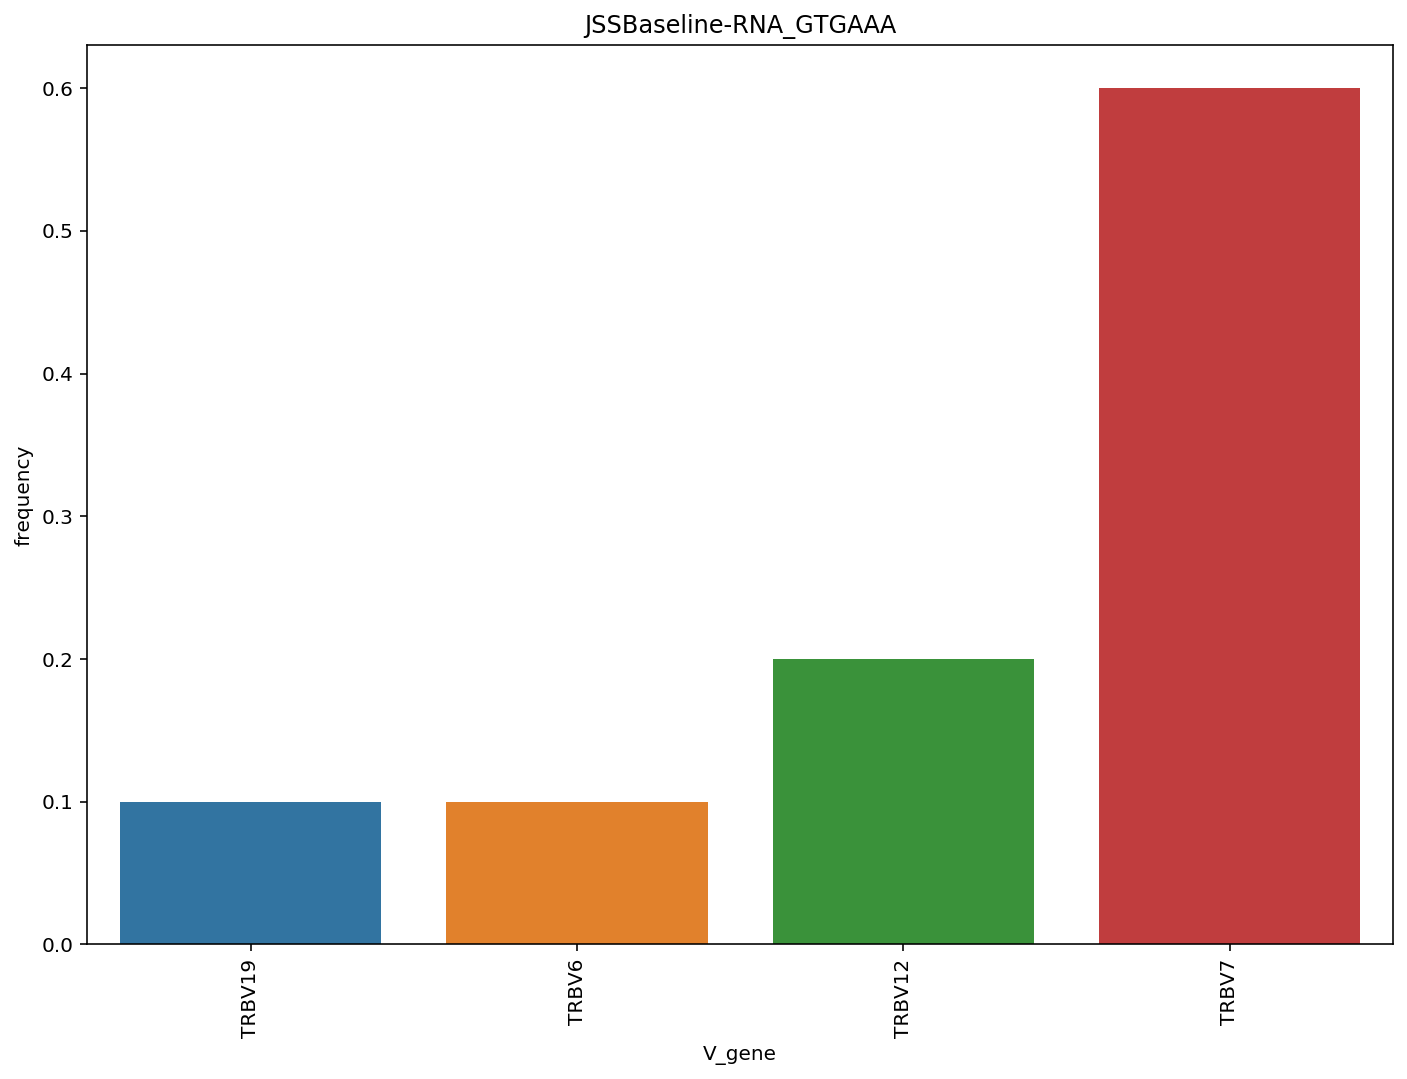

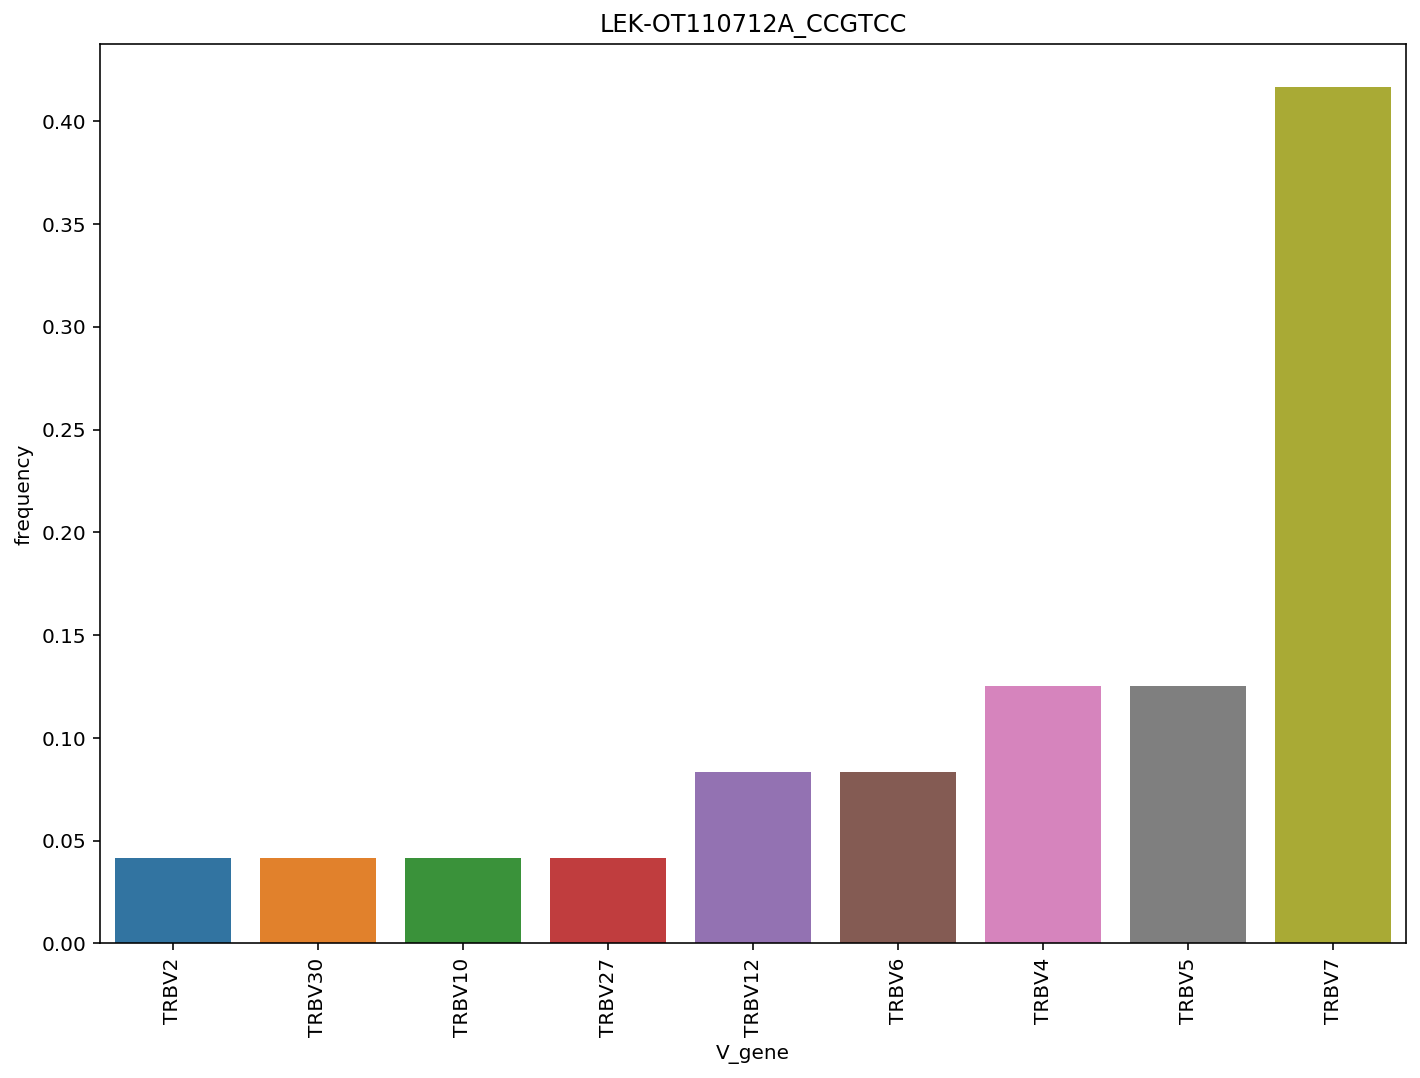

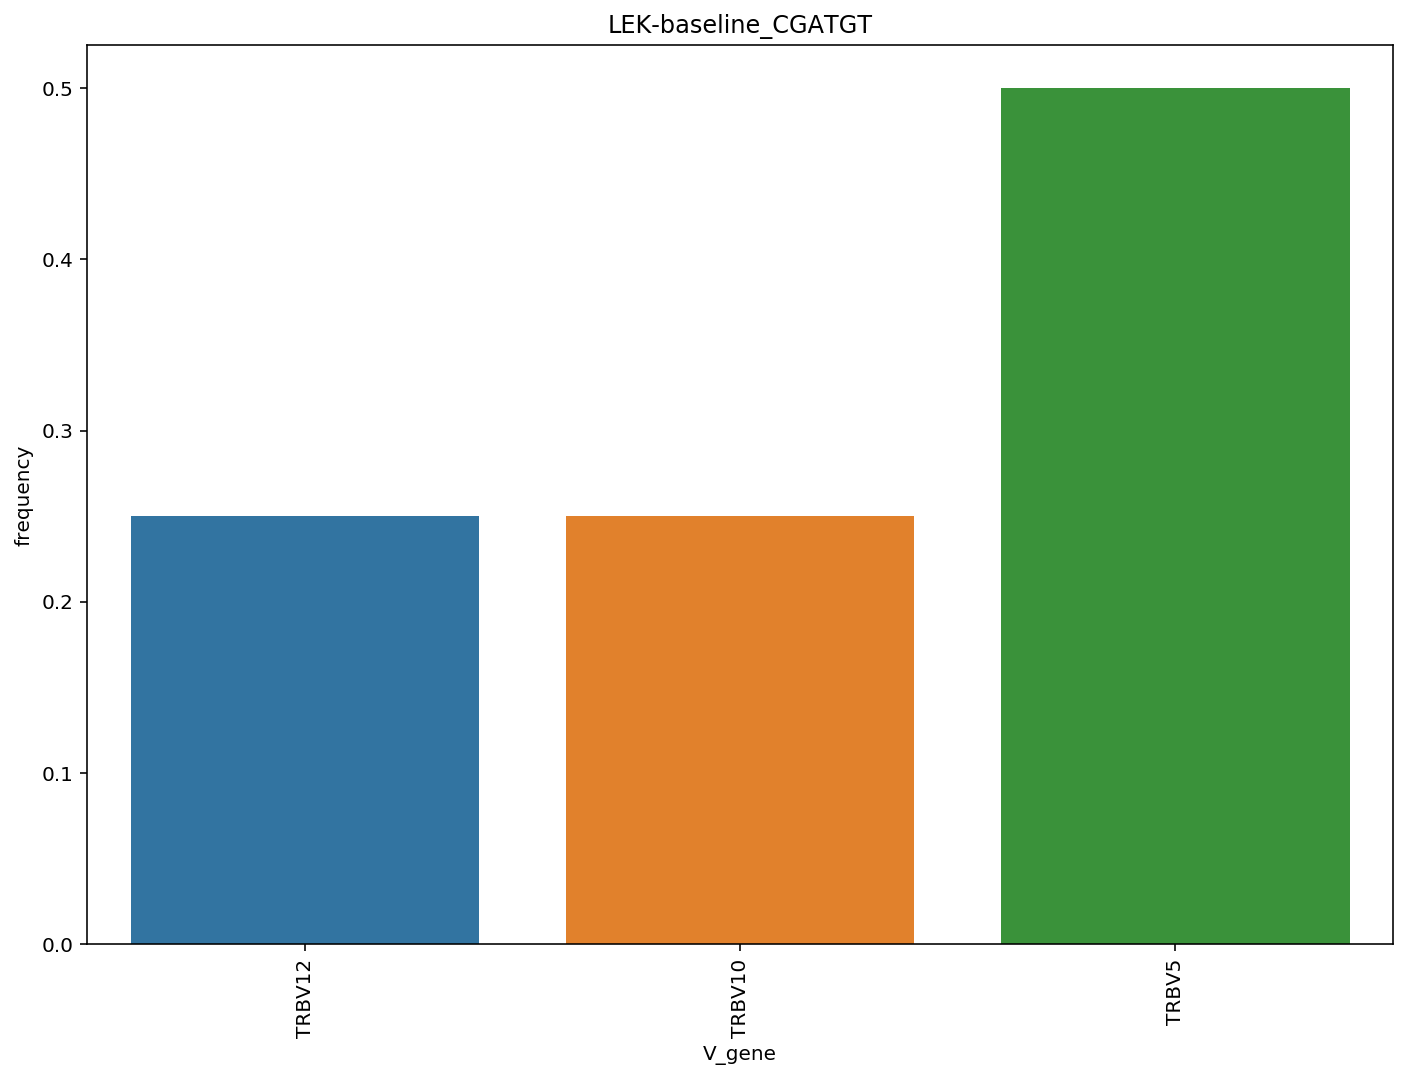

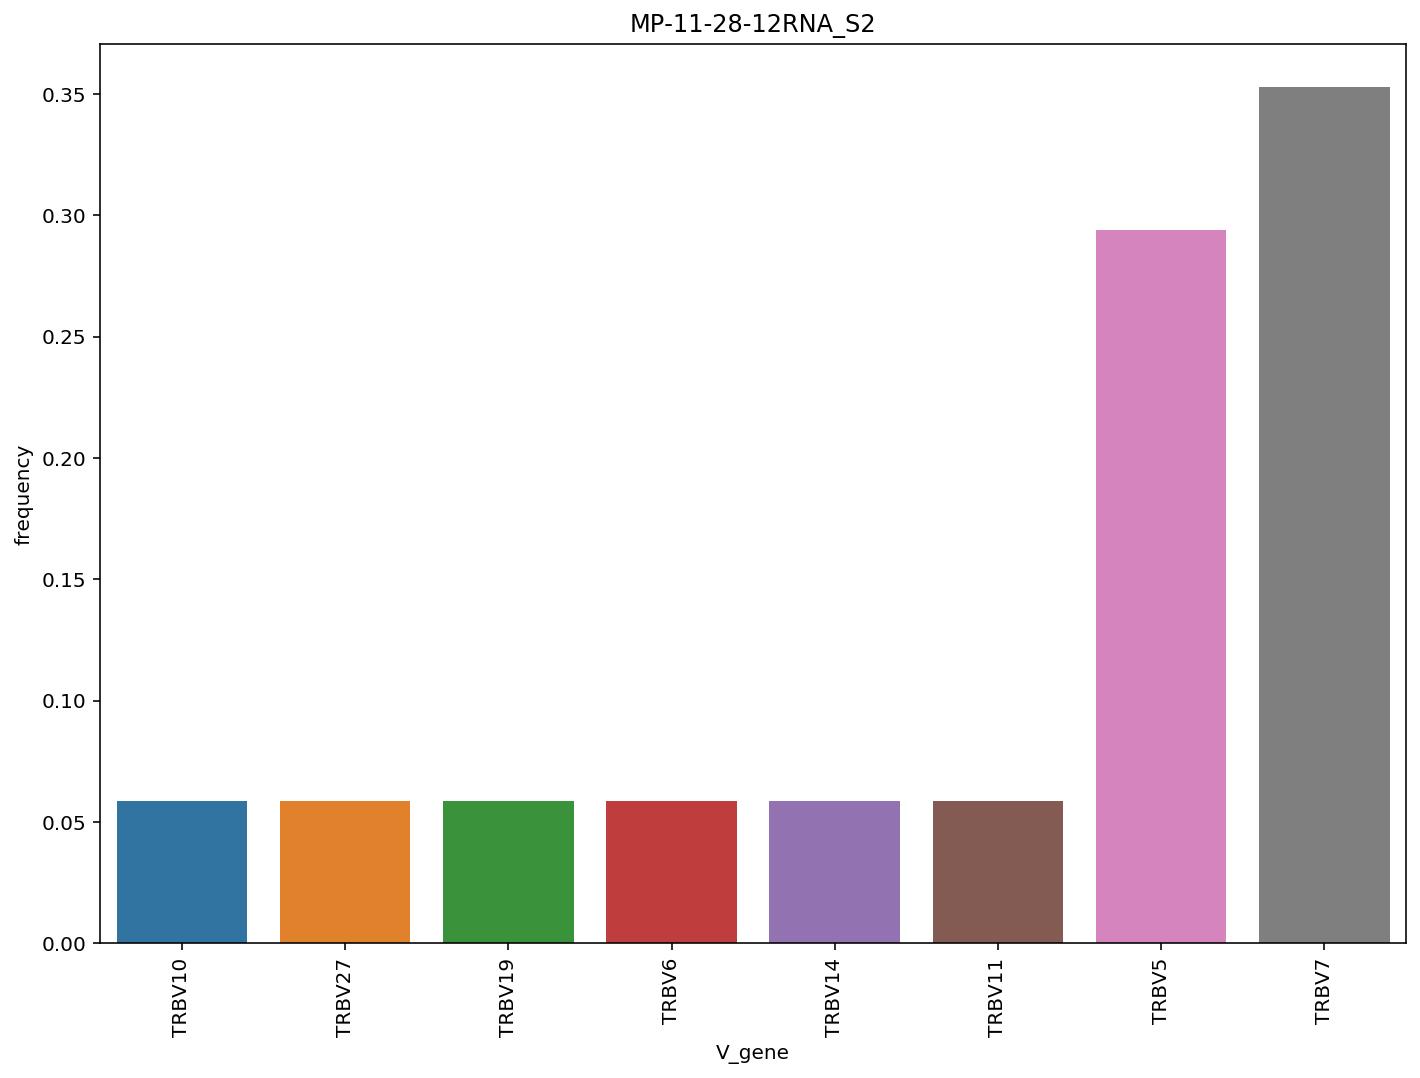

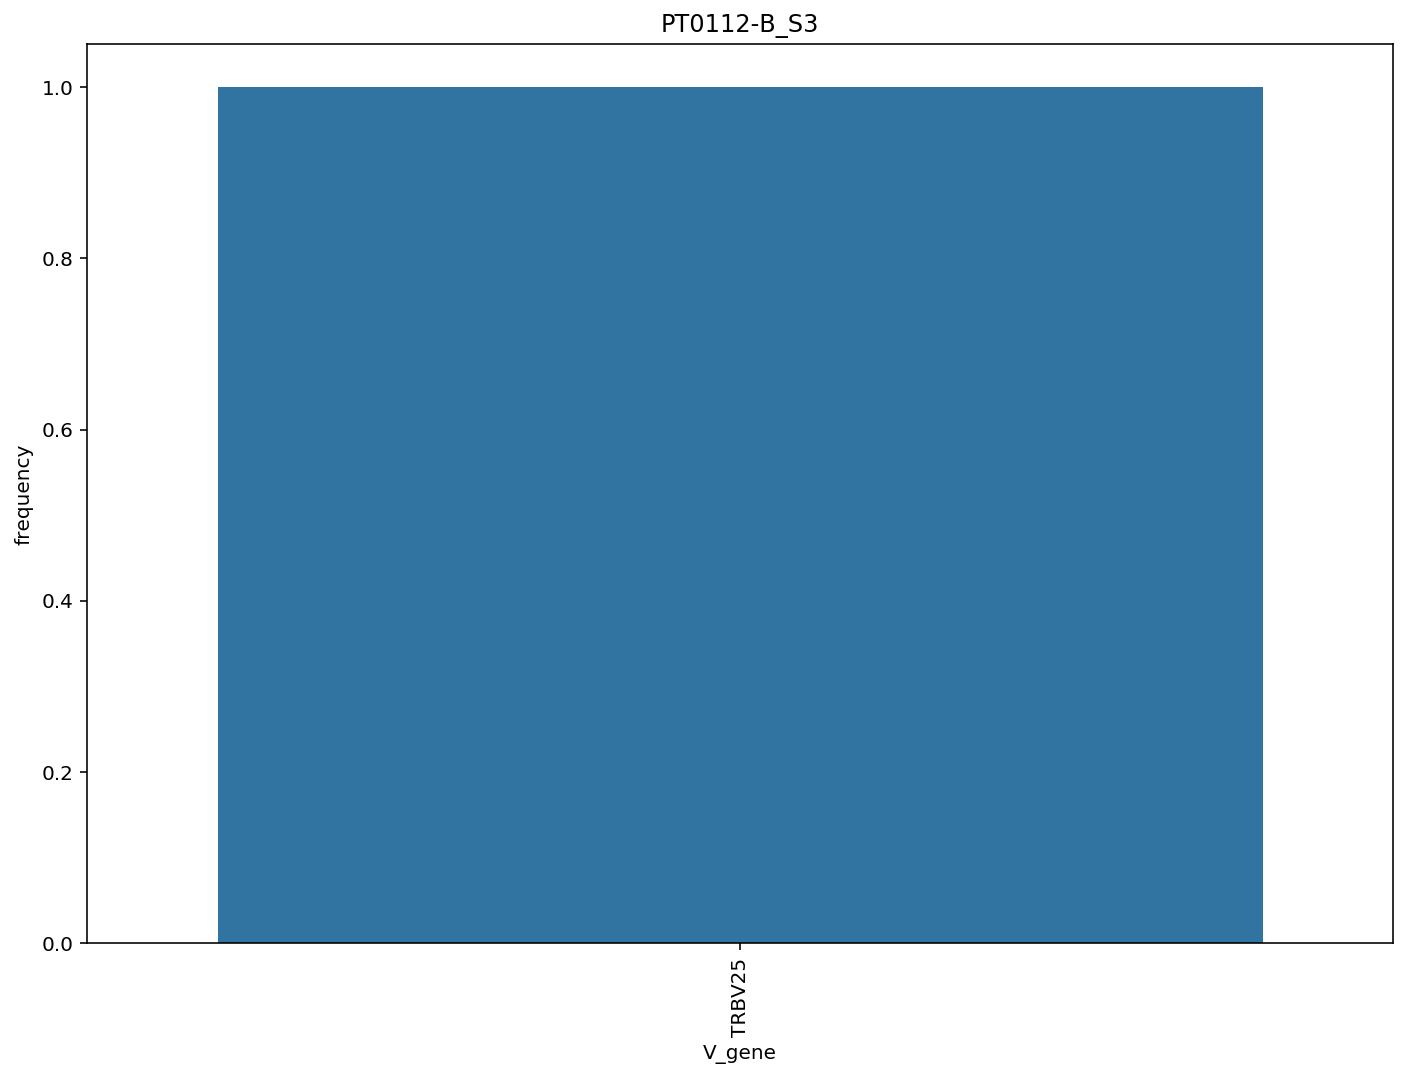

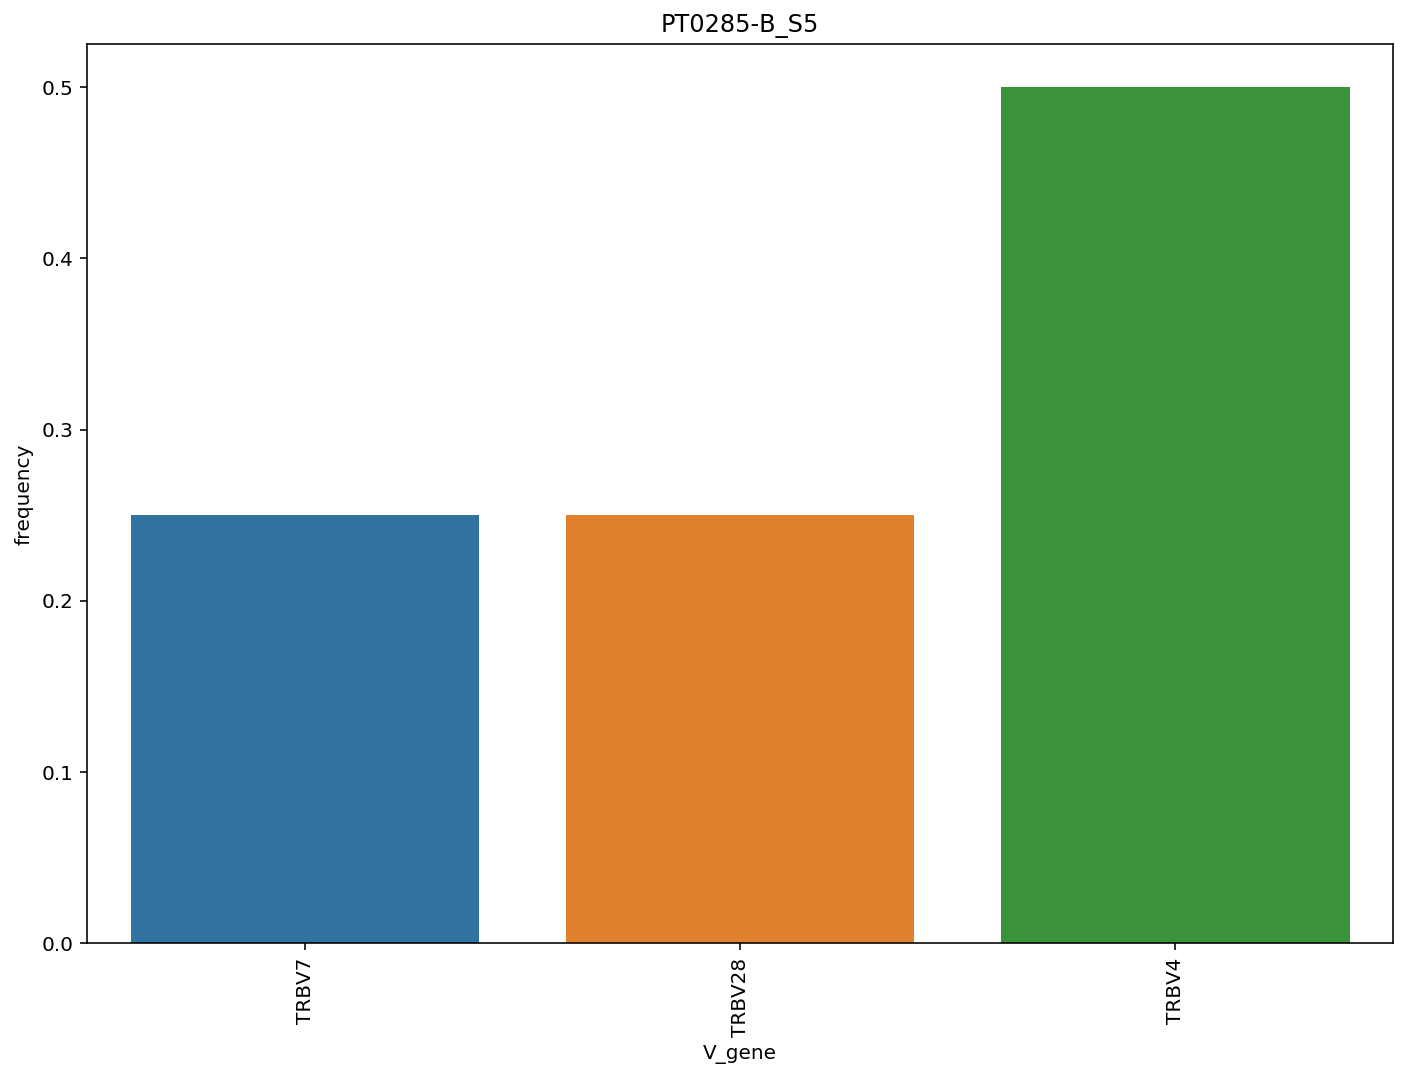

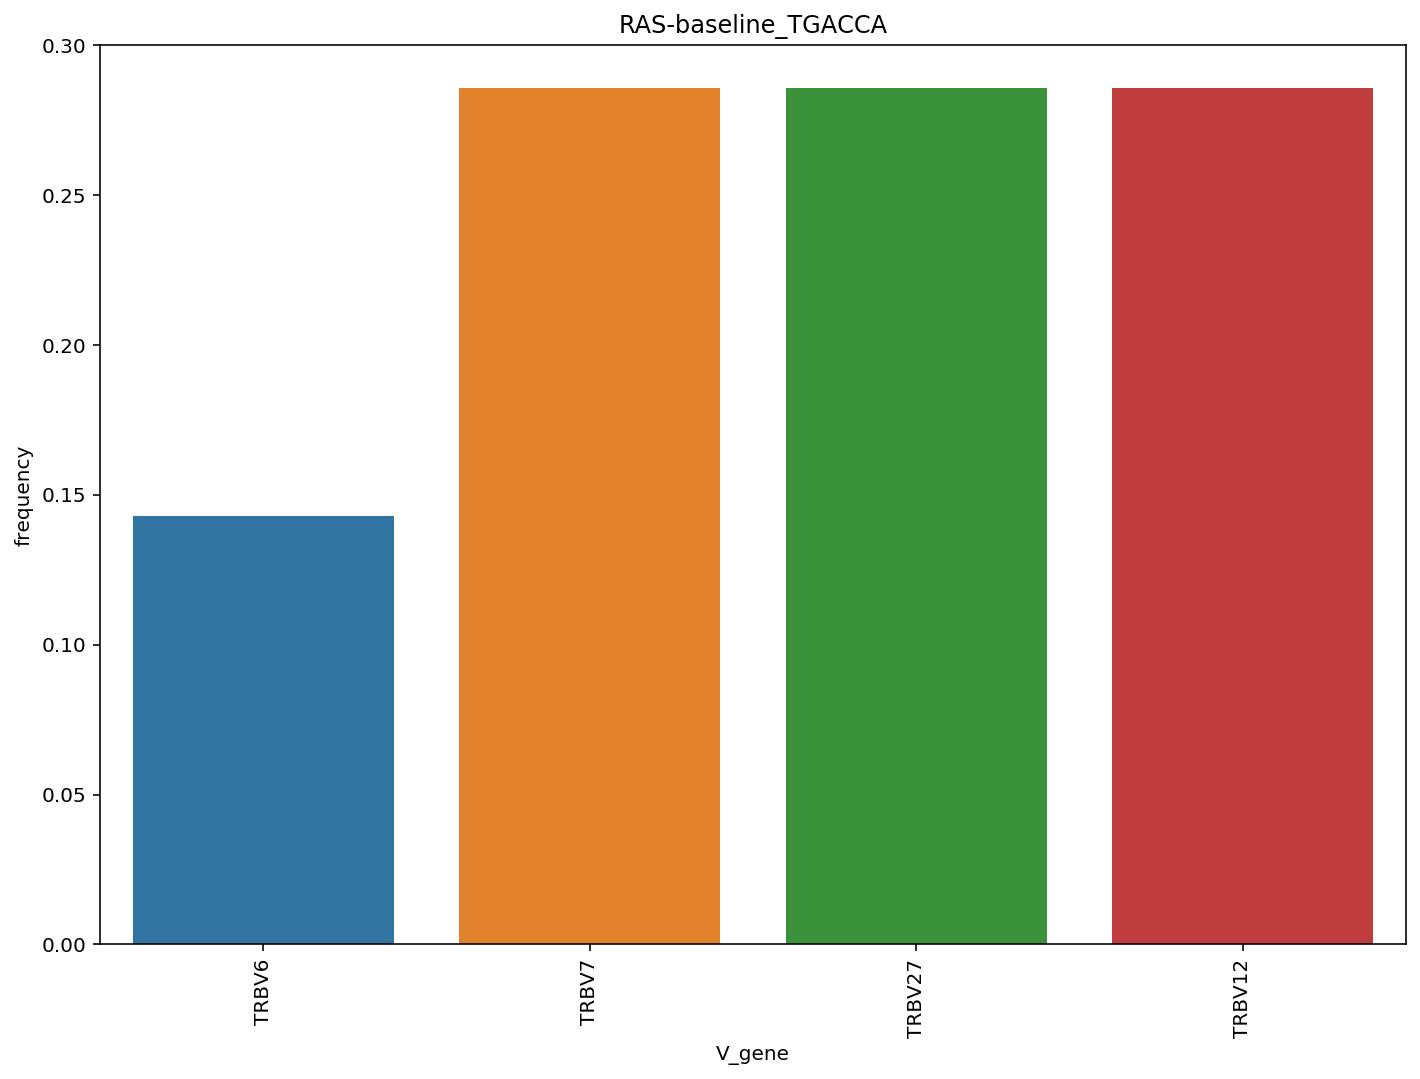

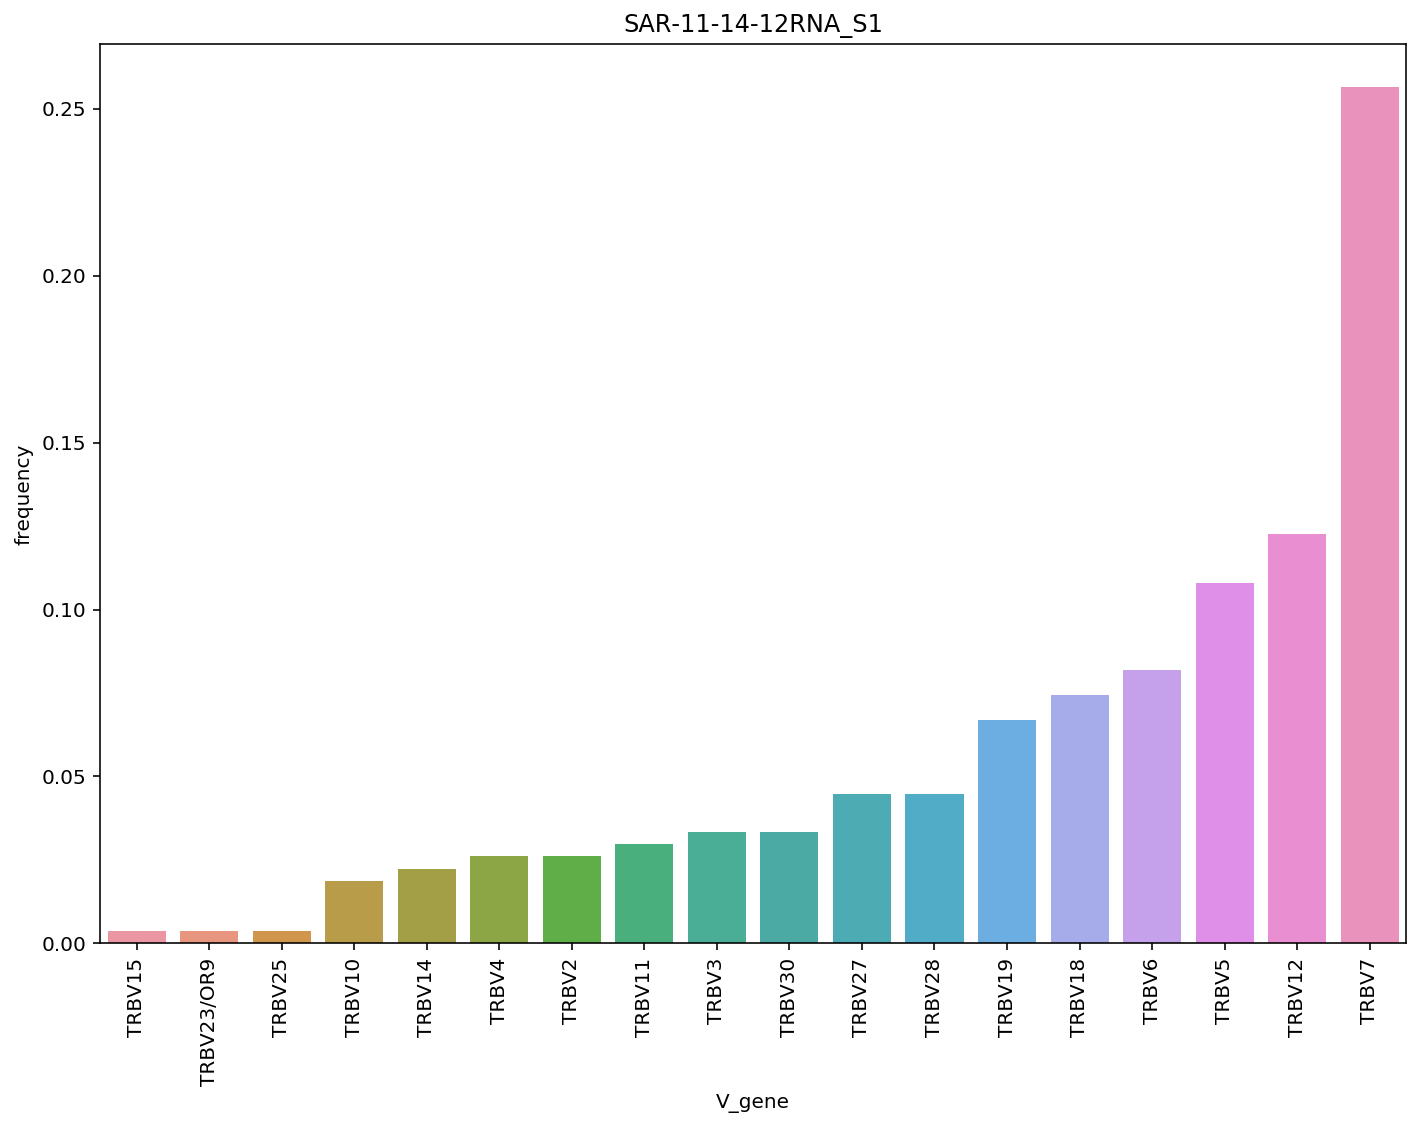

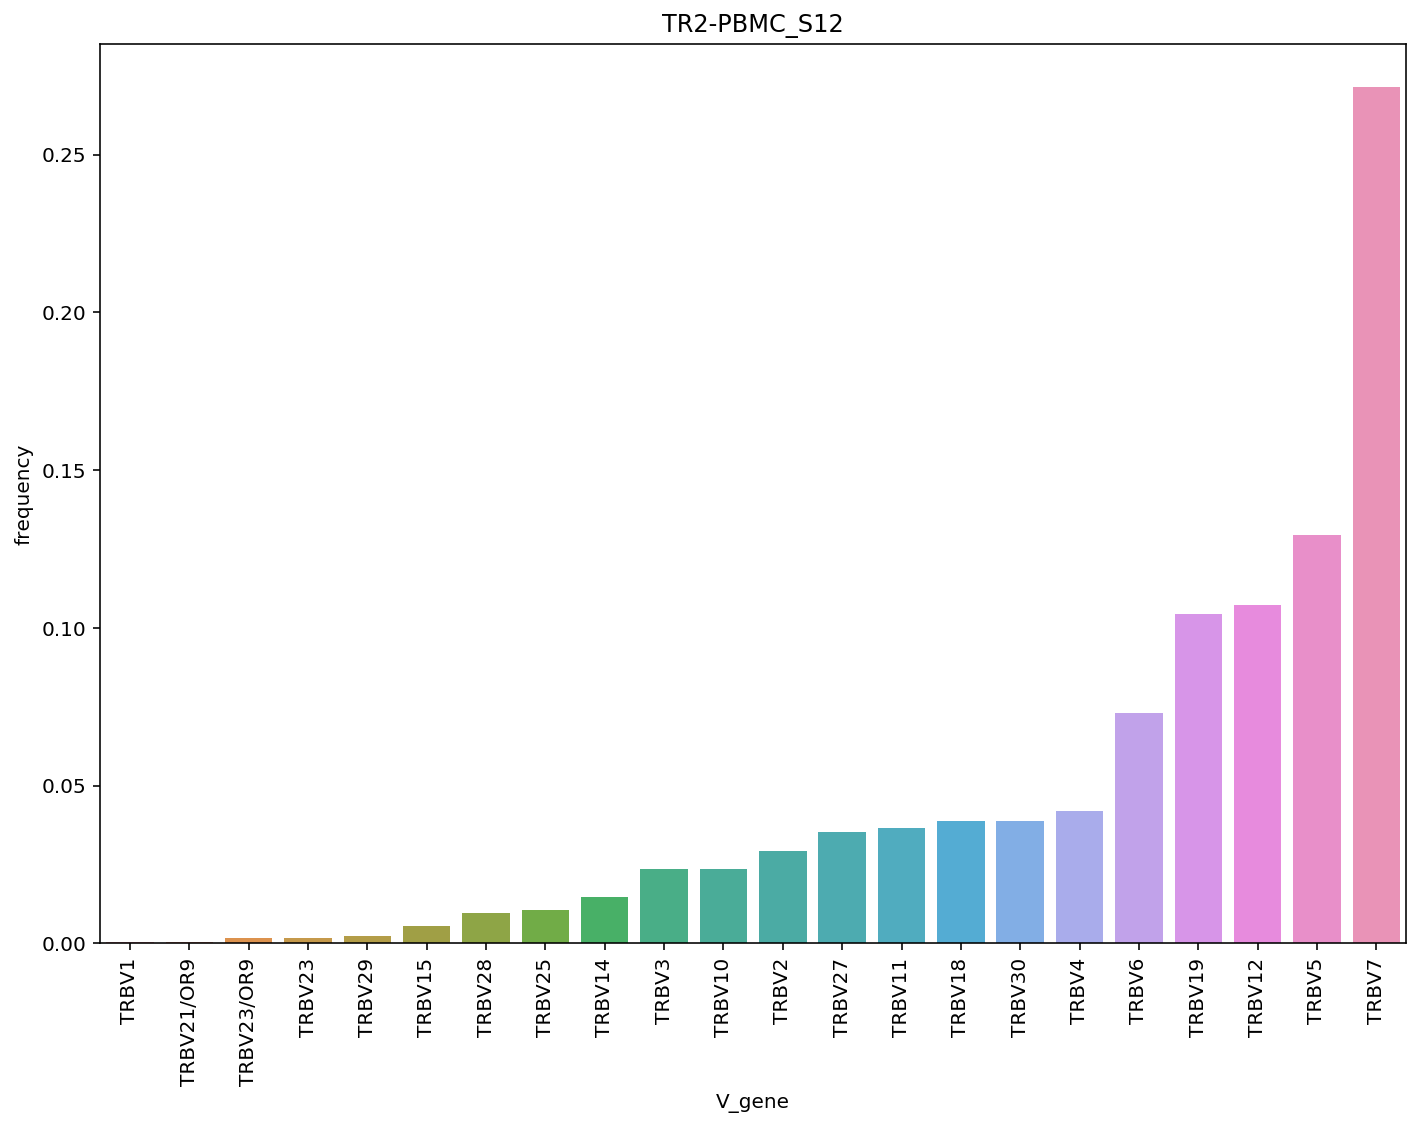

In [72]:
for sample in polyclonal_sample:
    sub_df = df[df['Sample'] == sample]
    v_gene_list = sub_df[~sub_df['V_chains'].str.contains(';')]['V_chains']
    
    if len(v_gene_list) > 0:
        df_v_gene = pd.DataFrame.from_dict(Counter(v_gene_list), orient = 'index').reset_index()
        df_v_gene.columns = ['V_gene', 'count']
        df_v_gene['frequency'] = df_v_gene['count']/sum(df_v_gene['count'])

        fig, ax = plt.subplots(figsize=(11.7, 8.27))
        sns.barplot(x = "V_gene", y = "frequency", data = df_v_gene, order = df_v_gene.sort_values('frequency').V_gene)
        plt.xticks(rotation=90)
        plt.title(sample)

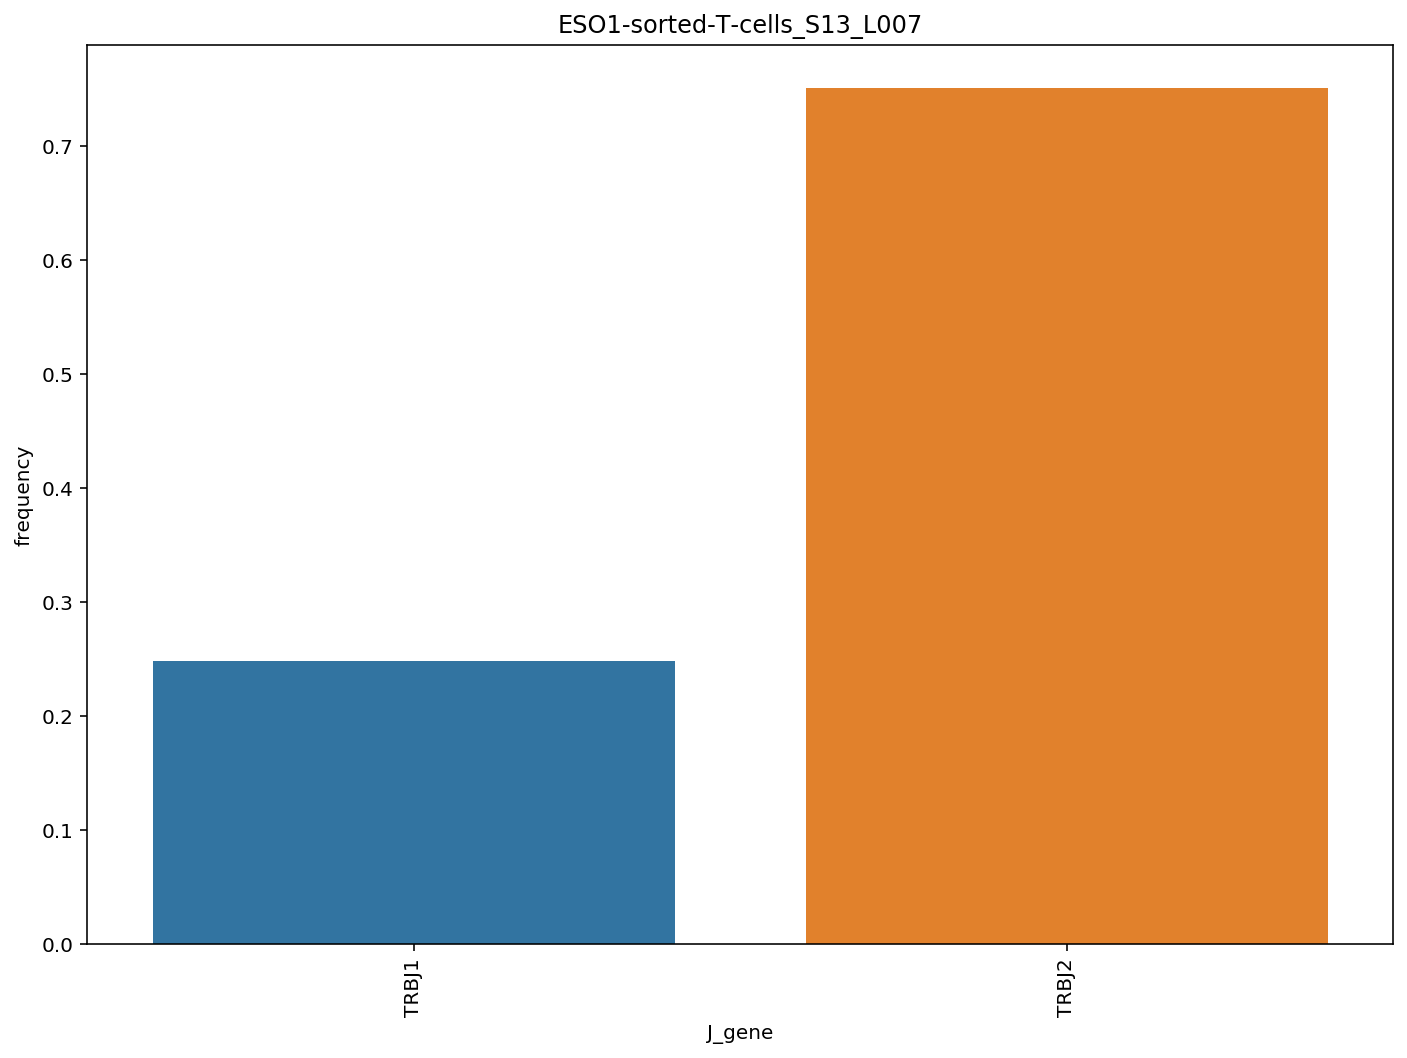

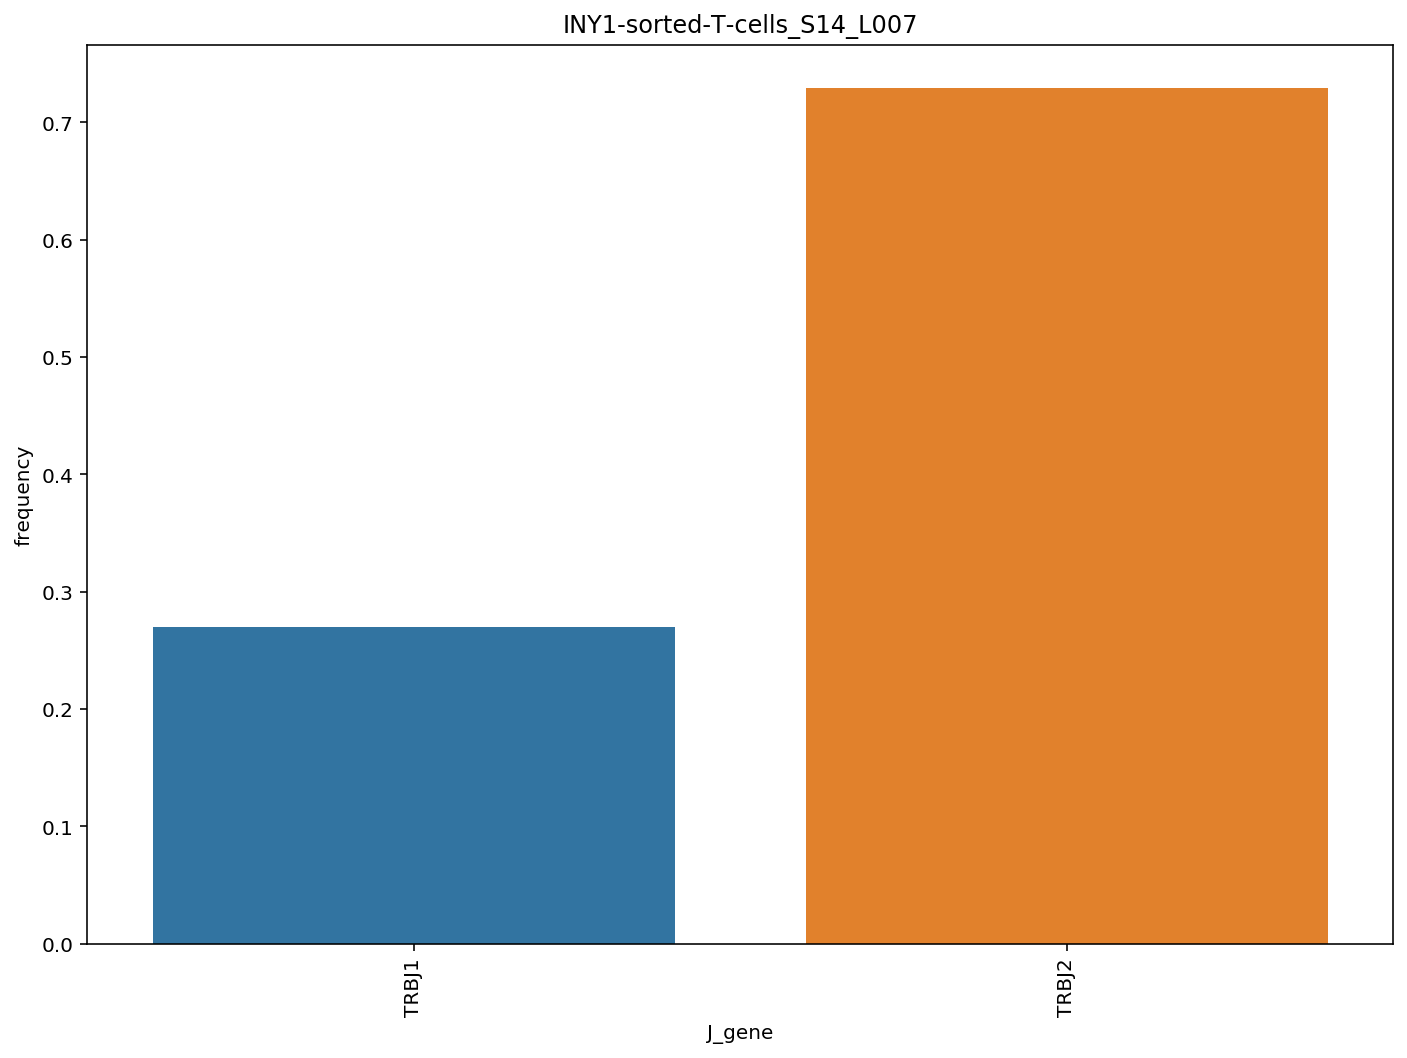

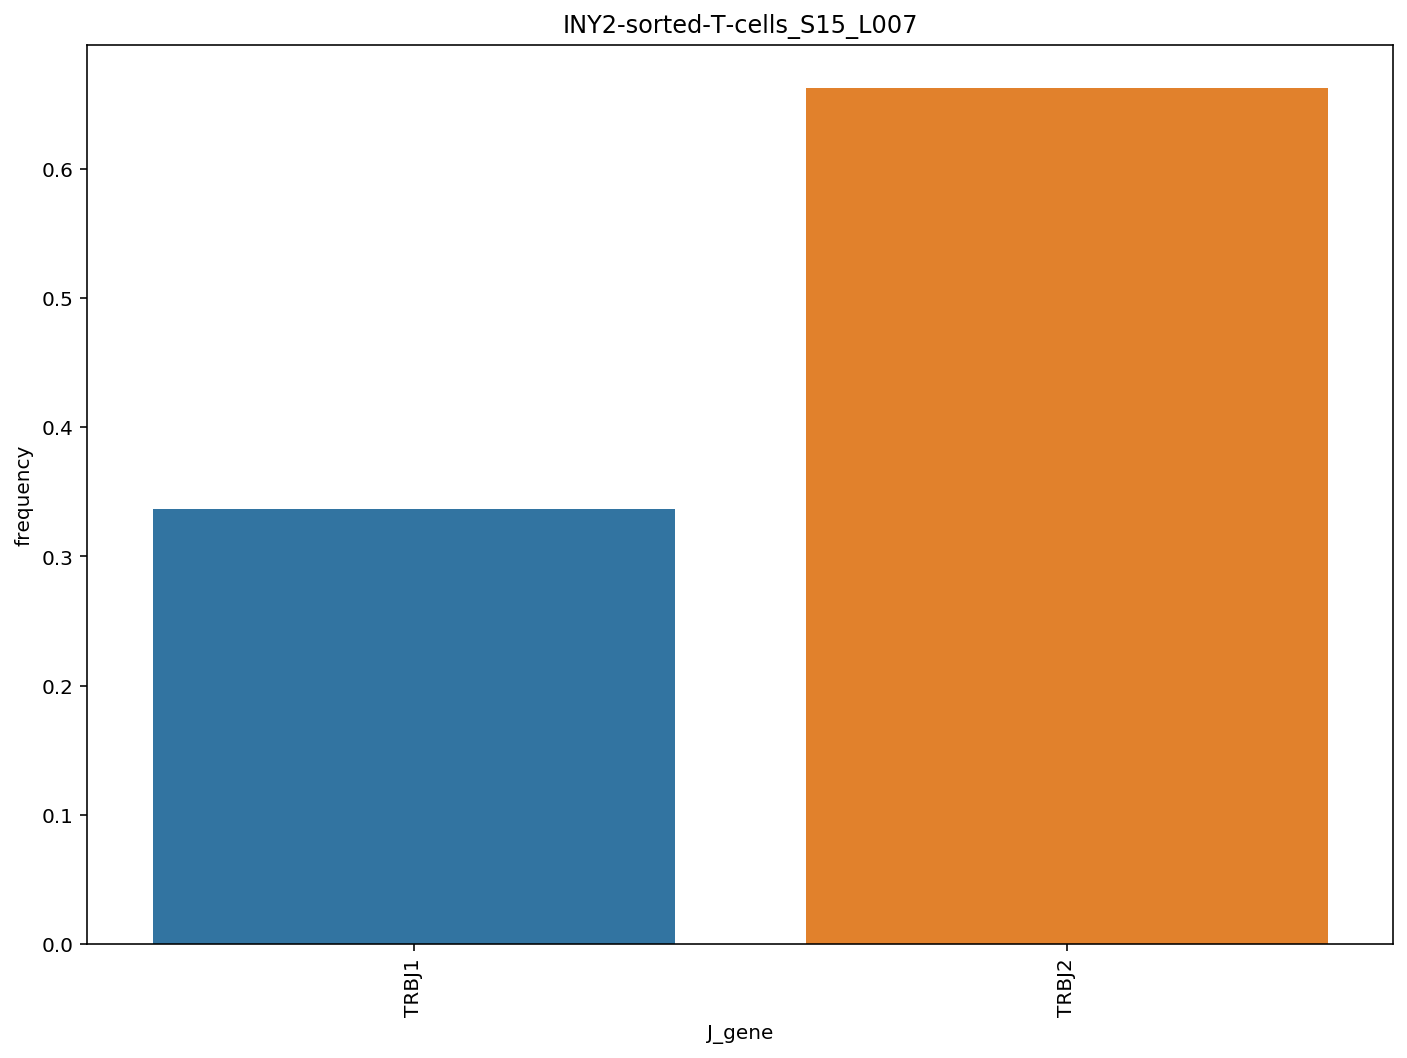

In [73]:
for sample in monoclonal_sample:
    sub_df = df[df['Sample'] == sample]
    j_gene_list = sub_df[~sub_df['J_chains'].str.contains(';')]['J_chains']

    df_j_gene = pd.DataFrame.from_dict(Counter(j_gene_list), orient = 'index').reset_index()
    df_j_gene.columns = ['J_gene', 'count']
    df_j_gene['frequency'] = df_j_gene['count']/sum(df_j_gene['count'])

    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.barplot(x = "J_gene", y = "frequency", data = df_j_gene, order = df_j_gene.sort_values('frequency').J_gene)
    plt.xticks(rotation=90)
    plt.title(sample)

In [132]:
IMREP_v_mono.iloc[17, 0] = IMREP_v_mono.iloc[17, 0].split('/')[0]

In [133]:
IMREP_v_mono.iloc[20, 0] = IMREP_v_mono.iloc[20, 0].split('/')[0]

In [134]:
IMREP_v_mono.columns = ['V_gene', 'IMREP_count', 'IMREP_frequency']
TCR_V_mono.columns = ['V_gene', 'TCR_count', 'TCR_frequency']

IMREP_v_mono['V_gene'] = IMREP_v_mono['V_gene'].apply(lambda x: '{:0>2d}'.format(int(x.split('V')[1])) if (len(x.split('V')[1]) < 2) else x.split('V')[1])
#IMREP_v_mono.merge(TCR_V_mono, on = 'V_gene', how = 'inner')

In [136]:
TCR_V_mono['V_gene'] = TCR_V_mono['V_gene'].apply(lambda x: x.split('V')[1])

In [140]:
IMREP_TCR_v_gene = IMREP_v_mono.merge(TCR_V_mono, on = 'V_gene', how = 'inner')
IMREP_TCR_v_gene.head()

V_gene  IMREP_count  IMREP_frequency  TCR_count  TCR_frequency
0     19          163         0.085744       2543       0.073927
1     07          485         0.255129       4558       0.132504
2     05          177         0.093109       3338       0.097038
3     27          174         0.091531       3072       0.089305
4     06          279         0.146765       4397       0.127823

In [ ]:
### IMREP and TCR common 

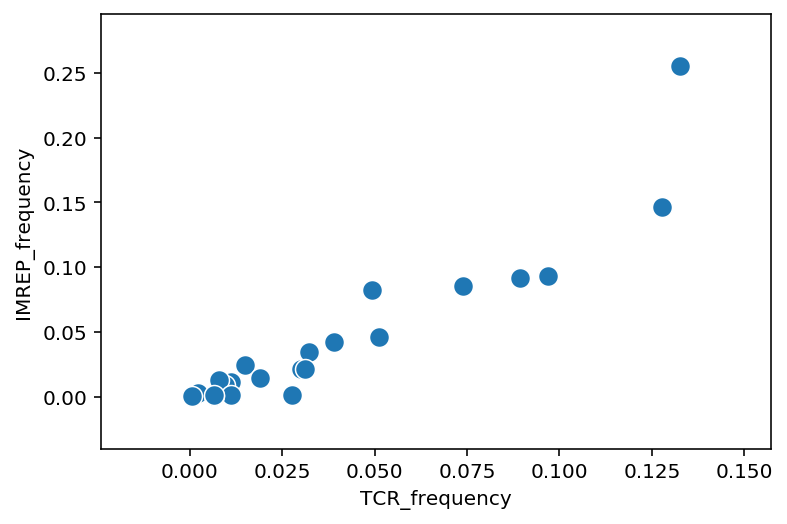

In [141]:
ax = sns.scatterplot(x = 'TCR_frequency', y = 'IMREP_frequency', s = 100, data = IMREP_TCR_v_gene)
ax.grid(False)
plt.show()



# Analysis of TRA vs TRB

### IMREP

In [ ]:
IMREP_tra_df = pd.read_csv("../summary_data/complete_sample/150bp/IMREP_TRA_merged_extracted_features.csv")

# Select Rows with nReads greater than 1
IMREP_tra_df = IMREP_tra_df[IMREP_tra_df['nReads'] > 1]


# # Create column total_reads_in_sample

sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
               'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
               'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
               'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
               'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
               'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

IMREP_tra_df["total_reads_in_sample"] = 0


for sample in sample_names:
    total_imrep_tra_sample_reads = IMREP_tra_df.loc[IMREP_tra_df['Sample'] == sample]['nReads'].sum()
    IMREP_tra_df.loc[IMREP_tra_df['Sample'] == sample, 'total_reads_in_sample'] = total_imrep_tra_sample_reads
    
# Calculate frequency of CDR3 sequence with respect to CDR3s that occur more than once.
IMREP_tra_df["Frequency"] = IMREP_tra_df['nReads'] / (IMREP_tra_df['total_reads_in_sample'] * 1.0)

# rename nReads and frequencies columns according to tool for proper merging.
IMREP_tra_df = IMREP_tra_df.rename(columns={"nReads": "nReads_IMREP", "Frequency": "Frequency_IMREP"})

IMREP_tra_df.head()

### Number of reads

In [ ]:
reads_count_IMREP_trb = IMREP_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_IMREP_trb.reset_index()

reads_count_IMREP_tra = IMREP_tra_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_IMREP_tra.reset_index()

reads_count_IMREP_ab = reads_count_IMREP_trb.merge(reads_count_IMREP_tra, on = 'Sample')
reads_count_IMREP_ab.columns = ['total_reads_in_IMREP_TRB', 'total_reads_in_IMREP_TRA']
reads_count_IMREP_ab

In [ ]:
ax = sns.scatterplot(x = 'total_reads_in_IMREP_TRB', y = 'total_reads_in_IMREP_TRA', s = 100, data = reads_count_IMREP_ab)
ax.grid(False)
plt.show()

### SDI

In [ ]:
IMREP_tra_diversity = []
IMREP_trb_diversity = []

for sample in sample_names:
    IMREP_frequency = IMREP_df.loc[IMREP_df['Sample'] == sample]['Frequency_IMREP']
    IMREP_trb_diversity.append(-np.sum(IMREP_frequency*np.log(IMREP_frequency)))
    
    IMREP_tra_frequency = IMREP_tra_df.loc[IMREP_tra_df['Sample'] == sample]['Frequency_IMREP']
    IMREP_tra_diversity.append(-np.sum(IMREP_tra_frequency*np.log(IMREP_tra_frequency)))


IMREP_ab_diversity = pd.DataFrame({'Sample': sample_names,
                                  'IMREP_TRA_diversity': IMREP_tra_diversity,
                                  'IMREP_TRB_diversity': IMREP_trb_diversity})

IMREP_ab_diversity['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
IMREP_ab_diversity

In [ ]:
ax = sns.scatterplot(x = 'IMREP_TRB_diversity', y = 'IMREP_TRA_diversity', s = 100, data = IMREP_ab_diversity)
ax.grid(False)
plt.show()

### MIXCR

In [ ]:
MIXCR_tra_df = pd.read_csv("../summary_data/complete_sample/150bp/MIXCR_TRA_merged_extracted_features.csv")

# Select Rows with nReads greater than 1
MIXCR_tra_df = MIXCR_tra_df[MIXCR_tra_df['nReads'] > 1]


# # Create column total_reads_in_sample

sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
               'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
               'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
               'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
               'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
               'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

MIXCR_tra_df["total_reads_in_sample"] = 0


for sample in sample_names:
    total_MIXCR_tra_sample_reads = MIXCR_tra_df.loc[MIXCR_tra_df['Sample'] == sample]['nReads'].sum()
    MIXCR_tra_df.loc[MIXCR_tra_df['Sample'] == sample, 'total_reads_in_sample'] = total_MIXCR_tra_sample_reads
    
# Calculate frequency of CDR3 sequence with respect to CDR3s that occur more than once.
MIXCR_tra_df["Frequency"] = MIXCR_tra_df['nReads'] / (MIXCR_tra_df['total_reads_in_sample'] * 1.0)

# rename nReads and frequencies columns according to tool for proper merging.
MIXCR_tra_df = MIXCR_tra_df.rename(columns={"nReads": "nReads_MIXCR", "Frequency": "Frequency_MIXCR"})

MIXCR_tra_df.head()

In [ ]:
reads_count_MIXCR_trb = MIXCR_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_MIXCR_trb.reset_index()

reads_count_MIXCR_tra = MIXCR_tra_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_MIXCR_tra.reset_index()

reads_count_MIXCR_ab = reads_count_MIXCR_trb.merge(reads_count_MIXCR_tra, on = 'Sample')
reads_count_MIXCR_ab.columns = ['total_reads_in_MIXCR_TRB', 'total_reads_in_MIXCR_TRA']
reads_count_MIXCR_ab

In [ ]:
ax = sns.scatterplot(x = 'total_reads_in_MIXCR_TRB', y = 'total_reads_in_MIXCR_TRA', s = 100, data = reads_count_MIXCR_ab)
ax.grid(False)
plt.show()

### SDI

In [ ]:
MIXCR_tra_diversity = []
MIXCR_trb_diversity = []

for sample in sample_names:
    MIXCR_frequency = MIXCR_df.loc[MIXCR_df['Sample'] == sample]['Frequency_MIXCR']
    MIXCR_trb_diversity.append(-np.sum(MIXCR_frequency*np.log(MIXCR_frequency)))
    
    MIXCR_tra_frequency = MIXCR_tra_df.loc[MIXCR_tra_df['Sample'] == sample]['Frequency_MIXCR']
    MIXCR_tra_diversity.append(-np.sum(MIXCR_tra_frequency*np.log(MIXCR_tra_frequency)))


MIXCR_ab_diversity = pd.DataFrame({'Sample': sample_names,
                                  'MIXCR_TRA_diversity': MIXCR_tra_diversity,
                                  'MIXCR_TRB_diversity': MIXCR_trb_diversity})

MIXCR_ab_diversity['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
MIXCR_ab_diversity

In [ ]:
ax = sns.scatterplot(x = 'MIXCR_TRB_diversity', y = 'MIXCR_TRA_diversity', s = 100, data = MIXCR_ab_diversity)
ax.grid(False)
plt.show()

### TRUST4

In [ ]:
TRUST4_tra_df = pd.read_csv("../summary_data/complete_sample/150bp/TRUST4_TRA_merged_extracted_features.csv")

# Select Rows with nReads greater than 1
TRUST4_tra_df = TRUST4_tra_df[TRUST4_tra_df['nReads'] > 1]


# # Create column total_reads_in_sample

sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
               'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
               'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
               'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
               'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
               'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

TRUST4_tra_df["total_reads_in_sample"] = 0


for sample in sample_names:
    total_TRUST4_tra_sample_reads = TRUST4_tra_df.loc[TRUST4_tra_df['Sample'] == sample]['nReads'].sum()
    TRUST4_tra_df.loc[TRUST4_tra_df['Sample'] == sample, 'total_reads_in_sample'] = total_TRUST4_tra_sample_reads
    
# Calculate frequency of CDR3 sequence with respect to CDR3s that occur more than once.
TRUST4_tra_df["Frequency"] = TRUST4_tra_df['nReads'] / (TRUST4_tra_df['total_reads_in_sample'] * 1.0)

# rename nReads and frequencies columns according to tool for proper merging.
TRUST4_tra_df = TRUST4_tra_df.rename(columns={"nReads": "nReads_TRUST4", "Frequency": "Frequency_TRUST4"})

TRUST4_tra_df.head()

In [ ]:
reads_count_TRUST4_trb = TRUST4_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_TRUST4_trb.reset_index()

reads_count_TRUST4_tra = TRUST4_tra_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_TRUST4_tra.reset_index()

reads_count_TRUST4_ab = reads_count_TRUST4_trb.merge(reads_count_TRUST4_tra, on = 'Sample')
reads_count_TRUST4_ab.columns = ['total_reads_in_TRUST4_TRB', 'total_reads_in_TRUST4_TRA']
reads_count_TRUST4_ab

In [ ]:
ax = sns.scatterplot(x = 'total_reads_in_TRUST4_TRB', y = 'total_reads_in_TRUST4_TRA', s = 100, data = reads_count_TRUST4_ab)
ax.grid(False)
plt.show()

### SDI

In [ ]:
TRUST4_tra_diversity = []
TRUST4_trb_diversity = []

for sample in sample_names:
    TRUST4_frequency = TRUST4_df.loc[TRUST4_df['Sample'] == sample]['Frequency_TRUST4']
    TRUST4_trb_diversity.append(-np.sum(TRUST4_frequency*np.log(TRUST4_frequency)))
    
    TRUST4_tra_frequency = TRUST4_tra_df.loc[TRUST4_tra_df['Sample'] == sample]['Frequency_TRUST4']
    TRUST4_tra_diversity.append(-np.sum(TRUST4_tra_frequency*np.log(TRUST4_tra_frequency)))


TRUST4_ab_diversity = pd.DataFrame({'Sample': sample_names,
                                  'TRUST4_TRA_diversity': TRUST4_tra_diversity,
                                  'TRUST4_TRB_diversity': TRUST4_trb_diversity})

TRUST4_ab_diversity['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
TRUST4_ab_diversity

In [ ]:
ax = sns.scatterplot(x = 'TRUST4_TRB_diversity', y = 'TRUST4_TRA_diversity', s = 100, data = TRUST4_ab_diversity)
ax.grid(False)
plt.show()

# Shorter RNA-Seq reads

## 75bp

In [ ]:
IMREP_75bp_df = pd.read_csv("../summary_data/complete_sample/75bp/IMREP_TRB_merged_extracted_features.csv")
MIXCR_75bp_df = pd.read_csv("../summary_data/complete_sample/75bp/MIXCR_TRB_merged_extracted_features.csv")
TRUST4_75bp_df = pd.read_csv("../summary_data/complete_sample/75bp/TRUST4_TRB_merged_extracted_features.csv")

In [ ]:
# Select Rows with nReads greater than 1
IMREP_75bp_df = IMREP_75bp_df[IMREP_75bp_df['nReads'] > 1]
MIXCR_75bp_df = MIXCR_75bp_df[MIXCR_75bp_df['nReads'] > 1]
TRUST4_75bp_df = TRUST4_75bp_df[TRUST4_75bp_df['nReads'] > 1]
#IMREP_50bp_df = IMREP_50bp_df[IMREP_50bp_df['nReads'] > 1]


# # Create column total_reads_in_sample

sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
               'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
               'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
               'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
               'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
               'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

IMREP_75bp_df["total_reads_in_sample"] = 0
MIXCR_75bp_df["total_reads_in_sample"] = 0
TRUST4_75bp_df["total_reads_in_sample"] = 0

#IMREP_50bp_df["total_reads_in_sample"] = 0


for sample in sample_names:
    total_imrep_75bp_sample_reads = IMREP_75bp_df.loc[IMREP_75bp_df['Sample'] == sample]['nReads'].sum()
    IMREP_75bp_df.loc[IMREP_75bp_df['Sample'] == sample, 'total_reads_in_sample'] = total_imrep_75bp_sample_reads
    
    total_mixcr_75bp_sample_reads = MIXCR_75bp_df.loc[MIXCR_75bp_df['Sample'] == sample]['nReads'].sum()
    MIXCR_75bp_df.loc[MIXCR_75bp_df['Sample'] == sample, 'total_reads_in_sample'] = total_mixcr_75bp_sample_reads
    
    total_trust4_75bp_sample_reads = TRUST4_75bp_df.loc[TRUST4_75bp_df['Sample'] == sample]['nReads'].sum()
    TRUST4_75bp_df.loc[TRUST4_75bp_df['Sample'] == sample, 'total_reads_in_sample'] = total_trust4_75bp_sample_reads
    
    #total_imrep_50bp_sample_reads = IMREP_50bp_df.loc[IMREP_50bp_df['Sample'] == sample]['nReads'].sum()
    #IMREP_50bp_df.loc[IMREP_50bp_df['Sample'] == sample, 'total_reads_in_sample'] = total_imrep_50bp_sample_reads
    
# Calculate frequency of CDR3 sequence with respect to CDR3s that occur more than once.
IMREP_75bp_df["Frequency"] = IMREP_75bp_df['nReads'] / (IMREP_75bp_df['total_reads_in_sample'] * 1.0)
MIXCR_75bp_df["Frequency"] = MIXCR_75bp_df['nReads'] / (MIXCR_75bp_df['total_reads_in_sample'] * 1.0)
TRUST4_75bp_df["Frequency"] = TRUST4_75bp_df['nReads'] / (TRUST4_75bp_df['total_reads_in_sample'] * 1.0)


#IMREP_50bp_df["Frequency"] = IMREP_50bp_df['nReads'] / (IMREP_50bp_df['total_reads_in_sample'] * 1.0)


# rename nReads and frequencies columns according to tool for proper merging.
IMREP_75bp_df = IMREP_75bp_df.rename(columns={"nReads": "nReads_IMREP", "Frequency": "Frequency_IMREP"})
MIXCR_75bp_df = MIXCR_75bp_df.rename(columns={"nReads": "nReads_MIXCR", "Frequency": "Frequency_MIXCR"})
TRUST4_75bp_df = TRUST4_75bp_df.rename(columns={"nReads": "nReads_TRUST4", "Frequency": "Frequency_TRUST4"})
#IMREP_50bp_df = IMREP_50bp_df.rename(columns={"nReads": "nReads_IMREP", "Frequency": "Frequency_IMREP"})


In [ ]:
IMREP_75bp_append = pd.DataFrame({'Sample': ['HM-baseline1C_CGATGT', 'PT0112-B_S3', 'PT0285-B_S5'],
                                  'CDR3': [None, None, None],
                                  'nReads_MIXCR': [0, 0, 0],
                                  'total_reads_in_sample': [0, 0, 0],
                                  'Frequency_MIXCR': [0, 0, 0]})
IMREP_75bp_df = IMREP_75bp_df.append(IMREP_75bp_append, ignore_index=True)
IMREP_75bp_df = IMREP_75bp_df.sort_values('Sample')

In [ ]:
MIXCR_75bp_append = pd.DataFrame({'Sample': ['HM-baseline1C_CGATGT', 'PT0285-B_S5'],
                                  'CDR3': [None, None],
                                  'nReads_MIXCR': [0, 0],
                                  'total_reads_in_sample': [0, 0],
                                  'Frequency_MIXCR': [0, 0]})
MIXCR_75bp_df = MIXCR_75bp_df.append(MIXCR_75bp_append, ignore_index=True)
MIXCR_75bp_df = MIXCR_75bp_df.sort_values('Sample')

In [ ]:
TRUST4_75bp_append = pd.DataFrame({'Sample': ['HM-baseline1C_CGATGT', 'MP-11-28-12RNA_S2','PT0285-B_S5', 'RAS-baseline_TGACCA'],
                                  'CDR3': [None, None, None, None],
                                  'nReads_TRUST4': [0, 0, 0, 0],
                                  'total_reads_in_sample': [0, 0, 0, 0],
                                  'Frequency_TRUST4': [0, 0, 0, 0]})
TRUST4_75bp_df = TRUST4_75bp_df.append(TRUST4_75bp_append, ignore_index=True)
TRUST4_75bp_df = TRUST4_75bp_df.sort_values('Sample')

### Number of supporting reads in each sample

In [ ]:
reads_count_IMREP_75bp = IMREP_75bp_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_IMREP_75bp.reset_index()

reads_count_MIXCR_75bp = MIXCR_75bp_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_IMREP_75bp.reset_index()

reads_count_TRUST4_75bp = TRUST4_75bp_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_TRUST4_75bp.reset_index()
#reads_count_IMREP_50bp = IMREP_50bp_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_IMREP_50bp.reset_index()

In [ ]:
read_count_75bp = reads_count_IMREP_75bp.merge(reads_count_MIXCR_75bp, on = 'Sample', how = 'outer')
read_count_75bp = read_count_75bp.merge(reads_count_TRUST4_75bp, on = 'Sample', how = 'outer')
read_count_75bp = read_count_75bp.merge(read_count['TCR_total_reads'], on = 'Sample', how = 'outer')
read_count_75bp.columns = ['IMREP_75bp_reads', 'MIXCR_75bp_reads', 'TRSUT4_75bp_reads', 'TCR_reads']
#read_count_75bp['TCR_reads'] = read_count['TCR_total_reads']

In [ ]:
read_count_75bp = read_count_75bp.reset_index()
melt_read_count_75bp = pd.melt(read_count_75bp, id_vars = 'Sample', value_vars = ['IMREP_75bp_reads', 'MIXCR_75bp_reads', 'TRSUT4_75bp_reads', 'TCR_reads'], var_name = 'tools', value_name = 'total_reads_in_sample')

In [ ]:
plt.figure(figsize=(11.7, 8.27))
sns.barplot(x = 'tools', y = 'total_reads_in_sample', hue = 'Sample', data = melt_read_count_75bp)
plt.xlabel('RNA-Seq Tools') 
plt.ylabel('Number of reads')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()

### Number of clones in each sample

In [ ]:
clone_size_IMREP_75bp = IMREP_75bp_df[['Sample', 'CDR3']].groupby('Sample').count()
clone_size_MIXCR_75bp = MIXCR_75bp_df[['Sample', 'CDR3']].groupby('Sample').count()
clone_size_TRUST4_75bp = TRUST4_75bp_df[['Sample', 'CDR3']].groupby('Sample').count()

clone_size_75bp = clone_size_IMREP_75bp.merge(clone_size_MIXCR_75bp, on = 'Sample', how = 'outer')
clone_size_75bp = clone_size_75bp.merge(clone_size_TRUST4_75bp, on = 'Sample', how = 'outer')
clone_size_75bp = clone_size_75bp.merge(normalized_size[['Sample','TCR_CDR3']], on = 'Sample', how = 'outer')
clone_size_75bp.columns = ['Sample', 'IMREP_75bp_clones', 'MIXCR_75bp_clones', 'TRSUT4_75bp_clones', 'TCR_clones']

In [ ]:
melt_clone_size_75bp = pd.melt(clone_size_75bp, id_vars = 'Sample', value_vars = ['IMREP_75bp_clones', 'MIXCR_75bp_clones', 'TRSUT4_75bp_clones', 'TCR_clones'], var_name = 'tools', value_name = 'clone_size_in_sample')

In [ ]:
plt.figure(figsize=(11.7, 8.27))
sns.barplot(x = 'tools', y = 'clone_size_in_sample', hue = 'Sample', data = melt_clone_size_75bp)
plt.xlabel('RNA-Seq Tools') 
plt.ylabel('Number of clones')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()

### SDI of each sample

In [ ]:
IMREP_75bp_diversity = []
#IMREP_50bp_diversity = []
MIXCR_75bp_diversity = []
TRUST4_75bp_diversity = []

for sample in sample_names:
    IMREP_75bp_frequency = IMREP_75bp_df.loc[IMREP_75bp_df['Sample'] == sample]['Frequency_IMREP']
    IMREP_75bp_diversity.append(-np.sum(IMREP_75bp_frequency*np.log(IMREP_75bp_frequency)))
    
    MIXCR_75bp_frequency = MIXCR_75bp_df.loc[MIXCR_75bp_df['Sample'] == sample]['Frequency_MIXCR']
    MIXCR_75bp_diversity.append(-np.sum(MIXCR_75bp_frequency*np.log(MIXCR_75bp_frequency)))
    
    TRUST4_75bp_frequency = TRUST4_75bp_df.loc[TRUST4_75bp_df['Sample'] == sample]['Frequency_TRUST4']
    TRUST4_75bp_diversity.append(-np.sum(TRUST4_75bp_frequency*np.log(TRUST4_75bp_frequency)))

diversity_df['IMREP_75bp_diversity'] = IMREP_75bp_diversity
diversity_df['MIXCR_75bp_diversity'] = MIXCR_75bp_diversity
diversity_df['TRUST4_75bp_diversity'] = TRUST4_75bp_diversity
#diversity_df['IMREP_50bp_diversity'] = IMREP_50bp_diversity
#diversity_df

In [ ]:
#Overall
IMREP_75bp_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['IMREP_75bp_diversity'])/diversity_df['TCR_diversity'])
MIXCR_75bp_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['MIXCR_75bp_diversity'])/diversity_df['TCR_diversity'])
TRUST4_75bp_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['TRUST4_75bp_diversity'])/diversity_df['TCR_diversity'])

#PBMC
PBMC_75bp_diversity_df = diversity_df[diversity_df['sample_type'] == 'PBMC']
IMREP_75bp_PBMC_SDI = np.mean(np.abs(PBMC_75bp_diversity_df['TCR_diversity'] - PBMC_75bp_diversity_df['IMREP_75bp_diversity'])/PBMC_75bp_diversity_df['TCR_diversity'])
MIXCR_75bp_PBMC_SDI = np.mean(np.abs(PBMC_75bp_diversity_df['TCR_diversity'] - PBMC_75bp_diversity_df['MIXCR_75bp_diversity'])/PBMC_75bp_diversity_df['TCR_diversity'])
TRUST4_75bp_PBMC_SDI = np.mean(np.abs(PBMC_75bp_diversity_df['TCR_diversity'] - PBMC_75bp_diversity_df['TRUST4_75bp_diversity'])/PBMC_75bp_diversity_df['TCR_diversity'])

#tumor
tumor_75bp_diversity_df = diversity_df[diversity_df['sample_type'] == 'tumor']
IMREP_tumor_SDI = np.mean(np.abs(tumor_75bp_diversity_df['TCR_diversity'] - tumor_75bp_diversity_df['IMREP_75bp_diversity'])/tumor_75bp_diversity_df['TCR_diversity'])
MIXCR_tumor_SDI = np.mean(np.abs(tumor_75bp_diversity_df['TCR_diversity'] - tumor_75bp_diversity_df['MIXCR_75bp_diversity'])/tumor_75bp_diversity_df['TCR_diversity'])
TRUST4_tumor_SDI = np.mean(np.abs(tumor_75bp_diversity_df['TCR_diversity'] - tumor_75bp_diversity_df['TRUST4_75bp_diversity'])/tumor_75bp_diversity_df['TCR_diversity'])

#monoclonal
mono_SDI = diversity_df[diversity_df['Sample'].isin(monoclonal_sample)]
IMREP_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['IMREP_75bp_diversity'])/mono_SDI['TCR_diversity'])
MIXCR_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['MIXCR_75bp_diversity'])/mono_SDI['TCR_diversity'])
TRUST4_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['TRUST4_75bp_diversity'])/mono_SDI['TCR_diversity'])

#polyvlonal
poly_SDI = diversity_df[diversity_df['Sample'].isin(polyclonal_sample)]
IMREP_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['IMREP_75bp_diversity'])/poly_SDI['TCR_diversity'])
MIXCR_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['MIXCR_75bp_diversity'])/poly_SDI['TCR_diversity'])
TRUST4_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['TRUST4_75bp_diversity'])/poly_SDI['TCR_diversity'])

SDI_75bp_re = pd.DataFrame({'Tools':['IMREP', 'MIXCR', 'TRUST4'], 
                           'Overall': [IMREP_75bp_overall_SDI, MIXCR_75bp_overall_SDI, TRUST4_75bp_overall_SDI],
                           'PBMC': [IMREP_75bp_PBMC_SDI, MIXCR_75bp_PBMC_SDI, TRUST4_75bp_PBMC_SDI],
                           'Tumor': [IMREP_tumor_SDI, MIXCR_tumor_SDI, TRUST4_tumor_SDI],
                           'Monoclonal': [IMREP_mono_SDI, MIXCR_mono_SDI, TRUST4_mono_SDI],
                           'Polyclonal': [IMREP_poly_SDI, MIXCR_poly_SDI, TRUST4_poly_SDI]})
SDI_75bp_re

### TCR largest clone's frequency in RNA-Seq tools 

In [ ]:
TCR_max_clone_in_IMREP_75bp = []
TCR_max_clone_in_MIXCR_75bp = []
TCR_max_clone_in_TRUST4_75bp = []
#TCR_max_clone_in_IMREP_50bp = []

for sample in sample_names:
    TCR_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['TCR_max_clone'].to_numpy()[0]
    if len(IMREP_75bp_df[(IMREP_75bp_df['Sample'] == sample) & (IMREP_75bp_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP']) > 0:
        TCR_max_clone_in_IMREP_75bp.append(IMREP_75bp_df[(IMREP_75bp_df['Sample'] == sample) & (IMREP_75bp_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP'].to_numpy()[0])
    else:
        TCR_max_clone_in_IMREP_75bp.append(0)
        
    if len(MIXCR_75bp_df[(MIXCR_75bp_df['Sample'] == sample) & (MIXCR_75bp_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR']) > 0:
        TCR_max_clone_in_MIXCR_75bp.append(MIXCR_75bp_df[(MIXCR_75bp_df['Sample'] == sample) & (MIXCR_75bp_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR'].to_numpy()[0])
    else:
        TCR_max_clone_in_MIXCR_75bp.append(0)
        
    if len(TRUST4_75bp_df[(TRUST4_75bp_df['Sample'] == sample) & (TRUST4_75bp_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4']) > 0:
        TCR_max_clone_in_TRUST4_75bp.append(TRUST4_75bp_df[(TRUST4_75bp_df['Sample'] == sample) & (TRUST4_75bp_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4'].to_numpy()[0])
    else:
        TCR_max_clone_in_TRUST4_75bp.append(0)
    
    
TCR_max_clone_in_tools['in_IMREP_75bp'] = TCR_max_clone_in_IMREP_75bp
TCR_max_clone_in_tools['in_MIXCR_75bp'] = TCR_max_clone_in_MIXCR_75bp
TCR_max_clone_in_tools['in_TRUST4_75bp'] = TCR_max_clone_in_TRUST4_75bp
#TCR_max_clone_in_tools['in_IMREP_50bp'] = TCR_max_clone_in_IMREP_50bp

#TCR_max_clone_in_tools

In [ ]:
ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_IMREP_75bp', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_MIXCR_75bp', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_TRUST4_75bp', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

### TPR, FPR and FNR

In [ ]:
TRUST4_75bp_TPR = []
TRUST4_75bp_FNR = []
TRUST4_75bp_FPR = []
for sample in sample_names:
#sample = 'CMT-baseline1C_CAGATC'
    sub_TRUST4_75bp_df = TRUST4_75bp_df[TRUST4_75bp_df['Sample'] == sample]
    sub_TCR_df = TCR_df[TCR_df['Sample'] == sample]

    TRUST4_TP =len(set(sub_TRUST4_75bp_df['CDR3']).intersection(set(sub_TCR_df['CDR3'])))
    TRUST4_FN = len(set(sub_TRUST4_75bp_df['CDR3']) - set(sub_TCR_df['CDR3']))
    TRUST4_FP = len(set(sub_TCR_df['CDR3']) - set(sub_TRUST4_75bp_df['CDR3']))

    if TRUST4_TP + TRUST4_FN == 0:
        TRUST4_TPR = None
    else:
        TRUST4_TPR = TRUST4_TP/(TRUST4_TP + TRUST4_FN)
        TRUST4_75bp_TPR.append(TRUST4_TPR)

    if TRUST4_TP + TRUST4_FN == 0:
        TRUST4_FNR = None
    else:
        TRUST4_FNR = TRUST4_FN/(TRUST4_TP + TRUST4_FN)
        TRUST4_75bp_FNR.append(TRUST4_FNR)

    if TRUST4_FP + TRUST4_TP == 0:
        TRUST4_FPR = None
    else:
        TRUST4_FPR = TRUST4_FP/(TRUST4_FP + TRUST4_TP)
        TRUST4_75bp_FPR.append(TRUST4_FPR)

In [ ]:
IMREP_75bp_TPR = []
IMREP_75bp_FNR = []
IMREP_75bp_FPR = []

MIXCR_75bp_TPR = []
MIXCR_75bp_FNR = []
MIXCR_75bp_FPR = []

TRUST4_75bp_TPR = []
TRUST4_75bp_FNR = []
TRUST4_75bp_FPR = []

for sample in sample_names:
    sub_IMREP_75bp_df = IMREP_75bp_df[IMREP_75bp_df['Sample'] == sample]
    sub_MIXCR_75bp_df = MIXCR_75bp_df[MIXCR_75bp_df['Sample'] == sample]
    sub_TRUST4_75bp_df = TRUST4_75bp_df[TRUST4_75bp_df['Sample'] == sample]
    sub_TCR_df = TCR_df[TCR_df['Sample'] == sample]
    
    IMREP_TP = len(set(sub_IMREP_75bp_df['CDR3']).intersection(set(sub_TCR_df['CDR3'])))
    IMREP_FN = len(set(sub_IMREP_75bp_df['CDR3']) - set(sub_TCR_df['CDR3']))
    IMREP_FP = len(set(sub_TCR_df['CDR3']) - set(sub_IMREP_75bp_df['CDR3']))
    
    MIXCR_TP = len(set(sub_MIXCR_75bp_df['CDR3']).intersection(set(sub_TCR_df['CDR3'])))
    MIXCR_FN = len(set(sub_MIXCR_75bp_df['CDR3']) - set(sub_TCR_df['CDR3']))
    MIXCR_FP = len(set(sub_TCR_df['CDR3']) - set(sub_MIXCR_75bp_df['CDR3']))
    
    TRUST4_TP =len(set(sub_TRUST4_75bp_df['CDR3']).intersection(set(sub_TCR_df['CDR3'])))
    TRUST4_FN = len(set(sub_TRUST4_75bp_df['CDR3']) - set(sub_TCR_df['CDR3']))
    TRUST4_FP = len(set(sub_TCR_df['CDR3']) - set(sub_TRUST4_75bp_df['CDR3']))

    if IMREP_TP + IMREP_FN == 0:
        IMREP_TPR = None
    else:
        IMREP_TPR = IMREP_TP/(IMREP_TP + IMREP_FN)
        IMREP_75bp_TPR.append(IMREP_TPR)
    
    if IMREP_TP + IMREP_FN == 0:
        IMREP_FNR = None
    else:
        IMREP_FNR = IMREP_FN/(IMREP_TP + IMREP_FN)
        IMREP_75bp_FNR.append(IMREP_FNR)
        
    if IMREP_FP + IMREP_TP == 0:
        IMREP_FPR = None
    else:
        IMREP_FPR = IMREP_FP/(IMREP_FP + IMREP_TP)
        IMREP_75bp_FPR.append(IMREP_FPR)
    
    if MIXCR_TP + MIXCR_FN == 0:
        MIXCR_TPR = None
    else:
        MIXCR_TPR = MIXCR_TP/(MIXCR_TP + MIXCR_FN)
        MIXCR_75bp_TPR.append(MIXCR_TPR)
    
    if MIXCR_TP + MIXCR_FN == 0:
        MIXCR_FNR = None
    else:
        MIXCR_FNR = MIXCR_FN/(MIXCR_TP + MIXCR_FN)
        MIXCR_75bp_FNR.append(MIXCR_FNR)
        
    if MIXCR_FP + MIXCR_TP == 0:
        MIXCR_FPR = None
    else:
        MIXCR_FPR = MIXCR_FP/(MIXCR_FP + MIXCR_TP)
        MIXCR_75bp_FPR.append(MIXCR_FPR)
    
    if TRUST4_TP + TRUST4_FN == 0:
        TRUST4_TPR = None
    else:
        TRUST4_TPR = TRUST4_TP/(TRUST4_TP + TRUST4_FN)
        TRUST4_75bp_TPR.append(TRUST4_TPR)
    
    if TRUST4_TP + TRUST4_FN == 0:
        TRUST4_FNR = None
    else:
        TRUST4_FNR = TRUST4_FN/(TRUST4_TP + TRUST4_FN)
        TRUST4_75bp_FNR.append(TRUST4_FNR)
        
    if TRUST4_FP + TRUST4_TP == 0:
        TRUST4_FPR = None
    else:
        TRUST4_FPR = TRUST4_FP/(TRUST4_FP + TRUST4_TP)
        TRUST4_75bp_FPR.append(TRUST4_FPR)
    

confusion_75bp = pd.DataFrame({'Sample': sample_names, 'IMREP_75bp_TPR': IMREP_75bp_TPR,
                               'IMREP_75bp_FNR': IMREP_75bp_FNR, 'IMREP_75bp_FPR': IMREP_75bp_FPR,
                               'MIXCR_75bp_TPR': MIXCR_75bp_TPR, 'MIXCR_75bp_FNR': MIXCR_75bp_FNR, 
                               'MIXCR_75bp_FPR': MIXCR_75bp_FPR, 'TRUST4_75bp_TPR': TRUST4_75bp_TPR,
                               'TRUST4_75bp_FNR': TRUST4_75bp_FNR, 'TRUST4_75bp_FPR': TRUST4_75bp_FPR
                            })
confusion_75bp

## 50bp

In [ ]:
IMREP_50bp_df = pd.read_csv("../summary_data/complete_sample/50bp/IMREP_TRB_merged_extracted_features.csv")
MIXCR_50bp_df = pd.read_csv("../summary_data/complete_sample/50bp/MIXCR_TRB_merged_extracted_features.csv")
TRUST4_50bp_df = pd.read_csv("../summary_data/complete_sample/50bp/TRUST4_TRB_merged_extracted_features.csv")

In [ ]:
# Select Rows with nReads greater than 1
IMREP_50bp_df = IMREP_50bp_df[IMREP_50bp_df['nReads'] > 1]
MIXCR_50bp_df = MIXCR_50bp_df[MIXCR_50bp_df['nReads'] > 1]
TRUST4_50bp_df = TRUST4_50bp_df[TRUST4_50bp_df['nReads'] > 1]

# # Create column total_reads_in_sample

sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
               'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
               'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
               'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
               'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
               'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

IMREP_50bp_df["total_reads_in_sample"] = 0
MIXCR_50bp_df["total_reads_in_sample"] = 0
TRUST4_50bp_df["total_reads_in_sample"] = 0

for sample in sample_names:
    total_imrep_50bp_sample_reads = IMREP_50bp_df.loc[IMREP_50bp_df['Sample'] == sample]['nReads'].sum()
    IMREP_50bp_df.loc[IMREP_50bp_df['Sample'] == sample, 'total_reads_in_sample'] = total_imrep_50bp_sample_reads
    
    total_mixcr_50bp_sample_reads = MIXCR_50bp_df.loc[MIXCR_50bp_df['Sample'] == sample]['nReads'].sum()
    MIXCR_50bp_df.loc[MIXCR_50bp_df['Sample'] == sample, 'total_reads_in_sample'] = total_mixcr_50bp_sample_reads
    
    total_trust4_50bp_sample_reads = TRUST4_50bp_df.loc[TRUST4_50bp_df['Sample'] == sample]['nReads'].sum()
    TRUST4_50bp_df.loc[TRUST4_50bp_df['Sample'] == sample, 'total_reads_in_sample'] = total_trust4_50bp_sample_reads
    
    
# Calculate frequency of CDR3 sequence with respect to CDR3s that occur more than once.
IMREP_50bp_df["Frequency"] = IMREP_50bp_df['nReads'] / (IMREP_50bp_df['total_reads_in_sample'] * 1.0)
MIXCR_50bp_df["Frequency"] = MIXCR_50bp_df['nReads'] / (MIXCR_50bp_df['total_reads_in_sample'] * 1.0)
TRUST4_50bp_df["Frequency"] = TRUST4_50bp_df['nReads'] / (TRUST4_50bp_df['total_reads_in_sample'] * 1.0)

# rename nReads and frequencies columns according to tool for proper merging.
IMREP_50bp_df = IMREP_50bp_df.rename(columns={"nReads": "nReads_IMREP", "Frequency": "Frequency_IMREP"})
MIXCR_50bp_df = MIXCR_50bp_df.rename(columns={"nReads": "nReads_MIXCR", "Frequency": "Frequency_MIXCR"})
TRUST4_50bp_df = TRUST4_50bp_df.rename(columns={"nReads": "nReads_TRUST4", "Frequency": "Frequency_TRUST4"})

In [ ]:
IMREP_50bp_append = pd.DataFrame({'Sample': ['CMT-baseline1C_CAGATC','HM-baseline1C_CGATGT', 'JSSBaseline-RNA_GTGAAA',
                                             'LEK-OT110712A_CCGTCC','PT0112-B_S3', 'PT0310_S9', 'RAS-baseline_TGACCA'],
                                  'CDR3': [None] * 7,
                                  'nReads_MIXCR': [0] * 7,
                                  'total_reads_in_sample': [0] * 7,
                                  'Frequency_MIXCR': [0] * 7})
IMREP_50bp_df = IMREP_50bp_df.append(IMREP_50bp_append, ignore_index=True)
IMREP_50bp_df = IMREP_50bp_df.sort_values('Sample')

In [ ]:
MIXCR_50bp_append = pd.DataFrame({'Sample': ['HM-baseline1C_CGATGT', 'PT0112-B_S3','PT0285-B_S5'],
                                  'CDR3': [None] * 3,
                                  'nReads_MIXCR': [0] * 3,
                                  'total_reads_in_sample': [0] * 3,
                                  'Frequency_MIXCR': [0] * 3})
MIXCR_50bp_df = MIXCR_50bp_df.append(MIXCR_50bp_append, ignore_index=True)
MIXCR_50bp_df = MIXCR_50bp_df.sort_values('Sample')

In [ ]:
TRUST4_50bp_append = pd.DataFrame({'Sample': ['HM-baseline1C_CGATGT', 'PT0112-B_S3','PT0285-B_S5'],
                                  'CDR3': [None, None, None],
                                  'nReads_TRUST4': [0, 0, 0],
                                  'total_reads_in_sample': [0, 0, 0],
                                  'Frequency_TRUST4': [0, 0, 0]})
TRUST4_50bp_df = TRUST4_50bp_df.append(TRUST4_50bp_append, ignore_index=True)
TRUST4_50bp_df = TRUST4_50bp_df.sort_values('Sample')

### Number of supporting reads

In [ ]:
reads_count_IMREP_50bp = IMREP_50bp_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_IMREP_50bp.reset_index()

reads_count_MIXCR_50bp = MIXCR_50bp_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_IMREP_50bp.reset_index()

reads_count_TRUST4_50bp = TRUST4_50bp_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_TRUST4_50bp.reset_index()
#reads_count_IMREP_50bp = IMREP_50bp_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
#reads_count_IMREP_50bp.reset_index()

In [ ]:
read_count_50bp = reads_count_IMREP_50bp.merge(reads_count_MIXCR_50bp, on = 'Sample', how = 'outer')
read_count_50bp = read_count_50bp.merge(reads_count_TRUST4_50bp, on = 'Sample', how = 'outer')
read_count_50bp = read_count_50bp.merge(read_count['TCR_total_reads'], on = 'Sample', how = 'outer')
read_count_50bp.columns = ['IMREP_50bp_reads', 'MIXCR_50bp_reads', 'TRSUT4_50bp_reads', 'TCR_reads']

In [ ]:
read_count_50bp = read_count_50bp.reset_index()
melt_read_count_50bp = pd.melt(read_count_50bp, id_vars = 'Sample', value_vars = ['IMREP_50bp_reads', 'MIXCR_50bp_reads', 'TRSUT4_50bp_reads', 'TCR_reads'], var_name = 'tools', value_name = 'total_reads_in_sample')

In [ ]:
plt.figure(figsize=(11.7, 8.27))
sns.barplot(x = 'tools', y = 'total_reads_in_sample', hue = 'Sample', data = melt_read_count_50bp)
plt.xlabel('RNA-Seq Tools') 
plt.ylabel('Number of reads')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()

In [ ]:
clone_size_IMREP_50bp = IMREP_50bp_df[['Sample', 'CDR3']].groupby('Sample').count()
clone_size_MIXCR_50bp = MIXCR_50bp_df[['Sample', 'CDR3']].groupby('Sample').count()
clone_size_TRUST4_50bp = TRUST4_50bp_df[['Sample', 'CDR3']].groupby('Sample').count()

clone_size_50bp = clone_size_IMREP_50bp.merge(clone_size_MIXCR_50bp, on = 'Sample', how = 'outer')
clone_size_50bp = clone_size_50bp.merge(clone_size_TRUST4_50bp, on = 'Sample', how = 'outer')
clone_size_50bp = clone_size_50bp.merge(normalized_size[['Sample','TCR_CDR3']], on = 'Sample', how = 'outer')
clone_size_50bp.columns = ['Sample', 'IMREP_50bp_clones', 'MIXCR_50bp_clones', 'TRSUT4_50bp_clones', 'TCR_clones']

In [ ]:
melt_clone_size_50bp = pd.melt(clone_size_50bp, id_vars = 'Sample', value_vars = ['IMREP_50bp_clones', 'MIXCR_50bp_clones', 'TRSUT4_50bp_clones', 'TCR_clones'], var_name = 'tools', value_name = 'clone_size_in_sample')

In [ ]:
plt.figure(figsize=(11.7, 8.27))
sns.barplot(x = 'tools', y = 'clone_size_in_sample', hue = 'Sample', data = melt_clone_size_50bp)
plt.xlabel('RNA-Seq Tools') 
plt.ylabel('Number of clones')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad = 0)
plt.show()

## SDI of each sample

In [ ]:
IMREP_50bp_diversity = []
#IMREP_50bp_diversity = []
MIXCR_50bp_diversity = []
TRUST4_50bp_diversity = []

for sample in sample_names:
    IMREP_50bp_frequency = IMREP_50bp_df.loc[IMREP_50bp_df['Sample'] == sample]['Frequency_IMREP']
    IMREP_50bp_diversity.append(-np.sum(IMREP_50bp_frequency*np.log(IMREP_50bp_frequency)))
    
    MIXCR_50bp_frequency = MIXCR_50bp_df.loc[MIXCR_50bp_df['Sample'] == sample]['Frequency_MIXCR']
    MIXCR_50bp_diversity.append(-np.sum(MIXCR_50bp_frequency*np.log(MIXCR_50bp_frequency)))
    
    TRUST4_50bp_frequency = TRUST4_50bp_df.loc[TRUST4_50bp_df['Sample'] == sample]['Frequency_TRUST4']
    TRUST4_50bp_diversity.append(-np.sum(TRUST4_50bp_frequency*np.log(TRUST4_50bp_frequency)))

diversity_df['IMREP_50bp_diversity'] = IMREP_50bp_diversity
diversity_df['MIXCR_50bp_diversity'] = MIXCR_50bp_diversity
diversity_df['TRUST4_50bp_diversity'] = TRUST4_50bp_diversity
#diversity_df

In [ ]:
#Overall
IMREP_50bp_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['IMREP_50bp_diversity'])/diversity_df['TCR_diversity'])
MIXCR_50bp_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['MIXCR_50bp_diversity'])/diversity_df['TCR_diversity'])
TRUST4_50bp_overall_SDI = np.mean(np.abs(diversity_df['TCR_diversity'] - diversity_df['TRUST4_50bp_diversity'])/diversity_df['TCR_diversity'])

#PBMC
PBMC_50bp_diversity_df = diversity_df[diversity_df['sample_type'] == 'PBMC']
IMREP_50bp_PBMC_SDI = np.mean(np.abs(PBMC_50bp_diversity_df['TCR_diversity'] - PBMC_50bp_diversity_df['IMREP_50bp_diversity'])/PBMC_50bp_diversity_df['TCR_diversity'])
MIXCR_50bp_PBMC_SDI = np.mean(np.abs(PBMC_50bp_diversity_df['TCR_diversity'] - PBMC_50bp_diversity_df['MIXCR_50bp_diversity'])/PBMC_50bp_diversity_df['TCR_diversity'])
TRUST4_50bp_PBMC_SDI = np.mean(np.abs(PBMC_50bp_diversity_df['TCR_diversity'] - PBMC_50bp_diversity_df['TRUST4_50bp_diversity'])/PBMC_50bp_diversity_df['TCR_diversity'])

#tumor
tumor_50bp_diversity_df = diversity_df[diversity_df['sample_type'] == 'tumor']
IMREP_tumor_SDI = np.mean(np.abs(tumor_50bp_diversity_df['TCR_diversity'] - tumor_50bp_diversity_df['IMREP_50bp_diversity'])/tumor_50bp_diversity_df['TCR_diversity'])
MIXCR_tumor_SDI = np.mean(np.abs(tumor_50bp_diversity_df['TCR_diversity'] - tumor_50bp_diversity_df['MIXCR_50bp_diversity'])/tumor_50bp_diversity_df['TCR_diversity'])
TRUST4_tumor_SDI = np.mean(np.abs(tumor_50bp_diversity_df['TCR_diversity'] - tumor_50bp_diversity_df['TRUST4_50bp_diversity'])/tumor_50bp_diversity_df['TCR_diversity'])

#monoclonal
mono_SDI = diversity_df[diversity_df['Sample'].isin(monoclonal_sample)]
IMREP_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['IMREP_50bp_diversity'])/mono_SDI['TCR_diversity'])
MIXCR_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['MIXCR_50bp_diversity'])/mono_SDI['TCR_diversity'])
TRUST4_mono_SDI = np.mean(np.abs(mono_SDI['TCR_diversity'] - mono_SDI['TRUST4_50bp_diversity'])/mono_SDI['TCR_diversity'])

#polyvlonal
poly_SDI = diversity_df[diversity_df['Sample'].isin(polyclonal_sample)]
IMREP_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['IMREP_50bp_diversity'])/poly_SDI['TCR_diversity'])
MIXCR_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['MIXCR_50bp_diversity'])/poly_SDI['TCR_diversity'])
TRUST4_poly_SDI = np.mean(np.abs(poly_SDI['TCR_diversity'] - poly_SDI['TRUST4_50bp_diversity'])/poly_SDI['TCR_diversity'])

SDI_50bp_re = pd.DataFrame({'Tools':['IMREP', 'MIXCR', 'TRUST4'], 
                           'Overall': [IMREP_50bp_overall_SDI, MIXCR_50bp_overall_SDI, TRUST4_50bp_overall_SDI],
                           'PBMC': [IMREP_50bp_PBMC_SDI, MIXCR_50bp_PBMC_SDI, TRUST4_50bp_PBMC_SDI],
                           'Tumor': [IMREP_tumor_SDI, MIXCR_tumor_SDI, TRUST4_tumor_SDI],
                           'Monoclonal': [IMREP_mono_SDI, MIXCR_mono_SDI, TRUST4_mono_SDI],
                           'Polyclonal': [IMREP_poly_SDI, MIXCR_poly_SDI, TRUST4_poly_SDI]})
SDI_50bp_re

## TCR largest clone in RNA-Seq tools

In [ ]:
TCR_max_clone_in_IMREP_50bp = []
TCR_max_clone_in_MIXCR_50bp = []
TCR_max_clone_in_TRUST4_50bp = []
#TCR_max_clone_in_IMREP_50bp = []

for sample in sample_names:
    TCR_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['TCR_max_clone'].to_numpy()[0]
    if len(IMREP_50bp_df[(IMREP_50bp_df['Sample'] == sample) & (IMREP_50bp_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP']) > 0:
        TCR_max_clone_in_IMREP_50bp.append(IMREP_50bp_df[(IMREP_50bp_df['Sample'] == sample) & (IMREP_50bp_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP'].to_numpy()[0])
    else:
        TCR_max_clone_in_IMREP_50bp.append(0)
        
    if len(MIXCR_50bp_df[(MIXCR_50bp_df['Sample'] == sample) & (MIXCR_50bp_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR']) > 0:
        TCR_max_clone_in_MIXCR_50bp.append(MIXCR_50bp_df[(MIXCR_50bp_df['Sample'] == sample) & (MIXCR_50bp_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR'].to_numpy()[0])
    else:
        TCR_max_clone_in_MIXCR_50bp.append(0)
        
    if len(TRUST4_50bp_df[(TRUST4_50bp_df['Sample'] == sample) & (TRUST4_50bp_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4']) > 0:
        TCR_max_clone_in_TRUST4_50bp.append(TRUST4_50bp_df[(TRUST4_50bp_df['Sample'] == sample) & (TRUST4_50bp_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4'].to_numpy()[0])
    else:
        TCR_max_clone_in_TRUST4_50bp.append(0)
    
    
TCR_max_clone_in_tools['in_IMREP_50bp'] = TCR_max_clone_in_IMREP_50bp
TCR_max_clone_in_tools['in_MIXCR_50bp'] = TCR_max_clone_in_MIXCR_50bp
TCR_max_clone_in_tools['in_TRUST4_50bp'] = TCR_max_clone_in_TRUST4_50bp
#TCR_max_clone_in_tools['in_IMREP_50bp'] = TCR_max_clone_in_IMREP_50bp

#TCR_max_clone_in_tools

In [ ]:
ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_IMREP_50bp', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_MIXCR_50bp', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_TRUST4_50bp', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

### TPR, FPR and FNR

In [ ]:
TRUST4_50bp_TPR = []
TRUST4_50bp_FNR = []
TRUST4_50bp_FPR = []
for sample in sample_names:
#sample = 'CMT-baseline1C_CAGATC'
    sub_TRUST4_50bp_df = TRUST4_50bp_df[TRUST4_50bp_df['Sample'] == sample]
    sub_TCR_df = TCR_df[TCR_df['Sample'] == sample]

    TRUST4_TP =len(set(sub_TRUST4_50bp_df['CDR3']).intersection(set(sub_TCR_df['CDR3'])))
    TRUST4_FN = len(set(sub_TRUST4_50bp_df['CDR3']) - set(sub_TCR_df['CDR3']))
    TRUST4_FP = len(set(sub_TCR_df['CDR3']) - set(sub_TRUST4_50bp_df['CDR3']))

    if TRUST4_TP + TRUST4_FN == 0:
        TRUST4_TPR = None
    else:
        TRUST4_TPR = TRUST4_TP/(TRUST4_TP + TRUST4_FN)
        TRUST4_50bp_TPR.append(TRUST4_TPR)

    if TRUST4_TP + TRUST4_FN == 0:
        TRUST4_FNR = None
    else:
        TRUST4_FNR = TRUST4_FN/(TRUST4_TP + TRUST4_FN)
        TRUST4_50bp_FNR.append(TRUST4_FNR)

    if TRUST4_FP + TRUST4_TP == 0:
        TRUST4_FPR = None
    else:
        TRUST4_FPR = TRUST4_FP/(TRUST4_FP + TRUST4_TP)
        TRUST4_50bp_FPR.append(TRUST4_FPR)

In [ ]:
IMREP_50bp_TPR = []
IMREP_50bp_FNR = []
IMREP_50bp_FPR = []

MIXCR_50bp_TPR = []
MIXCR_50bp_FNR = []
MIXCR_50bp_FPR = []

TRUST4_50bp_TPR = []
TRUST4_50bp_FNR = []
TRUST4_50bp_FPR = []

for sample in sample_names:
    sub_IMREP_50bp_df = IMREP_50bp_df[IMREP_50bp_df['Sample'] == sample]
    sub_MIXCR_50bp_df = MIXCR_50bp_df[MIXCR_50bp_df['Sample'] == sample]
    sub_TRUST4_50bp_df = TRUST4_50bp_df[TRUST4_50bp_df['Sample'] == sample]
    sub_TCR_df = TCR_df[TCR_df['Sample'] == sample]
    
    IMREP_TP = len(set(sub_IMREP_50bp_df['CDR3']).intersection(set(sub_TCR_df['CDR3'])))
    IMREP_FN = len(set(sub_IMREP_50bp_df['CDR3']) - set(sub_TCR_df['CDR3']))
    IMREP_FP = len(set(sub_TCR_df['CDR3']) - set(sub_IMREP_50bp_df['CDR3']))
    
    MIXCR_TP = len(set(sub_MIXCR_50bp_df['CDR3']).intersection(set(sub_TCR_df['CDR3'])))
    MIXCR_FN = len(set(sub_MIXCR_50bp_df['CDR3']) - set(sub_TCR_df['CDR3']))
    MIXCR_FP = len(set(sub_TCR_df['CDR3']) - set(sub_MIXCR_50bp_df['CDR3']))
    
    TRUST4_TP =len(set(sub_TRUST4_50bp_df['CDR3']).intersection(set(sub_TCR_df['CDR3'])))
    TRUST4_FN = len(set(sub_TRUST4_50bp_df['CDR3']) - set(sub_TCR_df['CDR3']))
    TRUST4_FP = len(set(sub_TCR_df['CDR3']) - set(sub_TRUST4_50bp_df['CDR3']))

    if IMREP_TP + IMREP_FN == 0:
        IMREP_TPR = None
    else:
        IMREP_TPR = IMREP_TP/(IMREP_TP + IMREP_FN)
        IMREP_50bp_TPR.append(IMREP_TPR)
    
    if IMREP_TP + IMREP_FN == 0:
        IMREP_FNR = None
    else:
        IMREP_FNR = IMREP_FN/(IMREP_TP + IMREP_FN)
        IMREP_50bp_FNR.append(IMREP_FNR)
        
    if IMREP_FP + IMREP_TP == 0:
        IMREP_FPR = None
    else:
        IMREP_FPR = IMREP_FP/(IMREP_FP + IMREP_TP)
        IMREP_50bp_FPR.append(IMREP_FPR)
    
    if MIXCR_TP + MIXCR_FN == 0:
        MIXCR_TPR = None
    else:
        MIXCR_TPR = MIXCR_TP/(MIXCR_TP + MIXCR_FN)
        MIXCR_50bp_TPR.append(MIXCR_TPR)
    
    if MIXCR_TP + MIXCR_FN == 0:
        MIXCR_FNR = None
    else:
        MIXCR_FNR = MIXCR_FN/(MIXCR_TP + MIXCR_FN)
        MIXCR_50bp_FNR.append(MIXCR_FNR)
        
    if MIXCR_FP + MIXCR_TP == 0:
        MIXCR_FPR = None
    else:
        MIXCR_FPR = MIXCR_FP/(MIXCR_FP + MIXCR_TP)
        MIXCR_50bp_FPR.append(MIXCR_FPR)
    
    if TRUST4_TP + TRUST4_FN == 0:
        TRUST4_TPR = None
    else:
        TRUST4_TPR = TRUST4_TP/(TRUST4_TP + TRUST4_FN)
        TRUST4_50bp_TPR.append(TRUST4_TPR)
    
    if TRUST4_TP + TRUST4_FN == 0:
        TRUST4_FNR = None
    else:
        TRUST4_FNR = TRUST4_FN/(TRUST4_TP + TRUST4_FN)
        TRUST4_50bp_FNR.append(TRUST4_FNR)
        
    if TRUST4_FP + TRUST4_TP == 0:
        TRUST4_FPR = None
    else:
        TRUST4_FPR = TRUST4_FP/(TRUST4_FP + TRUST4_TP)
        TRUST4_50bp_FPR.append(TRUST4_FPR)
    

confusion_50bp = pd.DataFrame({'Sample': sample_names, 'IMREP_50bp_TPR': IMREP_50bp_TPR,
                               'IMREP_50bp_FNR': IMREP_50bp_FNR, 'IMREP_50bp_FPR': IMREP_50bp_FPR,
                               'MIXCR_50bp_TPR': MIXCR_50bp_TPR, 'MIXCR_50bp_FNR': MIXCR_50bp_FNR, 
                               'MIXCR_50bp_FPR': MIXCR_50bp_FPR, 'TRUST4_50bp_TPR': TRUST4_50bp_TPR,
                               'TRUST4_50bp_FNR': TRUST4_50bp_FNR, 'TRUST4_50bp_FPR': TRUST4_50bp_FPR
                            })
confusion_50bp